# Imports y configuraciones básicas

Algunos imports que se utilizarán en el resto del notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from bwb.distributions import *
from bwb.utils import plot_list_of_draws, plot_histogram_from_points

import pandas as pd
import itertools

In [2]:
import logging
log = logging.getLogger("bwb.distributions")
log.setLevel(logging.DEBUG)

Importamos los datos del archivo de Google Cloud

In [3]:
data = np.load(r"..\data\face.npy")
data.shape

(161666, 784)

Haremos dos listas de caritas: una sin modificación, y otra con modificación.

In [4]:
%%time

CEIL = 50
n_faces = len(data)
rng = np.random.default_rng(42)


# Builder para hacer las caritas
dist_draw_builder = DistributionDrawBuilder(
    seed=rng,
)

# Conjunto de caritas originales (distintos soportes)
faces_original = list()
for i in range(n_faces):
    arr = 255 - data[i, :].reshape(28, 28)
    dd_arr = dist_draw_builder.create_fromarray(arr)
    faces_original.append(dd_arr)
    
    
# Conjuntos de caritas con soporte no-nulo
dist_draw_builder.set_ceil(CEIL)
    
faces_modified = list()
for i in range(n_faces):
    arr = 255 - data[i, :].reshape(28, 28)
    dd_arr = dist_draw_builder.create_fromarray(arr)
    faces_modified.append(dd_arr)
    
len(faces_original), len(faces_modified)

CPU times: total: 10.2 s
Wall time: 10.2 s


(161666, 161666)

`faces_original` son las caritas sin modificar el soporte, mientras que `faces_modified` es con los que tiene soporte no-nulo.

In [46]:
plot_list_of_draws(faces_original)

In [47]:
plot_list_of_draws(faces_modified)

Obtendremos la data $D = \{x_i\}_{i=1}^{n}\subseteq\mathcal{X}^n$, y probaremos los métodos para distintos valores de $n$.

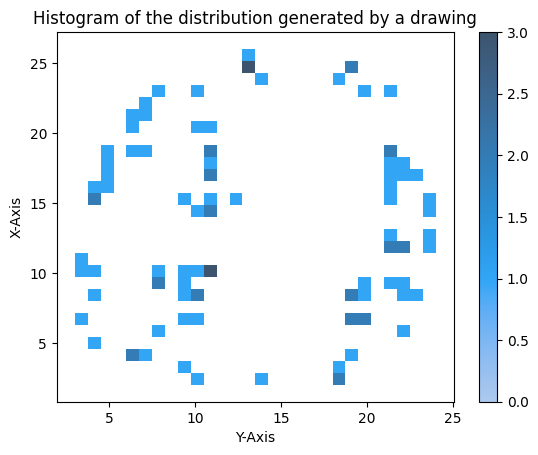

In [5]:
first_face = DistributionDraw.fromarray(
    255 - data[0, :].reshape(28, 28),
    seed=42
)

x = first_face.rvs(size=100)

plot_histogram_from_points(x, histplot_kwargs=dict(bins=28))
plt.show()

# Probando clase `MetropolisPosteriorPiN` datos originales

En esta sección se intentará simular la implementación del algoritmo de *Metropolis* programado en el notebook 05.

In [6]:
%%time
mcmc = MetropolisPosteriorPiN(data=x[:10], models=faces_original, seed=rng)

2023-01-23 15:58:41,658: INFO [bwb.distributions:232] init PosteriorPiN: n_data=10, n_models=161666
2023-01-23 15:58:41,660: INFO [bwb.distributions:340] Executing _first_step
2023-01-23 15:58:41,661: DEBUG [bwb.distributions:247] Calculating the likelihood cache...
2023-01-23 15:58:47,805: DEBUG [bwb.distributions:249] Likelihood cache calculated.
2023-01-23 15:58:47,809: INFO [bwb.distributions:346] First model selected: 124789.


CPU times: total: 6.17 s
Wall time: 6.15 s


Muestreamos a partir de de esta instancia.

In [7]:
%%time
mcmc.rvs(size=1_000)
mcmc

2023-01-23 15:58:47,820: DEBUG [bwb.distributions:288] ========== i = 0 ==========
2023-01-23 15:58:47,822: DEBUG [bwb.distributions:362] u = 0.4388784397520523
2023-01-23 15:58:47,827: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:47,828: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:47,830: DEBUG [bwb.distributions:288] ========== i = 1 ==========
2023-01-23 15:58:47,834: DEBUG [bwb.distributions:362] u = 0.6973680290593639
2023-01-23 15:58:47,842: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:47,844: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:47,846: DEBUG [bwb.distributions:288] ========== i = 2 ==========
2023-01-23 15:58:47,848: DEBUG [bwb.distributions:362] u = 0.9756223516367559
2023-01-23 15:58:47,855: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:47,856: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58

2023-01-23 15:58:48,138: DEBUG [bwb.distributions:288] ========== i = 24 ==========
2023-01-23 15:58:48,140: DEBUG [bwb.distributions:362] u = 0.1397524836093098
2023-01-23 15:58:48,146: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:48,147: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:48,148: DEBUG [bwb.distributions:288] ========== i = 25 ==========
2023-01-23 15:58:48,149: DEBUG [bwb.distributions:362] u = 0.007362269751005512
2023-01-23 15:58:48,155: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:48,157: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:48,159: DEBUG [bwb.distributions:288] ========== i = 26 ==========
2023-01-23 15:58:48,163: DEBUG [bwb.distributions:362] u = 0.6648508565920321
2023-01-23 15:58:48,171: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:48,172: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 

2023-01-23 15:58:48,435: DEBUG [bwb.distributions:288] ========== i = 49 ==========
2023-01-23 15:58:48,438: DEBUG [bwb.distributions:362] u = 0.9618976645495145
2023-01-23 15:58:48,445: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:48,446: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:48,447: DEBUG [bwb.distributions:288] ========== i = 50 ==========
2023-01-23 15:58:48,448: DEBUG [bwb.distributions:362] u = 0.6997071338107496
2023-01-23 15:58:48,452: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:48,453: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:48,455: DEBUG [bwb.distributions:288] ========== i = 51 ==========
2023-01-23 15:58:48,457: DEBUG [bwb.distributions:362] u = 0.9691763773477239
2023-01-23 15:58:48,465: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:48,467: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15

2023-01-23 15:58:48,687: DEBUG [bwb.distributions:288] ========== i = 74 ==========
2023-01-23 15:58:48,688: DEBUG [bwb.distributions:362] u = 0.021612079880330426
2023-01-23 15:58:48,696: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:48,698: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:48,700: DEBUG [bwb.distributions:288] ========== i = 75 ==========
2023-01-23 15:58:48,701: DEBUG [bwb.distributions:362] u = 0.8961607718397667
2023-01-23 15:58:48,706: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:48,707: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:48,711: DEBUG [bwb.distributions:288] ========== i = 76 ==========
2023-01-23 15:58:48,713: DEBUG [bwb.distributions:362] u = 0.5540361435390494
2023-01-23 15:58:48,720: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:48,723: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 

2023-01-23 15:58:48,985: DEBUG [bwb.distributions:288] ========== i = 99 ==========
2023-01-23 15:58:48,986: DEBUG [bwb.distributions:362] u = 0.31032367290009477
2023-01-23 15:58:48,993: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:48,995: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:48,998: DEBUG [bwb.distributions:288] ========== i = 100 ==========
2023-01-23 15:58:49,001: DEBUG [bwb.distributions:362] u = 0.9718264260609674
2023-01-23 15:58:49,006: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.15141884428694138
2023-01-23 15:58:49,008: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.0013525120735709e-24
2023-01-23 15:58:49,009: DEBUG [bwb.distributions:288] ========== i = 101 ==========
2023-01-23 15:58:49,011: DEBUG [bwb.distributions:362] u = 0.14389750255125078
2023-01-23 15:58:49,018: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:49,019: DEBUG [bwb.distributions:378] self.likel

2023-01-23 15:58:49,225: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:49,227: DEBUG [bwb.distributions:288] ========== i = 124 ==========
2023-01-23 15:58:49,228: DEBUG [bwb.distributions:362] u = 0.4258820863735099
2023-01-23 15:58:49,234: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:49,236: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:49,237: DEBUG [bwb.distributions:288] ========== i = 125 ==========
2023-01-23 15:58:49,239: DEBUG [bwb.distributions:362] u = 0.8674906317523249
2023-01-23 15:58:49,245: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:49,246: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:49,248: DEBUG [bwb.distributions:288] ========== i = 126 ==========
2023-01-23 15:58:49,249: DEBUG [bwb.distributions:362] u = 0.24783956295135812
2023-01-23 15:58:49,255: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-2

2023-01-23 15:58:49,479: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:49,480: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:49,482: DEBUG [bwb.distributions:288] ========== i = 149 ==========
2023-01-23 15:58:49,483: DEBUG [bwb.distributions:362] u = 0.6424832759955477
2023-01-23 15:58:49,488: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:49,490: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:49,491: DEBUG [bwb.distributions:288] ========== i = 150 ==========
2023-01-23 15:58:49,493: DEBUG [bwb.distributions:362] u = 0.13455220841314708
2023-01-23 15:58:49,497: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:49,498: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:49,499: DEBUG [bwb.distributions:288] ========== i = 151 ==========
2023-01-23 15:58:49,500: DEBUG [bwb.distributions:362] u = 0.5142228701904145
2023-01-2

2023-01-23 15:58:49,722: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:49,725: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:49,728: DEBUG [bwb.distributions:288] ========== i = 174 ==========
2023-01-23 15:58:49,730: DEBUG [bwb.distributions:362] u = 0.09504919756440122
2023-01-23 15:58:49,737: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:49,738: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:49,741: DEBUG [bwb.distributions:288] ========== i = 175 ==========
2023-01-23 15:58:49,744: DEBUG [bwb.distributions:362] u = 0.1712913040927888
2023-01-23 15:58:49,752: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:49,755: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:49,758: DEBUG [bwb.distributions:288] ========== i = 176 ==========
2023-01-23 15:58:49,760: DEBUG [bwb.distributions:362] u = 0.5724305140338497
2023-01-2

2023-01-23 15:58:49,984: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:49,986: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:49,988: DEBUG [bwb.distributions:288] ========== i = 199 ==========
2023-01-23 15:58:49,990: DEBUG [bwb.distributions:362] u = 0.4423141270678932
2023-01-23 15:58:49,995: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:49,996: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:49,997: DEBUG [bwb.distributions:288] ========== i = 200 ==========
2023-01-23 15:58:49,999: DEBUG [bwb.distributions:362] u = 0.9184418955155542
2023-01-23 15:58:50,004: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:50,005: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:50,006: DEBUG [bwb.distributions:288] ========== i = 201 ==========
2023-01-23 15:58:50,008: DEBUG [bwb.distributions:362] u = 0.1105884109961105
2023-01-23

2023-01-23 15:58:50,230: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:50,231: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:50,232: DEBUG [bwb.distributions:288] ========== i = 224 ==========
2023-01-23 15:58:50,234: DEBUG [bwb.distributions:362] u = 0.6163089699275328
2023-01-23 15:58:50,239: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:50,240: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:50,241: DEBUG [bwb.distributions:288] ========== i = 225 ==========
2023-01-23 15:58:50,242: DEBUG [bwb.distributions:362] u = 0.8841457113668172
2023-01-23 15:58:50,247: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:50,248: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:50,250: DEBUG [bwb.distributions:288] ========== i = 226 ==========
2023-01-23 15:58:50,251: DEBUG [bwb.distributions:362] u = 0.17312784642250323
2023-01-2

2023-01-23 15:58:50,500: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:50,503: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:50,505: DEBUG [bwb.distributions:288] ========== i = 249 ==========
2023-01-23 15:58:50,506: DEBUG [bwb.distributions:362] u = 0.5127392446067582
2023-01-23 15:58:50,512: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:50,514: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:50,515: DEBUG [bwb.distributions:288] ========== i = 250 ==========
2023-01-23 15:58:50,517: DEBUG [bwb.distributions:362] u = 0.8864028867237077
2023-01-23 15:58:50,522: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:50,524: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:50,525: DEBUG [bwb.distributions:288] ========== i = 251 ==========
2023-01-23 15:58:50,527: DEBUG [bwb.distributions:362] u = 0.5036329251830992
2023-01-23

2023-01-23 15:58:50,759: DEBUG [bwb.distributions:362] u = 0.08004928364618502
2023-01-23 15:58:50,768: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:50,770: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:50,772: DEBUG [bwb.distributions:288] ========== i = 274 ==========
2023-01-23 15:58:50,774: DEBUG [bwb.distributions:362] u = 0.433779027322593
2023-01-23 15:58:50,781: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:50,783: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:50,785: DEBUG [bwb.distributions:288] ========== i = 275 ==========
2023-01-23 15:58:50,786: DEBUG [bwb.distributions:362] u = 0.15067297381324019
2023-01-23 15:58:50,792: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:50,794: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:50,796: DEBUG [bwb.distributions:288] ========== i = 276 ==========
2023-01-2

2023-01-23 15:58:51,022: DEBUG [bwb.distributions:288] ========== i = 298 ==========
2023-01-23 15:58:51,023: DEBUG [bwb.distributions:362] u = 0.633769773069263
2023-01-23 15:58:51,028: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:51,029: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:51,030: DEBUG [bwb.distributions:288] ========== i = 299 ==========
2023-01-23 15:58:51,032: DEBUG [bwb.distributions:362] u = 0.620357709658044
2023-01-23 15:58:51,037: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:51,039: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:51,040: DEBUG [bwb.distributions:288] ========== i = 300 ==========
2023-01-23 15:58:51,041: DEBUG [bwb.distributions:362] u = 0.7614325631840076
2023-01-23 15:58:51,046: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:51,047: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 1

2023-01-23 15:58:51,250: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:51,251: DEBUG [bwb.distributions:288] ========== i = 323 ==========
2023-01-23 15:58:51,253: DEBUG [bwb.distributions:362] u = 0.5146293421163498
2023-01-23 15:58:51,257: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:51,258: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:51,259: DEBUG [bwb.distributions:288] ========== i = 324 ==========
2023-01-23 15:58:51,261: DEBUG [bwb.distributions:362] u = 0.029607289128613212
2023-01-23 15:58:51,265: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:51,266: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:51,268: DEBUG [bwb.distributions:288] ========== i = 325 ==========
2023-01-23 15:58:51,270: DEBUG [bwb.distributions:362] u = 0.8956348813836968
2023-01-23 15:58:51,274: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-

2023-01-23 15:58:51,440: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:51,441: DEBUG [bwb.distributions:288] ========== i = 348 ==========
2023-01-23 15:58:51,443: DEBUG [bwb.distributions:362] u = 0.5907447941637661
2023-01-23 15:58:51,448: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:51,449: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:51,450: DEBUG [bwb.distributions:288] ========== i = 349 ==========
2023-01-23 15:58:51,452: DEBUG [bwb.distributions:362] u = 0.29938329151482557
2023-01-23 15:58:51,456: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:51,457: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:51,458: DEBUG [bwb.distributions:288] ========== i = 350 ==========
2023-01-23 15:58:51,459: DEBUG [bwb.distributions:362] u = 0.32249234716866526
2023-01-23 15:58:51,464: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-

2023-01-23 15:58:51,680: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:51,681: DEBUG [bwb.distributions:288] ========== i = 373 ==========
2023-01-23 15:58:51,682: DEBUG [bwb.distributions:362] u = 0.43132702014644964
2023-01-23 15:58:51,688: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:51,689: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:51,691: DEBUG [bwb.distributions:288] ========== i = 374 ==========
2023-01-23 15:58:51,692: DEBUG [bwb.distributions:362] u = 0.8412037062149564
2023-01-23 15:58:51,697: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:51,698: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:51,699: DEBUG [bwb.distributions:288] ========== i = 375 ==========
2023-01-23 15:58:51,701: DEBUG [bwb.distributions:362] u = 0.32249044096772983
2023-01-23 15:58:51,707: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-

2023-01-23 15:58:51,949: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:51,951: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:51,953: DEBUG [bwb.distributions:288] ========== i = 398 ==========
2023-01-23 15:58:51,955: DEBUG [bwb.distributions:362] u = 0.16548775758177503
2023-01-23 15:58:51,963: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:51,964: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:51,966: DEBUG [bwb.distributions:288] ========== i = 399 ==========
2023-01-23 15:58:51,968: DEBUG [bwb.distributions:362] u = 0.7080912356835879
2023-01-23 15:58:51,975: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:51,978: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:51,980: DEBUG [bwb.distributions:288] ========== i = 400 ==========
2023-01-23 15:58:51,981: DEBUG [bwb.distributions:362] u = 0.31715317112997876
2023-01-

2023-01-23 15:58:52,242: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:52,245: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:52,247: DEBUG [bwb.distributions:288] ========== i = 423 ==========
2023-01-23 15:58:52,248: DEBUG [bwb.distributions:362] u = 0.6825815982092204
2023-01-23 15:58:52,255: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:52,257: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:52,260: DEBUG [bwb.distributions:288] ========== i = 424 ==========
2023-01-23 15:58:52,262: DEBUG [bwb.distributions:362] u = 0.9615496295410325
2023-01-23 15:58:52,268: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:52,270: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:52,273: DEBUG [bwb.distributions:288] ========== i = 425 ==========
2023-01-23 15:58:52,274: DEBUG [bwb.distributions:362] u = 0.19954199289949037
2023-01-2

2023-01-23 15:58:52,492: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:52,493: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:52,494: DEBUG [bwb.distributions:288] ========== i = 448 ==========
2023-01-23 15:58:52,496: DEBUG [bwb.distributions:362] u = 0.20208810164547797
2023-01-23 15:58:52,500: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:52,501: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:52,503: DEBUG [bwb.distributions:288] ========== i = 449 ==========
2023-01-23 15:58:52,504: DEBUG [bwb.distributions:362] u = 0.5220123013665123
2023-01-23 15:58:52,511: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:52,512: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:52,513: DEBUG [bwb.distributions:288] ========== i = 450 ==========
2023-01-23 15:58:52,514: DEBUG [bwb.distributions:362] u = 0.2594398398545342
2023-01-2

2023-01-23 15:58:52,796: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:52,797: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:52,799: DEBUG [bwb.distributions:288] ========== i = 473 ==========
2023-01-23 15:58:52,800: DEBUG [bwb.distributions:362] u = 0.8513346494022038
2023-01-23 15:58:52,806: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:52,807: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:52,808: DEBUG [bwb.distributions:288] ========== i = 474 ==========
2023-01-23 15:58:52,809: DEBUG [bwb.distributions:362] u = 0.33932214573656094
2023-01-23 15:58:52,814: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:52,816: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:52,816: DEBUG [bwb.distributions:288] ========== i = 475 ==========
2023-01-23 15:58:52,817: DEBUG [bwb.distributions:362] u = 0.2484064038656515
2023-01-2

2023-01-23 15:58:53,020: DEBUG [bwb.distributions:362] u = 0.4379896029203726
2023-01-23 15:58:53,027: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:53,028: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:53,029: DEBUG [bwb.distributions:288] ========== i = 498 ==========
2023-01-23 15:58:53,031: DEBUG [bwb.distributions:362] u = 0.002308772586742003
2023-01-23 15:58:53,037: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:53,038: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:53,040: DEBUG [bwb.distributions:288] ========== i = 499 ==========
2023-01-23 15:58:53,041: DEBUG [bwb.distributions:362] u = 0.2808963859641551
2023-01-23 15:58:53,048: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:53,049: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:53,051: DEBUG [bwb.distributions:288] ========== i = 500 ==========
2023-01-

2023-01-23 15:58:53,249: DEBUG [bwb.distributions:288] ========== i = 522 ==========
2023-01-23 15:58:53,250: DEBUG [bwb.distributions:362] u = 0.3265468426717799
2023-01-23 15:58:53,256: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:53,258: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:53,261: DEBUG [bwb.distributions:288] ========== i = 523 ==========
2023-01-23 15:58:53,262: DEBUG [bwb.distributions:362] u = 0.7781514225440124
2023-01-23 15:58:53,267: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:53,269: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:53,270: DEBUG [bwb.distributions:288] ========== i = 524 ==========
2023-01-23 15:58:53,273: DEBUG [bwb.distributions:362] u = 0.24668037722614733
2023-01-23 15:58:53,277: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:53,278: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-2

2023-01-23 15:58:53,494: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:53,495: DEBUG [bwb.distributions:288] ========== i = 547 ==========
2023-01-23 15:58:53,496: DEBUG [bwb.distributions:362] u = 0.4099823882250432
2023-01-23 15:58:53,500: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:53,501: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:53,502: DEBUG [bwb.distributions:288] ========== i = 548 ==========
2023-01-23 15:58:53,503: DEBUG [bwb.distributions:362] u = 0.8160560167528311
2023-01-23 15:58:53,509: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:53,510: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:53,512: DEBUG [bwb.distributions:288] ========== i = 549 ==========
2023-01-23 15:58:53,513: DEBUG [bwb.distributions:362] u = 0.16769951967778096
2023-01-23 15:58:53,518: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-2

2023-01-23 15:58:53,731: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.1968426671293988e-25
2023-01-23 15:58:53,733: DEBUG [bwb.distributions:288] ========== i = 572 ==========
2023-01-23 15:58:53,736: DEBUG [bwb.distributions:362] u = 0.3215456822408995
2023-01-23 15:58:53,743: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:53,746: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:53,749: DEBUG [bwb.distributions:288] ========== i = 573 ==========
2023-01-23 15:58:53,751: DEBUG [bwb.distributions:362] u = 0.801389433842723
2023-01-23 15:58:53,759: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:53,761: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:53,764: DEBUG [bwb.distributions:288] ========== i = 574 ==========
2023-01-23 15:58:53,766: DEBUG [bwb.distributions:362] u = 0.893031019536303
2023-01-23 15:58:53,773: DEBUG [bwb.distributions:377] A_mu_i_mu_star

2023-01-23 15:58:53,984: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:53,985: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:53,986: DEBUG [bwb.distributions:288] ========== i = 597 ==========
2023-01-23 15:58:53,988: DEBUG [bwb.distributions:362] u = 0.19230067903513304
2023-01-23 15:58:53,994: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:53,996: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:53,997: DEBUG [bwb.distributions:288] ========== i = 598 ==========
2023-01-23 15:58:53,998: DEBUG [bwb.distributions:362] u = 0.6560738790950633
2023-01-23 15:58:54,004: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:54,005: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:54,006: DEBUG [bwb.distributions:288] ========== i = 599 ==========
2023-01-23 15:58:54,007: DEBUG [bwb.distributions:362] u = 0.7347251307805799
2023-01-2

2023-01-23 15:58:54,220: DEBUG [bwb.distributions:362] u = 0.055270409501227635
2023-01-23 15:58:54,225: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:54,227: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:54,228: DEBUG [bwb.distributions:288] ========== i = 622 ==========
2023-01-23 15:58:54,229: DEBUG [bwb.distributions:362] u = 0.26480717732157966
2023-01-23 15:58:54,235: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:54,236: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:54,237: DEBUG [bwb.distributions:288] ========== i = 623 ==========
2023-01-23 15:58:54,239: DEBUG [bwb.distributions:362] u = 0.20539029767240669
2023-01-23 15:58:54,243: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:54,245: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:54,246: DEBUG [bwb.distributions:288] ========== i = 624 ==========
2023-0

2023-01-23 15:58:54,466: DEBUG [bwb.distributions:362] u = 0.3207155466940761
2023-01-23 15:58:54,471: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:54,472: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:54,473: DEBUG [bwb.distributions:288] ========== i = 647 ==========
2023-01-23 15:58:54,475: DEBUG [bwb.distributions:362] u = 0.3785927875597309
2023-01-23 15:58:54,480: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:54,481: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:54,483: DEBUG [bwb.distributions:288] ========== i = 648 ==========
2023-01-23 15:58:54,484: DEBUG [bwb.distributions:362] u = 0.16606263241397312
2023-01-23 15:58:54,488: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:54,491: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:54,492: DEBUG [bwb.distributions:288] ========== i = 649 ==========
2023-01-2

2023-01-23 15:58:54,695: DEBUG [bwb.distributions:288] ========== i = 671 ==========
2023-01-23 15:58:54,696: DEBUG [bwb.distributions:362] u = 0.5643926803591786
2023-01-23 15:58:54,700: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:54,701: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:54,702: DEBUG [bwb.distributions:288] ========== i = 672 ==========
2023-01-23 15:58:54,705: DEBUG [bwb.distributions:362] u = 0.6072114304940721
2023-01-23 15:58:54,711: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:54,712: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:54,713: DEBUG [bwb.distributions:288] ========== i = 673 ==========
2023-01-23 15:58:54,714: DEBUG [bwb.distributions:362] u = 0.3699843678471978
2023-01-23 15:58:54,719: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:54,721: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23

2023-01-23 15:58:54,971: DEBUG [bwb.distributions:288] ========== i = 696 ==========
2023-01-23 15:58:54,972: DEBUG [bwb.distributions:362] u = 0.05982433731729919
2023-01-23 15:58:54,977: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:54,978: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:54,979: DEBUG [bwb.distributions:288] ========== i = 697 ==========
2023-01-23 15:58:54,981: DEBUG [bwb.distributions:362] u = 0.15575767097457938
2023-01-23 15:58:54,985: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:54,986: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:54,987: DEBUG [bwb.distributions:288] ========== i = 698 ==========
2023-01-23 15:58:54,989: DEBUG [bwb.distributions:362] u = 0.9157448578787095
2023-01-23 15:58:54,994: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:54,995: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-

2023-01-23 15:58:55,191: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:55,193: DEBUG [bwb.distributions:288] ========== i = 721 ==========
2023-01-23 15:58:55,195: DEBUG [bwb.distributions:362] u = 0.06332847870255809
2023-01-23 15:58:55,200: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:55,203: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:55,204: DEBUG [bwb.distributions:288] ========== i = 722 ==========
2023-01-23 15:58:55,206: DEBUG [bwb.distributions:362] u = 0.5685697147037354
2023-01-23 15:58:55,211: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:55,212: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:55,214: DEBUG [bwb.distributions:288] ========== i = 723 ==========
2023-01-23 15:58:55,215: DEBUG [bwb.distributions:362] u = 0.53721888369434
2023-01-23 15:58:55,221: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 

2023-01-23 15:58:55,425: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:55,426: DEBUG [bwb.distributions:288] ========== i = 746 ==========
2023-01-23 15:58:55,428: DEBUG [bwb.distributions:362] u = 0.7817570475739452
2023-01-23 15:58:55,432: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:55,434: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:55,436: DEBUG [bwb.distributions:288] ========== i = 747 ==========
2023-01-23 15:58:55,437: DEBUG [bwb.distributions:362] u = 0.6379367442466449
2023-01-23 15:58:55,441: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:55,442: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:55,444: DEBUG [bwb.distributions:288] ========== i = 748 ==========
2023-01-23 15:58:55,445: DEBUG [bwb.distributions:362] u = 0.6310654428718875
2023-01-23 15:58:55,449: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23

2023-01-23 15:58:55,653: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:55,655: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:55,656: DEBUG [bwb.distributions:288] ========== i = 771 ==========
2023-01-23 15:58:55,657: DEBUG [bwb.distributions:362] u = 0.1763555764178013
2023-01-23 15:58:55,662: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:55,663: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:55,664: DEBUG [bwb.distributions:288] ========== i = 772 ==========
2023-01-23 15:58:55,665: DEBUG [bwb.distributions:362] u = 0.39206002241544324
2023-01-23 15:58:55,670: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:55,671: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:55,673: DEBUG [bwb.distributions:288] ========== i = 773 ==========
2023-01-23 15:58:55,674: DEBUG [bwb.distributions:362] u = 0.7517807092307816
2023-01-2

2023-01-23 15:58:55,891: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:55,892: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:55,893: DEBUG [bwb.distributions:288] ========== i = 796 ==========
2023-01-23 15:58:55,895: DEBUG [bwb.distributions:362] u = 0.4028796085076296
2023-01-23 15:58:55,900: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:55,901: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:55,902: DEBUG [bwb.distributions:288] ========== i = 797 ==========
2023-01-23 15:58:55,903: DEBUG [bwb.distributions:362] u = 0.6813294726896911
2023-01-23 15:58:55,908: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:55,910: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:55,911: DEBUG [bwb.distributions:288] ========== i = 798 ==========
2023-01-23 15:58:55,912: DEBUG [bwb.distributions:362] u = 0.17546224657908782
2023-01-2

2023-01-23 15:58:56,142: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:56,143: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:56,145: DEBUG [bwb.distributions:288] ========== i = 821 ==========
2023-01-23 15:58:56,146: DEBUG [bwb.distributions:362] u = 0.20056247132155403
2023-01-23 15:58:56,151: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:56,152: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:56,154: DEBUG [bwb.distributions:288] ========== i = 822 ==========
2023-01-23 15:58:56,155: DEBUG [bwb.distributions:362] u = 0.4638281104628762
2023-01-23 15:58:56,161: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:56,162: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:56,163: DEBUG [bwb.distributions:288] ========== i = 823 ==========
2023-01-23 15:58:56,164: DEBUG [bwb.distributions:362] u = 0.7960604476258709
2023-01-2

2023-01-23 15:58:56,380: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:56,381: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:56,383: DEBUG [bwb.distributions:288] ========== i = 846 ==========
2023-01-23 15:58:56,385: DEBUG [bwb.distributions:362] u = 0.736523217701888
2023-01-23 15:58:56,390: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:56,391: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:56,392: DEBUG [bwb.distributions:288] ========== i = 847 ==========
2023-01-23 15:58:56,393: DEBUG [bwb.distributions:362] u = 0.523090499279315
2023-01-23 15:58:56,399: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:56,400: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:56,401: DEBUG [bwb.distributions:288] ========== i = 848 ==========
2023-01-23 15:58:56,402: DEBUG [bwb.distributions:362] u = 0.7952322585827095
2023-01-23 1

2023-01-23 15:58:56,611: DEBUG [bwb.distributions:288] ========== i = 870 ==========
2023-01-23 15:58:56,612: DEBUG [bwb.distributions:362] u = 0.23074630526721696
2023-01-23 15:58:56,617: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:56,619: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:56,620: DEBUG [bwb.distributions:288] ========== i = 871 ==========
2023-01-23 15:58:56,621: DEBUG [bwb.distributions:362] u = 0.9585152939754523
2023-01-23 15:58:56,626: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:56,628: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:56,629: DEBUG [bwb.distributions:288] ========== i = 872 ==========
2023-01-23 15:58:56,630: DEBUG [bwb.distributions:362] u = 0.6355603540101848
2023-01-23 15:58:56,635: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:56,637: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-2

2023-01-23 15:58:56,853: DEBUG [bwb.distributions:288] ========== i = 895 ==========
2023-01-23 15:58:56,855: DEBUG [bwb.distributions:362] u = 0.30766546637903003
2023-01-23 15:58:56,860: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:56,862: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:56,863: DEBUG [bwb.distributions:288] ========== i = 896 ==========
2023-01-23 15:58:56,864: DEBUG [bwb.distributions:362] u = 0.6889014524529722
2023-01-23 15:58:56,869: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:56,870: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:56,872: DEBUG [bwb.distributions:288] ========== i = 897 ==========
2023-01-23 15:58:56,873: DEBUG [bwb.distributions:362] u = 0.2950192087123954
2023-01-23 15:58:56,878: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.03454937102409554
2023-01-23 15:58:56,879: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i]

2023-01-23 15:58:57,098: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:57,100: DEBUG [bwb.distributions:288] ========== i = 920 ==========
2023-01-23 15:58:57,101: DEBUG [bwb.distributions:362] u = 0.5699829035940329
2023-01-23 15:58:57,107: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:57,110: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:57,112: DEBUG [bwb.distributions:288] ========== i = 921 ==========
2023-01-23 15:58:57,113: DEBUG [bwb.distributions:362] u = 0.9410762847646973
2023-01-23 15:58:57,120: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:57,121: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:57,123: DEBUG [bwb.distributions:288] ========== i = 922 ==========
2023-01-23 15:58:57,124: DEBUG [bwb.distributions:362] u = 0.6266392176974815
2023-01-23 15:58:57,131: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23

2023-01-23 15:58:57,348: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:57,350: DEBUG [bwb.distributions:288] ========== i = 945 ==========
2023-01-23 15:58:57,352: DEBUG [bwb.distributions:362] u = 0.7593411000223874
2023-01-23 15:58:57,357: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:57,360: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:57,362: DEBUG [bwb.distributions:288] ========== i = 946 ==========
2023-01-23 15:58:57,363: DEBUG [bwb.distributions:362] u = 0.021156011423293486
2023-01-23 15:58:57,368: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:57,369: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:57,371: DEBUG [bwb.distributions:288] ========== i = 947 ==========
2023-01-23 15:58:57,371: DEBUG [bwb.distributions:362] u = 0.17700141112134105
2023-01-23 15:58:57,378: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01

2023-01-23 15:58:57,583: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:57,583: DEBUG [bwb.distributions:288] ========== i = 970 ==========
2023-01-23 15:58:57,585: DEBUG [bwb.distributions:362] u = 0.45489440173263884
2023-01-23 15:58:57,591: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:57,592: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:57,593: DEBUG [bwb.distributions:288] ========== i = 971 ==========
2023-01-23 15:58:57,595: DEBUG [bwb.distributions:362] u = 0.17666698132716163
2023-01-23 15:58:57,600: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:57,601: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:57,602: DEBUG [bwb.distributions:288] ========== i = 972 ==========
2023-01-23 15:58:57,604: DEBUG [bwb.distributions:362] u = 0.9256866687367246
2023-01-23 15:58:57,610: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-

2023-01-23 15:58:57,832: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:57,833: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:57,834: DEBUG [bwb.distributions:288] ========== i = 995 ==========
2023-01-23 15:58:57,836: DEBUG [bwb.distributions:362] u = 0.6741951924448162
2023-01-23 15:58:57,842: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:57,844: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:57,845: DEBUG [bwb.distributions:288] ========== i = 996 ==========
2023-01-23 15:58:57,847: DEBUG [bwb.distributions:362] u = 0.07124447736659112
2023-01-23 15:58:57,853: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0
2023-01-23 15:58:57,854: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 0.0
2023-01-23 15:58:57,855: DEBUG [bwb.distributions:288] ========== i = 997 ==========
2023-01-23 15:58:57,857: DEBUG [bwb.distributions:362] u = 0.7537706796439557
2023-01-2

CPU times: total: 11.8 s
Wall time: 10.1 s


MetropolisPosteriorPiN(n_data=10, n_models=161666, n_samples=1000, last_i=93601)

Observamos el contador

In [8]:
mcmc.counter.most_common()

[(62642, 633), (93601, 344), (124789, 16), (52674, 7), (120401, 1)]

Y mostramos las caras en orden de la más común a la menos común

In [9]:
plot_list_of_draws(mcmc.most_common())

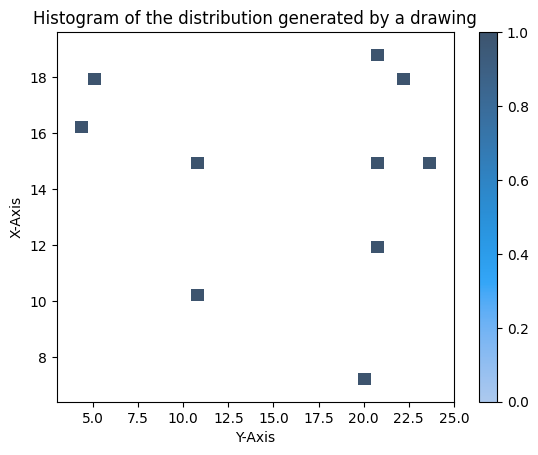

In [10]:
plot_histogram_from_points(x[:10], histplot_kwargs=dict(bins=28))
plt.show()

# Probando clase `AlternativeMetropolisPosteriorPiN` datos originales

En esta sección se intentará simular la implementación del algoritmo de *Metropolis* programado en el notebook 05.

In [11]:
%%time
mcmc = AlternativeMetropolisPosteriorPiN(data=x[:10], models=faces_original, seed=rng)

2023-01-23 15:58:58,436: INFO [bwb.distributions:232] init PosteriorPiN: n_data=10, n_models=161666
2023-01-23 15:58:59,080: INFO [bwb.distributions:340] Executing _first_step
2023-01-23 15:58:59,081: DEBUG [bwb.distributions:247] Calculating the likelihood cache...
2023-01-23 15:58:59,121: DEBUG [bwb.distributions:249] Likelihood cache calculated.
2023-01-23 15:58:59,122: INFO [bwb.distributions:346] First model selected: 1514.


CPU times: total: 688 ms
Wall time: 688 ms


Muestreamos a partir de de esta instancia.

In [12]:
%%time
mcmc.rvs(size=1_000)
mcmc

2023-01-23 15:58:59,134: DEBUG [bwb.distributions:288] ========== i = 0 ==========
2023-01-23 15:58:59,135: DEBUG [bwb.distributions:362] u = 0.9529751615601034
2023-01-23 15:58:59,137: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.014669654948323563
2023-01-23 15:58:59,139: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.891580095019602e-26
2023-01-23 15:58:59,140: DEBUG [bwb.distributions:288] ========== i = 1 ==========
2023-01-23 15:58:59,141: DEBUG [bwb.distributions:362] u = 0.11589886531924942
2023-01-23 15:58:59,143: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0003211075348526325
2023-01-23 15:58:59,145: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.289621853658378e-27
2023-01-23 15:58:59,145: DEBUG [bwb.distributions:288] ========== i = 2 ==========
2023-01-23 15:58:59,146: DEBUG [bwb.distributions:362] u = 0.4892651908307978
2023-01-23 15:58:59,148: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0009650813514380176
2023-01-23 15:58:

2023-01-23 15:58:59,284: DEBUG [bwb.distributions:362] u = 0.4449377610270062
2023-01-23 15:58:59,288: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.013956603791370401
2023-01-23 15:58:59,291: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 9.229683618520092e-26
2023-01-23 15:58:59,293: DEBUG [bwb.distributions:288] ========== i = 23 ==========
2023-01-23 15:58:59,295: DEBUG [bwb.distributions:362] u = 0.14674323320765248
2023-01-23 15:58:59,297: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0003252315242208523
2023-01-23 15:58:59,299: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.150798372010513e-27
2023-01-23 15:58:59,301: DEBUG [bwb.distributions:288] ========== i = 24 ==========
2023-01-23 15:58:59,302: DEBUG [bwb.distributions:362] u = 0.9876474477564617
2023-01-23 15:58:59,305: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 6.405922085238326e-06
2023-01-23 15:58:59,308: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.236319595

2023-01-23 15:58:59,439: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.0543869281544395e-27
2023-01-23 15:58:59,440: DEBUG [bwb.distributions:288] ========== i = 45 ==========
2023-01-23 15:58:59,441: DEBUG [bwb.distributions:362] u = 0.5719506256412027
2023-01-23 15:58:59,443: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.0
2023-01-23 15:58:59,444: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.0092560037338489e-23
2023-01-23 15:58:59,445: DEBUG [bwb.distributions:382] last_i = 1337 -> next_i = 725.
2023-01-23 15:58:59,446: DEBUG [bwb.distributions:288] ========== i = 46 ==========
2023-01-23 15:58:59,448: DEBUG [bwb.distributions:362] u = 0.9000912781436826
2023-01-23 15:58:59,449: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 4.8436424431984135e-05
2023-01-23 15:58:59,450: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.888475215738087e-28
2023-01-23 15:58:59,451: DEBUG [bwb.distributions:288] ========== i = 47 ==========
2023-0

2023-01-23 15:58:59,574: DEBUG [bwb.distributions:288] ========== i = 67 ==========
2023-01-23 15:58:59,575: DEBUG [bwb.distributions:362] u = 0.31458156903584256
2023-01-23 15:58:59,577: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 9.711552935169832e-07
2023-01-23 15:58:59,578: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 9.801443105399236e-30
2023-01-23 15:58:59,579: DEBUG [bwb.distributions:288] ========== i = 68 ==========
2023-01-23 15:58:59,580: DEBUG [bwb.distributions:362] u = 0.7647566879326486
2023-01-23 15:58:59,582: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0001881475932507258
2023-01-23 15:58:59,584: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.898890880763692e-27
2023-01-23 15:58:59,585: DEBUG [bwb.distributions:288] ========== i = 69 ==========
2023-01-23 15:58:59,586: DEBUG [bwb.distributions:362] u = 0.8955045771968844
2023-01-23 15:58:59,587: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.485709614482336e-05
2023-01-23 15

2023-01-23 15:58:59,700: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.004037803125809213
2023-01-23 15:58:59,701: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.8494463035395193e-25
2023-01-23 15:58:59,702: DEBUG [bwb.distributions:288] ========== i = 90 ==========
2023-01-23 15:58:59,703: DEBUG [bwb.distributions:362] u = 0.8381365548303041
2023-01-23 15:58:59,705: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 4.516447901310867e-05
2023-01-23 15:58:59,707: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.068681314058421e-27
2023-01-23 15:58:59,708: DEBUG [bwb.distributions:288] ========== i = 91 ==========
2023-01-23 15:58:59,711: DEBUG [bwb.distributions:362] u = 0.5264600906350138
2023-01-23 15:58:59,713: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00015739677537738594
2023-01-23 15:58:59,714: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 7.209288698353958e-27
2023-01-23 15:58:59,715: DEBUG [bwb.distributions:288] ========== 

2023-01-23 15:58:59,844: DEBUG [bwb.distributions:288] ========== i = 112 ==========
2023-01-23 15:58:59,845: DEBUG [bwb.distributions:362] u = 0.7052724094776516
2023-01-23 15:58:59,848: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0009280253328136703
2023-01-23 15:58:59,850: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.250660490088421e-26
2023-01-23 15:58:59,851: DEBUG [bwb.distributions:288] ========== i = 113 ==========
2023-01-23 15:58:59,852: DEBUG [bwb.distributions:362] u = 0.03875133152842947
2023-01-23 15:58:59,853: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 5.524895943616467e-06
2023-01-23 15:58:59,855: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.530583602516326e-28
2023-01-23 15:58:59,857: DEBUG [bwb.distributions:288] ========== i = 114 ==========
2023-01-23 15:58:59,858: DEBUG [bwb.distributions:362] u = 0.33901585757326036
2023-01-23 15:58:59,860: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0005663067439724339
2023-01-2

2023-01-23 15:58:59,971: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00011402983107994706
2023-01-23 15:58:59,973: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.222940371610594e-27
2023-01-23 15:58:59,974: DEBUG [bwb.distributions:288] ========== i = 135 ==========
2023-01-23 15:58:59,976: DEBUG [bwb.distributions:362] u = 0.7545702954396313
2023-01-23 15:58:59,978: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.114176713032131e-06
2023-01-23 15:58:59,979: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.103294883883475e-29
2023-01-23 15:58:59,980: DEBUG [bwb.distributions:288] ========== i = 136 ==========
2023-01-23 15:58:59,982: DEBUG [bwb.distributions:362] u = 0.8690537862770027
2023-01-23 15:58:59,984: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.003663556538891273
2023-01-23 15:58:59,987: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.6780290884792994e-25
2023-01-23 15:58:59,989: DEBUG [bwb.distributions:288] =========

2023-01-23 15:59:00,129: DEBUG [bwb.distributions:288] ========== i = 157 ==========
2023-01-23 15:59:00,132: DEBUG [bwb.distributions:362] u = 0.1745371316267883
2023-01-23 15:59:00,134: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0021918843292725526
2023-01-23 15:59:00,135: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.0039549339709096e-25
2023-01-23 15:59:00,136: DEBUG [bwb.distributions:288] ========== i = 158 ==========
2023-01-23 15:59:00,137: DEBUG [bwb.distributions:362] u = 0.49628874282923585
2023-01-23 15:59:00,140: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0004410533670001906
2023-01-23 15:59:00,143: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.0201691212933686e-26
2023-01-23 15:59:00,144: DEBUG [bwb.distributions:288] ========== i = 159 ==========
2023-01-23 15:59:00,146: DEBUG [bwb.distributions:362] u = 0.03259244324701449
2023-01-23 15:59:00,148: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0009280253328136703
2023-01

2023-01-23 15:59:00,283: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 2.14821748241744e-07
2023-01-23 15:59:00,286: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 9.839540854928825e-30
2023-01-23 15:59:00,288: DEBUG [bwb.distributions:288] ========== i = 180 ==========
2023-01-23 15:59:00,289: DEBUG [bwb.distributions:362] u = 0.47764876957297075
2023-01-23 15:59:00,290: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00015048621500375964
2023-01-23 15:59:00,292: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.892762361131202e-27
2023-01-23 15:59:00,293: DEBUG [bwb.distributions:288] ========== i = 181 ==========
2023-01-23 15:59:00,295: DEBUG [bwb.distributions:362] u = 0.6652139656041213
2023-01-23 15:59:00,298: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00010468058655267483
2023-01-23 15:59:00,300: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.794714299335575e-27
2023-01-23 15:59:00,301: DEBUG [bwb.distributions:288] ========

2023-01-23 15:59:00,437: DEBUG [bwb.distributions:288] ========== i = 202 ==========
2023-01-23 15:59:00,440: DEBUG [bwb.distributions:362] u = 0.5558774048757611
2023-01-23 15:59:00,444: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 6.847246260969953e-06
2023-01-23 15:59:00,445: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.1362634314266544e-28
2023-01-23 15:59:00,446: DEBUG [bwb.distributions:288] ========== i = 203 ==========
2023-01-23 15:59:00,447: DEBUG [bwb.distributions:362] u = 0.32978537955150244
2023-01-23 15:59:00,450: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0002101193746389358
2023-01-23 15:59:00,451: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 9.624156716410865e-27
2023-01-23 15:59:00,453: DEBUG [bwb.distributions:288] ========== i = 204 ==========
2023-01-23 15:59:00,455: DEBUG [bwb.distributions:362] u = 0.6818959050670735
2023-01-23 15:59:00,456: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 9.376631531017309e-07
2023-01-2

2023-01-23 15:59:00,581: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 4.089877191230279e-05
2023-01-23 15:59:00,582: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.8732979339441007e-27
2023-01-23 15:59:00,583: DEBUG [bwb.distributions:288] ========== i = 225 ==========
2023-01-23 15:59:00,585: DEBUG [bwb.distributions:362] u = 0.6415472033408566
2023-01-23 15:59:00,586: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.007420799900280928
2023-01-23 15:59:00,590: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.3989698153325654e-25
2023-01-23 15:59:00,592: DEBUG [bwb.distributions:288] ========== i = 226 ==========
2023-01-23 15:59:00,594: DEBUG [bwb.distributions:362] u = 0.6247606346845916
2023-01-23 15:59:00,595: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.0262881495273796e-06
2023-01-23 15:59:00,597: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.7007364286227693e-29
2023-01-23 15:59:00,598: DEBUG [bwb.distributions:288] =======

2023-01-23 15:59:00,708: DEBUG [bwb.distributions:288] ========== i = 247 ==========
2023-01-23 15:59:00,710: DEBUG [bwb.distributions:362] u = 0.5522531203440096
2023-01-23 15:59:00,712: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00034024807622561596
2023-01-23 15:59:00,713: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.5584478174274194e-26
2023-01-23 15:59:00,715: DEBUG [bwb.distributions:288] ========== i = 248 ==========
2023-01-23 15:59:00,716: DEBUG [bwb.distributions:362] u = 0.8194507555446373
2023-01-23 15:59:00,718: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.7414553777217658e-05
2023-01-23 15:59:00,720: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 7.976436965239789e-28
2023-01-23 15:59:00,721: DEBUG [bwb.distributions:288] ========== i = 249 ==========
2023-01-23 15:59:00,723: DEBUG [bwb.distributions:362] u = 0.03387779514255651
2023-01-23 15:59:00,725: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.012701671616141164
2023-01-

2023-01-23 15:59:00,838: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.007946997751150191
2023-01-23 15:59:00,839: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.639985694487289e-25
2023-01-23 15:59:00,839: DEBUG [bwb.distributions:288] ========== i = 270 ==========
2023-01-23 15:59:00,842: DEBUG [bwb.distributions:362] u = 0.33971705416207676
2023-01-23 15:59:00,844: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.3899170062615467e-06
2023-01-23 15:59:00,845: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.366275891526942e-29
2023-01-23 15:59:00,846: DEBUG [bwb.distributions:288] ========== i = 271 ==========
2023-01-23 15:59:00,847: DEBUG [bwb.distributions:362] u = 0.5275448744971828
2023-01-23 15:59:00,849: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.4629803077586446e-05
2023-01-23 15:59:00,850: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.700929782932608e-28
2023-01-23 15:59:00,852: DEBUG [bwb.distributions:288] ========

2023-01-23 15:59:01,012: DEBUG [bwb.distributions:288] ========== i = 292 ==========
2023-01-23 15:59:01,013: DEBUG [bwb.distributions:362] u = 0.33435922671739227
2023-01-23 15:59:01,015: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.1037620323132755e-05
2023-01-23 15:59:01,017: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.055592229351077e-28
2023-01-23 15:59:01,018: DEBUG [bwb.distributions:288] ========== i = 293 ==========
2023-01-23 15:59:01,019: DEBUG [bwb.distributions:362] u = 0.4510901608039063
2023-01-23 15:59:01,020: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 3.3498066728817035e-05
2023-01-23 15:59:01,023: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.5343213563666477e-27
2023-01-23 15:59:01,025: DEBUG [bwb.distributions:288] ========== i = 294 ==========
2023-01-23 15:59:01,027: DEBUG [bwb.distributions:362] u = 0.7676610326987415
2023-01-23 15:59:01,030: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.0965679583054234e-06
2023-0

2023-01-23 15:59:01,179: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 5.478822295697268e-07
2023-01-23 15:59:01,179: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.5094803601888124e-29
2023-01-23 15:59:01,180: DEBUG [bwb.distributions:288] ========== i = 315 ==========
2023-01-23 15:59:01,182: DEBUG [bwb.distributions:362] u = 0.8877616757138874
2023-01-23 15:59:01,183: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0012284167831304817
2023-01-23 15:59:01,184: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.626551884723871e-26
2023-01-23 15:59:01,185: DEBUG [bwb.distributions:288] ========== i = 316 ==========
2023-01-23 15:59:01,186: DEBUG [bwb.distributions:362] u = 0.5209756327557735
2023-01-23 15:59:01,187: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.002549209491145843
2023-01-23 15:59:01,190: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.1676215812039334e-25
2023-01-23 15:59:01,190: DEBUG [bwb.distributions:288] =========

2023-01-23 15:59:01,327: DEBUG [bwb.distributions:288] ========== i = 337 ==========
2023-01-23 15:59:01,333: DEBUG [bwb.distributions:362] u = 0.47214445102064617
2023-01-23 15:59:01,336: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.0688737469288917e-05
2023-01-23 15:59:01,338: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.895792436170103e-28
2023-01-23 15:59:01,339: DEBUG [bwb.distributions:288] ========== i = 338 ==========
2023-01-23 15:59:01,339: DEBUG [bwb.distributions:362] u = 0.7456479912378577
2023-01-23 15:59:01,341: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 5.6912113239089395e-06
2023-01-23 15:59:01,343: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.6067615031518447e-28
2023-01-23 15:59:01,345: DEBUG [bwb.distributions:288] ========== i = 339 ==========
2023-01-23 15:59:01,346: DEBUG [bwb.distributions:362] u = 0.8005771175153205
2023-01-23 15:59:01,348: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 7.206878431333086e-05
2023-01

2023-01-23 15:59:01,508: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.009557022740438978
2023-01-23 15:59:01,510: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.377429961151392e-25
2023-01-23 15:59:01,513: DEBUG [bwb.distributions:288] ========== i = 360 ==========
2023-01-23 15:59:01,516: DEBUG [bwb.distributions:362] u = 0.35528153955277697
2023-01-23 15:59:01,518: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0003825810701904745
2023-01-23 15:59:01,520: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.7523468183609476e-26
2023-01-23 15:59:01,522: DEBUG [bwb.distributions:288] ========== i = 361 ==========
2023-01-23 15:59:01,525: DEBUG [bwb.distributions:362] u = 0.16793798059886367
2023-01-23 15:59:01,529: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0001945231846738593
2023-01-23 15:59:01,531: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 8.909800048156262e-27
2023-01-23 15:59:01,534: DEBUG [bwb.distributions:288] ========

2023-01-23 15:59:01,686: DEBUG [bwb.distributions:288] ========== i = 382 ==========
2023-01-23 15:59:01,687: DEBUG [bwb.distributions:362] u = 0.445265465999388
2023-01-23 15:59:01,688: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 5.571381033953757e-06
2023-01-23 15:59:01,689: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.551875298969895e-28
2023-01-23 15:59:01,689: DEBUG [bwb.distributions:288] ========== i = 383 ==========
2023-01-23 15:59:01,690: DEBUG [bwb.distributions:362] u = 0.8411200645043214
2023-01-23 15:59:01,692: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0034911883853173636
2023-01-23 15:59:01,693: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.5990788191019853e-25
2023-01-23 15:59:01,694: DEBUG [bwb.distributions:288] ========== i = 384 ==========
2023-01-23 15:59:01,696: DEBUG [bwb.distributions:362] u = 0.16178245779226574
2023-01-23 15:59:01,698: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.002971089446695803
2023-01-23 

2023-01-23 15:59:01,819: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0008389451310735862
2023-01-23 15:59:01,821: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.842643940758181e-26
2023-01-23 15:59:01,823: DEBUG [bwb.distributions:288] ========== i = 405 ==========
2023-01-23 15:59:01,824: DEBUG [bwb.distributions:362] u = 0.6935054243560607
2023-01-23 15:59:01,826: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 6.792499398495333e-05
2023-01-23 15:59:01,828: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.111187572282635e-27
2023-01-23 15:59:01,829: DEBUG [bwb.distributions:288] ========== i = 406 ==========
2023-01-23 15:59:01,830: DEBUG [bwb.distributions:362] u = 0.02829230563811458
2023-01-23 15:59:01,832: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.012989538067002026
2023-01-23 15:59:01,833: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.949634594402927e-25
2023-01-23 15:59:01,834: DEBUG [bwb.distributions:288] ==========

2023-01-23 15:59:01,947: DEBUG [bwb.distributions:288] ========== i = 427 ==========
2023-01-23 15:59:01,949: DEBUG [bwb.distributions:362] u = 0.6608681959247994
2023-01-23 15:59:01,951: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0008777867440521596
2023-01-23 15:59:01,951: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.0205512713250686e-26
2023-01-23 15:59:01,953: DEBUG [bwb.distributions:288] ========== i = 428 ==========
2023-01-23 15:59:01,954: DEBUG [bwb.distributions:362] u = 0.7477897231466647
2023-01-23 15:59:01,957: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0013442838648073641
2023-01-23 15:59:01,960: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.157261132382587e-26
2023-01-23 15:59:01,961: DEBUG [bwb.distributions:288] ========== i = 429 ==========
2023-01-23 15:59:01,963: DEBUG [bwb.distributions:362] u = 0.4144272711081408
2023-01-23 15:59:01,964: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 6.176746818286508e-05
2023-01-23

2023-01-23 15:59:02,091: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 3.1498090142882993e-06
2023-01-23 15:59:02,091: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.4427158672238353e-28
2023-01-23 15:59:02,092: DEBUG [bwb.distributions:288] ========== i = 450 ==========
2023-01-23 15:59:02,094: DEBUG [bwb.distributions:362] u = 0.14922772844025645
2023-01-23 15:59:02,095: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 6.394083440661719e-05
2023-01-23 15:59:02,097: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.9286999923962675e-27
2023-01-23 15:59:02,099: DEBUG [bwb.distributions:288] ========== i = 451 ==========
2023-01-23 15:59:02,100: DEBUG [bwb.distributions:362] u = 0.37912506109154853
2023-01-23 15:59:02,101: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.017131926383878997
2023-01-23 15:59:02,103: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 7.846984346673983e-25
2023-01-23 15:59:02,104: DEBUG [bwb.distributions:288] ======

2023-01-23 15:59:02,216: DEBUG [bwb.distributions:288] ========== i = 472 ==========
2023-01-23 15:59:02,218: DEBUG [bwb.distributions:362] u = 0.3244056641416051
2023-01-23 15:59:02,219: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.799995981027943e-08
2023-01-23 15:59:02,220: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 8.24457213433594e-31
2023-01-23 15:59:02,220: DEBUG [bwb.distributions:288] ========== i = 473 ==========
2023-01-23 15:59:02,223: DEBUG [bwb.distributions:362] u = 0.9576934080154231
2023-01-23 15:59:02,225: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.005786467404056739
2023-01-23 15:59:02,226: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.6503919130133223e-25
2023-01-23 15:59:02,227: DEBUG [bwb.distributions:288] ========== i = 474 ==========
2023-01-23 15:59:02,229: DEBUG [bwb.distributions:362] u = 0.15357786694775655
2023-01-23 15:59:02,230: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00010853045426425309
2023-01-23

2023-01-23 15:59:02,340: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.04021818161214882
2023-01-23 15:59:02,341: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.8421246653218883e-24
2023-01-23 15:59:02,342: DEBUG [bwb.distributions:288] ========== i = 495 ==========
2023-01-23 15:59:02,344: DEBUG [bwb.distributions:362] u = 0.30954350813762743
2023-01-23 15:59:02,346: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.503644501119864e-06
2023-01-23 15:59:02,347: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.887185129602714e-29
2023-01-23 15:59:02,348: DEBUG [bwb.distributions:288] ========== i = 496 ==========
2023-01-23 15:59:02,349: DEBUG [bwb.distributions:362] u = 0.563010760086359
2023-01-23 15:59:02,351: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 8.331480953382757e-07
2023-01-23 15:59:02,352: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.816091615203656e-29
2023-01-23 15:59:02,354: DEBUG [bwb.distributions:288] ========== 

2023-01-23 15:59:02,468: DEBUG [bwb.distributions:288] ========== i = 517 ==========
2023-01-23 15:59:02,469: DEBUG [bwb.distributions:362] u = 0.6177859363885542
2023-01-23 15:59:02,471: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00013328619136156617
2023-01-23 15:59:02,473: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.1049448486200664e-27
2023-01-23 15:59:02,474: DEBUG [bwb.distributions:288] ========== i = 518 ==========
2023-01-23 15:59:02,475: DEBUG [bwb.distributions:362] u = 0.18431000208985737
2023-01-23 15:59:02,477: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00012345770466592248
2023-01-23 15:59:02,478: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.654767912739798e-27
2023-01-23 15:59:02,480: DEBUG [bwb.distributions:288] ========== i = 519 ==========
2023-01-23 15:59:02,481: DEBUG [bwb.distributions:362] u = 0.37971932648166573
2023-01-23 15:59:02,482: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.007175868246508148
2023-01

2023-01-23 15:59:02,593: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 6.295115367380172e-08
2023-01-23 15:59:02,595: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.8833693678967623e-30
2023-01-23 15:59:02,596: DEBUG [bwb.distributions:288] ========== i = 540 ==========
2023-01-23 15:59:02,597: DEBUG [bwb.distributions:362] u = 0.6593141959164528
2023-01-23 15:59:02,599: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 2.2646176199043575e-06
2023-01-23 15:59:02,600: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.037269167308202e-28
2023-01-23 15:59:02,602: DEBUG [bwb.distributions:288] ========== i = 541 ==========
2023-01-23 15:59:02,604: DEBUG [bwb.distributions:362] u = 0.7609529795170038
2023-01-23 15:59:02,606: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0008904188880024232
2023-01-23 15:59:02,624: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.078410634960863e-26
2023-01-23 15:59:02,626: DEBUG [bwb.distributions:288] ========

2023-01-23 15:59:02,785: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.2833214612858367e-28
2023-01-23 15:59:02,786: DEBUG [bwb.distributions:288] ========== i = 562 ==========
2023-01-23 15:59:02,786: DEBUG [bwb.distributions:362] u = 0.5417385716632284
2023-01-23 15:59:02,788: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00019218569751303075
2023-01-23 15:59:02,790: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.802227906776541e-27
2023-01-23 15:59:02,791: DEBUG [bwb.distributions:288] ========== i = 563 ==========
2023-01-23 15:59:02,793: DEBUG [bwb.distributions:362] u = 0.6888970079888351
2023-01-23 15:59:02,795: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.005654440629329801
2023-01-23 15:59:02,796: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.7071173162864513e-25
2023-01-23 15:59:02,797: DEBUG [bwb.distributions:288] ========== i = 564 ==========
2023-01-23 15:59:02,798: DEBUG [bwb.distributions:362] u = 0.42679562166

2023-01-23 15:59:02,908: DEBUG [bwb.distributions:362] u = 0.9865910758490911
2023-01-23 15:59:02,909: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.001910325683187776
2023-01-23 15:59:02,911: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.767414086197823e-26
2023-01-23 15:59:02,912: DEBUG [bwb.distributions:288] ========== i = 585 ==========
2023-01-23 15:59:02,913: DEBUG [bwb.distributions:362] u = 0.7107615350219296
2023-01-23 15:59:02,915: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 8.033076963378783e-06
2023-01-23 15:59:02,916: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.4252451632640276e-28
2023-01-23 15:59:02,917: DEBUG [bwb.distributions:288] ========== i = 586 ==========
2023-01-23 15:59:02,918: DEBUG [bwb.distributions:362] u = 0.6780115541717961
2023-01-23 15:59:02,922: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.5759299335163708e-06
2023-01-23 15:59:02,923: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.757848

2023-01-23 15:59:03,038: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.2384471893367648e-27
2023-01-23 15:59:03,039: DEBUG [bwb.distributions:288] ========== i = 607 ==========
2023-01-23 15:59:03,041: DEBUG [bwb.distributions:362] u = 0.35480191913759895
2023-01-23 15:59:03,043: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.0
2023-01-23 15:59:03,045: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.618073183433218e-23
2023-01-23 15:59:03,046: DEBUG [bwb.distributions:382] last_i = 2192 -> next_i = 44.
2023-01-23 15:59:03,047: DEBUG [bwb.distributions:288] ========== i = 608 ==========
2023-01-23 15:59:03,050: DEBUG [bwb.distributions:362] u = 0.28058862053274936
2023-01-23 15:59:03,052: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00019260056509032308
2023-01-23 15:59:03,053: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.2746446349383513e-26
2023-01-23 15:59:03,054: DEBUG [bwb.distributions:288] ========== i = 609 ==========
20

2023-01-23 15:59:03,176: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.242069510710468e-28
2023-01-23 15:59:03,178: DEBUG [bwb.distributions:288] ========== i = 629 ==========
2023-01-23 15:59:03,179: DEBUG [bwb.distributions:362] u = 0.07931689918144824
2023-01-23 15:59:03,181: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 6.2235841636516346e-06
2023-01-23 15:59:03,182: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.888045715104621e-28
2023-01-23 15:59:03,183: DEBUG [bwb.distributions:288] ========== i = 630 ==========
2023-01-23 15:59:03,185: DEBUG [bwb.distributions:362] u = 0.07177709306076874
2023-01-23 15:59:03,186: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 5.99409516284895e-06
2023-01-23 15:59:03,188: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.634055299441133e-28
2023-01-23 15:59:03,189: DEBUG [bwb.distributions:288] ========== i = 631 ==========
2023-01-23 15:59:03,190: DEBUG [bwb.distributions:362] u = 0.33869563342

2023-01-23 15:59:03,303: DEBUG [bwb.distributions:362] u = 0.7186896715045245
2023-01-23 15:59:03,306: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0004922493857131189
2023-01-23 15:59:03,307: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.448044379036249e-26
2023-01-23 15:59:03,307: DEBUG [bwb.distributions:288] ========== i = 652 ==========
2023-01-23 15:59:03,308: DEBUG [bwb.distributions:362] u = 0.06188547702557645
2023-01-23 15:59:03,310: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00024138796251028659
2023-01-23 15:59:03,312: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.671597711424287e-26
2023-01-23 15:59:03,313: DEBUG [bwb.distributions:288] ========== i = 653 ==========
2023-01-23 15:59:03,314: DEBUG [bwb.distributions:362] u = 0.5996188995128691
2023-01-23 15:59:03,316: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 2.967563203336081e-06
2023-01-23 15:59:03,318: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.28439

2023-01-23 15:59:03,426: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.2240636914922097e-26
2023-01-23 15:59:03,427: DEBUG [bwb.distributions:288] ========== i = 674 ==========
2023-01-23 15:59:03,428: DEBUG [bwb.distributions:362] u = 0.032867670266468973
2023-01-23 15:59:03,429: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.006068995830494007
2023-01-23 15:59:03,431: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.716952743946535e-25
2023-01-23 15:59:03,432: DEBUG [bwb.distributions:288] ========== i = 675 ==========
2023-01-23 15:59:03,433: DEBUG [bwb.distributions:362] u = 0.03872260122899618
2023-01-23 15:59:03,435: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 6.032400300036117e-07
2023-01-23 15:59:03,437: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.67645008822049e-29
2023-01-23 15:59:03,438: DEBUG [bwb.distributions:288] ========== i = 676 ==========
2023-01-23 15:59:03,440: DEBUG [bwb.distributions:362] u = 0.49549134126

2023-01-23 15:59:03,543: DEBUG [bwb.distributions:362] u = 0.7404453547781268
2023-01-23 15:59:03,545: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 5.427321443132456e-07
2023-01-23 15:59:03,546: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.006769929970612e-29
2023-01-23 15:59:03,546: DEBUG [bwb.distributions:288] ========== i = 697 ==========
2023-01-23 15:59:03,547: DEBUG [bwb.distributions:362] u = 0.07478153422734934
2023-01-23 15:59:03,549: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0002429660730953393
2023-01-23 15:59:03,549: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.6890636885324935e-26
2023-01-23 15:59:03,551: DEBUG [bwb.distributions:288] ========== i = 698 ==========
2023-01-23 15:59:03,552: DEBUG [bwb.distributions:362] u = 0.6919570984497087
2023-01-23 15:59:03,553: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 9.313546634972027e-06
2023-01-23 15:59:03,554: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.03079

2023-01-23 15:59:03,670: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.920897669620059e-30
2023-01-23 15:59:03,670: DEBUG [bwb.distributions:288] ========== i = 719 ==========
2023-01-23 15:59:03,673: DEBUG [bwb.distributions:362] u = 0.26403370227561407
2023-01-23 15:59:03,675: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 4.377518065138775e-06
2023-01-23 15:59:03,677: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.8448841951034955e-28
2023-01-23 15:59:03,679: DEBUG [bwb.distributions:288] ========== i = 720 ==========
2023-01-23 15:59:03,680: DEBUG [bwb.distributions:362] u = 0.04043193139300372
2023-01-23 15:59:03,682: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.006735376300429573
2023-01-23 15:59:03,683: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 7.454479387737579e-25
2023-01-23 15:59:03,684: DEBUG [bwb.distributions:288] ========== i = 721 ==========
2023-01-23 15:59:03,686: DEBUG [bwb.distributions:362] u = 0.87896887238

2023-01-23 15:59:03,834: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 3.971520758816755e-05
2023-01-23 15:59:03,835: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.704150873817683e-29
2023-01-23 15:59:03,837: DEBUG [bwb.distributions:288] ========== i = 741 ==========
2023-01-23 15:59:03,838: DEBUG [bwb.distributions:362] u = 0.6999810218222613
2023-01-23 15:59:03,840: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.29821167806873067
2023-01-23 15:59:03,841: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.5322306269087874e-25
2023-01-23 15:59:03,843: DEBUG [bwb.distributions:288] ========== i = 742 ==========
2023-01-23 15:59:03,845: DEBUG [bwb.distributions:362] u = 0.6763937767172867
2023-01-23 15:59:03,847: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.002099693706609349
2023-01-23 15:59:03,849: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.487026150566721e-27
2023-01-23 15:59:03,851: DEBUG [bwb.distributions:288] ========== i

2023-01-23 15:59:03,964: DEBUG [bwb.distributions:288] ========== i = 762 ==========
2023-01-23 15:59:03,965: DEBUG [bwb.distributions:362] u = 0.10858654782155308
2023-01-23 15:59:03,967: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0007711653876808435
2023-01-23 15:59:03,968: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.840621264061163e-27
2023-01-23 15:59:03,969: DEBUG [bwb.distributions:288] ========== i = 763 ==========
2023-01-23 15:59:03,970: DEBUG [bwb.distributions:362] u = 0.8376172928554871
2023-01-23 15:59:03,971: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.002768873446448901
2023-01-23 15:59:03,973: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.456128721263559e-26
2023-01-23 15:59:03,974: DEBUG [bwb.distributions:288] ========== i = 764 ==========
2023-01-23 15:59:03,976: DEBUG [bwb.distributions:362] u = 0.04872242675272764
2023-01-23 15:59:03,978: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 4.7757402687496265e-06
2023-01-2

2023-01-23 15:59:04,092: DEBUG [bwb.distributions:362] u = 0.7619481785641752
2023-01-23 15:59:04,094: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 3.5542517102866795e-06
2023-01-23 15:59:04,095: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.0258645867400397e-29
2023-01-23 15:59:04,096: DEBUG [bwb.distributions:288] ========== i = 785 ==========
2023-01-23 15:59:04,097: DEBUG [bwb.distributions:362] u = 0.3070519159625087
2023-01-23 15:59:04,098: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.2809641397568674e-05
2023-01-23 15:59:04,099: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.090531662728409e-28
2023-01-23 15:59:04,101: DEBUG [bwb.distributions:288] ========== i = 786 ==========
2023-01-23 15:59:04,102: DEBUG [bwb.distributions:362] u = 0.32231971814342186
2023-01-23 15:59:04,103: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 5.530910019216645e-05
2023-01-23 15:59:04,105: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.708

2023-01-23 15:59:04,229: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 9.172382846788786e-32
2023-01-23 15:59:04,229: DEBUG [bwb.distributions:288] ========== i = 807 ==========
2023-01-23 15:59:04,231: DEBUG [bwb.distributions:362] u = 0.3655032982213573
2023-01-23 15:59:04,232: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0001967330625483645
2023-01-23 15:59:04,233: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.674860576934194e-27
2023-01-23 15:59:04,234: DEBUG [bwb.distributions:288] ========== i = 808 ==========
2023-01-23 15:59:04,235: DEBUG [bwb.distributions:362] u = 0.3205840624499061
2023-01-23 15:59:04,237: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.35412555348615127
2023-01-23 15:59:04,238: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.014800466866858e-24
2023-01-23 15:59:04,241: DEBUG [bwb.distributions:382] last_i = 764 -> next_i = 3271.
2023-01-23 15:59:04,242: DEBUG [bwb.distributions:288] ========== i = 809 =

2023-01-23 15:59:04,353: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.810373860621806e-05
2023-01-23 15:59:04,354: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 9.550884684212858e-29
2023-01-23 15:59:04,355: DEBUG [bwb.distributions:288] ========== i = 829 ==========
2023-01-23 15:59:04,356: DEBUG [bwb.distributions:362] u = 0.21267470676003064
2023-01-23 15:59:04,357: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.000557577777076228
2023-01-23 15:59:04,359: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.9415808343066245e-27
2023-01-23 15:59:04,361: DEBUG [bwb.distributions:288] ========== i = 830 ==========
2023-01-23 15:59:04,363: DEBUG [bwb.distributions:362] u = 0.8900146741599216
2023-01-23 15:59:04,366: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.3117235011331075
2023-01-23 15:59:04,367: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.6445416482421039e-24
2023-01-23 15:59:04,368: DEBUG [bwb.distributions:288] ========== 

2023-01-23 15:59:04,479: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.011504371684363772
2023-01-23 15:59:04,480: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.0204950952271177e-25
2023-01-23 15:59:04,481: DEBUG [bwb.distributions:288] ========== i = 851 ==========
2023-01-23 15:59:04,483: DEBUG [bwb.distributions:362] u = 0.060829867501361434
2023-01-23 15:59:04,484: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.12578925494377488
2023-01-23 15:59:04,485: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.115813372727403e-24
2023-01-23 15:59:04,487: DEBUG [bwb.distributions:382] last_i = 1293 -> next_i = 519.
2023-01-23 15:59:04,488: DEBUG [bwb.distributions:288] ========== i = 852 ==========
2023-01-23 15:59:04,491: DEBUG [bwb.distributions:362] u = 0.33127679341956706
2023-01-23 15:59:04,492: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.03997317677723385
2023-01-23 15:59:04,493: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.

2023-01-23 15:59:04,605: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.003191203604543977
2023-01-23 15:59:04,607: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.2459358743068902e-26
2023-01-23 15:59:04,608: DEBUG [bwb.distributions:288] ========== i = 873 ==========
2023-01-23 15:59:04,609: DEBUG [bwb.distributions:362] u = 0.30957178602997526
2023-01-23 15:59:04,610: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.595276671687127e-05
2023-01-23 15:59:04,612: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.228409970049266e-29
2023-01-23 15:59:04,613: DEBUG [bwb.distributions:288] ========== i = 874 ==========
2023-01-23 15:59:04,615: DEBUG [bwb.distributions:362] u = 0.08485844355493433
2023-01-23 15:59:04,616: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0004463249007496278
2023-01-23 15:59:04,617: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.742578269367081e-27
2023-01-23 15:59:04,618: DEBUG [bwb.distributions:288] ========

2023-01-23 15:59:04,754: DEBUG [bwb.distributions:362] u = 0.2215584993859303
2023-01-23 15:59:04,756: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.5262084524301456
2023-01-23 15:59:04,758: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.9133584420439035e-25
2023-01-23 15:59:04,760: DEBUG [bwb.distributions:382] last_i = 2368 -> next_i = 1101.
2023-01-23 15:59:04,762: DEBUG [bwb.distributions:288] ========== i = 895 ==========
2023-01-23 15:59:04,763: DEBUG [bwb.distributions:362] u = 0.023291060004693276
2023-01-23 15:59:04,765: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.03575190677160218
2023-01-23 15:59:04,767: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.840621264061163e-27
2023-01-23 15:59:04,768: DEBUG [bwb.distributions:382] last_i = 1101 -> next_i = 520.
2023-01-23 15:59:04,770: DEBUG [bwb.distributions:288] ========== i = 896 ==========
2023-01-23 15:59:04,772: DEBUG [bwb.distributions:362] u = 0.5623294944177438
2023-01-23 15:59:04

2023-01-23 15:59:04,962: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.013744169614422e-30
2023-01-23 15:59:04,963: DEBUG [bwb.distributions:288] ========== i = 916 ==========
2023-01-23 15:59:04,964: DEBUG [bwb.distributions:362] u = 0.2903092567076704
2023-01-23 15:59:04,965: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.029468465603577937
2023-01-23 15:59:04,967: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.6721812263211445e-25
2023-01-23 15:59:04,968: DEBUG [bwb.distributions:288] ========== i = 917 ==========
2023-01-23 15:59:04,970: DEBUG [bwb.distributions:362] u = 0.6855922324379105
2023-01-23 15:59:04,971: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00034309770256978663
2023-01-23 15:59:04,973: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.111187572282635e-27
2023-01-23 15:59:04,975: DEBUG [bwb.distributions:288] ========== i = 918 ==========
2023-01-23 15:59:04,976: DEBUG [bwb.distributions:362] u = 0.795027407296

2023-01-23 15:59:05,085: DEBUG [bwb.distributions:382] last_i = 2062 -> next_i = 3233.
2023-01-23 15:59:05,086: DEBUG [bwb.distributions:288] ========== i = 938 ==========
2023-01-23 15:59:05,087: DEBUG [bwb.distributions:362] u = 0.01997992422981265
2023-01-23 15:59:05,089: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.0
2023-01-23 15:59:05,090: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.659747975302038e-25
2023-01-23 15:59:05,091: DEBUG [bwb.distributions:382] last_i = 3233 -> next_i = 1419.
2023-01-23 15:59:05,094: DEBUG [bwb.distributions:288] ========== i = 939 ==========
2023-01-23 15:59:05,095: DEBUG [bwb.distributions:362] u = 0.7174775859706559
2023-01-23 15:59:05,096: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.04079310907948328
2023-01-23 15:59:05,097: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.770628020094756e-27
2023-01-23 15:59:05,098: DEBUG [bwb.distributions:288] ========== i = 940 ==========
2023-01-23 15:59:05,099: DEB

2023-01-23 15:59:05,221: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00017781255600130339
2023-01-23 15:59:05,222: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.756565533986546e-27
2023-01-23 15:59:05,223: DEBUG [bwb.distributions:288] ========== i = 960 ==========
2023-01-23 15:59:05,224: DEBUG [bwb.distributions:362] u = 0.3460008672380144
2023-01-23 15:59:05,228: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.1050727381668805
2023-01-23 15:59:05,231: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.037987162302431e-24
2023-01-23 15:59:05,233: DEBUG [bwb.distributions:288] ========== i = 961 ==========
2023-01-23 15:59:05,234: DEBUG [bwb.distributions:362] u = 0.20735333302645576
2023-01-23 15:59:05,236: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.002564039083529828
2023-01-23 15:59:05,237: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.5329497439370552e-26
2023-01-23 15:59:05,239: DEBUG [bwb.distributions:288] ========== 

2023-01-23 15:59:05,348: DEBUG [bwb.distributions:362] u = 0.3448658031252978
2023-01-23 15:59:05,351: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0004720944487130705
2023-01-23 15:59:05,352: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.501791450866687e-28
2023-01-23 15:59:05,353: DEBUG [bwb.distributions:288] ========== i = 982 ==========
2023-01-23 15:59:05,355: DEBUG [bwb.distributions:362] u = 0.4979675587786656
2023-01-23 15:59:05,357: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00039485294565605043
2023-01-23 15:59:05,359: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.601618525025968e-28
2023-01-23 15:59:05,359: DEBUG [bwb.distributions:288] ========== i = 983 ==========
2023-01-23 15:59:05,361: DEBUG [bwb.distributions:362] u = 0.4320904235794891
2023-01-23 15:59:05,362: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 4.571159694820615e-05
2023-01-23 15:59:05,363: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.327232

CPU times: total: 7.34 s
Wall time: 6.32 s


AlternativeMetropolisPosteriorPiN(n_data=10, n_models=3393, n_samples=1000, last_i=243)

Observamos el contador

In [13]:
mcmc.counter.most_common()

[(2795, 465),
 (1603, 102),
 (2192, 55),
 (725, 42),
 (764, 38),
 (1337, 34),
 (2678, 21),
 (844, 19),
 (1293, 18),
 (2136, 18),
 (2062, 17),
 (44, 16),
 (2834, 16),
 (1799, 14),
 (1424, 12),
 (629, 9),
 (1344, 8),
 (243, 8),
 (972, 7),
 (2559, 7),
 (2680, 7),
 (1419, 7),
 (1514, 6),
 (281, 5),
 (3263, 5),
 (1989, 5),
 (519, 4),
 (119, 3),
 (1923, 3),
 (2400, 3),
 (584, 3),
 (700, 3),
 (1357, 3),
 (3271, 2),
 (520, 2),
 (2641, 2),
 (1775, 2),
 (472, 2),
 (2686, 1),
 (2187, 1),
 (2368, 1),
 (1101, 1),
 (3233, 1),
 (686, 1),
 (1496, 1),
 (794, 1)]

Y mostramos las caras en orden de la más común a la menos común

In [14]:
plot_list_of_draws(mcmc.most_common())

# Probando clase `GibbsPosteriorPiN` datos originales

Hacemos lo mismo, pero para la clase `GibbsPosteriorPiN`.

In [15]:
%%time
mcmc = GibbsPosteriorPiN(data=x[:10], models=faces_original, seed=rng)

2023-01-23 15:59:05,539: INFO [bwb.distributions:232] init PosteriorPiN: n_data=10, n_models=161666
2023-01-23 15:59:05,540: INFO [bwb.distributions:434] Executing _first_step
2023-01-23 15:59:05,542: DEBUG [bwb.distributions:247] Calculating the likelihood cache...
2023-01-23 15:59:06,191: DEBUG [bwb.distributions:249] Likelihood cache calculated.
2023-01-23 15:59:06,192: DEBUG [bwb.distributions:436] likelihood_sum = 2.8442035766255683e-21
2023-01-23 15:59:06,195: INFO [bwb.distributions:440] First model selected: 150837.


CPU times: total: 656 ms
Wall time: 658 ms


Muestreamos a partir de de esta instancia.

In [16]:
%%time
mcmc.rvs(size=1_000)
mcmc

2023-01-23 15:59:06,211: DEBUG [bwb.distributions:288] ========== i = 0 ==========
2023-01-23 15:59:06,213: DEBUG [bwb.distributions:456] u = 0.24097716026311733
2023-01-23 15:59:06,214: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 150837.
2023-01-23 15:59:06,219: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:06,220: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.504188841843492e-23
2023-01-23 15:59:06,221: DEBUG [bwb.distributions:478] last_i = 150837 -> next_i = 78135.
2023-01-23 15:59:06,223: DEBUG [bwb.distributions:288] ========== i = 1 ==========
2023-01-23 15:59:06,225: DEBUG [bwb.distributions:456] u = 0.18413921714918247
2023-01-23 15:59:06,227: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 78135.
2023-01-23 15:59:06,233: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:06,235: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.106765094514785e-

2023-01-23 15:59:06,395: DEBUG [bwb.distributions:456] u = 0.5461394934009635
2023-01-23 15:59:06,396: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 102357.
2023-01-23 15:59:06,401: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9978531833009573
2023-01-23 15:59:06,402: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.5022799205037e-24
2023-01-23 15:59:06,404: DEBUG [bwb.distributions:478] last_i = 102357 -> next_i = 14988.
2023-01-23 15:59:06,405: DEBUG [bwb.distributions:288] ========== i = 16 ==========
2023-01-23 15:59:06,406: DEBUG [bwb.distributions:456] u = 0.39272541391242954
2023-01-23 15:59:06,407: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 14988.
2023-01-23 15:59:06,413: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9982396246465478
2023-01-23 15:59:06,414: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4980511763805957e-24
2023-01-23 15:59:06,415: DEBUG [bwb.distributions:4

2023-01-23 15:59:06,568: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.997996600458337
2023-01-23 15:59:06,569: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.5607043635261513e-23
2023-01-23 15:59:06,570: DEBUG [bwb.distributions:478] last_i = 23793 -> next_i = 14356.
2023-01-23 15:59:06,572: DEBUG [bwb.distributions:288] ========== i = 31 ==========
2023-01-23 15:59:06,573: DEBUG [bwb.distributions:456] u = 0.7891420398689263
2023-01-23 15:59:06,575: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 14356.
2023-01-23 15:59:06,579: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:06,580: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.756113100543548e-23
2023-01-23 15:59:06,582: DEBUG [bwb.distributions:478] last_i = 14356 -> next_i = 44642.
2023-01-23 15:59:06,583: DEBUG [bwb.distributions:288] ========== i = 32 ==========
2023-01-23 15:59:06,584: DEBUG [bwb.distributions:456] u = 0.6952148230600186
2023

2023-01-23 15:59:06,741: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 28881.
2023-01-23 15:59:06,749: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:06,750: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.5635118697239484e-24
2023-01-23 15:59:06,751: DEBUG [bwb.distributions:478] last_i = 28881 -> next_i = 89117.
2023-01-23 15:59:06,753: DEBUG [bwb.distributions:288] ========== i = 47 ==========
2023-01-23 15:59:06,754: DEBUG [bwb.distributions:456] u = 0.6217961938000195
2023-01-23 15:59:06,755: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 89117.
2023-01-23 15:59:06,761: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9985821057523958
2023-01-23 15:59:06,762: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.532905477269915e-24
2023-01-23 15:59:06,763: DEBUG [bwb.distributions:478] last_i = 89117 -> next_i = 106502.
2023-01-23 15:59:06,764: DEBUG [bwb.distributions:288] 

2023-01-23 15:59:06,917: DEBUG [bwb.distributions:288] ========== i = 62 ==========
2023-01-23 15:59:06,917: DEBUG [bwb.distributions:456] u = 0.4792733822962494
2023-01-23 15:59:06,923: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9625338213106606
2023-01-23 15:59:06,924: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.275247196158999e-24
2023-01-23 15:59:06,925: DEBUG [bwb.distributions:478] last_i = 74976 -> next_i = 124576.
2023-01-23 15:59:06,927: DEBUG [bwb.distributions:288] ========== i = 63 ==========
2023-01-23 15:59:06,928: DEBUG [bwb.distributions:456] u = 0.908617772515012
2023-01-23 15:59:06,929: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 124576.
2023-01-23 15:59:06,934: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9992541990660176
2023-01-23 15:59:06,935: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1556451944752283e-24
2023-01-23 15:59:06,936: DEBUG [bwb.distributions:478] last_i = 124576 -> ne

2023-01-23 15:59:07,139: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9963058434906569
2023-01-23 15:59:07,142: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.167284838676114e-24
2023-01-23 15:59:07,145: DEBUG [bwb.distributions:478] last_i = 66270 -> next_i = 76625.
2023-01-23 15:59:07,146: DEBUG [bwb.distributions:288] ========== i = 79 ==========
2023-01-23 15:59:07,148: DEBUG [bwb.distributions:456] u = 0.28023010879713783
2023-01-23 15:59:07,149: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 76625.
2023-01-23 15:59:07,156: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:07,159: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.701442553815968e-24
2023-01-23 15:59:07,160: DEBUG [bwb.distributions:478] last_i = 76625 -> next_i = 132735.
2023-01-23 15:59:07,162: DEBUG [bwb.distributions:288] ========== i = 80 ==========
2023-01-23 15:59:07,163: DEBUG [bwb.distributions:456] u = 0.39635983396242025
2

2023-01-23 15:59:07,317: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9974357321311503
2023-01-23 15:59:07,318: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4510909660249768e-23
2023-01-23 15:59:07,319: DEBUG [bwb.distributions:478] last_i = 7530 -> next_i = 79186.
2023-01-23 15:59:07,320: DEBUG [bwb.distributions:288] ========== i = 95 ==========
2023-01-23 15:59:07,321: DEBUG [bwb.distributions:456] u = 0.8358850175531424
2023-01-23 15:59:07,325: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:07,326: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.756113100543548e-23
2023-01-23 15:59:07,328: DEBUG [bwb.distributions:478] last_i = 79186 -> next_i = 44642.
2023-01-23 15:59:07,329: DEBUG [bwb.distributions:288] ========== i = 96 ==========
2023-01-23 15:59:07,330: DEBUG [bwb.distributions:456] u = 0.5191407841611407
2023-01-23 15:59:07,335: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9815673911600767
2023-01-23 15:59:07,33

2023-01-23 15:59:07,492: DEBUG [bwb.distributions:478] last_i = 50770 -> next_i = 30825.
2023-01-23 15:59:07,493: DEBUG [bwb.distributions:288] ========== i = 111 ==========
2023-01-23 15:59:07,495: DEBUG [bwb.distributions:456] u = 0.8727502584378894
2023-01-23 15:59:07,500: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:07,501: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.035258299798371e-24
2023-01-23 15:59:07,502: DEBUG [bwb.distributions:478] last_i = 30825 -> next_i = 92529.
2023-01-23 15:59:07,503: DEBUG [bwb.distributions:288] ========== i = 112 ==========
2023-01-23 15:59:07,505: DEBUG [bwb.distributions:456] u = 0.17645765302889949
2023-01-23 15:59:07,507: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 92529.
2023-01-23 15:59:07,511: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:07,512: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.495586994511423e-23
2023-01-23 15:59

2023-01-23 15:59:07,667: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:07,668: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.770746444853011e-24
2023-01-23 15:59:07,668: DEBUG [bwb.distributions:478] last_i = 151201 -> next_i = 151967.
2023-01-23 15:59:07,671: DEBUG [bwb.distributions:288] ========== i = 129 ==========
2023-01-23 15:59:07,673: DEBUG [bwb.distributions:456] u = 0.8876811765900013
2023-01-23 15:59:07,674: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 151967.
2023-01-23 15:59:07,679: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:07,680: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.756113100543548e-23
2023-01-23 15:59:07,681: DEBUG [bwb.distributions:478] last_i = 151967 -> next_i = 44642.
2023-01-23 15:59:07,682: DEBUG [bwb.distributions:288] ========== i = 130 ==========
2023-01-23 15:59:07,684: DEBUG [bwb.distributions:456] u = 0.8169480642561467
2023-01-23 15

2023-01-23 15:59:07,853: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9994011906021593
2023-01-23 15:59:07,854: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.376604115718631e-25
2023-01-23 15:59:07,855: DEBUG [bwb.distributions:478] last_i = 5856 -> next_i = 128017.
2023-01-23 15:59:07,856: DEBUG [bwb.distributions:288] ========== i = 146 ==========
2023-01-23 15:59:07,858: DEBUG [bwb.distributions:456] u = 0.40296274177050573
2023-01-23 15:59:07,859: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 128017.
2023-01-23 15:59:07,864: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:07,866: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.626817317228524e-24
2023-01-23 15:59:07,867: DEBUG [bwb.distributions:478] last_i = 128017 -> next_i = 65268.
2023-01-23 15:59:07,868: DEBUG [bwb.distributions:288] ========== i = 147 ==========
2023-01-23 15:59:07,870: DEBUG [bwb.distributions:456] u = 0.589287703664628


2023-01-23 15:59:08,019: DEBUG [bwb.distributions:288] ========== i = 162 ==========
2023-01-23 15:59:08,020: DEBUG [bwb.distributions:456] u = 0.7414468065877132
2023-01-23 15:59:08,021: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 2543.
2023-01-23 15:59:08,027: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:08,029: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.253427489165332e-23
2023-01-23 15:59:08,030: DEBUG [bwb.distributions:478] last_i = 2543 -> next_i = 132726.
2023-01-23 15:59:08,031: DEBUG [bwb.distributions:288] ========== i = 163 ==========
2023-01-23 15:59:08,032: DEBUG [bwb.distributions:456] u = 0.9203623612948049
2023-01-23 15:59:08,036: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9757119663064756
2023-01-23 15:59:08,037: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.540145771097246e-24
2023-01-23 15:59:08,039: DEBUG [bwb.distributions:478] last_i = 132726 -> next_i = 9303.
202

2023-01-23 15:59:08,224: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.358928964899558e-24
2023-01-23 15:59:08,225: DEBUG [bwb.distributions:478] last_i = 74976 -> next_i = 35614.
2023-01-23 15:59:08,226: DEBUG [bwb.distributions:288] ========== i = 179 ==========
2023-01-23 15:59:08,228: DEBUG [bwb.distributions:456] u = 0.5418488201116669
2023-01-23 15:59:08,229: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 35614.
2023-01-23 15:59:08,236: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:08,238: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.0190737301786637e-23
2023-01-23 15:59:08,241: DEBUG [bwb.distributions:478] last_i = 35614 -> next_i = 103549.
2023-01-23 15:59:08,242: DEBUG [bwb.distributions:288] ========== i = 180 ==========
2023-01-23 15:59:08,244: DEBUG [bwb.distributions:456] u = 0.9788086544470412
2023-01-23 15:59:08,249: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:5

2023-01-23 15:59:08,417: DEBUG [bwb.distributions:456] u = 0.439097561302376
2023-01-23 15:59:08,424: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:08,426: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.229140040358956e-23
2023-01-23 15:59:08,427: DEBUG [bwb.distributions:478] last_i = 50770 -> next_i = 24318.
2023-01-23 15:59:08,429: DEBUG [bwb.distributions:288] ========== i = 197 ==========
2023-01-23 15:59:08,431: DEBUG [bwb.distributions:456] u = 0.756515867645341
2023-01-23 15:59:08,435: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9875292591507414
2023-01-23 15:59:08,436: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.908225365215392e-24
2023-01-23 15:59:08,437: DEBUG [bwb.distributions:478] last_i = 24318 -> next_i = 23325.
2023-01-23 15:59:08,439: DEBUG [bwb.distributions:288] ========== i = 198 ==========
2023-01-23 15:59:08,440: DEBUG [bwb.distributions:456] u = 0.7783025947510613
2023-01-23 15:59:08,446: DEBUG [bwb

2023-01-23 15:59:08,607: DEBUG [bwb.distributions:478] last_i = 38958 -> next_i = 46391.
2023-01-23 15:59:08,608: DEBUG [bwb.distributions:288] ========== i = 214 ==========
2023-01-23 15:59:08,610: DEBUG [bwb.distributions:456] u = 0.9019546901817942
2023-01-23 15:59:08,611: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 46391.
2023-01-23 15:59:08,616: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:08,618: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.580328079192502e-23
2023-01-23 15:59:08,618: DEBUG [bwb.distributions:478] last_i = 46391 -> next_i = 132284.
2023-01-23 15:59:08,620: DEBUG [bwb.distributions:288] ========== i = 215 ==========
2023-01-23 15:59:08,621: DEBUG [bwb.distributions:456] u = 0.3720037567196589
2023-01-23 15:59:08,626: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9900303010131242
2023-01-23 15:59:08,627: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.7623124522267442e-23


2023-01-23 15:59:08,792: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.216541113840482e-23
2023-01-23 15:59:08,794: DEBUG [bwb.distributions:478] last_i = 48837 -> next_i = 24221.
2023-01-23 15:59:08,796: DEBUG [bwb.distributions:288] ========== i = 231 ==========
2023-01-23 15:59:08,797: DEBUG [bwb.distributions:456] u = 0.15130782147521116
2023-01-23 15:59:08,798: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 24221.
2023-01-23 15:59:08,803: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:08,806: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.1253818637587145e-23
2023-01-23 15:59:08,807: DEBUG [bwb.distributions:478] last_i = 24221 -> next_i = 23793.
2023-01-23 15:59:08,808: DEBUG [bwb.distributions:288] ========== i = 232 ==========
2023-01-23 15:59:08,810: DEBUG [bwb.distributions:456] u = 0.658527482850764
2023-01-23 15:59:08,815: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59

2023-01-23 15:59:08,973: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:08,974: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.571230051371267e-23
2023-01-23 15:59:08,975: DEBUG [bwb.distributions:478] last_i = 132726 -> next_i = 575.
2023-01-23 15:59:08,977: DEBUG [bwb.distributions:288] ========== i = 249 ==========
2023-01-23 15:59:08,978: DEBUG [bwb.distributions:456] u = 0.4550217605831879
2023-01-23 15:59:08,982: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9724376652507564
2023-01-23 15:59:08,984: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.526867480883774e-24
2023-01-23 15:59:08,985: DEBUG [bwb.distributions:478] last_i = 575 -> next_i = 99636.
2023-01-23 15:59:08,986: DEBUG [bwb.distributions:288] ========== i = 250 ==========
2023-01-23 15:59:08,988: DEBUG [bwb.distributions:456] u = 0.4603955870930234
2023-01-23 15:59:08,989: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 99636.
2023-

2023-01-23 15:59:09,147: DEBUG [bwb.distributions:288] ========== i = 265 ==========
2023-01-23 15:59:09,148: DEBUG [bwb.distributions:456] u = 0.4814804275187985
2023-01-23 15:59:09,151: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:09,152: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.106765094514785e-22
2023-01-23 15:59:09,153: DEBUG [bwb.distributions:478] last_i = 101496 -> next_i = 74976.
2023-01-23 15:59:09,155: DEBUG [bwb.distributions:288] ========== i = 266 ==========
2023-01-23 15:59:09,156: DEBUG [bwb.distributions:456] u = 0.09005503778215973
2023-01-23 15:59:09,162: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9699439845851001
2023-01-23 15:59:09,163: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.5971688375471314e-23
2023-01-23 15:59:09,164: DEBUG [bwb.distributions:478] last_i = 74976 -> next_i = 105628.
2023-01-23 15:59:09,165: DEBUG [bwb.distributions:288] ========== i = 267 ==========
2023-01-23 15:59:09,16

2023-01-23 15:59:09,367: DEBUG [bwb.distributions:288] ========== i = 282 ==========
2023-01-23 15:59:09,369: DEBUG [bwb.distributions:456] u = 0.03716066181935718
2023-01-23 15:59:09,371: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 115855.
2023-01-23 15:59:09,378: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:09,380: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.495586994511423e-23
2023-01-23 15:59:09,381: DEBUG [bwb.distributions:478] last_i = 115855 -> next_i = 79011.
2023-01-23 15:59:09,383: DEBUG [bwb.distributions:288] ========== i = 283 ==========
2023-01-23 15:59:09,384: DEBUG [bwb.distributions:456] u = 0.5758772585358829
2023-01-23 15:59:09,391: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9953879800909374
2023-01-23 15:59:09,393: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.84686419874416e-24
2023-01-23 15:59:09,394: DEBUG [bwb.distributions:478] last_i = 79011 -> next_i = 45524.


2023-01-23 15:59:09,562: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:09,563: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.587653074176684e-23
2023-01-23 15:59:09,564: DEBUG [bwb.distributions:478] last_i = 99166 -> next_i = 161623.
2023-01-23 15:59:09,566: DEBUG [bwb.distributions:288] ========== i = 300 ==========
2023-01-23 15:59:09,567: DEBUG [bwb.distributions:456] u = 0.6516987589111125
2023-01-23 15:59:09,572: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9850689991679464
2023-01-23 15:59:09,573: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.361298019120207e-23
2023-01-23 15:59:09,574: DEBUG [bwb.distributions:478] last_i = 161623 -> next_i = 106311.
2023-01-23 15:59:09,576: DEBUG [bwb.distributions:288] ========== i = 301 ==========
2023-01-23 15:59:09,577: DEBUG [bwb.distributions:456] u = 0.32182916969658903
2023-01-23 15:59:09,578: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 10631

2023-01-23 15:59:09,737: DEBUG [bwb.distributions:478] last_i = 101577 -> next_i = 50011.
2023-01-23 15:59:09,738: DEBUG [bwb.distributions:288] ========== i = 317 ==========
2023-01-23 15:59:09,739: DEBUG [bwb.distributions:456] u = 0.6897519659404748
2023-01-23 15:59:09,740: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 50011.
2023-01-23 15:59:09,749: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:09,751: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.17446268361826e-24
2023-01-23 15:59:09,752: DEBUG [bwb.distributions:478] last_i = 50011 -> next_i = 24260.
2023-01-23 15:59:09,753: DEBUG [bwb.distributions:288] ========== i = 318 ==========
2023-01-23 15:59:09,755: DEBUG [bwb.distributions:456] u = 0.22092786221291238
2023-01-23 15:59:09,760: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:09,762: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4114977565690475e-23
2023-01-23 15:5

2023-01-23 15:59:09,938: DEBUG [bwb.distributions:288] ========== i = 334 ==========
2023-01-23 15:59:09,939: DEBUG [bwb.distributions:456] u = 0.3064803773185799
2023-01-23 15:59:09,941: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 23432.
2023-01-23 15:59:09,949: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:09,950: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.618073183433218e-23
2023-01-23 15:59:09,952: DEBUG [bwb.distributions:478] last_i = 23432 -> next_i = 1719.
2023-01-23 15:59:09,953: DEBUG [bwb.distributions:288] ========== i = 335 ==========
2023-01-23 15:59:09,954: DEBUG [bwb.distributions:456] u = 0.2812459668742413
2023-01-23 15:59:09,960: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9769151450277308
2023-01-23 15:59:09,962: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.350564570343215e-25
2023-01-23 15:59:09,963: DEBUG [bwb.distributions:478] last_i = 1719 -> next_i = 103850.
202

2023-01-23 15:59:10,136: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.997987542013518
2023-01-23 15:59:10,138: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.2077749585213013e-24
2023-01-23 15:59:10,139: DEBUG [bwb.distributions:478] last_i = 50577 -> next_i = 18966.
2023-01-23 15:59:10,141: DEBUG [bwb.distributions:288] ========== i = 351 ==========
2023-01-23 15:59:10,142: DEBUG [bwb.distributions:456] u = 0.29693873781772273
2023-01-23 15:59:10,144: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 18966.
2023-01-23 15:59:10,149: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:10,150: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1766999644868623e-23
2023-01-23 15:59:10,151: DEBUG [bwb.distributions:478] last_i = 18966 -> next_i = 7530.
2023-01-23 15:59:10,152: DEBUG [bwb.distributions:288] ========== i = 352 ==========
2023-01-23 15:59:10,153: DEBUG [bwb.distributions:456] u = 0.42789426317924717


2023-01-23 15:59:10,370: DEBUG [bwb.distributions:288] ========== i = 368 ==========
2023-01-23 15:59:10,372: DEBUG [bwb.distributions:456] u = 0.6383399638096628
2023-01-23 15:59:10,378: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9972643806538003
2023-01-23 15:59:10,379: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.382778091178907e-24
2023-01-23 15:59:10,380: DEBUG [bwb.distributions:478] last_i = 17819 -> next_i = 28881.
2023-01-23 15:59:10,382: DEBUG [bwb.distributions:288] ========== i = 369 ==========
2023-01-23 15:59:10,383: DEBUG [bwb.distributions:456] u = 0.22563798563035908
2023-01-23 15:59:10,388: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:10,390: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.452074728719523e-23
2023-01-23 15:59:10,392: DEBUG [bwb.distributions:478] last_i = 28881 -> next_i = 120959.
2023-01-23 15:59:10,393: DEBUG [bwb.distributions:288] ========== i = 370 ==========
2023-01-23 15:59:10,396:

2023-01-23 15:59:10,616: DEBUG [bwb.distributions:288] ========== i = 386 ==========
2023-01-23 15:59:10,618: DEBUG [bwb.distributions:456] u = 0.07499848929903985
2023-01-23 15:59:10,623: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9786675085256956
2023-01-23 15:59:10,625: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.626817317228524e-24
2023-01-23 15:59:10,627: DEBUG [bwb.distributions:478] last_i = 1719 -> next_i = 65268.
2023-01-23 15:59:10,630: DEBUG [bwb.distributions:288] ========== i = 387 ==========
2023-01-23 15:59:10,632: DEBUG [bwb.distributions:456] u = 0.0819198841853277
2023-01-23 15:59:10,638: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:10,639: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.756113100543548e-23
2023-01-23 15:59:10,641: DEBUG [bwb.distributions:478] last_i = 65268 -> next_i = 44642.
2023-01-23 15:59:10,642: DEBUG [bwb.distributions:288] ========== i = 388 ==========
2023-01-23 15:59:10,644: D

2023-01-23 15:59:10,828: DEBUG [bwb.distributions:456] u = 0.680966600125159
2023-01-23 15:59:10,834: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9637272676098645
2023-01-23 15:59:10,835: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.792115576533609e-24
2023-01-23 15:59:10,837: DEBUG [bwb.distributions:478] last_i = 74976 -> next_i = 76888.
2023-01-23 15:59:10,838: DEBUG [bwb.distributions:288] ========== i = 405 ==========
2023-01-23 15:59:10,841: DEBUG [bwb.distributions:456] u = 0.9406109981675586
2023-01-23 15:59:10,843: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 76888.
2023-01-23 15:59:10,849: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:10,850: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.2287998950996203e-23
2023-01-23 15:59:10,852: DEBUG [bwb.distributions:478] last_i = 76888 -> next_i = 60468.
2023-01-23 15:59:10,855: DEBUG [bwb.distributions:288] ========== i = 406 ==========
20

2023-01-23 15:59:11,080: DEBUG [bwb.distributions:478] last_i = 55992 -> next_i = 19294.
2023-01-23 15:59:11,083: DEBUG [bwb.distributions:288] ========== i = 422 ==========
2023-01-23 15:59:11,085: DEBUG [bwb.distributions:456] u = 0.6559154619738806
2023-01-23 15:59:11,091: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9998098588802363
2023-01-23 15:59:11,092: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0342139770464286e-25
2023-01-23 15:59:11,095: DEBUG [bwb.distributions:478] last_i = 19294 -> next_i = 19410.
2023-01-23 15:59:11,096: DEBUG [bwb.distributions:288] ========== i = 423 ==========
2023-01-23 15:59:11,098: DEBUG [bwb.distributions:456] u = 0.7754244526726743
2023-01-23 15:59:11,100: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 19410.
2023-01-23 15:59:11,108: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:11,109: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4114977565690475e-23


2023-01-23 15:59:11,321: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.997830041669518
2023-01-23 15:59:11,323: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.035258299798371e-24
2023-01-23 15:59:11,324: DEBUG [bwb.distributions:478] last_i = 22168 -> next_i = 92529.
2023-01-23 15:59:11,326: DEBUG [bwb.distributions:288] ========== i = 440 ==========
2023-01-23 15:59:11,327: DEBUG [bwb.distributions:456] u = 0.34030064366652835
2023-01-23 15:59:11,332: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9984737409794554
2023-01-23 15:59:11,334: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.701442553815968e-24
2023-01-23 15:59:11,335: DEBUG [bwb.distributions:478] last_i = 92529 -> next_i = 132735.
2023-01-23 15:59:11,336: DEBUG [bwb.distributions:288] ========== i = 441 ==========
2023-01-23 15:59:11,337: DEBUG [bwb.distributions:456] u = 0.8454578987154283
2023-01-23 15:59:11,343: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:11

2023-01-23 15:59:11,556: DEBUG [bwb.distributions:478] last_i = 46098 -> next_i = 115338.
2023-01-23 15:59:11,558: DEBUG [bwb.distributions:288] ========== i = 457 ==========
2023-01-23 15:59:11,561: DEBUG [bwb.distributions:456] u = 0.6679238700585363
2023-01-23 15:59:11,566: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9969830137510114
2023-01-23 15:59:11,569: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.624976425990853e-23
2023-01-23 15:59:11,572: DEBUG [bwb.distributions:478] last_i = 115338 -> next_i = 144294.
2023-01-23 15:59:11,574: DEBUG [bwb.distributions:288] ========== i = 458 ==========
2023-01-23 15:59:11,577: DEBUG [bwb.distributions:456] u = 0.4079245943813421
2023-01-23 15:59:11,583: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:11,585: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.3757285941856539e-22
2023-01-23 15:59:11,587: DEBUG [bwb.distributions:478] last_i = 144294 -> next_i = 51623.
2023-01-23 15:59:

2023-01-23 15:59:11,809: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.0092560037338489e-23
2023-01-23 15:59:11,811: DEBUG [bwb.distributions:478] last_i = 103312 -> next_i = 34575.
2023-01-23 15:59:11,813: DEBUG [bwb.distributions:288] ========== i = 474 ==========
2023-01-23 15:59:11,814: DEBUG [bwb.distributions:456] u = 0.7418209135729177
2023-01-23 15:59:11,819: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9979404763303229
2023-01-23 15:59:11,820: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.2435952347283915e-24
2023-01-23 15:59:11,822: DEBUG [bwb.distributions:478] last_i = 34575 -> next_i = 37400.
2023-01-23 15:59:11,824: DEBUG [bwb.distributions:288] ========== i = 475 ==========
2023-01-23 15:59:11,825: DEBUG [bwb.distributions:456] u = 0.9806402751425881
2023-01-23 15:59:11,826: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 37400.
2023-01-23 15:59:11,831: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0

2023-01-23 15:59:12,029: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.479684996923957e-23
2023-01-23 15:59:12,030: DEBUG [bwb.distributions:478] last_i = 46391 -> next_i = 46098.
2023-01-23 15:59:12,032: DEBUG [bwb.distributions:288] ========== i = 491 ==========
2023-01-23 15:59:12,033: DEBUG [bwb.distributions:456] u = 0.3328053721226003
2023-01-23 15:59:12,038: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9995315662466345
2023-01-23 15:59:12,039: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.347083920827682e-23
2023-01-23 15:59:12,040: DEBUG [bwb.distributions:478] last_i = 46098 -> next_i = 100079.
2023-01-23 15:59:12,041: DEBUG [bwb.distributions:288] ========== i = 492 ==========
2023-01-23 15:59:12,044: DEBUG [bwb.distributions:456] u = 0.18964638154812463
2023-01-23 15:59:12,046: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 100079.
2023-01-23 15:59:12,053: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0

2023-01-23 15:59:12,259: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.134715421695344e-25
2023-01-23 15:59:12,261: DEBUG [bwb.distributions:478] last_i = 74976 -> next_i = 93638.
2023-01-23 15:59:12,264: DEBUG [bwb.distributions:288] ========== i = 508 ==========
2023-01-23 15:59:12,265: DEBUG [bwb.distributions:456] u = 0.43744460049991696
2023-01-23 15:59:12,267: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 93638.
2023-01-23 15:59:12,274: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:12,275: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.624976425990853e-23
2023-01-23 15:59:12,276: DEBUG [bwb.distributions:478] last_i = 93638 -> next_i = 144294.
2023-01-23 15:59:12,278: DEBUG [bwb.distributions:288] ========== i = 509 ==========
2023-01-23 15:59:12,280: DEBUG [bwb.distributions:456] u = 0.8399340941971882
2023-01-23 15:59:12,286: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9951390243108221


2023-01-23 15:59:12,447: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4510909660249768e-23
2023-01-23 15:59:12,448: DEBUG [bwb.distributions:478] last_i = 34020 -> next_i = 79186.
2023-01-23 15:59:12,448: DEBUG [bwb.distributions:288] ========== i = 525 ==========
2023-01-23 15:59:12,449: DEBUG [bwb.distributions:456] u = 0.12028571515609332
2023-01-23 15:59:12,454: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9955428663071015
2023-01-23 15:59:12,455: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.8421246653218883e-24
2023-01-23 15:59:12,456: DEBUG [bwb.distributions:478] last_i = 79186 -> next_i = 131667.
2023-01-23 15:59:12,457: DEBUG [bwb.distributions:288] ========== i = 526 ==========
2023-01-23 15:59:12,459: DEBUG [bwb.distributions:456] u = 0.27468553268082985
2023-01-23 15:59:12,460: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 131667.
2023-01-23 15:59:12,464: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 

2023-01-23 15:59:12,666: DEBUG [bwb.distributions:478] last_i = 144294 -> next_i = 120959.
2023-01-23 15:59:12,668: DEBUG [bwb.distributions:288] ========== i = 542 ==========
2023-01-23 15:59:12,670: DEBUG [bwb.distributions:456] u = 0.4163134887318003
2023-01-23 15:59:12,675: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9844738152502572
2023-01-23 15:59:12,677: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.0524522775645186e-23
2023-01-23 15:59:12,680: DEBUG [bwb.distributions:478] last_i = 120959 -> next_i = 144340.
2023-01-23 15:59:12,682: DEBUG [bwb.distributions:288] ========== i = 543 ==========
2023-01-23 15:59:12,684: DEBUG [bwb.distributions:456] u = 0.29047033442889747
2023-01-23 15:59:12,690: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:12,692: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.1486399080872583e-23
2023-01-23 15:59:12,693: DEBUG [bwb.distributions:478] last_i = 144340 -> next_i = 55992.
2023-01-23 15:

2023-01-23 15:59:12,869: DEBUG [bwb.distributions:456] u = 0.554298135279598
2023-01-23 15:59:12,875: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:12,877: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.495586994511423e-23
2023-01-23 15:59:12,879: DEBUG [bwb.distributions:478] last_i = 60784 -> next_i = 79011.
2023-01-23 15:59:12,880: DEBUG [bwb.distributions:288] ========== i = 561 ==========
2023-01-23 15:59:12,881: DEBUG [bwb.distributions:456] u = 0.041861525406838074
2023-01-23 15:59:12,886: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.995405284926133
2023-01-23 15:59:12,887: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.896277754428779e-24
2023-01-23 15:59:12,888: DEBUG [bwb.distributions:478] last_i = 79011 -> next_i = 62073.
2023-01-23 15:59:12,889: DEBUG [bwb.distributions:288] ========== i = 562 ==========
2023-01-23 15:59:12,891: DEBUG [bwb.distributions:456] u = 0.21381815479223087
2023-01-23 15:59:12,893: DEBUG [

2023-01-23 15:59:13,076: DEBUG [bwb.distributions:288] ========== i = 577 ==========
2023-01-23 15:59:13,077: DEBUG [bwb.distributions:456] u = 0.5895305945367628
2023-01-23 15:59:13,082: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9912546063613927
2023-01-23 15:59:13,083: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.934546916321226e-24
2023-01-23 15:59:13,084: DEBUG [bwb.distributions:478] last_i = 48837 -> next_i = 66760.
2023-01-23 15:59:13,085: DEBUG [bwb.distributions:288] ========== i = 578 ==========
2023-01-23 15:59:13,086: DEBUG [bwb.distributions:456] u = 0.3017692985194961
2023-01-23 15:59:13,087: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 66760.
2023-01-23 15:59:13,094: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:13,096: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.587653074176684e-23
2023-01-23 15:59:13,097: DEBUG [bwb.distributions:478] last_i = 66760 -> next_i = 161623.
2

2023-01-23 15:59:13,267: DEBUG [bwb.distributions:478] last_i = 93601 -> next_i = 14356.
2023-01-23 15:59:13,268: DEBUG [bwb.distributions:288] ========== i = 595 ==========
2023-01-23 15:59:13,269: DEBUG [bwb.distributions:456] u = 0.6749271008105595
2023-01-23 15:59:13,274: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9918615284619934
2023-01-23 15:59:13,275: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.4797551956787707e-24
2023-01-23 15:59:13,278: DEBUG [bwb.distributions:478] last_i = 14356 -> next_i = 134318.
2023-01-23 15:59:13,279: DEBUG [bwb.distributions:288] ========== i = 596 ==========
2023-01-23 15:59:13,280: DEBUG [bwb.distributions:456] u = 0.9742208328353165
2023-01-23 15:59:13,285: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9995255382673739
2023-01-23 15:59:13,286: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.1308259724220203e-24
2023-01-23 15:59:13,287: DEBUG [bwb.distributions:478] last_i = 134318 -> next_i = 64620.
202

2023-01-23 15:59:13,460: DEBUG [bwb.distributions:478] last_i = 74384 -> next_i = 19558.
2023-01-23 15:59:13,462: DEBUG [bwb.distributions:288] ========== i = 612 ==========
2023-01-23 15:59:13,463: DEBUG [bwb.distributions:456] u = 0.004449024808863
2023-01-23 15:59:13,465: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 19558.
2023-01-23 15:59:13,471: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:13,474: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.862750935015492e-24
2023-01-23 15:59:13,475: DEBUG [bwb.distributions:478] last_i = 19558 -> next_i = 25682.
2023-01-23 15:59:13,477: DEBUG [bwb.distributions:288] ========== i = 613 ==========
2023-01-23 15:59:13,478: DEBUG [bwb.distributions:456] u = 0.23589225418204074
2023-01-23 15:59:13,479: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 25682.
2023-01-23 15:59:13,484: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9988250083649496
20

2023-01-23 15:59:13,669: DEBUG [bwb.distributions:456] u = 0.19400004449294372
2023-01-23 15:59:13,675: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:13,677: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.2594304451165392e-23
2023-01-23 15:59:13,679: DEBUG [bwb.distributions:478] last_i = 60468 -> next_i = 102357.
2023-01-23 15:59:13,681: DEBUG [bwb.distributions:288] ========== i = 629 ==========
2023-01-23 15:59:13,682: DEBUG [bwb.distributions:456] u = 0.585068756092854
2023-01-23 15:59:13,688: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9965769891364479
2023-01-23 15:59:13,690: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.868383217135597e-24
2023-01-23 15:59:13,691: DEBUG [bwb.distributions:478] last_i = 102357 -> next_i = 23301.
2023-01-23 15:59:13,693: DEBUG [bwb.distributions:288] ========== i = 630 ==========
2023-01-23 15:59:13,696: DEBUG [bwb.distributions:456] u = 0.8856629200453748
2023-01-23 15:59:13,697: DEBUG

2023-01-23 15:59:13,922: DEBUG [bwb.distributions:478] last_i = 132947 -> next_i = 115338.
2023-01-23 15:59:13,923: DEBUG [bwb.distributions:288] ========== i = 646 ==========
2023-01-23 15:59:13,924: DEBUG [bwb.distributions:456] u = 0.5834935514695763
2023-01-23 15:59:13,930: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:13,931: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.587653074176684e-23
2023-01-23 15:59:13,932: DEBUG [bwb.distributions:478] last_i = 115338 -> next_i = 161623.
2023-01-23 15:59:13,934: DEBUG [bwb.distributions:288] ========== i = 647 ==========
2023-01-23 15:59:13,935: DEBUG [bwb.distributions:456] u = 0.24141006629089268
2023-01-23 15:59:13,941: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9809048599223512
2023-01-23 15:59:13,942: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.5965514095584076e-24
2023-01-23 15:59:13,944: DEBUG [bwb.distributions:478] last_i = 161623 -> next_i = 41634.
2023-01-23 15:5

2023-01-23 15:59:14,120: DEBUG [bwb.distributions:478] last_i = 61817 -> next_i = 119369.
2023-01-23 15:59:14,122: DEBUG [bwb.distributions:288] ========== i = 664 ==========
2023-01-23 15:59:14,124: DEBUG [bwb.distributions:456] u = 0.7425690617556514
2023-01-23 15:59:14,129: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:14,131: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.60489396304828e-24
2023-01-23 15:59:14,132: DEBUG [bwb.distributions:478] last_i = 119369 -> next_i = 38899.
2023-01-23 15:59:14,133: DEBUG [bwb.distributions:288] ========== i = 665 ==========
2023-01-23 15:59:14,135: DEBUG [bwb.distributions:456] u = 0.16082636230788605
2023-01-23 15:59:14,136: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 38899.
2023-01-23 15:59:14,142: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:14,145: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.3757285941856539e-22
2023-01-23 15:

2023-01-23 15:59:14,318: DEBUG [bwb.distributions:456] u = 0.9518324486974689
2023-01-23 15:59:14,322: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:14,323: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.2287998950996203e-23
2023-01-23 15:59:14,324: DEBUG [bwb.distributions:478] last_i = 136330 -> next_i = 60468.
2023-01-23 15:59:14,326: DEBUG [bwb.distributions:288] ========== i = 682 ==========
2023-01-23 15:59:14,327: DEBUG [bwb.distributions:456] u = 0.7840609076407071
2023-01-23 15:59:14,332: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:14,334: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.580328079192502e-23
2023-01-23 15:59:14,336: DEBUG [bwb.distributions:478] last_i = 60468 -> next_i = 132284.
2023-01-23 15:59:14,337: DEBUG [bwb.distributions:288] ========== i = 683 ==========
2023-01-23 15:59:14,338: DEBUG [bwb.distributions:456] u = 0.3156969058381931
2023-01-23 15:59:14,343: DEBUG [bwb.distribut

2023-01-23 15:59:14,553: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 106997.
2023-01-23 15:59:14,559: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:14,560: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.352958823192869e-24
2023-01-23 15:59:14,562: DEBUG [bwb.distributions:478] last_i = 106997 -> next_i = 105685.
2023-01-23 15:59:14,563: DEBUG [bwb.distributions:288] ========== i = 699 ==========
2023-01-23 15:59:14,564: DEBUG [bwb.distributions:456] u = 0.20120449812587282
2023-01-23 15:59:14,570: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:14,571: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.3757285941856539e-22
2023-01-23 15:59:14,573: DEBUG [bwb.distributions:478] last_i = 105685 -> next_i = 51623.
2023-01-23 15:59:14,574: DEBUG [bwb.distributions:288] ========== i = 700 ==========
2023-01-23 15:59:14,577: DEBUG [bwb.distributions:456] u = 0.146538972560332
2023-01-23 1

2023-01-23 15:59:14,831: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 114786.
2023-01-23 15:59:14,839: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:14,842: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.580328079192502e-23
2023-01-23 15:59:14,845: DEBUG [bwb.distributions:478] last_i = 114786 -> next_i = 132284.
2023-01-23 15:59:14,847: DEBUG [bwb.distributions:288] ========== i = 717 ==========
2023-01-23 15:59:14,850: DEBUG [bwb.distributions:456] u = 0.20418863964200418
2023-01-23 15:59:14,855: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9890692779085741
2023-01-23 15:59:14,858: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4876694942445882e-23
2023-01-23 15:59:14,859: DEBUG [bwb.distributions:478] last_i = 132284 -> next_i = 146832.
2023-01-23 15:59:14,861: DEBUG [bwb.distributions:288] ========== i = 718 ==========
2023-01-23 15:59:14,864: DEBUG [bwb.distributions:456] u = 0.155545799937

2023-01-23 15:59:15,113: DEBUG [bwb.distributions:288] ========== i = 734 ==========
2023-01-23 15:59:15,114: DEBUG [bwb.distributions:456] u = 0.06293001297054657
2023-01-23 15:59:15,119: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9948392131979451
2023-01-23 15:59:15,120: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4876694942445882e-23
2023-01-23 15:59:15,121: DEBUG [bwb.distributions:478] last_i = 101496 -> next_i = 146832.
2023-01-23 15:59:15,123: DEBUG [bwb.distributions:288] ========== i = 735 ==========
2023-01-23 15:59:15,124: DEBUG [bwb.distributions:456] u = 0.20773073536958164
2023-01-23 15:59:15,132: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:15,134: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.5971688375471314e-23
2023-01-23 15:59:15,136: DEBUG [bwb.distributions:478] last_i = 146832 -> next_i = 105628.
2023-01-23 15:59:15,137: DEBUG [bwb.distributions:288] ========== i = 736 ==========
2023-01-23 15:59:1

2023-01-23 15:59:15,323: DEBUG [bwb.distributions:288] ========== i = 752 ==========
2023-01-23 15:59:15,325: DEBUG [bwb.distributions:456] u = 0.400024995784413
2023-01-23 15:59:15,330: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:15,331: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.452074728719523e-23
2023-01-23 15:59:15,333: DEBUG [bwb.distributions:478] last_i = 23793 -> next_i = 120959.
2023-01-23 15:59:15,334: DEBUG [bwb.distributions:288] ========== i = 753 ==========
2023-01-23 15:59:15,336: DEBUG [bwb.distributions:456] u = 0.5914876740795956
2023-01-23 15:59:15,341: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9820532763711598
2023-01-23 15:59:15,343: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.540145771097246e-24
2023-01-23 15:59:15,344: DEBUG [bwb.distributions:478] last_i = 120959 -> next_i = 9303.
2023-01-23 15:59:15,345: DEBUG [bwb.distributions:288] ========== i = 754 ==========
2023-01-23 15:59:15,347: D

2023-01-23 15:59:15,513: DEBUG [bwb.distributions:288] ========== i = 770 ==========
2023-01-23 15:59:15,514: DEBUG [bwb.distributions:456] u = 0.5998914256772949
2023-01-23 15:59:15,518: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:15,519: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.495586994511423e-23
2023-01-23 15:59:15,521: DEBUG [bwb.distributions:478] last_i = 89653 -> next_i = 79011.
2023-01-23 15:59:15,522: DEBUG [bwb.distributions:288] ========== i = 771 ==========
2023-01-23 15:59:15,524: DEBUG [bwb.distributions:456] u = 0.29004784477359347
2023-01-23 15:59:15,529: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9948613276851802
2023-01-23 15:59:15,530: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.4219821267848526e-25
2023-01-23 15:59:15,531: DEBUG [bwb.distributions:478] last_i = 79011 -> next_i = 156787.
2023-01-23 15:59:15,532: DEBUG [bwb.distributions:288] ========== i = 772 ==========
2023-01-23 15:59:15,533

2023-01-23 15:59:15,721: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.580328079192502e-23
2023-01-23 15:59:15,722: DEBUG [bwb.distributions:478] last_i = 161623 -> next_i = 132284.
2023-01-23 15:59:15,724: DEBUG [bwb.distributions:288] ========== i = 788 ==========
2023-01-23 15:59:15,727: DEBUG [bwb.distributions:456] u = 0.7521382723289237
2023-01-23 15:59:15,733: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9886277087752386
2023-01-23 15:59:15,734: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.361298019120207e-23
2023-01-23 15:59:15,735: DEBUG [bwb.distributions:478] last_i = 132284 -> next_i = 106311.
2023-01-23 15:59:15,737: DEBUG [bwb.distributions:288] ========== i = 789 ==========
2023-01-23 15:59:15,739: DEBUG [bwb.distributions:456] u = 0.3845640671309203
2023-01-23 15:59:15,745: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:15,746: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.976507222703522e-2

2023-01-23 15:59:15,936: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.526867480883774e-24
2023-01-23 15:59:15,937: DEBUG [bwb.distributions:478] last_i = 46098 -> next_i = 99636.
2023-01-23 15:59:15,938: DEBUG [bwb.distributions:288] ========== i = 806 ==========
2023-01-23 15:59:15,939: DEBUG [bwb.distributions:456] u = 0.22684148463223253
2023-01-23 15:59:15,945: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9996779882686697
2023-01-23 15:59:15,947: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.6131300683816485e-24
2023-01-23 15:59:15,948: DEBUG [bwb.distributions:478] last_i = 99636 -> next_i = 62642.
2023-01-23 15:59:15,950: DEBUG [bwb.distributions:288] ========== i = 807 ==========
2023-01-23 15:59:15,951: DEBUG [bwb.distributions:456] u = 0.8356332590533245
2023-01-23 15:59:15,956: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:15,957: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.035258299798371e-24


2023-01-23 15:59:16,163: DEBUG [bwb.distributions:478] last_i = 84473 -> next_i = 60943.
2023-01-23 15:59:16,164: DEBUG [bwb.distributions:288] ========== i = 823 ==========
2023-01-23 15:59:16,165: DEBUG [bwb.distributions:456] u = 0.18272768153810914
2023-01-23 15:59:16,166: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 60943.
2023-01-23 15:59:16,172: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:16,174: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.3967017629684665e-24
2023-01-23 15:59:16,175: DEBUG [bwb.distributions:478] last_i = 60943 -> next_i = 136210.
2023-01-23 15:59:16,178: DEBUG [bwb.distributions:288] ========== i = 824 ==========
2023-01-23 15:59:16,179: DEBUG [bwb.distributions:456] u = 0.4449008179668318
2023-01-23 15:59:16,184: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:16,185: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.982242284109675e-24
2023-01-23 15:

2023-01-23 15:59:16,352: DEBUG [bwb.distributions:478] last_i = 24221 -> next_i = 59043.
2023-01-23 15:59:16,354: DEBUG [bwb.distributions:288] ========== i = 841 ==========
2023-01-23 15:59:16,355: DEBUG [bwb.distributions:456] u = 0.015190104682004546
2023-01-23 15:59:16,356: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 59043.
2023-01-23 15:59:16,362: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:16,363: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.9981478187882158e-23
2023-01-23 15:59:16,365: DEBUG [bwb.distributions:478] last_i = 59043 -> next_i = 3248.
2023-01-23 15:59:16,366: DEBUG [bwb.distributions:288] ========== i = 842 ==========
2023-01-23 15:59:16,367: DEBUG [bwb.distributions:456] u = 0.19527718020659002
2023-01-23 15:59:16,373: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:16,374: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.452074728719523e-23
2023-01-23 15:

2023-01-23 15:59:16,544: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.4691152437121e-23
2023-01-23 15:59:16,546: DEBUG [bwb.distributions:478] last_i = 132284 -> next_i = 115338.
2023-01-23 15:59:16,548: DEBUG [bwb.distributions:288] ========== i = 859 ==========
2023-01-23 15:59:16,550: DEBUG [bwb.distributions:456] u = 0.06435428171653956
2023-01-23 15:59:16,554: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9877100054317826
2023-01-23 15:59:16,556: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.9981478187882158e-23
2023-01-23 15:59:16,558: DEBUG [bwb.distributions:478] last_i = 115338 -> next_i = 3248.
2023-01-23 15:59:16,559: DEBUG [bwb.distributions:288] ========== i = 860 ==========
2023-01-23 15:59:16,561: DEBUG [bwb.distributions:456] u = 0.8888164830096625
2023-01-23 15:59:16,566: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9940904504146363
2023-01-23 15:59:16,567: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.19238

2023-01-23 15:59:16,752: DEBUG [bwb.distributions:478] last_i = 118847 -> next_i = 7530.
2023-01-23 15:59:16,754: DEBUG [bwb.distributions:288] ========== i = 876 ==========
2023-01-23 15:59:16,756: DEBUG [bwb.distributions:456] u = 0.609488887089519
2023-01-23 15:59:16,763: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9943924291082583
2023-01-23 15:59:16,764: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.85073486894168e-24
2023-01-23 15:59:16,765: DEBUG [bwb.distributions:478] last_i = 7530 -> next_i = 23061.
2023-01-23 15:59:16,767: DEBUG [bwb.distributions:288] ========== i = 877 ==========
2023-01-23 15:59:16,769: DEBUG [bwb.distributions:456] u = 0.49320933286779334
2023-01-23 15:59:16,769: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 23061.
2023-01-23 15:59:16,775: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9994246341353399
2023-01-23 15:59:16,776: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.216703365

2023-01-23 15:59:16,955: DEBUG [bwb.distributions:478] last_i = 133918 -> next_i = 127227.
2023-01-23 15:59:16,956: DEBUG [bwb.distributions:288] ========== i = 893 ==========
2023-01-23 15:59:16,958: DEBUG [bwb.distributions:456] u = 0.4630266320888651
2023-01-23 15:59:16,961: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 127227.
2023-01-23 15:59:16,966: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:16,967: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.580328079192502e-23
2023-01-23 15:59:16,968: DEBUG [bwb.distributions:478] last_i = 127227 -> next_i = 132284.
2023-01-23 15:59:16,970: DEBUG [bwb.distributions:288] ========== i = 894 ==========
2023-01-23 15:59:16,971: DEBUG [bwb.distributions:456] u = 0.6907048130213005
2023-01-23 15:59:16,977: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9881175089857208
2023-01-23 15:59:16,978: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.2151446807389905e

2023-01-23 15:59:17,170: DEBUG [bwb.distributions:288] ========== i = 911 ==========
2023-01-23 15:59:17,173: DEBUG [bwb.distributions:456] u = 0.158413713447778
2023-01-23 15:59:17,179: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9524502278442449
2023-01-23 15:59:17,182: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.4480306868247424e-24
2023-01-23 15:59:17,185: DEBUG [bwb.distributions:478] last_i = 51623 -> next_i = 110090.
2023-01-23 15:59:17,187: DEBUG [bwb.distributions:288] ========== i = 912 ==========
2023-01-23 15:59:17,188: DEBUG [bwb.distributions:456] u = 0.24817187821689413
2023-01-23 15:59:17,190: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 110090.
2023-01-23 15:59:17,198: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:17,202: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.792829344628056e-24
2023-01-23 15:59:17,204: DEBUG [bwb.distributions:478] last_i = 110090 -> next_i = 76282

2023-01-23 15:59:17,389: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9979117248146974
2023-01-23 15:59:17,391: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.035258299798371e-24
2023-01-23 15:59:17,392: DEBUG [bwb.distributions:478] last_i = 79011 -> next_i = 92529.
2023-01-23 15:59:17,393: DEBUG [bwb.distributions:288] ========== i = 929 ==========
2023-01-23 15:59:17,395: DEBUG [bwb.distributions:456] u = 0.030666978464029993
2023-01-23 15:59:17,399: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:17,400: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.94782477721351e-23
2023-01-23 15:59:17,401: DEBUG [bwb.distributions:478] last_i = 92529 -> next_i = 101496.
2023-01-23 15:59:17,402: DEBUG [bwb.distributions:288] ========== i = 930 ==========
2023-01-23 15:59:17,403: DEBUG [bwb.distributions:456] u = 0.7344338301788308
2023-01-23 15:59:17,409: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9987557590944579
2023-01-23 15:59:1

2023-01-23 15:59:17,582: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.5187455410468026e-23
2023-01-23 15:59:17,583: DEBUG [bwb.distributions:478] last_i = 575 -> next_i = 22168.
2023-01-23 15:59:17,585: DEBUG [bwb.distributions:288] ========== i = 947 ==========
2023-01-23 15:59:17,586: DEBUG [bwb.distributions:456] u = 0.8407780989404321
2023-01-23 15:59:17,592: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9965023278864318
2023-01-23 15:59:17,593: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.2577537739486e-24
2023-01-23 15:59:17,594: DEBUG [bwb.distributions:478] last_i = 22168 -> next_i = 77611.
2023-01-23 15:59:17,596: DEBUG [bwb.distributions:288] ========== i = 948 ==========
2023-01-23 15:59:17,597: DEBUG [bwb.distributions:456] u = 0.06112940236009179
2023-01-23 15:59:17,603: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:17,605: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.580328079192502e-23
2023

2023-01-23 15:59:17,789: DEBUG [bwb.distributions:478] last_i = 161623 -> next_i = 46014.
2023-01-23 15:59:17,790: DEBUG [bwb.distributions:288] ========== i = 965 ==========
2023-01-23 15:59:17,791: DEBUG [bwb.distributions:456] u = 0.2493357291904461
2023-01-23 15:59:17,794: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 46014.
2023-01-23 15:59:17,799: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:17,799: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.938878557429045e-24
2023-01-23 15:59:17,800: DEBUG [bwb.distributions:478] last_i = 46014 -> next_i = 43959.
2023-01-23 15:59:17,802: DEBUG [bwb.distributions:288] ========== i = 966 ==========
2023-01-23 15:59:17,803: DEBUG [bwb.distributions:456] u = 0.5526613561036466
2023-01-23 15:59:17,808: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9997551784788319
2023-01-23 15:59:17,810: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.2435952347283915e-24


2023-01-23 15:59:17,992: DEBUG [bwb.distributions:288] ========== i = 983 ==========
2023-01-23 15:59:17,995: DEBUG [bwb.distributions:456] u = 0.7992163802511801
2023-01-23 15:59:18,000: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:18,002: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.3757285941856539e-22
2023-01-23 15:59:18,003: DEBUG [bwb.distributions:478] last_i = 93601 -> next_i = 51623.
2023-01-23 15:59:18,005: DEBUG [bwb.distributions:288] ========== i = 984 ==========
2023-01-23 15:59:18,008: DEBUG [bwb.distributions:456] u = 0.04680494181547046
2023-01-23 15:59:18,013: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9565104892149676
2023-01-23 15:59:18,015: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4510909660249768e-23
2023-01-23 15:59:18,016: DEBUG [bwb.distributions:478] last_i = 51623 -> next_i = 79186.
2023-01-23 15:59:18,017: DEBUG [bwb.distributions:288] ========== i = 985 ==========
2023-01-23 15:59:18,020

CPU times: total: 13.9 s
Wall time: 12 s


GibbsPosteriorPiN(n_data=10, n_models=161666, n_samples=1000, last_i=82423, likelihood_sum=2.8442035766255683e-21)

Observamos el contador

In [17]:
mcmc.counter.most_common()

[(51623, 39),
 (74976, 36),
 (44642, 29),
 (575, 29),
 (161623, 23),
 (132726, 22),
 (132284, 21),
 (120959, 19),
 (110720, 18),
 (1719, 18),
 (24318, 16),
 (144294, 15),
 (115338, 15),
 (78135, 14),
 (55992, 12),
 (23793, 12),
 (79011, 11),
 (48837, 11),
 (105628, 11),
 (7530, 10),
 (121273, 10),
 (101496, 10),
 (103549, 10),
 (14356, 9),
 (132947, 9),
 (93601, 9),
 (3248, 8),
 (92529, 8),
 (22168, 7),
 (79186, 6),
 (102357, 6),
 (143759, 6),
 (47605, 6),
 (60468, 6),
 (76625, 6),
 (132735, 6),
 (30825, 6),
 (82423, 6),
 (50770, 6),
 (74384, 5),
 (147924, 5),
 (66102, 5),
 (61817, 5),
 (100469, 5),
 (109797, 5),
 (138107, 5),
 (27684, 5),
 (9303, 5),
 (24221, 5),
 (133918, 5),
 (50577, 5),
 (46098, 5),
 (23325, 4),
 (43674, 4),
 (38958, 4),
 (34575, 4),
 (14988, 4),
 (69943, 4),
 (142502, 4),
 (86286, 4),
 (111941, 4),
 (159778, 4),
 (24260, 4),
 (46391, 4),
 (13003, 4),
 (84473, 4),
 (17819, 4),
 (36621, 4),
 (106311, 4),
 (133294, 4),
 (60784, 4),
 (27834, 4),
 (47318, 3),
 (154261,

In [18]:
plot_list_of_draws(mcmc.most_common())

# Probando clase `AlternativeGibbsPosteriorPiN` datos originales

Hacemos lo mismo, pero para la clase `GibbsPosteriorPiN`.

In [19]:
%%time
mcmc = AlternativeGibbsPosteriorPiN(data=x[:10], models=faces_original, seed=rng)

2023-01-23 15:59:18,372: INFO [bwb.distributions:232] init PosteriorPiN: n_data=10, n_models=161666
2023-01-23 15:59:19,099: INFO [bwb.distributions:434] Executing _first_step
2023-01-23 15:59:19,100: DEBUG [bwb.distributions:247] Calculating the likelihood cache...
2023-01-23 15:59:19,138: DEBUG [bwb.distributions:249] Likelihood cache calculated.
2023-01-23 15:59:19,139: DEBUG [bwb.distributions:436] likelihood_sum = 2.844203576625568e-21
2023-01-23 15:59:19,141: INFO [bwb.distributions:440] First model selected: 2890.


CPU times: total: 766 ms
Wall time: 771 ms


Muestreamos a partir de de esta instancia.

In [20]:
%%time
mcmc.rvs(size=1_000)
mcmc

2023-01-23 15:59:19,165: DEBUG [bwb.distributions:288] ========== i = 0 ==========
2023-01-23 15:59:19,171: DEBUG [bwb.distributions:456] u = 0.15642882803336522
2023-01-23 15:59:19,172: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 2890.
2023-01-23 15:59:19,173: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:19,175: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.570504757274281e-24
2023-01-23 15:59:19,176: DEBUG [bwb.distributions:478] last_i = 2890 -> next_i = 69.
2023-01-23 15:59:19,177: DEBUG [bwb.distributions:288] ========== i = 1 ==========
2023-01-23 15:59:19,179: DEBUG [bwb.distributions:456] u = 0.4986678334288609
2023-01-23 15:59:19,181: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 69.
2023-01-23 15:59:19,182: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9974241648638363
2023-01-23 15:59:19,183: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.2475186525784

2023-01-23 15:59:19,315: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 318.
2023-01-23 15:59:19,319: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:19,320: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.587653074176684e-23
2023-01-23 15:59:19,321: DEBUG [bwb.distributions:478] last_i = 318 -> next_i = 3391.
2023-01-23 15:59:19,324: DEBUG [bwb.distributions:288] ========== i = 16 ==========
2023-01-23 15:59:19,325: DEBUG [bwb.distributions:456] u = 0.8766572448349611
2023-01-23 15:59:19,327: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 3391.
2023-01-23 15:59:19,329: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9846580284443488
2023-01-23 15:59:19,330: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.2431565088678727e-23
2023-01-23 15:59:19,333: DEBUG [bwb.distributions:478] last_i = 3391 -> next_i = 2928.
2023-01-23 15:59:19,335: DEBUG [bwb.distributions:288] =========

2023-01-23 15:59:19,537: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 1033.
2023-01-23 15:59:19,539: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:19,540: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.106765094514785e-22
2023-01-23 15:59:19,541: DEBUG [bwb.distributions:478] last_i = 1033 -> next_i = 1603.
2023-01-23 15:59:19,543: DEBUG [bwb.distributions:288] ========== i = 32 ==========
2023-01-23 15:59:19,544: DEBUG [bwb.distributions:456] u = 0.22619589995452882
2023-01-23 15:59:19,547: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9880304813155499
2023-01-23 15:59:19,548: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.756113100543548e-23
2023-01-23 15:59:19,549: DEBUG [bwb.distributions:478] last_i = 1603 -> next_i = 933.
2023-01-23 15:59:19,551: DEBUG [bwb.distributions:288] ========== i = 33 ==========
2023-01-23 15:59:19,552: DEBUG [bwb.distributions:456] u = 0.136470164542689
2023-01-23

2023-01-23 15:59:19,699: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:19,700: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.94782477721351e-23
2023-01-23 15:59:19,701: DEBUG [bwb.distributions:478] last_i = 79 -> next_i = 2152.
2023-01-23 15:59:19,703: DEBUG [bwb.distributions:288] ========== i = 48 ==========
2023-01-23 15:59:19,705: DEBUG [bwb.distributions:456] u = 0.13960278578624907
2023-01-23 15:59:19,706: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 2152.
2023-01-23 15:59:19,710: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:19,711: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.504188841843492e-23
2023-01-23 15:59:19,713: DEBUG [bwb.distributions:478] last_i = 2152 -> next_i = 1667.
2023-01-23 15:59:19,714: DEBUG [bwb.distributions:288] ========== i = 49 ==========
2023-01-23 15:59:19,715: DEBUG [bwb.distributions:456] u = 0.1977671216582646
2023-01-23 15:59:19,716: D

2023-01-23 15:59:19,864: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.756113100543548e-23
2023-01-23 15:59:19,865: DEBUG [bwb.distributions:478] last_i = 1667 -> next_i = 933.
2023-01-23 15:59:19,866: DEBUG [bwb.distributions:288] ========== i = 64 ==========
2023-01-23 15:59:19,867: DEBUG [bwb.distributions:456] u = 0.6411898302224145
2023-01-23 15:59:19,868: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9731074234393347
2023-01-23 15:59:19,870: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.1028264105943722e-24
2023-01-23 15:59:19,873: DEBUG [bwb.distributions:478] last_i = 933 -> next_i = 2418.
2023-01-23 15:59:19,875: DEBUG [bwb.distributions:288] ========== i = 65 ==========
2023-01-23 15:59:19,877: DEBUG [bwb.distributions:456] u = 0.26345562685602253
2023-01-23 15:59:19,879: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 2418.
2023-01-23 15:59:19,880: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-2

2023-01-23 15:59:20,024: DEBUG [bwb.distributions:456] u = 0.5705380146850741
2023-01-23 15:59:20,026: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 1043.
2023-01-23 15:59:20,027: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9978244505196291
2023-01-23 15:59:20,028: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.5738353613743955e-24
2023-01-23 15:59:20,030: DEBUG [bwb.distributions:478] last_i = 1043 -> next_i = 2917.
2023-01-23 15:59:20,030: DEBUG [bwb.distributions:288] ========== i = 81 ==========
2023-01-23 15:59:20,031: DEBUG [bwb.distributions:456] u = 0.6523801339438646
2023-01-23 15:59:20,032: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 2917.
2023-01-23 15:59:20,035: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9989827895637862
2023-01-23 15:59:20,036: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.813749021754211e-25
2023-01-23 15:59:20,037: DEBUG [bwb.distributions:478] l

2023-01-23 15:59:20,169: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9910207362453183
2023-01-23 15:59:20,170: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.793203939098929e-24
2023-01-23 15:59:20,171: DEBUG [bwb.distributions:478] last_i = 2561 -> next_i = 1424.
2023-01-23 15:59:20,174: DEBUG [bwb.distributions:288] ========== i = 98 ==========
2023-01-23 15:59:20,175: DEBUG [bwb.distributions:456] u = 0.9897692333824446
2023-01-23 15:59:20,177: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 1424.
2023-01-23 15:59:20,179: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:20,181: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.106765094514785e-22
2023-01-23 15:59:20,182: DEBUG [bwb.distributions:478] last_i = 1424 -> next_i = 1603.
2023-01-23 15:59:20,183: DEBUG [bwb.distributions:288] ========== i = 99 ==========
2023-01-23 15:59:20,184: DEBUG [bwb.distributions:456] u = 0.49832382412209053
2023-01-

2023-01-23 15:59:20,295: DEBUG [bwb.distributions:288] ========== i = 114 ==========
2023-01-23 15:59:20,296: DEBUG [bwb.distributions:456] u = 0.48993559995646274
2023-01-23 15:59:20,297: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 3032.
2023-01-23 15:59:20,299: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9987735675330552
2023-01-23 15:59:20,300: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.799510304713258e-25
2023-01-23 15:59:20,301: DEBUG [bwb.distributions:478] last_i = 3032 -> next_i = 2786.
2023-01-23 15:59:20,303: DEBUG [bwb.distributions:288] ========== i = 115 ==========
2023-01-23 15:59:20,304: DEBUG [bwb.distributions:456] u = 0.22565239291171524
2023-01-23 15:59:20,306: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 2786.
2023-01-23 15:59:20,308: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:20,309: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.3757

2023-01-23 15:59:20,428: DEBUG [bwb.distributions:456] u = 0.8383648876030845
2023-01-23 15:59:20,430: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9984669199234818
2023-01-23 15:59:20,431: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.940653929339453e-24
2023-01-23 15:59:20,432: DEBUG [bwb.distributions:478] last_i = 1479 -> next_i = 127.
2023-01-23 15:59:20,433: DEBUG [bwb.distributions:288] ========== i = 132 ==========
2023-01-23 15:59:20,434: DEBUG [bwb.distributions:456] u = 0.8010761326078425
2023-01-23 15:59:20,437: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 127.
2023-01-23 15:59:20,438: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:20,439: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.618073183433218e-23
2023-01-23 15:59:20,440: DEBUG [bwb.distributions:478] last_i = 127 -> next_i = 44.
2023-01-23 15:59:20,441: DEBUG [bwb.distributions:288] ========== i = 133 ==========
2023-01-23 1

2023-01-23 15:59:20,582: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9775815663648053
2023-01-23 15:59:20,583: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4114977565690475e-23
2023-01-23 15:59:20,585: DEBUG [bwb.distributions:478] last_i = 933 -> next_i = 609.
2023-01-23 15:59:20,586: DEBUG [bwb.distributions:288] ========== i = 149 ==========
2023-01-23 15:59:20,587: DEBUG [bwb.distributions:456] u = 0.499575378358439
2023-01-23 15:59:20,591: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9951112559347535
2023-01-23 15:59:20,593: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1142782664208567e-25
2023-01-23 15:59:20,595: DEBUG [bwb.distributions:478] last_i = 609 -> next_i = 1622.
2023-01-23 15:59:20,597: DEBUG [bwb.distributions:288] ========== i = 150 ==========
2023-01-23 15:59:20,599: DEBUG [bwb.distributions:456] u = 0.16182934483603884
2023-01-23 15:59:20,600: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw

2023-01-23 15:59:20,723: DEBUG [bwb.distributions:478] last_i = 1451 -> next_i = 1603.
2023-01-23 15:59:20,724: DEBUG [bwb.distributions:288] ========== i = 165 ==========
2023-01-23 15:59:20,725: DEBUG [bwb.distributions:456] u = 0.4694895316998602
2023-01-23 15:59:20,726: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9627204103214202
2023-01-23 15:59:20,729: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.825666000970156e-24
2023-01-23 15:59:20,730: DEBUG [bwb.distributions:478] last_i = 1603 -> next_i = 2444.
2023-01-23 15:59:20,731: DEBUG [bwb.distributions:288] ========== i = 166 ==========
2023-01-23 15:59:20,734: DEBUG [bwb.distributions:456] u = 0.3790470708319067
2023-01-23 15:59:20,734: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 2444.
2023-01-23 15:59:20,736: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:20,737: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.2287998950996203e-23
2023-0

2023-01-23 15:59:20,849: DEBUG [bwb.distributions:288] ========== i = 182 ==========
2023-01-23 15:59:20,851: DEBUG [bwb.distributions:456] u = 0.2056670566635791
2023-01-23 15:59:20,852: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 1293.
2023-01-23 15:59:20,853: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:20,856: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.495586994511423e-23
2023-01-23 15:59:20,857: DEBUG [bwb.distributions:478] last_i = 1293 -> next_i = 1683.
2023-01-23 15:59:20,858: DEBUG [bwb.distributions:288] ========== i = 183 ==========
2023-01-23 15:59:20,859: DEBUG [bwb.distributions:456] u = 0.702055062428583
2023-01-23 15:59:20,860: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 1683.
2023-01-23 15:59:20,862: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9956096666905662
2023-01-23 15:59:20,863: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.4797551

2023-01-23 15:59:20,973: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:20,975: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.1253818637587145e-23
2023-01-23 15:59:20,976: DEBUG [bwb.distributions:478] last_i = 1683 -> next_i = 523.
2023-01-23 15:59:20,978: DEBUG [bwb.distributions:288] ========== i = 199 ==========
2023-01-23 15:59:20,979: DEBUG [bwb.distributions:456] u = 0.2076822517706749
2023-01-23 15:59:20,980: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:20,981: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.571230051371267e-23
2023-01-23 15:59:20,982: DEBUG [bwb.distributions:478] last_i = 523 -> next_i = 11.
2023-01-23 15:59:20,983: DEBUG [bwb.distributions:288] ========== i = 200 ==========
2023-01-23 15:59:20,986: DEBUG [bwb.distributions:456] u = 0.5246341563952881
2023-01-23 15:59:20,987: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9704710387167093
2023-01-23 15:59:20,988: DEBUG [bwb.distri

2023-01-23 15:59:21,095: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 277.
2023-01-23 15:59:21,097: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:21,098: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.448890317059708e-24
2023-01-23 15:59:21,100: DEBUG [bwb.distributions:478] last_i = 277 -> next_i = 1932.
2023-01-23 15:59:21,101: DEBUG [bwb.distributions:288] ========== i = 216 ==========
2023-01-23 15:59:21,102: DEBUG [bwb.distributions:456] u = 0.3885355304562821
2023-01-23 15:59:21,104: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 1932.
2023-01-23 15:59:21,106: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:21,107: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.106765094514785e-22
2023-01-23 15:59:21,108: DEBUG [bwb.distributions:478] last_i = 1932 -> next_i = 1603.
2023-01-23 15:59:21,109: DEBUG [bwb.distributions:288] ========== i = 217 =====

2023-01-23 15:59:21,214: DEBUG [bwb.distributions:288] ========== i = 232 ==========
2023-01-23 15:59:21,216: DEBUG [bwb.distributions:456] u = 0.7359797840146763
2023-01-23 15:59:21,217: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 812.
2023-01-23 15:59:21,219: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9995185139743489
2023-01-23 15:59:21,220: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7794083129397483e-25
2023-01-23 15:59:21,221: DEBUG [bwb.distributions:478] last_i = 812 -> next_i = 3200.
2023-01-23 15:59:21,223: DEBUG [bwb.distributions:288] ========== i = 233 ==========
2023-01-23 15:59:21,225: DEBUG [bwb.distributions:456] u = 0.8662419197575649
2023-01-23 15:59:21,226: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 3200.
2023-01-23 15:59:21,228: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:21,233: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.2998293

2023-01-23 15:59:21,355: DEBUG [bwb.distributions:478] last_i = 1084 -> next_i = 3070.
2023-01-23 15:59:21,357: DEBUG [bwb.distributions:288] ========== i = 249 ==========
2023-01-23 15:59:21,357: DEBUG [bwb.distributions:456] u = 0.3269891143002891
2023-01-23 15:59:21,359: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.98987234213824
2023-01-23 15:59:21,360: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.7623124522267442e-23
2023-01-23 15:59:21,362: DEBUG [bwb.distributions:478] last_i = 3070 -> next_i = 1747.
2023-01-23 15:59:21,363: DEBUG [bwb.distributions:288] ========== i = 250 ==========
2023-01-23 15:59:21,365: DEBUG [bwb.distributions:456] u = 0.8774625257433228
2023-01-23 15:59:21,366: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:21,368: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.452074728719523e-23
2023-01-23 15:59:21,369: DEBUG [bwb.distributions:478] last_i = 1747 -> next_i = 2552.
2023-01-23 15:59:21,370: DEBU

2023-01-23 15:59:21,480: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 1442.
2023-01-23 15:59:21,481: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:21,483: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.5022799205037e-24
2023-01-23 15:59:21,483: DEBUG [bwb.distributions:478] last_i = 1442 -> next_i = 335.
2023-01-23 15:59:21,484: DEBUG [bwb.distributions:288] ========== i = 267 ==========
2023-01-23 15:59:21,485: DEBUG [bwb.distributions:456] u = 0.587065413348802
2023-01-23 15:59:21,486: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 335.
2023-01-23 15:59:21,487: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:21,488: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.106765094514785e-22
2023-01-23 15:59:21,489: DEBUG [bwb.distributions:478] last_i = 335 -> next_i = 1603.
2023-01-23 15:59:21,491: DEBUG [bwb.distributions:288] ========== i = 268 =========

2023-01-23 15:59:21,618: DEBUG [bwb.distributions:478] last_i = 2019 -> next_i = 2329.
2023-01-23 15:59:21,620: DEBUG [bwb.distributions:288] ========== i = 284 ==========
2023-01-23 15:59:21,621: DEBUG [bwb.distributions:456] u = 0.5324800794552211
2023-01-23 15:59:21,624: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9923306573520372
2023-01-23 15:59:21,625: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.551159000867727e-25
2023-01-23 15:59:21,627: DEBUG [bwb.distributions:478] last_i = 2329 -> next_i = 2144.
2023-01-23 15:59:21,629: DEBUG [bwb.distributions:288] ========== i = 285 ==========
2023-01-23 15:59:21,631: DEBUG [bwb.distributions:456] u = 0.6063942805090216
2023-01-23 15:59:21,632: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 2144.
2023-01-23 15:59:21,634: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:21,637: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.0378367119256271e-24
2023-0

2023-01-23 15:59:21,781: DEBUG [bwb.distributions:456] u = 0.10560479086790031
2023-01-23 15:59:21,783: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9921367035586445
2023-01-23 15:59:21,785: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.2582542767141637e-23
2023-01-23 15:59:21,785: DEBUG [bwb.distributions:478] last_i = 2432 -> next_i = 2813.
2023-01-23 15:59:21,787: DEBUG [bwb.distributions:288] ========== i = 302 ==========
2023-01-23 15:59:21,788: DEBUG [bwb.distributions:456] u = 0.22111450371095287
2023-01-23 15:59:21,790: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9888885606207808
2023-01-23 15:59:21,791: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.903513725483642e-25
2023-01-23 15:59:21,793: DEBUG [bwb.distributions:478] last_i = 2813 -> next_i = 274.
2023-01-23 15:59:21,794: DEBUG [bwb.distributions:288] ========== i = 303 ==========
2023-01-23 15:59:21,795: DEBUG [bwb.distributions:456] u = 0.010106644431258527
2023-01-23 15:59:2

2023-01-23 15:59:21,923: DEBUG [bwb.distributions:478] last_i = 2561 -> next_i = 11.
2023-01-23 15:59:21,924: DEBUG [bwb.distributions:288] ========== i = 319 ==========
2023-01-23 15:59:21,925: DEBUG [bwb.distributions:456] u = 0.8182540246538645
2023-01-23 15:59:21,927: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9733180034113813
2023-01-23 15:59:21,928: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.0092560037338489e-23
2023-01-23 15:59:21,929: DEBUG [bwb.distributions:478] last_i = 11 -> next_i = 725.
2023-01-23 15:59:21,931: DEBUG [bwb.distributions:288] ========== i = 320 ==========
2023-01-23 15:59:21,933: DEBUG [bwb.distributions:456] u = 0.3390319418974882
2023-01-23 15:59:21,937: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9990955287403096
2023-01-23 15:59:21,938: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.526867480883774e-24
2023-01-23 15:59:21,940: DEBUG [bwb.distributions:478] last_i = 725 -> next_i = 2118.
2023-01-23 15:59:2

2023-01-23 15:59:22,059: DEBUG [bwb.distributions:288] ========== i = 336 ==========
2023-01-23 15:59:22,060: DEBUG [bwb.distributions:456] u = 0.13719780837266538
2023-01-23 15:59:22,062: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 2270.
2023-01-23 15:59:22,064: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9996436764401216
2023-01-23 15:59:22,064: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.0081006698499457e-25
2023-01-23 15:59:22,065: DEBUG [bwb.distributions:478] last_i = 2270 -> next_i = 1318.
2023-01-23 15:59:22,066: DEBUG [bwb.distributions:288] ========== i = 337 ==========
2023-01-23 15:59:22,067: DEBUG [bwb.distributions:456] u = 0.891701811225204
2023-01-23 15:59:22,068: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 1318.
2023-01-23 15:59:22,069: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:22,071: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.61807

2023-01-23 15:59:22,177: DEBUG [bwb.distributions:456] u = 0.5315802109973148
2023-01-23 15:59:22,179: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.997259649063623
2023-01-23 15:59:22,180: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.3524167176684347e-23
2023-01-23 15:59:22,181: DEBUG [bwb.distributions:478] last_i = 523 -> next_i = 1989.
2023-01-23 15:59:22,182: DEBUG [bwb.distributions:288] ========== i = 353 ==========
2023-01-23 15:59:22,182: DEBUG [bwb.distributions:456] u = 0.1573445388184953
2023-01-23 15:59:22,184: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9927302544214185
2023-01-23 15:59:22,186: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.868383217135597e-24
2023-01-23 15:59:22,187: DEBUG [bwb.distributions:478] last_i = 1989 -> next_i = 510.
2023-01-23 15:59:22,188: DEBUG [bwb.distributions:288] ========== i = 354 ==========
2023-01-23 15:59:22,189: DEBUG [bwb.distributions:456] u = 0.856348715633756
2023-01-23 15:59:22,191: 

2023-01-23 15:59:22,308: DEBUG [bwb.distributions:288] ========== i = 370 ==========
2023-01-23 15:59:22,310: DEBUG [bwb.distributions:456] u = 0.008461519089330904
2023-01-23 15:59:22,313: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9972064148905384
2023-01-23 15:59:22,315: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.267308232315553e-25
2023-01-23 15:59:22,315: DEBUG [bwb.distributions:478] last_i = 69 -> next_i = 196.
2023-01-23 15:59:22,317: DEBUG [bwb.distributions:288] ========== i = 371 ==========
2023-01-23 15:59:22,318: DEBUG [bwb.distributions:456] u = 0.0984095941200468
2023-01-23 15:59:22,320: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 196.
2023-01-23 15:59:22,322: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:22,323: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.3524167176684347e-23
2023-01-23 15:59:22,325: DEBUG [bwb.distributions:478] last_i = 196 -> next_i = 1989.
2023-01-2

2023-01-23 15:59:22,443: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9549051484288619
2023-01-23 15:59:22,445: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.753765918907916e-24
2023-01-23 15:59:22,446: DEBUG [bwb.distributions:478] last_i = 1084 -> next_i = 1043.
2023-01-23 15:59:22,447: DEBUG [bwb.distributions:288] ========== i = 388 ==========
2023-01-23 15:59:22,448: DEBUG [bwb.distributions:456] u = 0.722906601964936
2023-01-23 15:59:22,450: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:22,451: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.3757285941856539e-22
2023-01-23 15:59:22,452: DEBUG [bwb.distributions:478] last_i = 1043 -> next_i = 1084.
2023-01-23 15:59:22,453: DEBUG [bwb.distributions:288] ========== i = 389 ==========
2023-01-23 15:59:22,455: DEBUG [bwb.distributions:456] u = 0.3841443865252431
2023-01-23 15:59:22,458: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9561590472424758
2023-01-23 15:59:22,459:

2023-01-23 15:59:22,564: DEBUG [bwb.distributions:456] u = 0.28579247711059697
2023-01-23 15:59:22,566: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9955057801811235
2023-01-23 15:59:22,566: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.8554731597074037e-23
2023-01-23 15:59:22,567: DEBUG [bwb.distributions:478] last_i = 523 -> next_i = 1068.
2023-01-23 15:59:22,568: DEBUG [bwb.distributions:288] ========== i = 405 ==========
2023-01-23 15:59:22,569: DEBUG [bwb.distributions:456] u = 0.10582075270452329
2023-01-23 15:59:22,570: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:22,571: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.106765094514785e-22
2023-01-23 15:59:22,572: DEBUG [bwb.distributions:478] last_i = 1068 -> next_i = 1603.
2023-01-23 15:59:22,573: DEBUG [bwb.distributions:288] ========== i = 406 ==========
2023-01-23 15:59:22,574: DEBUG [bwb.distributions:456] u = 0.19226013412649567
2023-01-23 15:59:22,576: DEBUG [bw

2023-01-23 15:59:22,708: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:22,710: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4114977565690475e-23
2023-01-23 15:59:22,711: DEBUG [bwb.distributions:478] last_i = 687 -> next_i = 609.
2023-01-23 15:59:22,713: DEBUG [bwb.distributions:288] ========== i = 423 ==========
2023-01-23 15:59:22,714: DEBUG [bwb.distributions:456] u = 0.9535010148281706
2023-01-23 15:59:22,716: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:22,718: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.587653074176684e-23
2023-01-23 15:59:22,719: DEBUG [bwb.distributions:478] last_i = 609 -> next_i = 3391.
2023-01-23 15:59:22,720: DEBUG [bwb.distributions:288] ========== i = 424 ==========
2023-01-23 15:59:22,722: DEBUG [bwb.distributions:456] u = 0.37093592012166543
2023-01-23 15:59:22,726: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9881933834432095
2023-01-23 15:59:22,727: DEBUG [bwb.dist

2023-01-23 15:59:22,881: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.635725986384663e-24
2023-01-23 15:59:22,882: DEBUG [bwb.distributions:478] last_i = 69 -> next_i = 1105.
2023-01-23 15:59:22,883: DEBUG [bwb.distributions:288] ========== i = 440 ==========
2023-01-23 15:59:22,885: DEBUG [bwb.distributions:456] u = 0.8018250365493811
2023-01-23 15:59:22,886: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:22,888: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.0524522775645186e-23
2023-01-23 15:59:22,888: DEBUG [bwb.distributions:478] last_i = 1105 -> next_i = 3072.
2023-01-23 15:59:22,890: DEBUG [bwb.distributions:288] ========== i = 441 ==========
2023-01-23 15:59:22,891: DEBUG [bwb.distributions:456] u = 0.957040453732577
2023-01-23 15:59:22,893: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.997305258408644
2023-01-23 15:59:22,895: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.867857237605062e-24
2023-01-2

2023-01-23 15:59:23,020: DEBUG [bwb.distributions:288] ========== i = 458 ==========
2023-01-23 15:59:23,021: DEBUG [bwb.distributions:456] u = 0.5945687051169751
2023-01-23 15:59:23,023: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9742168288249237
2023-01-23 15:59:23,024: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.340454001020108e-24
2023-01-23 15:59:23,026: DEBUG [bwb.distributions:478] last_i = 933 -> next_i = 2448.
2023-01-23 15:59:23,027: DEBUG [bwb.distributions:288] ========== i = 459 ==========
2023-01-23 15:59:23,029: DEBUG [bwb.distributions:456] u = 0.7910010861616403
2023-01-23 15:59:23,031: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:23,032: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.1486399080872583e-23
2023-01-23 15:59:23,033: DEBUG [bwb.distributions:478] last_i = 2448 -> next_i = 1186.
2023-01-23 15:59:23,034: DEBUG [bwb.distributions:288] ========== i = 460 ==========
2023-01-23 15:59:23,035: DEBUG

2023-01-23 15:59:23,147: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:23,148: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.771542317703682e-23
2023-01-23 15:59:23,149: DEBUG [bwb.distributions:478] last_i = 318 -> next_i = 2351.
2023-01-23 15:59:23,150: DEBUG [bwb.distributions:288] ========== i = 476 ==========
2023-01-23 15:59:23,151: DEBUG [bwb.distributions:456] u = 0.4772204109543595
2023-01-23 15:59:23,153: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:23,154: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.756113100543548e-23
2023-01-23 15:59:23,156: DEBUG [bwb.distributions:478] last_i = 2351 -> next_i = 933.
2023-01-23 15:59:23,157: DEBUG [bwb.distributions:288] ========== i = 477 ==========
2023-01-23 15:59:23,158: DEBUG [bwb.distributions:456] u = 0.550037452711099
2023-01-23 15:59:23,161: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:23,162: DEBUG [bwb.distributions:474] se

2023-01-23 15:59:23,271: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9708433142669104
2023-01-23 15:59:23,272: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.868383217135597e-24
2023-01-23 15:59:23,273: DEBUG [bwb.distributions:478] last_i = 11 -> next_i = 510.
2023-01-23 15:59:23,274: DEBUG [bwb.distributions:288] ========== i = 494 ==========
2023-01-23 15:59:23,275: DEBUG [bwb.distributions:456] u = 0.2576524913477737
2023-01-23 15:59:23,278: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9990337582154346
2023-01-23 15:59:23,279: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.203111272276626e-25
2023-01-23 15:59:23,280: DEBUG [bwb.distributions:478] last_i = 510 -> next_i = 3008.
2023-01-23 15:59:23,281: DEBUG [bwb.distributions:288] ========== i = 495 ==========
2023-01-23 15:59:23,281: DEBUG [bwb.distributions:456] u = 0.5186326753466863
2023-01-23 15:59:23,283: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 30

2023-01-23 15:59:23,397: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9907680275772587
2023-01-23 15:59:23,400: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.540145771097246e-24
2023-01-23 15:59:23,401: DEBUG [bwb.distributions:478] last_i = 1030 -> next_i = 203.
2023-01-23 15:59:23,403: DEBUG [bwb.distributions:288] ========== i = 511 ==========
2023-01-23 15:59:23,404: DEBUG [bwb.distributions:456] u = 0.5221768559917317
2023-01-23 15:59:23,405: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 203.
2023-01-23 15:59:23,408: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9999678763342441
2023-01-23 15:59:23,410: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.448890317059708e-24
2023-01-23 15:59:23,412: DEBUG [bwb.distributions:478] last_i = 203 -> next_i = 1932.
2023-01-23 15:59:23,413: DEBUG [bwb.distributions:288] ========== i = 512 ==========
2023-01-23 15:59:23,415: DEBUG [bwb.distributions:456] u = 0.251061665611

2023-01-23 15:59:23,540: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:23,541: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.1253818637587145e-23
2023-01-23 15:59:23,542: DEBUG [bwb.distributions:478] last_i = 1747 -> next_i = 523.
2023-01-23 15:59:23,544: DEBUG [bwb.distributions:288] ========== i = 529 ==========
2023-01-23 15:59:23,545: DEBUG [bwb.distributions:456] u = 0.012336164449205822
2023-01-23 15:59:23,547: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:23,550: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.756113100543548e-23
2023-01-23 15:59:23,551: DEBUG [bwb.distributions:478] last_i = 523 -> next_i = 933.
2023-01-23 15:59:23,552: DEBUG [bwb.distributions:288] ========== i = 530 ==========
2023-01-23 15:59:23,553: DEBUG [bwb.distributions:456] u = 0.06182896069800192
2023-01-23 15:59:23,555: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:23,556: DEBUG [bwb.distributions:474

2023-01-23 15:59:23,676: DEBUG [bwb.distributions:288] ========== i = 546 ==========
2023-01-23 15:59:23,679: DEBUG [bwb.distributions:456] u = 0.2634892929427606
2023-01-23 15:59:23,681: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9907842105505611
2023-01-23 15:59:23,682: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.016168148312778e-24
2023-01-23 15:59:23,682: DEBUG [bwb.distributions:478] last_i = 2192 -> next_i = 1514.
2023-01-23 15:59:23,684: DEBUG [bwb.distributions:288] ========== i = 547 ==========
2023-01-23 15:59:23,686: DEBUG [bwb.distributions:456] u = 0.33543587412796105
2023-01-23 15:59:23,687: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:23,688: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.513366056721906e-24
2023-01-23 15:59:23,689: DEBUG [bwb.distributions:478] last_i = 1514 -> next_i = 764.
2023-01-23 15:59:23,692: DEBUG [bwb.distributions:288] ========== i = 548 ==========
2023-01-23 15:59:23,694: DEBUG

2023-01-23 15:59:23,830: DEBUG [bwb.distributions:478] last_i = 2803 -> next_i = 1337.
2023-01-23 15:59:23,831: DEBUG [bwb.distributions:288] ========== i = 564 ==========
2023-01-23 15:59:23,833: DEBUG [bwb.distributions:456] u = 0.6655871671232555
2023-01-23 15:59:23,834: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 1337.
2023-01-23 15:59:23,836: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:23,838: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.2151446807389905e-23
2023-01-23 15:59:23,840: DEBUG [bwb.distributions:478] last_i = 1337 -> next_i = 389.
2023-01-23 15:59:23,840: DEBUG [bwb.distributions:288] ========== i = 565 ==========
2023-01-23 15:59:23,842: DEBUG [bwb.distributions:456] u = 0.4223503686917177
2023-01-23 15:59:23,848: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9985093142822457
2023-01-23 15:59:23,849: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.923444522914078e-24
2023-01

2023-01-23 15:59:24,005: DEBUG [bwb.distributions:478] last_i = 3070 -> next_i = 2351.
2023-01-23 15:59:24,006: DEBUG [bwb.distributions:288] ========== i = 582 ==========
2023-01-23 15:59:24,008: DEBUG [bwb.distributions:456] u = 0.19679918784140937
2023-01-23 15:59:24,010: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.984319757383197
2023-01-23 15:59:24,012: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.167284838676114e-24
2023-01-23 15:59:24,013: DEBUG [bwb.distributions:478] last_i = 2351 -> next_i = 1637.
2023-01-23 15:59:24,014: DEBUG [bwb.distributions:288] ========== i = 583 ==========
2023-01-23 15:59:24,015: DEBUG [bwb.distributions:456] u = 0.021804777780519924
2023-01-23 15:59:24,016: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 1637.
2023-01-23 15:59:24,018: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:24,020: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.106765094514785e-22
2023-

2023-01-23 15:59:24,174: DEBUG [bwb.distributions:288] ========== i = 600 ==========
2023-01-23 15:59:24,175: DEBUG [bwb.distributions:456] u = 0.9822048746373078
2023-01-23 15:59:24,177: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9714690793976664
2023-01-23 15:59:24,180: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.698609753967101e-24
2023-01-23 15:59:24,182: DEBUG [bwb.distributions:288] ========== i = 601 ==========
2023-01-23 15:59:24,186: DEBUG [bwb.distributions:456] u = 0.40232862392392543
2023-01-23 15:59:24,188: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9748377653571043
2023-01-23 15:59:24,190: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4510909660249768e-23
2023-01-23 15:59:24,191: DEBUG [bwb.distributions:478] last_i = 11 -> next_i = 1685.
2023-01-23 15:59:24,193: DEBUG [bwb.distributions:288] ========== i = 602 ==========
2023-01-23 15:59:24,195: DEBUG [bwb.distributions:456] u = 0.04052703409626246
2023-01-23 15:59:24,197

2023-01-23 15:59:24,344: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.106765094514785e-22
2023-01-23 15:59:24,346: DEBUG [bwb.distributions:478] last_i = 1084 -> next_i = 1603.
2023-01-23 15:59:24,347: DEBUG [bwb.distributions:288] ========== i = 618 ==========
2023-01-23 15:59:24,350: DEBUG [bwb.distributions:456] u = 0.8464953462533984
2023-01-23 15:59:24,352: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9627753773813432
2023-01-23 15:59:24,354: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.98777261423011e-24
2023-01-23 15:59:24,356: DEBUG [bwb.distributions:478] last_i = 1603 -> next_i = 1854.
2023-01-23 15:59:24,357: DEBUG [bwb.distributions:288] ========== i = 619 ==========
2023-01-23 15:59:24,358: DEBUG [bwb.distributions:456] u = 0.28989167187910014
2023-01-23 15:59:24,361: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:24,365: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.005956554787109e-24
2023-0

2023-01-23 15:59:24,532: DEBUG [bwb.distributions:456] u = 0.2394278377525315
2023-01-23 15:59:24,535: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.986412644984811
2023-01-23 15:59:24,537: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.771542317703682e-23
2023-01-23 15:59:24,540: DEBUG [bwb.distributions:478] last_i = 11 -> next_i = 2351.
2023-01-23 15:59:24,541: DEBUG [bwb.distributions:288] ========== i = 636 ==========
2023-01-23 15:59:24,542: DEBUG [bwb.distributions:456] u = 0.7568430430795484
2023-01-23 15:59:24,544: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:24,546: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.3757285941856539e-22
2023-01-23 15:59:24,547: DEBUG [bwb.distributions:478] last_i = 2351 -> next_i = 1084.
2023-01-23 15:59:24,549: DEBUG [bwb.distributions:288] ========== i = 637 ==========
2023-01-23 15:59:24,551: DEBUG [bwb.distributions:456] u = 0.656754612772855
2023-01-23 15:59:24,555: DEBUG [bwb.dist

2023-01-23 15:59:24,687: DEBUG [bwb.distributions:288] ========== i = 653 ==========
2023-01-23 15:59:24,688: DEBUG [bwb.distributions:456] u = 0.3945700102883103
2023-01-23 15:59:24,690: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 366.
2023-01-23 15:59:24,692: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:24,694: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.3757285941856539e-22
2023-01-23 15:59:24,695: DEBUG [bwb.distributions:478] last_i = 366 -> next_i = 1084.
2023-01-23 15:59:24,697: DEBUG [bwb.distributions:288] ========== i = 654 ==========
2023-01-23 15:59:24,697: DEBUG [bwb.distributions:456] u = 0.28004079208673793
2023-01-23 15:59:24,698: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9546076748097294
2023-01-23 15:59:24,699: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.870498304693416e-24
2023-01-23 15:59:24,700: DEBUG [bwb.distributions:478] last_i = 1084 -> next_i = 1293.
2023-01

2023-01-23 15:59:24,850: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.923444522914078e-24
2023-01-23 15:59:24,854: DEBUG [bwb.distributions:478] last_i = 2842 -> next_i = 976.
2023-01-23 15:59:24,856: DEBUG [bwb.distributions:288] ========== i = 671 ==========
2023-01-23 15:59:24,859: DEBUG [bwb.distributions:456] u = 0.5368284012021476
2023-01-23 15:59:24,864: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9996495721525647
2023-01-23 15:59:24,868: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.929184565120962e-24
2023-01-23 15:59:24,871: DEBUG [bwb.distributions:478] last_i = 976 -> next_i = 1063.
2023-01-23 15:59:24,873: DEBUG [bwb.distributions:288] ========== i = 672 ==========
2023-01-23 15:59:24,874: DEBUG [bwb.distributions:456] u = 0.47673425537885783
2023-01-23 15:59:24,878: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:24,882: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.076241617626052e-23
2023-01

2023-01-23 15:59:25,117: DEBUG [bwb.distributions:288] ========== i = 689 ==========
2023-01-23 15:59:25,118: DEBUG [bwb.distributions:456] u = 0.378934411475472
2023-01-23 15:59:25,119: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9566341502388973
2023-01-23 15:59:25,121: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4876694942445882e-23
2023-01-23 15:59:25,123: DEBUG [bwb.distributions:478] last_i = 1084 -> next_i = 3122.
2023-01-23 15:59:25,125: DEBUG [bwb.distributions:288] ========== i = 690 ==========
2023-01-23 15:59:25,128: DEBUG [bwb.distributions:456] u = 0.06270458740317586
2023-01-23 15:59:25,129: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:25,130: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.5607043635261513e-23
2023-01-23 15:59:25,132: DEBUG [bwb.distributions:478] last_i = 3122 -> next_i = 318.
2023-01-23 15:59:25,134: DEBUG [bwb.distributions:288] ========== i = 691 ==========
2023-01-23 15:59:25,135: DEBU

2023-01-23 15:59:25,268: DEBUG [bwb.distributions:478] last_i = 2192 -> next_i = 613.
2023-01-23 15:59:25,269: DEBUG [bwb.distributions:288] ========== i = 707 ==========
2023-01-23 15:59:25,270: DEBUG [bwb.distributions:456] u = 0.8776347968064059
2023-01-23 15:59:25,272: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9950446490963345
2023-01-23 15:59:25,274: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4672206331050513e-24
2023-01-23 15:59:25,276: DEBUG [bwb.distributions:478] last_i = 613 -> next_i = 1451.
2023-01-23 15:59:25,279: DEBUG [bwb.distributions:288] ========== i = 708 ==========
2023-01-23 15:59:25,280: DEBUG [bwb.distributions:456] u = 0.09652361930564479
2023-01-23 15:59:25,281: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:25,283: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.1686913250745692e-24
2023-01-23 15:59:25,285: DEBUG [bwb.distributions:478] last_i = 1451 -> next_i = 256.
2023-01-23 15:59:25,286: DEB

2023-01-23 15:59:25,413: DEBUG [bwb.distributions:478] last_i = 780 -> next_i = 1186.
2023-01-23 15:59:25,415: DEBUG [bwb.distributions:288] ========== i = 725 ==========
2023-01-23 15:59:25,416: DEBUG [bwb.distributions:456] u = 0.6031790299115898
2023-01-23 15:59:25,417: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9912969264521536
2023-01-23 15:59:25,419: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.792199177445698e-24
2023-01-23 15:59:25,420: DEBUG [bwb.distributions:478] last_i = 1186 -> next_i = 3217.
2023-01-23 15:59:25,422: DEBUG [bwb.distributions:288] ========== i = 726 ==========
2023-01-23 15:59:25,423: DEBUG [bwb.distributions:456] u = 0.53848460951904
2023-01-23 15:59:25,425: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.99836858698557
2023-01-23 15:59:25,426: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1556451944752283e-24
2023-01-23 15:59:25,428: DEBUG [bwb.distributions:478] last_i = 3217 -> next_i = 2402.
2023-01-23 15:59:

2023-01-23 15:59:25,547: DEBUG [bwb.distributions:456] u = 0.019549971642973007
2023-01-23 15:59:25,548: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 867.
2023-01-23 15:59:25,550: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:25,551: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.1253818637587145e-23
2023-01-23 15:59:25,552: DEBUG [bwb.distributions:478] last_i = 867 -> next_i = 523.
2023-01-23 15:59:25,554: DEBUG [bwb.distributions:288] ========== i = 743 ==========
2023-01-23 15:59:25,556: DEBUG [bwb.distributions:456] u = 0.021652875032036834
2023-01-23 15:59:25,558: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9942116537324953
2023-01-23 15:59:25,560: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4876694942445882e-23
2023-01-23 15:59:25,563: DEBUG [bwb.distributions:478] last_i = 523 -> next_i = 3122.
2023-01-23 15:59:25,564: DEBUG [bwb.distributions:288] ========== i = 744 ==========
2023-

2023-01-23 15:59:25,683: DEBUG [bwb.distributions:288] ========== i = 760 ==========
2023-01-23 15:59:25,684: DEBUG [bwb.distributions:456] u = 0.16687111950842504
2023-01-23 15:59:25,685: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:25,687: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.229140040358956e-23
2023-01-23 15:59:25,689: DEBUG [bwb.distributions:478] last_i = 1514 -> next_i = 535.
2023-01-23 15:59:25,690: DEBUG [bwb.distributions:288] ========== i = 761 ==========
2023-01-23 15:59:25,692: DEBUG [bwb.distributions:456] u = 0.2302113587793363
2023-01-23 15:59:25,693: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:25,695: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.452074728719523e-23
2023-01-23 15:59:25,696: DEBUG [bwb.distributions:478] last_i = 535 -> next_i = 2552.
2023-01-23 15:59:25,698: DEBUG [bwb.distributions:288] ========== i = 762 ==========
2023-01-23 15:59:25,699: DEBUG [bwb.distributi

2023-01-23 15:59:25,815: DEBUG [bwb.distributions:456] u = 0.8933758158837523
2023-01-23 15:59:25,818: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9778369301524464
2023-01-23 15:59:25,819: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.713268203890087e-24
2023-01-23 15:59:25,820: DEBUG [bwb.distributions:478] last_i = 2803 -> next_i = 3059.
2023-01-23 15:59:25,821: DEBUG [bwb.distributions:288] ========== i = 779 ==========
2023-01-23 15:59:25,822: DEBUG [bwb.distributions:456] u = 0.2931542080066948
2023-01-23 15:59:25,825: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:25,827: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.5607043635261513e-23
2023-01-23 15:59:25,828: DEBUG [bwb.distributions:478] last_i = 3059 -> next_i = 318.
2023-01-23 15:59:25,829: DEBUG [bwb.distributions:288] ========== i = 780 ==========
2023-01-23 15:59:25,830: DEBUG [bwb.distributions:456] u = 0.43999757199854206
2023-01-23 15:59:25,831: DEBUG [bwb.

2023-01-23 15:59:25,967: DEBUG [bwb.distributions:288] ========== i = 797 ==========
2023-01-23 15:59:25,968: DEBUG [bwb.distributions:456] u = 0.7037061351632893
2023-01-23 15:59:25,970: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.997357256322489
2023-01-23 15:59:25,971: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.687514770850046e-24
2023-01-23 15:59:25,973: DEBUG [bwb.distributions:478] last_i = 942 -> next_i = 1159.
2023-01-23 15:59:25,975: DEBUG [bwb.distributions:288] ========== i = 798 ==========
2023-01-23 15:59:25,977: DEBUG [bwb.distributions:456] u = 0.5999988085596921
2023-01-23 15:59:25,979: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:25,983: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.587653074176684e-23
2023-01-23 15:59:25,984: DEBUG [bwb.distributions:478] last_i = 1159 -> next_i = 3391.
2023-01-23 15:59:25,985: DEBUG [bwb.distributions:288] ========== i = 799 ==========
2023-01-23 15:59:25,986: DEBUG [

2023-01-23 15:59:26,146: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:26,149: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.5607043635261513e-23
2023-01-23 15:59:26,150: DEBUG [bwb.distributions:478] last_i = 2907 -> next_i = 318.
2023-01-23 15:59:26,152: DEBUG [bwb.distributions:288] ========== i = 816 ==========
2023-01-23 15:59:26,155: DEBUG [bwb.distributions:456] u = 0.0025786104865862525
2023-01-23 15:59:26,157: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:26,159: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.106765094514785e-22
2023-01-23 15:59:26,162: DEBUG [bwb.distributions:478] last_i = 318 -> next_i = 1603.
2023-01-23 15:59:26,165: DEBUG [bwb.distributions:288] ========== i = 817 ==========
2023-01-23 15:59:26,166: DEBUG [bwb.distributions:456] u = 0.9492321321243601
2023-01-23 15:59:26,169: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9623688954762453
2023-01-23 15:59:26,171: DEBUG [bwb.d

2023-01-23 15:59:26,310: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.403193887930956e-24
2023-01-23 15:59:26,312: DEBUG [bwb.distributions:478] last_i = 2552 -> next_i = 2051.
2023-01-23 15:59:26,313: DEBUG [bwb.distributions:288] ========== i = 833 ==========
2023-01-23 15:59:26,315: DEBUG [bwb.distributions:456] u = 0.5117021723736607
2023-01-23 15:59:26,316: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 2051.
2023-01-23 15:59:26,318: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:26,320: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.587653074176684e-23
2023-01-23 15:59:26,321: DEBUG [bwb.distributions:478] last_i = 2051 -> next_i = 3391.
2023-01-23 15:59:26,323: DEBUG [bwb.distributions:288] ========== i = 834 ==========
2023-01-23 15:59:26,325: DEBUG [bwb.distributions:456] u = 0.17387254006549147
2023-01-23 15:59:26,326: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9805792241312563
2023-0

2023-01-23 15:59:26,466: DEBUG [bwb.distributions:456] u = 0.6422976865257292
2023-01-23 15:59:26,468: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9992150505026428
2023-01-23 15:59:26,470: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.2287998950996203e-23
2023-01-23 15:59:26,471: DEBUG [bwb.distributions:478] last_i = 1685 -> next_i = 1282.
2023-01-23 15:59:26,472: DEBUG [bwb.distributions:288] ========== i = 851 ==========
2023-01-23 15:59:26,474: DEBUG [bwb.distributions:456] u = 0.5094746851292544
2023-01-23 15:59:26,476: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:26,479: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.229140040358956e-23
2023-01-23 15:59:26,480: DEBUG [bwb.distributions:478] last_i = 1282 -> next_i = 535.
2023-01-23 15:59:26,482: DEBUG [bwb.distributions:288] ========== i = 852 ==========
2023-01-23 15:59:26,485: DEBUG [bwb.distributions:456] u = 0.46301534973632963
2023-01-23 15:59:26,487: DEBUG [bwb.

2023-01-23 15:59:26,640: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:26,641: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.106765094514785e-22
2023-01-23 15:59:26,642: DEBUG [bwb.distributions:478] last_i = 174 -> next_i = 1603.
2023-01-23 15:59:26,644: DEBUG [bwb.distributions:288] ========== i = 869 ==========
2023-01-23 15:59:26,646: DEBUG [bwb.distributions:456] u = 0.45784219349337685
2023-01-23 15:59:26,648: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9768177452110267
2023-01-23 15:59:26,651: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.580328079192502e-23
2023-01-23 15:59:26,652: DEBUG [bwb.distributions:478] last_i = 1603 -> next_i = 2795.
2023-01-23 15:59:26,654: DEBUG [bwb.distributions:288] ========== i = 870 ==========
2023-01-23 15:59:26,656: DEBUG [bwb.distributions:456] u = 0.9108513490430293
2023-01-23 15:59:26,659: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:26,660: DEBUG [bwb.dis

2023-01-23 15:59:26,809: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:26,811: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4114977565690475e-23
2023-01-23 15:59:26,813: DEBUG [bwb.distributions:478] last_i = 2254 -> next_i = 609.
2023-01-23 15:59:26,814: DEBUG [bwb.distributions:288] ========== i = 887 ==========
2023-01-23 15:59:26,817: DEBUG [bwb.distributions:456] u = 0.8736397464358032
2023-01-23 15:59:26,818: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:26,820: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.5553976803654937e-23
2023-01-23 15:59:26,822: DEBUG [bwb.distributions:478] last_i = 609 -> next_i = 613.
2023-01-23 15:59:26,822: DEBUG [bwb.distributions:288] ========== i = 888 ==========
2023-01-23 15:59:26,824: DEBUG [bwb.distributions:456] u = 0.7066792164758174
2023-01-23 15:59:26,825: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9964483711314172
2023-01-23 15:59:26,828: DEBUG [bwb.dist

2023-01-23 15:59:26,966: DEBUG [bwb.distributions:288] ========== i = 905 ==========
2023-01-23 15:59:26,967: DEBUG [bwb.distributions:456] u = 0.250682989509059
2023-01-23 15:59:26,970: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:26,971: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.495586994511423e-23
2023-01-23 15:59:26,972: DEBUG [bwb.distributions:478] last_i = 2341 -> next_i = 1683.
2023-01-23 15:59:26,974: DEBUG [bwb.distributions:288] ========== i = 906 ==========
2023-01-23 15:59:26,976: DEBUG [bwb.distributions:456] u = 0.3183862470428127
2023-01-23 15:59:26,978: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9998427531406294
2023-01-23 15:59:26,981: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4510909660249768e-23
2023-01-23 15:59:26,982: DEBUG [bwb.distributions:478] last_i = 1683 -> next_i = 1685.
2023-01-23 15:59:26,983: DEBUG [bwb.distributions:288] ========== i = 907 ==========
2023-01-23 15:59:26,985: DEBUG

2023-01-23 15:59:27,106: DEBUG [bwb.distributions:456] u = 0.7031854149056544
2023-01-23 15:59:27,109: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.995223801669318
2023-01-23 15:59:27,110: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.9789482783198025e-24
2023-01-23 15:59:27,111: DEBUG [bwb.distributions:478] last_i = 613 -> next_i = 1671.
2023-01-23 15:59:27,112: DEBUG [bwb.distributions:288] ========== i = 924 ==========
2023-01-23 15:59:27,113: DEBUG [bwb.distributions:456] u = 0.8397612482502805
2023-01-23 15:59:27,115: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 1671.
2023-01-23 15:59:27,117: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:27,118: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.7538953673658934e-24
2023-01-23 15:59:27,119: DEBUG [bwb.distributions:478] last_i = 1671 -> next_i = 1828.
2023-01-23 15:59:27,120: DEBUG [bwb.distributions:288] ========== i = 925 ==========
2023-01

2023-01-23 15:59:27,249: DEBUG [bwb.distributions:288] ========== i = 941 ==========
2023-01-23 15:59:27,250: DEBUG [bwb.distributions:456] u = 0.3597126576714287
2023-01-23 15:59:27,251: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:27,253: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.3188985146829991e-23
2023-01-23 15:59:27,255: DEBUG [bwb.distributions:478] last_i = 59 -> next_i = 942.
2023-01-23 15:59:27,257: DEBUG [bwb.distributions:288] ========== i = 942 ==========
2023-01-23 15:59:27,259: DEBUG [bwb.distributions:456] u = 0.2193456358189767
2023-01-23 15:59:27,262: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:27,264: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.771542317703682e-23
2023-01-23 15:59:27,266: DEBUG [bwb.distributions:478] last_i = 942 -> next_i = 2351.
2023-01-23 15:59:27,267: DEBUG [bwb.distributions:288] ========== i = 943 ==========
2023-01-23 15:59:27,269: DEBUG [bwb.distribution

2023-01-23 15:59:27,403: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.94782477721351e-23
2023-01-23 15:59:27,404: DEBUG [bwb.distributions:478] last_i = 3070 -> next_i = 2152.
2023-01-23 15:59:27,406: DEBUG [bwb.distributions:288] ========== i = 959 ==========
2023-01-23 15:59:27,408: DEBUG [bwb.distributions:456] u = 0.3942758691671191
2023-01-23 15:59:27,410: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9914563985869171
2023-01-23 15:59:27,412: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.223130420220467e-24
2023-01-23 15:59:27,413: DEBUG [bwb.distributions:478] last_i = 2152 -> next_i = 2762.
2023-01-23 15:59:27,416: DEBUG [bwb.distributions:288] ========== i = 960 ==========
2023-01-23 15:59:27,417: DEBUG [bwb.distributions:456] u = 0.5759192763227661
2023-01-23 15:59:27,418: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:27,420: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.253427489165332e-23
2023-01

2023-01-23 15:59:27,543: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 2802.
2023-01-23 15:59:27,545: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:27,546: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.3757285941856539e-22
2023-01-23 15:59:27,547: DEBUG [bwb.distributions:478] last_i = 2802 -> next_i = 1084.
2023-01-23 15:59:27,549: DEBUG [bwb.distributions:288] ========== i = 977 ==========
2023-01-23 15:59:27,550: DEBUG [bwb.distributions:456] u = 0.2563513425238556
2023-01-23 15:59:27,552: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9528164047202343
2023-01-23 15:59:27,553: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.540145771097246e-24
2023-01-23 15:59:27,555: DEBUG [bwb.distributions:478] last_i = 1084 -> next_i = 203.
2023-01-23 15:59:27,556: DEBUG [bwb.distributions:288] ========== i = 978 ==========
2023-01-23 15:59:27,558: DEBUG [bwb.distributions:456] u = 0.94107417024669
2023-01-2

2023-01-23 15:59:27,683: DEBUG [bwb.distributions:456] u = 0.9441269454117227
2023-01-23 15:59:27,685: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:27,686: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.328559660455229e-23
2023-01-23 15:59:27,687: DEBUG [bwb.distributions:478] last_i = 1683 -> next_i = 174.
2023-01-23 15:59:27,689: DEBUG [bwb.distributions:288] ========== i = 995 ==========
2023-01-23 15:59:27,689: DEBUG [bwb.distributions:456] u = 0.8639636964847707
2023-01-23 15:59:27,691: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 15:59:27,692: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.618073183433218e-23
2023-01-23 15:59:27,693: DEBUG [bwb.distributions:478] last_i = 174 -> next_i = 44.
2023-01-23 15:59:27,697: DEBUG [bwb.distributions:288] ========== i = 996 ==========
2023-01-23 15:59:27,699: DEBUG [bwb.distributions:456] u = 0.3391070522180205
2023-01-23 15:59:27,701: DEBUG [bwb.distributions:473] A

CPU times: total: 10.3 s
Wall time: 8.59 s


AlternativeGibbsPosteriorPiN(n_data=10, n_models=3393, n_samples=1000, last_i=933, likelihood_sum=2.844203576625568e-21)

Observamos el contador

In [21]:
mcmc.counter.most_common()

[(1084, 51),
 (1603, 46),
 (11, 31),
 (933, 31),
 (44, 26),
 (2803, 25),
 (2552, 22),
 (2351, 20),
 (1667, 18),
 (3391, 17),
 (2432, 14),
 (523, 14),
 (318, 14),
 (2561, 14),
 (2152, 13),
 (2192, 13),
 (3070, 12),
 (1186, 11),
 (535, 11),
 (79, 10),
 (2795, 10),
 (1421, 9),
 (174, 9),
 (2813, 9),
 (1989, 9),
 (3122, 9),
 (1030, 8),
 (1685, 8),
 (1683, 7),
 (2842, 7),
 (492, 6),
 (866, 6),
 (1418, 6),
 (1747, 6),
 (1282, 6),
 (942, 6),
 (613, 6),
 (1799, 5),
 (2329, 5),
 (609, 5),
 (1068, 5),
 (2889, 5),
 (389, 5),
 (2303, 5),
 (1000, 5),
 (2242, 5),
 (608, 4),
 (167, 4),
 (3217, 4),
 (1043, 4),
 (3032, 4),
 (3059, 4),
 (1889, 4),
 (511, 4),
 (1657, 4),
 (532, 4),
 (2254, 4),
 (795, 4),
 (3288, 4),
 (2377, 4),
 (1885, 4),
 (1063, 4),
 (976, 4),
 (1971, 4),
 (908, 4),
 (69, 3),
 (2928, 3),
 (660, 3),
 (2130, 3),
 (510, 3),
 (1033, 3),
 (2019, 3),
 (561, 3),
 (1479, 3),
 (1514, 3),
 (2358, 3),
 (687, 3),
 (2444, 3),
 (1293, 3),
 (1499, 3),
 (1932, 3),
 (2804, 3),
 (658, 3),
 (2448, 3),
 (

In [22]:
plot_list_of_draws(mcmc.most_common())

# Probando clase `MetropolisPosteriorPiN` datos modificados

En esta sección se intentará simular el algoritmo de *Metropolis* programado en el notebook 06, el que posee los datos modificados con soporte no-nulo.

In [23]:
%%time
mcmc = MetropolisPosteriorPiN(data=x[:10], models=faces_modified, seed=rng)

2023-01-23 15:59:27,888: INFO [bwb.distributions:232] init PosteriorPiN: n_data=10, n_models=161666
2023-01-23 15:59:27,890: INFO [bwb.distributions:340] Executing _first_step
2023-01-23 15:59:27,893: DEBUG [bwb.distributions:247] Calculating the likelihood cache...
2023-01-23 15:59:43,838: DEBUG [bwb.distributions:249] Likelihood cache calculated.
2023-01-23 15:59:43,845: INFO [bwb.distributions:346] First model selected: 4199.


CPU times: total: 15.5 s
Wall time: 16 s


Muestreamos a partir de de esta instancia.

In [24]:
%%time
mcmc.rvs(size=1_000)
mcmc

2023-01-23 15:59:43,868: DEBUG [bwb.distributions:288] ========== i = 0 ==========
2023-01-23 15:59:43,869: DEBUG [bwb.distributions:362] u = 0.7756550036839217
2023-01-23 15:59:43,878: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.0
2023-01-23 15:59:43,881: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.016412500257261e-29
2023-01-23 15:59:43,882: DEBUG [bwb.distributions:382] last_i = 4199 -> next_i = 113550.
2023-01-23 15:59:43,883: DEBUG [bwb.distributions:288] ========== i = 1 ==========
2023-01-23 15:59:43,885: DEBUG [bwb.distributions:362] u = 0.5454916456741936
2023-01-23 15:59:43,890: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.9983812631484807
2023-01-23 15:59:43,893: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.009910985332192e-29
2023-01-23 15:59:43,895: DEBUG [bwb.distributions:382] last_i = 113550 -> next_i = 131813.
2023-01-23 15:59:43,897: DEBUG [bwb.distributions:288] ========== i = 2 ==========
2023-01-23 15:59:43,900: DEBUG

2023-01-23 15:59:44,208: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 9.642060241235596e-29
2023-01-23 15:59:44,210: DEBUG [bwb.distributions:288] ========== i = 21 ==========
2023-01-23 15:59:44,214: DEBUG [bwb.distributions:362] u = 0.7152328299547713
2023-01-23 15:59:44,219: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0022154237743667294
2023-01-23 15:59:44,220: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.890022845267828e-30
2023-01-23 15:59:44,221: DEBUG [bwb.distributions:288] ========== i = 22 ==========
2023-01-23 15:59:44,223: DEBUG [bwb.distributions:362] u = 0.5496136372203109
2023-01-23 15:59:44,228: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00018186003012125087
2023-01-23 15:59:44,231: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.65589200889877e-31
2023-01-23 15:59:44,233: DEBUG [bwb.distributions:288] ========== i = 23 ==========
2023-01-23 15:59:44,234: DEBUG [bwb.distributions:362] u = 0.3932266596010084

2023-01-23 15:59:44,501: DEBUG [bwb.distributions:288] ========== i = 43 ==========
2023-01-23 15:59:44,502: DEBUG [bwb.distributions:362] u = 0.339140007072975
2023-01-23 15:59:44,508: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.049108516953850136
2023-01-23 15:59:44,509: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.192079325059605e-29
2023-01-23 15:59:44,512: DEBUG [bwb.distributions:288] ========== i = 44 ==========
2023-01-23 15:59:44,514: DEBUG [bwb.distributions:362] u = 0.26454652801742706
2023-01-23 15:59:44,522: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.045180159894722564
2023-01-23 15:59:44,524: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.696753869596655e-29
2023-01-23 15:59:44,525: DEBUG [bwb.distributions:288] ========== i = 45 ==========
2023-01-23 15:59:44,526: DEBUG [bwb.distributions:362] u = 0.04460326732140185
2023-01-23 15:59:44,533: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.08399925099606978
2023-01-23 15:59:

2023-01-23 15:59:44,782: DEBUG [bwb.distributions:362] u = 0.8002836166454186
2023-01-23 15:59:44,788: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.1974437227855654
2023-01-23 15:59:44,791: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.8253804429136864e-28
2023-01-23 15:59:44,794: DEBUG [bwb.distributions:288] ========== i = 65 ==========
2023-01-23 15:59:44,796: DEBUG [bwb.distributions:362] u = 0.25840840856731295
2023-01-23 15:59:44,812: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0032846423818267572
2023-01-23 15:59:44,814: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.0366738841647912e-30
2023-01-23 15:59:44,816: DEBUG [bwb.distributions:288] ========== i = 66 ==========
2023-01-23 15:59:44,817: DEBUG [bwb.distributions:362] u = 0.5538191416540592
2023-01-23 15:59:44,823: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0021249505031433833
2023-01-23 15:59:44,824: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.964530974

2023-01-23 15:59:45,125: DEBUG [bwb.distributions:288] ========== i = 86 ==========
2023-01-23 15:59:45,126: DEBUG [bwb.distributions:362] u = 0.6255052154151076
2023-01-23 15:59:45,134: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 6.058875940978077e-05
2023-01-23 15:59:45,135: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.870731871515701e-31
2023-01-23 15:59:45,137: DEBUG [bwb.distributions:288] ========== i = 87 ==========
2023-01-23 15:59:45,138: DEBUG [bwb.distributions:362] u = 0.5395003433218426
2023-01-23 15:59:45,144: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.011665551324210908
2023-01-23 15:59:45,146: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 7.452574000407106e-29
2023-01-23 15:59:45,148: DEBUG [bwb.distributions:288] ========== i = 88 ==========
2023-01-23 15:59:45,149: DEBUG [bwb.distributions:362] u = 0.25466469136089276
2023-01-23 15:59:45,155: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.2094249716893549e-05
2023-01-23 15

2023-01-23 15:59:45,398: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.0
2023-01-23 15:59:45,399: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.2127445759499004e-26
2023-01-23 15:59:45,400: DEBUG [bwb.distributions:382] last_i = 63511 -> next_i = 126684.
2023-01-23 15:59:45,402: DEBUG [bwb.distributions:288] ========== i = 109 ==========
2023-01-23 15:59:45,403: DEBUG [bwb.distributions:362] u = 0.327963835405797
2023-01-23 15:59:45,408: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.010874815030945808
2023-01-23 15:59:45,409: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.4938003005129595e-28
2023-01-23 15:59:45,411: DEBUG [bwb.distributions:288] ========== i = 110 ==========
2023-01-23 15:59:45,413: DEBUG [bwb.distributions:362] u = 0.26796687445680256
2023-01-23 15:59:45,419: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0024582575527924973
2023-01-23 15:59:45,420: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 7.897753619021

2023-01-23 15:59:45,648: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.000973166823348446
2023-01-23 15:59:45,649: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.343550877846033e-29
2023-01-23 15:59:45,650: DEBUG [bwb.distributions:288] ========== i = 131 ==========
2023-01-23 15:59:45,651: DEBUG [bwb.distributions:362] u = 0.9341114190429911
2023-01-23 15:59:45,656: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0010892700150357242
2023-01-23 15:59:45,657: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.981060600718229e-29
2023-01-23 15:59:45,659: DEBUG [bwb.distributions:288] ========== i = 132 ==========
2023-01-23 15:59:45,660: DEBUG [bwb.distributions:362] u = 0.7312123485982135
2023-01-23 15:59:45,668: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.2297530126402407e-05
2023-01-23 15:59:45,669: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.752437128525808e-31
2023-01-23 15:59:45,670: DEBUG [bwb.distributions:288] ==========

2023-01-23 15:59:45,939: DEBUG [bwb.distributions:288] ========== i = 153 ==========
2023-01-23 15:59:45,941: DEBUG [bwb.distributions:362] u = 0.8947052994803515
2023-01-23 15:59:45,950: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.003440063699478222
2023-01-23 15:59:45,951: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.888900747555728e-28
2023-01-23 15:59:45,952: DEBUG [bwb.distributions:288] ========== i = 154 ==========
2023-01-23 15:59:45,953: DEBUG [bwb.distributions:362] u = 0.031091093393843083
2023-01-23 15:59:45,958: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 5.117371582719402e-05
2023-01-23 15:59:45,959: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.809891866125984e-30
2023-01-23 15:59:45,961: DEBUG [bwb.distributions:288] ========== i = 155 ==========
2023-01-23 15:59:45,963: DEBUG [bwb.distributions:362] u = 0.20472194254104326
2023-01-23 15:59:45,969: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0009813525411679032
2023-01-2

2023-01-23 15:59:46,173: DEBUG [bwb.distributions:362] u = 0.5254586519495033
2023-01-23 15:59:46,179: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 3.786623028930376e-05
2023-01-23 15:59:46,180: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 8.916613551046572e-31
2023-01-23 15:59:46,182: DEBUG [bwb.distributions:288] ========== i = 176 ==========
2023-01-23 15:59:46,183: DEBUG [bwb.distributions:362] u = 0.6746691812557738
2023-01-23 15:59:46,190: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0036679991807937653
2023-01-23 15:59:46,191: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 8.637282071865511e-29
2023-01-23 15:59:46,192: DEBUG [bwb.distributions:288] ========== i = 177 ==========
2023-01-23 15:59:46,195: DEBUG [bwb.distributions:362] u = 0.8955411998124237
2023-01-23 15:59:46,201: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0003612502046794196
2023-01-23 15:59:46,203: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 8.5065992

2023-01-23 15:59:46,514: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 9.364332900593224e-32
2023-01-23 15:59:46,516: DEBUG [bwb.distributions:288] ========== i = 198 ==========
2023-01-23 15:59:46,518: DEBUG [bwb.distributions:362] u = 0.503788612650468
2023-01-23 15:59:46,523: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.0722920120271396e-05
2023-01-23 15:59:46,524: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.5249974481407473e-31
2023-01-23 15:59:46,525: DEBUG [bwb.distributions:288] ========== i = 199 ==========
2023-01-23 15:59:46,527: DEBUG [bwb.distributions:362] u = 0.5882609716331706
2023-01-23 15:59:46,536: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00038103719215919923
2023-01-23 15:59:46,537: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 8.972536650998968e-30
2023-01-23 15:59:46,539: DEBUG [bwb.distributions:288] ========== i = 200 ==========
2023-01-23 15:59:46,540: DEBUG [bwb.distributions:362] u = 0.93241406364

2023-01-23 15:59:46,761: DEBUG [bwb.distributions:288] ========== i = 220 ==========
2023-01-23 15:59:46,764: DEBUG [bwb.distributions:362] u = 0.8637195199080855
2023-01-23 15:59:46,770: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0013548988165050526
2023-01-23 15:59:46,771: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.179541747553714e-30
2023-01-23 15:59:46,772: DEBUG [bwb.distributions:288] ========== i = 221 ==========
2023-01-23 15:59:46,773: DEBUG [bwb.distributions:362] u = 0.43392620681026395
2023-01-23 15:59:46,780: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0022911972441458342
2023-01-23 15:59:46,782: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.0449894006551009e-29
2023-01-23 15:59:46,783: DEBUG [bwb.distributions:288] ========== i = 222 ==========
2023-01-23 15:59:46,785: DEBUG [bwb.distributions:362] u = 0.11041545828252197
2023-01-23 15:59:46,790: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00029400282876933085
2023-01

2023-01-23 15:59:46,999: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 7.726133620631605e-05
2023-01-23 15:59:47,001: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.523803008332858e-31
2023-01-23 15:59:47,004: DEBUG [bwb.distributions:288] ========== i = 243 ==========
2023-01-23 15:59:47,004: DEBUG [bwb.distributions:362] u = 0.20702560067655917
2023-01-23 15:59:47,009: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.015849282733057454
2023-01-23 15:59:47,010: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 7.228680335727899e-29
2023-01-23 15:59:47,012: DEBUG [bwb.distributions:288] ========== i = 244 ==========
2023-01-23 15:59:47,013: DEBUG [bwb.distributions:362] u = 0.40420188030639204
2023-01-23 15:59:47,021: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0007720962664336038
2023-01-23 15:59:47,023: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.521444593083396e-30
2023-01-23 15:59:47,024: DEBUG [bwb.distributions:288] =========

2023-01-23 15:59:47,239: DEBUG [bwb.distributions:288] ========== i = 265 ==========
2023-01-23 15:59:47,240: DEBUG [bwb.distributions:362] u = 0.7392352970826587
2023-01-23 15:59:47,248: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.000704877345892275
2023-01-23 15:59:47,249: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.214866625304141e-30
2023-01-23 15:59:47,251: DEBUG [bwb.distributions:288] ========== i = 266 ==========
2023-01-23 15:59:47,253: DEBUG [bwb.distributions:362] u = 0.1113830895192881
2023-01-23 15:59:47,258: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.000633018025787694
2023-01-23 15:59:47,260: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.887124314861708e-30
2023-01-23 15:59:47,264: DEBUG [bwb.distributions:288] ========== i = 267 ==========
2023-01-23 15:59:47,266: DEBUG [bwb.distributions:362] u = 0.11218766606013275
2023-01-23 15:59:47,273: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.004633530252377875
2023-01-23 15

2023-01-23 15:59:47,563: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.001384237994317956
2023-01-23 15:59:47,565: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.313354451443594e-30
2023-01-23 15:59:47,567: DEBUG [bwb.distributions:288] ========== i = 288 ==========
2023-01-23 15:59:47,569: DEBUG [bwb.distributions:362] u = 0.5840680448932036
2023-01-23 15:59:47,575: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 4.7483880431277125e-05
2023-01-23 15:59:47,576: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.165686602471334e-31
2023-01-23 15:59:47,578: DEBUG [bwb.distributions:288] ========== i = 289 ==========
2023-01-23 15:59:47,580: DEBUG [bwb.distributions:362] u = 0.534385480058274
2023-01-23 15:59:47,586: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.001669009261026981
2023-01-23 15:59:47,587: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 7.612164303290277e-30
2023-01-23 15:59:47,589: DEBUG [bwb.distributions:288] ========== i

2023-01-23 15:59:47,816: DEBUG [bwb.distributions:288] ========== i = 310 ==========
2023-01-23 15:59:47,817: DEBUG [bwb.distributions:362] u = 0.3430816835460644
2023-01-23 15:59:47,822: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.3535121991885542e-05
2023-01-23 15:59:47,824: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.1732175412803e-32
2023-01-23 15:59:47,825: DEBUG [bwb.distributions:288] ========== i = 311 ==========
2023-01-23 15:59:47,826: DEBUG [bwb.distributions:362] u = 0.30233869535249847
2023-01-23 15:59:47,834: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.009659739466439098
2023-01-23 15:59:47,836: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.4056989773841204e-29
2023-01-23 15:59:47,838: DEBUG [bwb.distributions:288] ========== i = 312 ==========
2023-01-23 15:59:47,840: DEBUG [bwb.distributions:362] u = 0.4111393201759752
2023-01-23 15:59:47,846: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.11508614007384367
2023-01-23 15

2023-01-23 15:59:48,088: DEBUG [bwb.distributions:288] ========== i = 332 ==========
2023-01-23 15:59:48,089: DEBUG [bwb.distributions:362] u = 0.5969607055405535
2023-01-23 15:59:48,096: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.005776813145597083
2023-01-23 15:59:48,098: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.610373443772233e-30
2023-01-23 15:59:48,099: DEBUG [bwb.distributions:288] ========== i = 333 ==========
2023-01-23 15:59:48,100: DEBUG [bwb.distributions:362] u = 0.06698831428882501
2023-01-23 15:59:48,108: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00809231321773751
2023-01-23 15:59:48,110: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 9.25998661285938e-30
2023-01-23 15:59:48,111: DEBUG [bwb.distributions:288] ========== i = 334 ==========
2023-01-23 15:59:48,113: DEBUG [bwb.distributions:362] u = 0.9854941257755847
2023-01-23 15:59:48,119: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.0
2023-01-23 15:59:48,120: DEBUG [

2023-01-23 15:59:48,339: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.1329562513734312e-28
2023-01-23 15:59:48,340: DEBUG [bwb.distributions:382] last_i = 56611 -> next_i = 21219.
2023-01-23 15:59:48,341: DEBUG [bwb.distributions:288] ========== i = 354 ==========
2023-01-23 15:59:48,342: DEBUG [bwb.distributions:362] u = 0.7869801163644256
2023-01-23 15:59:48,350: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.11981833189761852
2023-01-23 15:59:48,351: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.357489281525435e-29
2023-01-23 15:59:48,352: DEBUG [bwb.distributions:288] ========== i = 355 ==========
2023-01-23 15:59:48,353: DEBUG [bwb.distributions:362] u = 0.0039434908856111894
2023-01-23 15:59:48,358: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.28410698949018687
2023-01-23 15:59:48,359: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.2188078980179294e-29
2023-01-23 15:59:48,359: DEBUG [bwb.distributions:382] last_i = 21219

2023-01-23 15:59:48,552: DEBUG [bwb.distributions:288] ========== i = 375 ==========
2023-01-23 15:59:48,554: DEBUG [bwb.distributions:362] u = 0.13729383687639873
2023-01-23 15:59:48,563: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0279357743184773
2023-01-23 15:59:48,564: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.033917135787837e-29
2023-01-23 15:59:48,566: DEBUG [bwb.distributions:288] ========== i = 376 ==========
2023-01-23 15:59:48,568: DEBUG [bwb.distributions:362] u = 0.2699887373491584
2023-01-23 15:59:48,575: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.2098752054635196
2023-01-23 15:59:48,577: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.2793138825280727e-28
2023-01-23 15:59:48,579: DEBUG [bwb.distributions:288] ========== i = 377 ==========
2023-01-23 15:59:48,581: DEBUG [bwb.distributions:362] u = 0.3925350068974207
2023-01-23 15:59:48,590: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0007624500329210751
2023-01-23 15:5

2023-01-23 15:59:48,831: DEBUG [bwb.distributions:362] u = 0.13565415803574998
2023-01-23 15:59:48,848: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.3067437006375128
2023-01-23 15:59:48,851: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.3042730057561931e-27
2023-01-23 15:59:48,852: DEBUG [bwb.distributions:382] last_i = 138235 -> next_i = 66096.
2023-01-23 15:59:48,853: DEBUG [bwb.distributions:288] ========== i = 398 ==========
2023-01-23 15:59:48,854: DEBUG [bwb.distributions:362] u = 0.177671761987946
2023-01-23 15:59:48,859: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0014792554765386914
2023-01-23 15:59:48,860: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.9293529866664287e-30
2023-01-23 15:59:48,862: DEBUG [bwb.distributions:288] ========== i = 399 ==========
2023-01-23 15:59:48,864: DEBUG [bwb.distributions:362] u = 0.12781453592213377
2023-01-23 15:59:48,870: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.025338913360792824
2023-01

2023-01-23 15:59:49,090: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0028299622277138396
2023-01-23 15:59:49,092: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.691043340916822e-30
2023-01-23 15:59:49,093: DEBUG [bwb.distributions:288] ========== i = 420 ==========
2023-01-23 15:59:49,095: DEBUG [bwb.distributions:362] u = 0.7787908081266032
2023-01-23 15:59:49,099: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.010506075071683843
2023-01-23 15:59:49,103: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.3702790112445298e-29
2023-01-23 15:59:49,105: DEBUG [bwb.distributions:288] ========== i = 421 ==========
2023-01-23 15:59:49,106: DEBUG [bwb.distributions:362] u = 0.8093514530182451
2023-01-23 15:59:49,113: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.014759746152875865
2023-01-23 15:59:49,114: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.9250738479009814e-29
2023-01-23 15:59:49,117: DEBUG [bwb.distributions:288] ==========

2023-01-23 15:59:49,352: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.0
2023-01-23 15:59:49,354: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.1645925051784005e-28
2023-01-23 15:59:49,355: DEBUG [bwb.distributions:382] last_i = 49193 -> next_i = 96759.
2023-01-23 15:59:49,356: DEBUG [bwb.distributions:288] ========== i = 442 ==========
2023-01-23 15:59:49,357: DEBUG [bwb.distributions:362] u = 0.7769219025104245
2023-01-23 15:59:49,366: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.001971956476558167
2023-01-23 15:59:49,368: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.240438686253982e-31
2023-01-23 15:59:49,369: DEBUG [bwb.distributions:288] ========== i = 443 ==========
2023-01-23 15:59:49,371: DEBUG [bwb.distributions:362] u = 0.7835892709655194
2023-01-23 15:59:49,379: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.04810983227146696
2023-01-23 15:59:49,383: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.5224801463167427

2023-01-23 15:59:49,610: DEBUG [bwb.distributions:288] ========== i = 463 ==========
2023-01-23 15:59:49,613: DEBUG [bwb.distributions:362] u = 0.6105152265803961
2023-01-23 15:59:49,621: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.06816733802892201
2023-01-23 15:59:49,623: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 8.436880177706173e-29
2023-01-23 15:59:49,624: DEBUG [bwb.distributions:288] ========== i = 464 ==========
2023-01-23 15:59:49,625: DEBUG [bwb.distributions:362] u = 0.14135033381518924
2023-01-23 15:59:49,633: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0038584558628109175
2023-01-23 15:59:49,635: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.7755025686483295e-30
2023-01-23 15:59:49,637: DEBUG [bwb.distributions:288] ========== i = 465 ==========
2023-01-23 15:59:49,638: DEBUG [bwb.distributions:362] u = 0.8095299568090221
2023-01-23 15:59:49,644: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.01485065257728555
2023-01-23 15

2023-01-23 15:59:49,900: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.721875561753548e-30
2023-01-23 15:59:49,902: DEBUG [bwb.distributions:288] ========== i = 485 ==========
2023-01-23 15:59:49,904: DEBUG [bwb.distributions:362] u = 0.29811902556801495
2023-01-23 15:59:49,910: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.006981023893708653
2023-01-23 15:59:49,913: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.252473930999109e-29
2023-01-23 15:59:49,915: DEBUG [bwb.distributions:288] ========== i = 486 ==========
2023-01-23 15:59:49,917: DEBUG [bwb.distributions:362] u = 0.03165018071487391
2023-01-23 15:59:49,923: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.1834112664243507e-05
2023-01-23 15:59:49,924: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.059908719068724e-31
2023-01-23 15:59:49,925: DEBUG [bwb.distributions:288] ========== i = 487 ==========
2023-01-23 15:59:49,928: DEBUG [bwb.distributions:362] u = 0.71686874439

2023-01-23 15:59:50,177: DEBUG [bwb.distributions:362] u = 0.7111103761994986
2023-01-23 15:59:50,183: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 7.930400887884224e-05
2023-01-23 15:59:50,184: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 7.102772540078871e-31
2023-01-23 15:59:50,185: DEBUG [bwb.distributions:288] ========== i = 508 ==========
2023-01-23 15:59:50,186: DEBUG [bwb.distributions:362] u = 0.3032998748865573
2023-01-23 15:59:50,195: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00020354500881046567
2023-01-23 15:59:50,197: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.8230275110780675e-30
2023-01-23 15:59:50,199: DEBUG [bwb.distributions:288] ========== i = 509 ==========
2023-01-23 15:59:50,201: DEBUG [bwb.distributions:362] u = 0.908619369754639
2023-01-23 15:59:50,206: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.962131177417469e-05
2023-01-23 15:59:50,209: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.757360

2023-01-23 15:59:50,441: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.233419931800169e-29
2023-01-23 15:59:50,443: DEBUG [bwb.distributions:288] ========== i = 530 ==========
2023-01-23 15:59:50,445: DEBUG [bwb.distributions:362] u = 0.1950803991211798
2023-01-23 15:59:50,453: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 7.501942284035193e-05
2023-01-23 15:59:50,454: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.719028508849784e-31
2023-01-23 15:59:50,455: DEBUG [bwb.distributions:288] ========== i = 531 ==========
2023-01-23 15:59:50,457: DEBUG [bwb.distributions:362] u = 0.3586451523634614
2023-01-23 15:59:50,463: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0017216918584207928
2023-01-23 15:59:50,465: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.5420135535835594e-29
2023-01-23 15:59:50,467: DEBUG [bwb.distributions:288] ========== i = 532 ==========
2023-01-23 15:59:50,468: DEBUG [bwb.distributions:362] u = 0.675560507158

2023-01-23 15:59:50,676: DEBUG [bwb.distributions:362] u = 0.8111746910291375
2023-01-23 15:59:50,684: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.012001891117069709
2023-01-23 15:59:50,685: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.074935603641123e-28
2023-01-23 15:59:50,686: DEBUG [bwb.distributions:288] ========== i = 553 ==========
2023-01-23 15:59:50,688: DEBUG [bwb.distributions:362] u = 0.9842551172899289
2023-01-23 15:59:50,693: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.002269027975653693
2023-01-23 15:59:50,696: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.0322288653485133e-29
2023-01-23 15:59:50,698: DEBUG [bwb.distributions:288] ========== i = 554 ==========
2023-01-23 15:59:50,700: DEBUG [bwb.distributions:362] u = 0.4976668273419682
2023-01-23 15:59:50,706: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00039303548580471283
2023-01-23 15:59:50,707: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.5201772

2023-01-23 15:59:50,975: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.37630245974031e-30
2023-01-23 15:59:50,977: DEBUG [bwb.distributions:288] ========== i = 575 ==========
2023-01-23 15:59:50,980: DEBUG [bwb.distributions:362] u = 0.47001752251063034
2023-01-23 15:59:50,987: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0002754333777160183
2023-01-23 15:59:50,988: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.4668874367389574e-30
2023-01-23 15:59:50,989: DEBUG [bwb.distributions:288] ========== i = 576 ==========
2023-01-23 15:59:50,990: DEBUG [bwb.distributions:362] u = 0.4615576585625554
2023-01-23 15:59:50,999: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00903579162954738
2023-01-23 15:59:51,000: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 8.092803071566564e-29
2023-01-23 15:59:51,002: DEBUG [bwb.distributions:288] ========== i = 577 ==========
2023-01-23 15:59:51,004: DEBUG [bwb.distributions:362] u = 0.23015289527594

2023-01-23 15:59:51,220: DEBUG [bwb.distributions:362] u = 0.29360810394156966
2023-01-23 15:59:51,225: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.2982775331221933
2023-01-23 15:59:51,226: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.6714884928698827e-27
2023-01-23 15:59:51,227: DEBUG [bwb.distributions:382] last_i = 51630 -> next_i = 80676.
2023-01-23 15:59:51,231: DEBUG [bwb.distributions:288] ========== i = 598 ==========
2023-01-23 15:59:51,233: DEBUG [bwb.distributions:362] u = 0.16252625302158075
2023-01-23 15:59:51,238: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0011302851594305772
2023-01-23 15:59:51,239: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.0195437970803877e-30
2023-01-23 15:59:51,240: DEBUG [bwb.distributions:288] ========== i = 599 ==========
2023-01-23 15:59:51,242: DEBUG [bwb.distributions:362] u = 0.44694431539287616
2023-01-23 15:59:51,249: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0322669977518119
2023-01-

2023-01-23 15:59:51,458: DEBUG [bwb.distributions:288] ========== i = 618 ==========
2023-01-23 15:59:51,459: DEBUG [bwb.distributions:362] u = 0.29540715832415443
2023-01-23 15:59:51,466: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.0
2023-01-23 15:59:51,467: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.5775452107986043e-28
2023-01-23 15:59:51,469: DEBUG [bwb.distributions:382] last_i = 155364 -> next_i = 79803.
2023-01-23 15:59:51,470: DEBUG [bwb.distributions:288] ========== i = 619 ==========
2023-01-23 15:59:51,471: DEBUG [bwb.distributions:362] u = 0.02896093008129841
2023-01-23 15:59:51,478: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.0
2023-01-23 15:59:51,481: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.2784232812792772e-26
2023-01-23 15:59:51,482: DEBUG [bwb.distributions:382] last_i = 79803 -> next_i = 40899.
2023-01-23 15:59:51,484: DEBUG [bwb.distributions:288] ========== i = 620 ==========
2023-01-23 15:59:51,485: DEBUG [bwb.

2023-01-23 15:59:51,695: DEBUG [bwb.distributions:288] ========== i = 640 ==========
2023-01-23 15:59:51,697: DEBUG [bwb.distributions:362] u = 0.48794448682908387
2023-01-23 15:59:51,703: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.002437314360032346
2023-01-23 15:59:51,704: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.115919421661653e-29
2023-01-23 15:59:51,705: DEBUG [bwb.distributions:288] ========== i = 641 ==========
2023-01-23 15:59:51,706: DEBUG [bwb.distributions:362] u = 0.8725361089699698
2023-01-23 15:59:51,715: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.004324213703592405
2023-01-23 15:59:51,717: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.528175471899419e-29
2023-01-23 15:59:51,718: DEBUG [bwb.distributions:288] ========== i = 642 ==========
2023-01-23 15:59:51,719: DEBUG [bwb.distributions:362] u = 0.4045058991667553
2023-01-23 15:59:51,724: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0005692060431750207
2023-01-23 1

2023-01-23 15:59:51,968: DEBUG [bwb.distributions:362] u = 0.05138024909267702
2023-01-23 15:59:51,976: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.008917286597603226
2023-01-23 15:59:51,979: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.7047890859605654e-29
2023-01-23 15:59:51,982: DEBUG [bwb.distributions:288] ========== i = 663 ==========
2023-01-23 15:59:51,984: DEBUG [bwb.distributions:362] u = 0.6238646423554166
2023-01-23 15:59:51,991: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0013914544341540466
2023-01-23 15:59:51,994: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.6601548654888267e-30
2023-01-23 15:59:51,997: DEBUG [bwb.distributions:288] ========== i = 664 ==========
2023-01-23 15:59:52,000: DEBUG [bwb.distributions:362] u = 0.37843933188781775
2023-01-23 15:59:52,006: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.025156793782397092
2023-01-23 15:59:52,008: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.80942

2023-01-23 15:59:52,255: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.2141988854828802e-30
2023-01-23 15:59:52,256: DEBUG [bwb.distributions:288] ========== i = 685 ==========
2023-01-23 15:59:52,257: DEBUG [bwb.distributions:362] u = 0.5736506498745382
2023-01-23 15:59:52,263: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 6.032415294285824e-05
2023-01-23 15:59:52,264: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.1532651376758689e-31
2023-01-23 15:59:52,265: DEBUG [bwb.distributions:288] ========== i = 686 ==========
2023-01-23 15:59:52,267: DEBUG [bwb.distributions:362] u = 0.9987538057742129
2023-01-23 15:59:52,273: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.16836450677887632
2023-01-23 15:59:52,274: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.2187590976038424e-28
2023-01-23 15:59:52,276: DEBUG [bwb.distributions:288] ========== i = 687 ==========
2023-01-23 15:59:52,278: DEBUG [bwb.distributions:362] u = 0.335557697374

2023-01-23 15:59:52,491: DEBUG [bwb.distributions:362] u = 0.5277281761259972
2023-01-23 15:59:52,498: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.005034854734342598
2023-01-23 15:59:52,499: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 9.625534972500677e-30
2023-01-23 15:59:52,501: DEBUG [bwb.distributions:288] ========== i = 708 ==========
2023-01-23 15:59:52,503: DEBUG [bwb.distributions:362] u = 0.05512261392215456
2023-01-23 15:59:52,508: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.11336508839176752
2023-01-23 15:59:52,509: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.167291174326337e-28
2023-01-23 15:59:52,510: DEBUG [bwb.distributions:382] last_i = 109640 -> next_i = 5542.
2023-01-23 15:59:52,513: DEBUG [bwb.distributions:288] ========== i = 709 ==========
2023-01-23 15:59:52,514: DEBUG [bwb.distributions:362] u = 0.5686110179733733
2023-01-23 15:59:52,518: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.03184389512149902
2023-01-23 

2023-01-23 15:59:52,730: DEBUG [bwb.distributions:362] u = 0.2737266244623465
2023-01-23 15:59:52,735: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.012364153164829333
2023-01-23 15:59:52,736: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.4967683139206965e-29
2023-01-23 15:59:52,737: DEBUG [bwb.distributions:288] ========== i = 730 ==========
2023-01-23 15:59:52,738: DEBUG [bwb.distributions:362] u = 0.9756778418979017
2023-01-23 15:59:52,746: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 7.705661738353243e-05
2023-01-23 15:59:52,748: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 9.328249313965376e-32
2023-01-23 15:59:52,749: DEBUG [bwb.distributions:288] ========== i = 731 ==========
2023-01-23 15:59:52,750: DEBUG [bwb.distributions:362] u = 0.20131318503879392
2023-01-23 15:59:52,755: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.001566017886334635
2023-01-23 15:59:52,756: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.8957755

2023-01-23 15:59:52,968: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00031109578864691524
2023-01-23 15:59:52,970: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.8353858908035683e-30
2023-01-23 15:59:52,972: DEBUG [bwb.distributions:288] ========== i = 752 ==========
2023-01-23 15:59:52,974: DEBUG [bwb.distributions:362] u = 0.7230605970747089
2023-01-23 15:59:52,983: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 4.3937004197717054e-05
2023-01-23 15:59:52,986: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.004501710814766e-31
2023-01-23 15:59:52,989: DEBUG [bwb.distributions:288] ========== i = 753 ==========
2023-01-23 15:59:52,992: DEBUG [bwb.distributions:362] u = 0.5912000118196219
2023-01-23 15:59:53,002: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.006458208026987059
2023-01-23 15:59:53,003: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.886133013641177e-29
2023-01-23 15:59:53,005: DEBUG [bwb.distributions:288] ========

2023-01-23 15:59:53,275: DEBUG [bwb.distributions:288] ========== i = 774 ==========
2023-01-23 15:59:53,276: DEBUG [bwb.distributions:362] u = 0.6291721687105114
2023-01-23 15:59:53,282: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0002824529760979707
2023-01-23 15:59:53,284: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.5743298767461632e-30
2023-01-23 15:59:53,287: DEBUG [bwb.distributions:288] ========== i = 775 ==========
2023-01-23 15:59:53,288: DEBUG [bwb.distributions:362] u = 0.1461007091329226
2023-01-23 15:59:53,296: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0005545572504147703
2023-01-23 15:59:53,299: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 5.054339727026879e-30
2023-01-23 15:59:53,301: DEBUG [bwb.distributions:288] ========== i = 776 ==========
2023-01-23 15:59:53,303: DEBUG [bwb.distributions:362] u = 0.36336408385675956
2023-01-23 15:59:53,309: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.025388956264218533
2023-01-23

2023-01-23 15:59:53,565: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0023410565827186526
2023-01-23 15:59:53,566: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.133683272629253e-29
2023-01-23 15:59:53,567: DEBUG [bwb.distributions:288] ========== i = 797 ==========
2023-01-23 15:59:53,569: DEBUG [bwb.distributions:362] u = 0.7271236653171491
2023-01-23 15:59:53,574: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.04324028623349545
2023-01-23 15:59:53,576: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.9410015170572276e-28
2023-01-23 15:59:53,579: DEBUG [bwb.distributions:288] ========== i = 798 ==========
2023-01-23 15:59:53,583: DEBUG [bwb.distributions:362] u = 0.5293062041002629
2023-01-23 15:59:53,591: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.011189196028229714
2023-01-23 15:59:53,593: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.019804500918063e-28
2023-01-23 15:59:53,595: DEBUG [bwb.distributions:288] ========== i

2023-01-23 15:59:53,799: DEBUG [bwb.distributions:288] ========== i = 819 ==========
2023-01-23 15:59:53,800: DEBUG [bwb.distributions:362] u = 0.8947734692785168
2023-01-23 15:59:53,804: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 1.6373850547122097e-05
2023-01-23 15:59:53,805: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.4923437254282046e-31
2023-01-23 15:59:53,806: DEBUG [bwb.distributions:288] ========== i = 820 ==========
2023-01-23 15:59:53,807: DEBUG [bwb.distributions:362] u = 0.8634911337624348
2023-01-23 15:59:53,814: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.018397824485287536
2023-01-23 15:59:53,815: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.676812540406016e-28
2023-01-23 15:59:53,817: DEBUG [bwb.distributions:288] ========== i = 821 ==========
2023-01-23 15:59:53,818: DEBUG [bwb.distributions:362] u = 0.4286470034878018
2023-01-23 15:59:53,823: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0006734671834492413
2023-01-23

2023-01-23 15:59:54,058: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 7.348732992574774e-05
2023-01-23 15:59:54,060: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.697774319946844e-31
2023-01-23 15:59:54,064: DEBUG [bwb.distributions:288] ========== i = 842 ==========
2023-01-23 15:59:54,066: DEBUG [bwb.distributions:362] u = 0.09530660451771011
2023-01-23 15:59:54,072: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00016810317865099158
2023-01-23 15:59:54,073: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.5321241827777452e-30
2023-01-23 15:59:54,075: DEBUG [bwb.distributions:288] ========== i = 843 ==========
2023-01-23 15:59:54,081: DEBUG [bwb.distributions:362] u = 0.44790223125776796
2023-01-23 15:59:54,088: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0011733425102954114
2023-01-23 15:59:54,091: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.0694065687104372e-29
2023-01-23 15:59:54,093: DEBUG [bwb.distributions:288] =====

2023-01-23 15:59:54,349: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.1849349138364218e-31
2023-01-23 15:59:54,350: DEBUG [bwb.distributions:288] ========== i = 864 ==========
2023-01-23 15:59:54,352: DEBUG [bwb.distributions:362] u = 0.9933333014602895
2023-01-23 15:59:54,357: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0020497760128630805
2023-01-23 15:59:54,358: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 6.636133049761311e-30
2023-01-23 15:59:54,359: DEBUG [bwb.distributions:288] ========== i = 865 ==========
2023-01-23 15:59:54,362: DEBUG [bwb.distributions:362] u = 0.07696816837530407
2023-01-23 15:59:54,368: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.013573369285840362
2023-01-23 15:59:54,369: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 4.3943671869086826e-29
2023-01-23 15:59:54,371: DEBUG [bwb.distributions:288] ========== i = 866 ==========
2023-01-23 15:59:54,372: DEBUG [bwb.distributions:362] u = 0.02426698842

2023-01-23 15:59:54,606: DEBUG [bwb.distributions:288] ========== i = 886 ==========
2023-01-23 15:59:54,608: DEBUG [bwb.distributions:362] u = 0.11821126784453007
2023-01-23 15:59:54,615: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 6.385854826114732e-05
2023-01-23 15:59:54,617: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 8.269360862639063e-32
2023-01-23 15:59:54,619: DEBUG [bwb.distributions:288] ========== i = 887 ==========
2023-01-23 15:59:54,621: DEBUG [bwb.distributions:362] u = 0.6933338678951289
2023-01-23 15:59:54,628: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0022177364042563993
2023-01-23 15:59:54,630: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.8718571161389344e-30
2023-01-23 15:59:54,632: DEBUG [bwb.distributions:288] ========== i = 888 ==========
2023-01-23 15:59:54,633: DEBUG [bwb.distributions:362] u = 0.18103687777325705
2023-01-23 15:59:54,639: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.002191906251077083
2023-01-2

2023-01-23 15:59:54,859: DEBUG [bwb.distributions:288] ========== i = 908 ==========
2023-01-23 15:59:54,860: DEBUG [bwb.distributions:362] u = 0.819762079217929
2023-01-23 15:59:54,869: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00036005122793903805
2023-01-23 15:59:54,870: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.101883733814902e-31
2023-01-23 15:59:54,872: DEBUG [bwb.distributions:288] ========== i = 909 ==========
2023-01-23 15:59:54,874: DEBUG [bwb.distributions:362] u = 0.533782319328899
2023-01-23 15:59:54,881: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.10047137495170329
2023-01-23 15:59:54,882: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 8.655727282493075e-29
2023-01-23 15:59:54,883: DEBUG [bwb.distributions:288] ========== i = 910 ==========
2023-01-23 15:59:54,885: DEBUG [bwb.distributions:362] u = 0.3858609761067945
2023-01-23 15:59:54,890: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0020055840113143313
2023-01-23 15:

2023-01-23 15:59:55,110: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00017658183506956188
2023-01-23 15:59:55,112: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.5212733060924308e-31
2023-01-23 15:59:55,115: DEBUG [bwb.distributions:288] ========== i = 931 ==========
2023-01-23 15:59:55,116: DEBUG [bwb.distributions:362] u = 0.000571056403172232
2023-01-23 15:59:55,121: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0034710754706434887
2023-01-23 15:59:55,122: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.9903723986343224e-30
2023-01-23 15:59:55,123: DEBUG [bwb.distributions:382] last_i = 860 -> next_i = 127094.
2023-01-23 15:59:55,124: DEBUG [bwb.distributions:288] ========== i = 932 ==========
2023-01-23 15:59:55,125: DEBUG [bwb.distributions:362] u = 0.16617018853563004
2023-01-23 15:59:55,131: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.8727295604693686
2023-01-23 15:59:55,136: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i

2023-01-23 15:59:55,364: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 7.872474102116527e-29
2023-01-23 15:59:55,366: DEBUG [bwb.distributions:288] ========== i = 951 ==========
2023-01-23 15:59:55,367: DEBUG [bwb.distributions:362] u = 0.5474281970000026
2023-01-23 15:59:55,375: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.00045733801784211483
2023-01-23 15:59:55,376: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 8.942606356753607e-31
2023-01-23 15:59:55,378: DEBUG [bwb.distributions:288] ========== i = 952 ==========
2023-01-23 15:59:55,381: DEBUG [bwb.distributions:362] u = 0.31886735593585247
2023-01-23 15:59:55,389: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.0001127872383524298
2023-01-23 15:59:55,391: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.20539696089583e-31
2023-01-23 15:59:55,392: DEBUG [bwb.distributions:288] ========== i = 953 ==========
2023-01-23 15:59:55,393: DEBUG [bwb.distributions:362] u = 0.107676352925

2023-01-23 15:59:55,596: DEBUG [bwb.distributions:288] ========== i = 973 ==========
2023-01-23 15:59:55,597: DEBUG [bwb.distributions:362] u = 0.004449538646783879
2023-01-23 15:59:55,602: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.04788157699159199
2023-01-23 15:59:55,603: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 7.929827632295042e-29
2023-01-23 15:59:55,604: DEBUG [bwb.distributions:382] last_i = 33128 -> next_i = 160751.
2023-01-23 15:59:55,606: DEBUG [bwb.distributions:288] ========== i = 974 ==========
2023-01-23 15:59:55,608: DEBUG [bwb.distributions:362] u = 0.8143293558001288
2023-01-23 15:59:55,613: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.38064287656544615
2023-01-23 15:59:55,615: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 3.018432400624946e-29
2023-01-23 15:59:55,616: DEBUG [bwb.distributions:288] ========== i = 975 ==========
2023-01-23 15:59:55,618: DEBUG [bwb.distributions:362] u = 0.6803413702423831
2023-01-23 15:59:

2023-01-23 15:59:55,848: DEBUG [bwb.distributions:362] u = 0.36950876135985056
2023-01-23 15:59:55,854: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.6480725090935809
2023-01-23 15:59:55,855: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 2.6665980281289496e-28
2023-01-23 15:59:55,855: DEBUG [bwb.distributions:382] last_i = 56049 -> next_i = 22633.
2023-01-23 15:59:55,857: DEBUG [bwb.distributions:288] ========== i = 995 ==========
2023-01-23 15:59:55,858: DEBUG [bwb.distributions:362] u = 0.35594786270209355
2023-01-23 15:59:55,866: DEBUG [bwb.distributions:377] A_mu_i_mu_star = 0.6424401405422294
2023-01-23 15:59:55,867: DEBUG [bwb.distributions:378] self.likelihood_cache[next_i] = 1.7131296119607942e-28
2023-01-23 15:59:55,869: DEBUG [bwb.distributions:382] last_i = 22633 -> next_i = 72224.
2023-01-23 15:59:55,872: DEBUG [bwb.distributions:288] ========== i = 996 ==========
2023-01-23 15:59:55,873: DEBUG [bwb.distributions:362] u = 0.30934733874665854
2023-01-23 15

CPU times: total: 13.8 s
Wall time: 12.1 s


MetropolisPosteriorPiN(n_data=10, n_models=161666, n_samples=1000, last_i=114983)

Observamos el contador

In [25]:
mcmc.counter.most_common()

[(51630, 116),
 (13323, 114),
 (4066, 106),
 (69290, 56),
 (109640, 49),
 (17819, 42),
 (40899, 40),
 (58722, 31),
 (66096, 31),
 (18638, 29),
 (63511, 26),
 (860, 25),
 (42061, 24),
 (42670, 22),
 (66383, 18),
 (121959, 18),
 (148888, 17),
 (61334, 14),
 (39558, 14),
 (29469, 10),
 (60716, 9),
 (33128, 9),
 (114762, 8),
 (5542, 8),
 (17899, 8),
 (126684, 7),
 (62632, 7),
 (48951, 7),
 (57958, 6),
 (49193, 6),
 (140407, 6),
 (39208, 5),
 (136325, 5),
 (57140, 5),
 (77048, 5),
 (27965, 4),
 (138235, 4),
 (96759, 4),
 (160504, 4),
 (125301, 4),
 (100294, 4),
 (131813, 3),
 (4223, 3),
 (55738, 3),
 (121363, 3),
 (80676, 3),
 (145120, 3),
 (72224, 3),
 (4199, 2),
 (58429, 2),
 (29048, 2),
 (5711, 2),
 (21219, 2),
 (9073, 2),
 (80950, 2),
 (90110, 2),
 (49327, 2),
 (147945, 2),
 (160751, 2),
 (113550, 1),
 (51624, 1),
 (140018, 1),
 (79553, 1),
 (135332, 1),
 (138866, 1),
 (85520, 1),
 (150600, 1),
 (108643, 1),
 (157804, 1),
 (51635, 1),
 (56611, 1),
 (4324, 1),
 (79695, 1),
 (19359, 1),
 

In [26]:
plot_list_of_draws(mcmc.most_common())

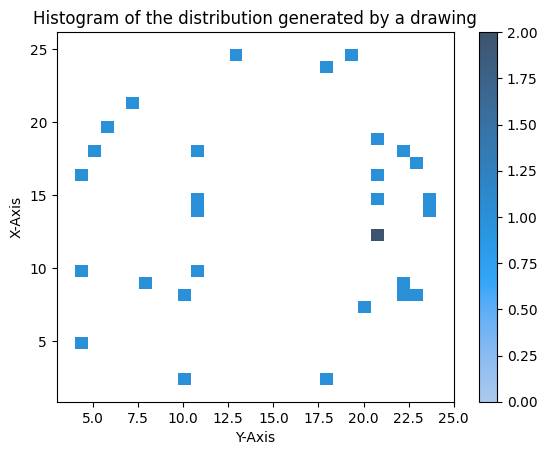

In [27]:
plot_histogram_from_points(x[:30], histplot_kwargs=dict(bins=28))
plt.show()

# Probando clase `GibbsPosteriorPiN` datos modificados

Probamos el algoritmo de Gibbs utilizando los datos modificados.

In [28]:
%%time
mcmc = GibbsPosteriorPiN(data=x[:30], models=faces_modified, seed=rng)

2023-01-23 15:59:56,627: INFO [bwb.distributions:232] init PosteriorPiN: n_data=30, n_models=161666
2023-01-23 15:59:56,631: INFO [bwb.distributions:434] Executing _first_step
2023-01-23 15:59:56,633: DEBUG [bwb.distributions:247] Calculating the likelihood cache...
2023-01-23 16:00:03,198: DEBUG [bwb.distributions:249] Likelihood cache calculated.
2023-01-23 16:00:03,200: DEBUG [bwb.distributions:436] likelihood_sum = 1.3241917735850309e-77
2023-01-23 16:00:03,204: INFO [bwb.distributions:440] First model selected: 113457.


CPU times: total: 6.55 s
Wall time: 6.58 s


Muestreamos a partir de de esta instancia.

In [29]:
%%time
mcmc.rvs(size=1_000)
mcmc

2023-01-23 16:00:03,225: DEBUG [bwb.distributions:288] ========== i = 0 ==========
2023-01-23 16:00:03,226: DEBUG [bwb.distributions:456] u = 0.1571363048589508
2023-01-23 16:00:03,228: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 113457.
2023-01-23 16:00:03,235: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:03,238: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:03,239: DEBUG [bwb.distributions:478] last_i = 113457 -> next_i = 0.
2023-01-23 16:00:03,241: DEBUG [bwb.distributions:288] ========== i = 1 ==========
2023-01-23 16:00:03,242: DEBUG [bwb.distributions:456] u = 0.9793461191526043
2023-01-23 16:00:03,243: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 0.
2023-01-23 16:00:03,250: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38578623227510905
2023-01-23 16:00:03,251: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.47569752194

2023-01-23 16:00:03,449: DEBUG [bwb.distributions:288] ========== i = 17 ==========
2023-01-23 16:00:03,450: DEBUG [bwb.distributions:456] u = 0.5362785838816683
2023-01-23 16:00:03,456: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38518544516500747
2023-01-23 16:00:03,457: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.418850280371157e-80
2023-01-23 16:00:03,458: DEBUG [bwb.distributions:288] ========== i = 18 ==========
2023-01-23 16:00:03,459: DEBUG [bwb.distributions:456] u = 0.49946950194544293
2023-01-23 16:00:03,469: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39551997759705837
2023-01-23 16:00:03,472: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7929295730417164e-79
2023-01-23 16:00:03,476: DEBUG [bwb.distributions:288] ========== i = 19 ==========
2023-01-23 16:00:03,478: DEBUG [bwb.distributions:456] u = 0.6587062087749485
2023-01-23 16:00:03,487: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3846724863209129
2023-01-23 16:00:03

2023-01-23 16:00:03,684: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 124611.
2023-01-23 16:00:03,685: DEBUG [bwb.distributions:288] ========== i = 37 ==========
2023-01-23 16:00:03,686: DEBUG [bwb.distributions:456] u = 0.7137561134564273
2023-01-23 16:00:03,687: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 124611.
2023-01-23 16:00:03,692: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:03,694: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:03,696: DEBUG [bwb.distributions:478] last_i = 124611 -> next_i = 0.
2023-01-23 16:00:03,697: DEBUG [bwb.distributions:288] ========== i = 38 ==========
2023-01-23 16:00:03,698: DEBUG [bwb.distributions:456] u = 0.22546763764267463
2023-01-23 16:00:03,703: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39671435576315867
2023-01-23 16:00:03,704: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01

2023-01-23 16:00:04,019: DEBUG [bwb.distributions:478] last_i = 71039 -> next_i = 0.
2023-01-23 16:00:04,020: DEBUG [bwb.distributions:288] ========== i = 54 ==========
2023-01-23 16:00:04,021: DEBUG [bwb.distributions:456] u = 0.8606674662887857
2023-01-23 16:00:04,026: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3843648293692599
2023-01-23 16:00:04,028: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.990107928768707e-81
2023-01-23 16:00:04,030: DEBUG [bwb.distributions:288] ========== i = 55 ==========
2023-01-23 16:00:04,031: DEBUG [bwb.distributions:456] u = 0.4360526211095247
2023-01-23 16:00:04,036: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.384536604826915
2023-01-23 16:00:04,037: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.1902698556646313e-80
2023-01-23 16:00:04,038: DEBUG [bwb.distributions:288] ========== i = 56 ==========
2023-01-23 16:00:04,039: DEBUG [bwb.distributions:456] u = 0.5426363551828088
2023-01-23 16:00:04,044: DEBU

2023-01-23 16:00:04,233: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 74415.
2023-01-23 16:00:04,241: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:04,243: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:04,245: DEBUG [bwb.distributions:478] last_i = 74415 -> next_i = 0.
2023-01-23 16:00:04,248: DEBUG [bwb.distributions:288] ========== i = 73 ==========
2023-01-23 16:00:04,250: DEBUG [bwb.distributions:456] u = 0.8975484384654047
2023-01-23 16:00:04,259: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3849235693843888
2023-01-23 16:00:04,262: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.5202863372394635e-80
2023-01-23 16:00:04,265: DEBUG [bwb.distributions:288] ========== i = 74 ==========
2023-01-23 16:00:04,267: DEBUG [bwb.distributions:456] u = 0.34014086964374357
2023-01-23 16:00:04,273: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3850817361168281
2023

2023-01-23 16:00:04,506: DEBUG [bwb.distributions:288] ========== i = 92 ==========
2023-01-23 16:00:04,508: DEBUG [bwb.distributions:456] u = 0.21930655779719122
2023-01-23 16:00:04,509: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 46185.
2023-01-23 16:00:04,516: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:04,517: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:04,518: DEBUG [bwb.distributions:478] last_i = 46185 -> next_i = 142502.
2023-01-23 16:00:04,520: DEBUG [bwb.distributions:288] ========== i = 93 ==========
2023-01-23 16:00:04,521: DEBUG [bwb.distributions:456] u = 0.1188165758920744
2023-01-23 16:00:04,525: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:04,527: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:04,528: DEBUG [bwb.distributions:478] last_i = 142502 -> next_i = 0.
2023-01-23 16:00:04

2023-01-23 16:00:04,735: DEBUG [bwb.distributions:456] u = 0.07401970741518082
2023-01-23 16:00:04,742: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:04,743: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:04,745: DEBUG [bwb.distributions:478] last_i = 58473 -> next_i = 0.
2023-01-23 16:00:04,746: DEBUG [bwb.distributions:288] ========== i = 112 ==========
2023-01-23 16:00:04,748: DEBUG [bwb.distributions:456] u = 0.36111994322943897
2023-01-23 16:00:04,753: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3845727396129037
2023-01-23 16:00:04,754: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.314580216945317e-80
2023-01-23 16:00:04,755: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 99315.
2023-01-23 16:00:04,756: DEBUG [bwb.distributions:288] ========== i = 113 ==========
2023-01-23 16:00:04,758: DEBUG [bwb.distributions:456] u = 0.7626190539217277
2023-01-23 16:00:04,759: DEBUG [bwb.dis

2023-01-23 16:00:04,949: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 58473.
2023-01-23 16:00:04,950: DEBUG [bwb.distributions:288] ========== i = 130 ==========
2023-01-23 16:00:04,952: DEBUG [bwb.distributions:456] u = 0.4243520609547621
2023-01-23 16:00:04,958: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:04,959: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:04,961: DEBUG [bwb.distributions:478] last_i = 58473 -> next_i = 0.
2023-01-23 16:00:04,963: DEBUG [bwb.distributions:288] ========== i = 131 ==========
2023-01-23 16:00:04,964: DEBUG [bwb.distributions:456] u = 0.291472428066738
2023-01-23 16:00:04,970: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3918271117129147
2023-01-23 16:00:04,971: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.5806615393780075e-79
2023-01-23 16:00:04,972: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 134930.
2023-01-23 16:00:04,974: DEBUG [b

2023-01-23 16:00:05,188: DEBUG [bwb.distributions:288] ========== i = 149 ==========
2023-01-23 16:00:05,191: DEBUG [bwb.distributions:456] u = 0.5491071960244631
2023-01-23 16:00:05,197: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39617520640291765
2023-01-23 16:00:05,198: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:05,200: DEBUG [bwb.distributions:288] ========== i = 150 ==========
2023-01-23 16:00:05,201: DEBUG [bwb.distributions:456] u = 0.6050075319221164
2023-01-23 16:00:05,208: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3858214423061115
2023-01-23 16:00:05,209: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.596043435444562e-80
2023-01-23 16:00:05,210: DEBUG [bwb.distributions:288] ========== i = 151 ==========
2023-01-23 16:00:05,213: DEBUG [bwb.distributions:456] u = 0.12301502666117314
2023-01-23 16:00:05,218: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3841917858231349
2023-01-23 16:00:

2023-01-23 16:00:05,473: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38419535974728025
2023-01-23 16:00:05,475: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.5170412001479703e-82
2023-01-23 16:00:05,476: DEBUG [bwb.distributions:288] ========== i = 170 ==========
2023-01-23 16:00:05,477: DEBUG [bwb.distributions:456] u = 0.837992405744867
2023-01-23 16:00:05,484: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3847517417058969
2023-01-23 16:00:05,485: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.9300362648787335e-80
2023-01-23 16:00:05,486: DEBUG [bwb.distributions:288] ========== i = 171 ==========
2023-01-23 16:00:05,488: DEBUG [bwb.distributions:456] u = 0.5646495430333655
2023-01-23 16:00:05,493: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38420483378206866
2023-01-23 16:00:05,497: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.7823033991936706e-82
2023-01-23 16:00:05,499: DEBUG [bwb.distributions:288] ========== i = 

2023-01-23 16:00:05,698: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.5806615393780075e-79
2023-01-23 16:00:05,699: DEBUG [bwb.distributions:288] ========== i = 190 ==========
2023-01-23 16:00:05,701: DEBUG [bwb.distributions:456] u = 0.3082237455683131
2023-01-23 16:00:05,706: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39551997759705837
2023-01-23 16:00:05,708: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7929295730417164e-79
2023-01-23 16:00:05,710: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 112656.
2023-01-23 16:00:05,712: DEBUG [bwb.distributions:288] ========== i = 191 ==========
2023-01-23 16:00:05,714: DEBUG [bwb.distributions:456] u = 0.6014929634649732
2023-01-23 16:00:05,719: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:05,720: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:05,721: DEBUG [bwb.distributions:478] last_i = 112656 -> next_i = 0.
2023-

2023-01-23 16:00:05,898: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 76974.
2023-01-23 16:00:05,900: DEBUG [bwb.distributions:288] ========== i = 209 ==========
2023-01-23 16:00:05,901: DEBUG [bwb.distributions:456] u = 0.26406058915346464
2023-01-23 16:00:05,902: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 76974.
2023-01-23 16:00:05,907: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:05,909: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:05,910: DEBUG [bwb.distributions:478] last_i = 76974 -> next_i = 0.
2023-01-23 16:00:05,911: DEBUG [bwb.distributions:288] ========== i = 210 ==========
2023-01-23 16:00:05,913: DEBUG [bwb.distributions:456] u = 0.4856925072237638
2023-01-23 16:00:05,918: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39671435576315867
2023-01-23 16:00:05,919: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-

2023-01-23 16:00:06,112: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:06,113: DEBUG [bwb.distributions:478] last_i = 74049 -> next_i = 142502.
2023-01-23 16:00:06,115: DEBUG [bwb.distributions:288] ========== i = 228 ==========
2023-01-23 16:00:06,116: DEBUG [bwb.distributions:456] u = 0.661812054856409
2023-01-23 16:00:06,122: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:06,124: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:06,125: DEBUG [bwb.distributions:478] last_i = 142502 -> next_i = 0.
2023-01-23 16:00:06,126: DEBUG [bwb.distributions:288] ========== i = 229 ==========
2023-01-23 16:00:06,128: DEBUG [bwb.distributions:456] u = 0.7050082766325282
2023-01-23 16:00:06,136: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3847399798120581
2023-01-23 16:00:06,138: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.88961337410206e-80
2023-

2023-01-23 16:00:06,376: DEBUG [bwb.distributions:456] u = 0.7712118706198419
2023-01-23 16:00:06,383: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38419745332279115
2023-01-23 16:00:06,384: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.238613840611611e-82
2023-01-23 16:00:06,385: DEBUG [bwb.distributions:288] ========== i = 248 ==========
2023-01-23 16:00:06,387: DEBUG [bwb.distributions:456] u = 0.05223649849813272
2023-01-23 16:00:06,393: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3842098513765815
2023-01-23 16:00:06,396: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.511571245073286e-82
2023-01-23 16:00:06,397: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 30119.
2023-01-23 16:00:06,399: DEBUG [bwb.distributions:288] ========== i = 249 ==========
2023-01-23 16:00:06,400: DEBUG [bwb.distributions:456] u = 0.6165536876737592
2023-01-23 16:00:06,401: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 30119.


2023-01-23 16:00:06,720: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:06,722: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:06,723: DEBUG [bwb.distributions:478] last_i = 119026 -> next_i = 0.
2023-01-23 16:00:06,725: DEBUG [bwb.distributions:288] ========== i = 267 ==========
2023-01-23 16:00:06,727: DEBUG [bwb.distributions:456] u = 0.9568575277000096
2023-01-23 16:00:06,748: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39617520640291765
2023-01-23 16:00:06,749: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:06,750: DEBUG [bwb.distributions:288] ========== i = 268 ==========
2023-01-23 16:00:06,753: DEBUG [bwb.distributions:456] u = 0.4734370539077851
2023-01-23 16:00:06,767: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39671435576315867
2023-01-23 16:00:06,769: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79


2023-01-23 16:00:07,007: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.708998648440232e-83
2023-01-23 16:00:07,008: DEBUG [bwb.distributions:288] ========== i = 287 ==========
2023-01-23 16:00:07,010: DEBUG [bwb.distributions:456] u = 0.08686521852818196
2023-01-23 16:00:07,017: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3918271117129147
2023-01-23 16:00:07,018: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.5806615393780075e-79
2023-01-23 16:00:07,019: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 134930.
2023-01-23 16:00:07,020: DEBUG [bwb.distributions:288] ========== i = 288 ==========
2023-01-23 16:00:07,022: DEBUG [bwb.distributions:456] u = 0.41527643051770413
2023-01-23 16:00:07,031: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:07,032: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:07,034: DEBUG [bwb.distributions:478] last_i = 134930 -> next_i = 0.
2023-

2023-01-23 16:00:07,282: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:07,283: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:07,284: DEBUG [bwb.distributions:478] last_i = 142502 -> next_i = 0.
2023-01-23 16:00:07,285: DEBUG [bwb.distributions:288] ========== i = 308 ==========
2023-01-23 16:00:07,287: DEBUG [bwb.distributions:456] u = 0.4407115082022164
2023-01-23 16:00:07,298: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39617520640291765
2023-01-23 16:00:07,299: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:07,301: DEBUG [bwb.distributions:288] ========== i = 309 ==========
2023-01-23 16:00:07,303: DEBUG [bwb.distributions:456] u = 0.578107098473754
2023-01-23 16:00:07,312: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38419851462436144
2023-01-23 16:00:07,314: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.6043994948247903e-82


2023-01-23 16:00:07,891: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38531866008131627
2023-01-23 16:00:07,893: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.87547663322892e-80
2023-01-23 16:00:07,895: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 120975.
2023-01-23 16:00:07,899: DEBUG [bwb.distributions:288] ========== i = 326 ==========
2023-01-23 16:00:07,901: DEBUG [bwb.distributions:456] u = 0.7593292133266495
2023-01-23 16:00:07,909: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:07,911: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:07,916: DEBUG [bwb.distributions:478] last_i = 120975 -> next_i = 0.
2023-01-23 16:00:07,919: DEBUG [bwb.distributions:288] ========== i = 327 ==========
2023-01-23 16:00:07,922: DEBUG [bwb.distributions:456] u = 0.4780293763989356
2023-01-23 16:00:07,929: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39671435576315867
2023-01-23 16:00:07,933: 

2023-01-23 16:00:08,247: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:08,250: DEBUG [bwb.distributions:288] ========== i = 347 ==========
2023-01-23 16:00:08,252: DEBUG [bwb.distributions:456] u = 0.8471138628934799
2023-01-23 16:00:08,262: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3918271117129147
2023-01-23 16:00:08,267: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.5806615393780075e-79
2023-01-23 16:00:08,270: DEBUG [bwb.distributions:288] ========== i = 348 ==========
2023-01-23 16:00:08,273: DEBUG [bwb.distributions:456] u = 0.407694242611199
2023-01-23 16:00:08,281: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39671435576315867
2023-01-23 16:00:08,282: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-23 16:00:08,284: DEBUG [bwb.distributions:288] ========== i = 349 ==========
2023-01-23 16:00:08,286: DEBUG [bwb.distributions:456] u = 0.6696493095578478


2023-01-23 16:00:08,561: DEBUG [bwb.distributions:288] ========== i = 367 ==========
2023-01-23 16:00:08,563: DEBUG [bwb.distributions:456] u = 0.37840438975605006
2023-01-23 16:00:08,568: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3842142151820957
2023-01-23 16:00:08,569: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.015479997740324e-82
2023-01-23 16:00:08,570: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 144133.
2023-01-23 16:00:08,572: DEBUG [bwb.distributions:288] ========== i = 368 ==========
2023-01-23 16:00:08,573: DEBUG [bwb.distributions:456] u = 0.7896584537635604
2023-01-23 16:00:08,575: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 144133.
2023-01-23 16:00:08,582: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:08,584: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:08,586: DEBUG [bwb.distributions:478] last_i = 144133 -> next_i = 0.
2023-0

2023-01-23 16:00:08,903: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:08,904: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 142502.
2023-01-23 16:00:08,906: DEBUG [bwb.distributions:288] ========== i = 386 ==========
2023-01-23 16:00:08,908: DEBUG [bwb.distributions:456] u = 0.47654751341364954
2023-01-23 16:00:08,915: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9869389931097944
2023-01-23 16:00:08,917: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.306257032539342e-79
2023-01-23 16:00:08,919: DEBUG [bwb.distributions:478] last_i = 142502 -> next_i = 58473.
2023-01-23 16:00:08,921: DEBUG [bwb.distributions:288] ========== i = 387 ==========
2023-01-23 16:00:08,924: DEBUG [bwb.distributions:456] u = 0.4847785064963399
2023-01-23 16:00:08,931: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:08,933: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
20

2023-01-23 16:00:09,183: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-23 16:00:09,184: DEBUG [bwb.distributions:288] ========== i = 405 ==========
2023-01-23 16:00:09,187: DEBUG [bwb.distributions:456] u = 0.07164154309466397
2023-01-23 16:00:09,194: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3849764397921686
2023-01-23 16:00:09,196: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.701796952588953e-80
2023-01-23 16:00:09,199: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 134270.
2023-01-23 16:00:09,201: DEBUG [bwb.distributions:288] ========== i = 406 ==========
2023-01-23 16:00:09,203: DEBUG [bwb.distributions:456] u = 0.7266679583153499
2023-01-23 16:00:09,205: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 134270.
2023-01-23 16:00:09,213: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:09,215: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154

2023-01-23 16:00:09,484: DEBUG [bwb.distributions:288] ========== i = 425 ==========
2023-01-23 16:00:09,486: DEBUG [bwb.distributions:456] u = 0.2729448129472253
2023-01-23 16:00:09,490: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39551997759705837
2023-01-23 16:00:09,491: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7929295730417164e-79
2023-01-23 16:00:09,492: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 112656.
2023-01-23 16:00:09,493: DEBUG [bwb.distributions:288] ========== i = 426 ==========
2023-01-23 16:00:09,494: DEBUG [bwb.distributions:456] u = 0.6863426114681299
2023-01-23 16:00:09,500: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:09,502: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-23 16:00:09,504: DEBUG [bwb.distributions:478] last_i = 112656 -> next_i = 28549.
2023-01-23 16:00:09,505: DEBUG [bwb.distributions:288] ========== i = 427 ==========
2023-01-23 16:00:09,506: D

2023-01-23 16:00:09,751: DEBUG [bwb.distributions:288] ========== i = 444 ==========
2023-01-23 16:00:09,753: DEBUG [bwb.distributions:456] u = 0.46384634940914826
2023-01-23 16:00:09,755: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 113155.
2023-01-23 16:00:09,765: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:09,767: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.475697521946131e-80
2023-01-23 16:00:09,767: DEBUG [bwb.distributions:478] last_i = 113155 -> next_i = 31563.
2023-01-23 16:00:09,770: DEBUG [bwb.distributions:288] ========== i = 445 ==========
2023-01-23 16:00:09,771: DEBUG [bwb.distributions:456] u = 0.9621191496915854
2023-01-23 16:00:09,776: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:09,778: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:09,780: DEBUG [bwb.distributions:478] last_i = 31563 -> next_i = 0.
2023-01-23 16:00:0

2023-01-23 16:00:10,017: DEBUG [bwb.distributions:478] last_i = 104592 -> next_i = 128419.
2023-01-23 16:00:10,020: DEBUG [bwb.distributions:288] ========== i = 462 ==========
2023-01-23 16:00:10,023: DEBUG [bwb.distributions:456] u = 0.3599659271576924
2023-01-23 16:00:10,025: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 128419.
2023-01-23 16:00:10,036: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:10,038: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:10,041: DEBUG [bwb.distributions:478] last_i = 128419 -> next_i = 0.
2023-01-23 16:00:10,043: DEBUG [bwb.distributions:288] ========== i = 463 ==========
2023-01-23 16:00:10,049: DEBUG [bwb.distributions:456] u = 0.788793822670777
2023-01-23 16:00:10,056: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3846046190177332
2023-01-23 16:00:10,058: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4242318838826857e-80
20

2023-01-23 16:00:10,240: DEBUG [bwb.distributions:456] u = 0.4046286224395348
2023-01-23 16:00:10,245: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38430417383177096
2023-01-23 16:00:10,246: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9010535830094537e-81
2023-01-23 16:00:10,247: DEBUG [bwb.distributions:288] ========== i = 483 ==========
2023-01-23 16:00:10,248: DEBUG [bwb.distributions:456] u = 0.8861450870177845
2023-01-23 16:00:10,252: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39617520640291765
2023-01-23 16:00:10,253: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:10,255: DEBUG [bwb.distributions:288] ========== i = 484 ==========
2023-01-23 16:00:10,256: DEBUG [bwb.distributions:456] u = 0.4000881656528953
2023-01-23 16:00:10,261: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39551997759705837
2023-01-23 16:00:10,262: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.79292957304

2023-01-23 16:00:10,427: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 93190.
2023-01-23 16:00:10,433: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:10,434: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:10,435: DEBUG [bwb.distributions:478] last_i = 93190 -> next_i = 0.
2023-01-23 16:00:10,436: DEBUG [bwb.distributions:288] ========== i = 502 ==========
2023-01-23 16:00:10,437: DEBUG [bwb.distributions:456] u = 0.8840305511926667
2023-01-23 16:00:10,442: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38421192999934906
2023-01-23 16:00:10,443: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.2279362518034e-82
2023-01-23 16:00:10,445: DEBUG [bwb.distributions:288] ========== i = 503 ==========
2023-01-23 16:00:10,446: DEBUG [bwb.distributions:456] u = 0.8529279310194022
2023-01-23 16:00:10,451: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38566046752841876
2023

2023-01-23 16:00:10,633: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.529301927114226e-80
2023-01-23 16:00:10,635: DEBUG [bwb.distributions:288] ========== i = 522 ==========
2023-01-23 16:00:10,637: DEBUG [bwb.distributions:456] u = 0.25345161201088784
2023-01-23 16:00:10,642: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39671435576315867
2023-01-23 16:00:10,644: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-23 16:00:10,645: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 28549.
2023-01-23 16:00:10,647: DEBUG [bwb.distributions:288] ========== i = 523 ==========
2023-01-23 16:00:10,649: DEBUG [bwb.distributions:456] u = 0.3649175686436741
2023-01-23 16:00:10,654: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9721364047603582
2023-01-23 16:00:10,655: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.0456612407442646e-80
2023-01-23 16:00:10,656: DEBUG [bwb.distributions:478] last_i = 28549 -> next

2023-01-23 16:00:10,825: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39617520640291765
2023-01-23 16:00:10,825: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:10,827: DEBUG [bwb.distributions:288] ========== i = 542 ==========
2023-01-23 16:00:10,829: DEBUG [bwb.distributions:456] u = 0.5893116997194271
2023-01-23 16:00:10,834: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38502521777686616
2023-01-23 16:00:10,835: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.8692135655325677e-80
2023-01-23 16:00:10,836: DEBUG [bwb.distributions:288] ========== i = 543 ==========
2023-01-23 16:00:10,837: DEBUG [bwb.distributions:456] u = 0.23731560280537956
2023-01-23 16:00:10,842: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38566046752841876
2023-01-23 16:00:10,843: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.0456612407442646e-80
2023-01-23 16:00:10,844: DEBUG [bwb.distributions:478] last_i = 0 -

2023-01-23 16:00:11,067: DEBUG [bwb.distributions:288] ========== i = 560 ==========
2023-01-23 16:00:11,069: DEBUG [bwb.distributions:456] u = 0.3152086903555229
2023-01-23 16:00:11,075: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:11,077: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:11,078: DEBUG [bwb.distributions:478] last_i = 142502 -> next_i = 0.
2023-01-23 16:00:11,083: DEBUG [bwb.distributions:288] ========== i = 561 ==========
2023-01-23 16:00:11,084: DEBUG [bwb.distributions:456] u = 0.22284278064151264
2023-01-23 16:00:11,090: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39671435576315867
2023-01-23 16:00:11,091: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-23 16:00:11,094: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 28549.
2023-01-23 16:00:11,097: DEBUG [bwb.distributions:288] ========== i = 562 ==========
2023-01-23 16:00:11,100: DEBUG 

2023-01-23 16:00:11,352: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:11,353: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:11,354: DEBUG [bwb.distributions:478] last_i = 33892 -> next_i = 0.
2023-01-23 16:00:11,356: DEBUG [bwb.distributions:288] ========== i = 579 ==========
2023-01-23 16:00:11,358: DEBUG [bwb.distributions:456] u = 0.9314497573785021
2023-01-23 16:00:11,366: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38799140085199785
2023-01-23 16:00:11,368: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.2970686447954855e-79
2023-01-23 16:00:11,370: DEBUG [bwb.distributions:288] ========== i = 580 ==========
2023-01-23 16:00:11,372: DEBUG [bwb.distributions:456] u = 0.5884011275696732
2023-01-23 16:00:11,378: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38450665225351593
2023-01-23 16:00:11,381: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.0872097410599481e-80


2023-01-23 16:00:11,600: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:11,601: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-23 16:00:11,603: DEBUG [bwb.distributions:478] last_i = 58473 -> next_i = 28549.
2023-01-23 16:00:11,604: DEBUG [bwb.distributions:288] ========== i = 599 ==========
2023-01-23 16:00:11,606: DEBUG [bwb.distributions:456] u = 0.17839030965367542
2023-01-23 16:00:11,613: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:11,614: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:11,632: DEBUG [bwb.distributions:478] last_i = 28549 -> next_i = 0.
2023-01-23 16:00:11,635: DEBUG [bwb.distributions:288] ========== i = 600 ==========
2023-01-23 16:00:11,636: DEBUG [bwb.distributions:456] u = 0.16253004861607934
2023-01-23 16:00:11,641: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3858214423061115
2023-01-23 16:00:11,642: DEBUG [bwb.d

2023-01-23 16:00:11,881: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:11,882: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:11,884: DEBUG [bwb.distributions:478] last_i = 134930 -> next_i = 0.
2023-01-23 16:00:11,885: DEBUG [bwb.distributions:288] ========== i = 619 ==========
2023-01-23 16:00:11,886: DEBUG [bwb.distributions:456] u = 0.6450818265671943
2023-01-23 16:00:11,891: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38799140085199785
2023-01-23 16:00:11,892: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.2970686447954855e-79
2023-01-23 16:00:11,893: DEBUG [bwb.distributions:288] ========== i = 620 ==========
2023-01-23 16:00:11,895: DEBUG [bwb.distributions:456] u = 0.46311021809305375
2023-01-23 16:00:11,901: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38431139424453425
2023-01-23 16:00:11,902: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.149768416982239e-81

2023-01-23 16:00:12,071: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-23 16:00:12,073: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 28549.
2023-01-23 16:00:12,074: DEBUG [bwb.distributions:288] ========== i = 638 ==========
2023-01-23 16:00:12,075: DEBUG [bwb.distributions:456] u = 0.6043034294274493
2023-01-23 16:00:12,081: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:12,082: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:12,083: DEBUG [bwb.distributions:478] last_i = 28549 -> next_i = 0.
2023-01-23 16:00:12,084: DEBUG [bwb.distributions:288] ========== i = 639 ==========
2023-01-23 16:00:12,085: DEBUG [bwb.distributions:456] u = 0.07709966895130538
2023-01-23 16:00:12,089: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39617520640291765
2023-01-23 16:00:12,089: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01

2023-01-23 16:00:12,296: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 120683.
2023-01-23 16:00:12,306: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:12,308: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:12,310: DEBUG [bwb.distributions:478] last_i = 120683 -> next_i = 0.
2023-01-23 16:00:12,313: DEBUG [bwb.distributions:288] ========== i = 658 ==========
2023-01-23 16:00:12,317: DEBUG [bwb.distributions:456] u = 0.3349016905838995
2023-01-23 16:00:12,324: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3858214423061115
2023-01-23 16:00:12,327: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.596043435444562e-80
2023-01-23 16:00:12,328: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 94176.
2023-01-23 16:00:12,331: DEBUG [bwb.distributions:288] ========== i = 659 ==========
2023-01-23 16:00:12,334: DEBUG [bwb.distributions:456] u = 0.859799722094611
2023-01-2

2023-01-23 16:00:12,527: DEBUG [bwb.distributions:478] last_i = 81643 -> next_i = 0.
2023-01-23 16:00:12,528: DEBUG [bwb.distributions:288] ========== i = 676 ==========
2023-01-23 16:00:12,530: DEBUG [bwb.distributions:456] u = 0.9227316827700696
2023-01-23 16:00:12,535: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38421230097278763
2023-01-23 16:00:12,536: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.35578566228029e-82
2023-01-23 16:00:12,537: DEBUG [bwb.distributions:288] ========== i = 677 ==========
2023-01-23 16:00:12,538: DEBUG [bwb.distributions:456] u = 0.10718650971219779
2023-01-23 16:00:12,543: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38799140085199785
2023-01-23 16:00:12,544: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.2970686447954855e-79
2023-01-23 16:00:12,546: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 136494.
2023-01-23 16:00:12,547: DEBUG [bwb.distributions:288] ========== i = 678 ==========
2023-01-23 16:0

2023-01-23 16:00:12,724: DEBUG [bwb.distributions:456] u = 0.6797856466201845
2023-01-23 16:00:12,729: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:12,730: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.6983774054460234e-80
2023-01-23 16:00:12,731: DEBUG [bwb.distributions:478] last_i = 112756 -> next_i = 111327.
2023-01-23 16:00:12,731: DEBUG [bwb.distributions:288] ========== i = 696 ==========
2023-01-23 16:00:12,732: DEBUG [bwb.distributions:456] u = 0.7163539613309406
2023-01-23 16:00:12,737: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:12,738: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:12,739: DEBUG [bwb.distributions:478] last_i = 111327 -> next_i = 0.
2023-01-23 16:00:12,740: DEBUG [bwb.distributions:288] ========== i = 697 ==========
2023-01-23 16:00:12,742: DEBUG [bwb.distributions:456] u = 0.9779273018640902
2023-01-23 16:00:12,747: DEBUG [bwb.distribution

2023-01-23 16:00:12,914: DEBUG [bwb.distributions:288] ========== i = 714 ==========
2023-01-23 16:00:12,915: DEBUG [bwb.distributions:456] u = 0.8477155540953429
2023-01-23 16:00:12,917: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 124890.
2023-01-23 16:00:12,923: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:12,924: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:12,925: DEBUG [bwb.distributions:478] last_i = 124890 -> next_i = 0.
2023-01-23 16:00:12,926: DEBUG [bwb.distributions:288] ========== i = 715 ==========
2023-01-23 16:00:12,927: DEBUG [bwb.distributions:456] u = 0.5399252440937878
2023-01-23 16:00:12,932: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38478960188984956
2023-01-23 16:00:12,933: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.0601361229899543e-80
2023-01-23 16:00:12,934: DEBUG [bwb.distributions:288] ========== i = 716 ==========
2023-0

2023-01-23 16:00:13,114: DEBUG [bwb.distributions:288] ========== i = 732 ==========
2023-01-23 16:00:13,115: DEBUG [bwb.distributions:456] u = 0.7570602985357707
2023-01-23 16:00:13,120: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:13,121: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:13,122: DEBUG [bwb.distributions:478] last_i = 136494 -> next_i = 0.
2023-01-23 16:00:13,123: DEBUG [bwb.distributions:288] ========== i = 733 ==========
2023-01-23 16:00:13,124: DEBUG [bwb.distributions:456] u = 0.3413718626101272
2023-01-23 16:00:13,130: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3843032150748445
2023-01-23 16:00:13,131: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8680274731846907e-81
2023-01-23 16:00:13,132: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 11135.
2023-01-23 16:00:13,133: DEBUG [bwb.distributions:288] ========== i = 734 ==========
2023-01-23 16:00:13,134: DEBUG [

2023-01-23 16:00:13,313: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:13,315: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7929295730417164e-79
2023-01-23 16:00:13,317: DEBUG [bwb.distributions:478] last_i = 89707 -> next_i = 112656.
2023-01-23 16:00:13,318: DEBUG [bwb.distributions:288] ========== i = 752 ==========
2023-01-23 16:00:13,319: DEBUG [bwb.distributions:456] u = 0.30590388891311626
2023-01-23 16:00:13,323: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:13,324: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:13,325: DEBUG [bwb.distributions:478] last_i = 112656 -> next_i = 0.
2023-01-23 16:00:13,327: DEBUG [bwb.distributions:288] ========== i = 753 ==========
2023-01-23 16:00:13,328: DEBUG [bwb.distributions:456] u = 0.9975371692110346
2023-01-23 16:00:13,333: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3858513875754752
2023-01-23 16:00:13,334: DEBUG [bwb

2023-01-23 16:00:13,584: DEBUG [bwb.distributions:456] u = 0.6958203783230225
2023-01-23 16:00:13,591: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3858513875754752
2023-01-23 16:00:13,592: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.6983774054460234e-80
2023-01-23 16:00:13,594: DEBUG [bwb.distributions:288] ========== i = 771 ==========
2023-01-23 16:00:13,595: DEBUG [bwb.distributions:456] u = 0.3472086167071786
2023-01-23 16:00:13,603: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39100075930236056
2023-01-23 16:00:13,605: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.306257032539342e-79
2023-01-23 16:00:13,606: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 58473.
2023-01-23 16:00:13,608: DEBUG [bwb.distributions:288] ========== i = 772 ==========
2023-01-23 16:00:13,610: DEBUG [bwb.distributions:456] u = 0.6527430920994067
2023-01-23 16:00:13,617: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:13,618: DEBUG [b

2023-01-23 16:00:13,798: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9697911196186031
2023-01-23 16:00:13,799: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.596764381237997e-82
2023-01-23 16:00:13,800: DEBUG [bwb.distributions:288] ========== i = 791 ==========
2023-01-23 16:00:13,801: DEBUG [bwb.distributions:456] u = 0.21707097477722626
2023-01-23 16:00:13,805: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:13,806: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:13,807: DEBUG [bwb.distributions:478] last_i = 142502 -> next_i = 0.
2023-01-23 16:00:13,808: DEBUG [bwb.distributions:288] ========== i = 792 ==========
2023-01-23 16:00:13,810: DEBUG [bwb.distributions:456] u = 0.209205147765802
2023-01-23 16:00:13,814: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38467259540263965
2023-01-23 16:00:13,816: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.6579811985755211e-80
2

2023-01-23 16:00:14,010: DEBUG [bwb.distributions:288] ========== i = 809 ==========
2023-01-23 16:00:14,011: DEBUG [bwb.distributions:456] u = 0.6738951054729815
2023-01-23 16:00:14,017: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38799140085199785
2023-01-23 16:00:14,018: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.2970686447954855e-79
2023-01-23 16:00:14,020: DEBUG [bwb.distributions:288] ========== i = 810 ==========
2023-01-23 16:00:14,023: DEBUG [bwb.distributions:456] u = 0.3012090903224518
2023-01-23 16:00:14,028: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3847614310609116
2023-01-23 16:00:14,030: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.9633344656885013e-80
2023-01-23 16:00:14,031: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 39702.
2023-01-23 16:00:14,033: DEBUG [bwb.distributions:288] ========== i = 811 ==========
2023-01-23 16:00:14,035: DEBUG [bwb.distributions:456] u = 0.9784533737558676
2023-01-23 16:00:14,039

2023-01-23 16:00:14,209: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.5196831509891226e-81
2023-01-23 16:00:14,210: DEBUG [bwb.distributions:288] ========== i = 830 ==========
2023-01-23 16:00:14,212: DEBUG [bwb.distributions:456] u = 0.6554077995845652
2023-01-23 16:00:14,217: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3842980176017125
2023-01-23 16:00:14,218: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.688988278269177e-81
2023-01-23 16:00:14,219: DEBUG [bwb.distributions:288] ========== i = 831 ==========
2023-01-23 16:00:14,220: DEBUG [bwb.distributions:456] u = 0.8889991954515393
2023-01-23 16:00:14,226: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38539858207891803
2023-01-23 16:00:14,227: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.149277111033835e-80
2023-01-23 16:00:14,228: DEBUG [bwb.distributions:288] ========== i = 832 ==========
2023-01-23 16:00:14,230: DEBUG [bwb.distributions:456] u = 0.6695211484476647


2023-01-23 16:00:14,410: DEBUG [bwb.distributions:456] u = 0.5032288499555093
2023-01-23 16:00:14,416: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39671435576315867
2023-01-23 16:00:14,418: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-23 16:00:14,419: DEBUG [bwb.distributions:288] ========== i = 850 ==========
2023-01-23 16:00:14,420: DEBUG [bwb.distributions:456] u = 0.426794485591258
2023-01-23 16:00:14,425: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3849896885789929
2023-01-23 16:00:14,427: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.7472738562832326e-80
2023-01-23 16:00:14,428: DEBUG [bwb.distributions:288] ========== i = 851 ==========
2023-01-23 16:00:14,431: DEBUG [bwb.distributions:456] u = 0.07991835791607027
2023-01-23 16:00:14,437: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38539858207891803
2023-01-23 16:00:14,439: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.1492771110338

2023-01-23 16:00:14,715: DEBUG [bwb.distributions:456] u = 0.4244791314312184
2023-01-23 16:00:14,720: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38483684818565506
2023-01-23 16:00:14,722: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.222453797952338e-80
2023-01-23 16:00:14,723: DEBUG [bwb.distributions:288] ========== i = 869 ==========
2023-01-23 16:00:14,724: DEBUG [bwb.distributions:456] u = 0.2904547181451199
2023-01-23 16:00:14,729: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3871071714379474
2023-01-23 16:00:14,731: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.97559790629075e-80
2023-01-23 16:00:14,732: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 74415.
2023-01-23 16:00:14,733: DEBUG [bwb.distributions:288] ========== i = 870 ==========
2023-01-23 16:00:14,735: DEBUG [bwb.distributions:456] u = 0.9028610373381174
2023-01-23 16:00:14,740: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:14,741: DEBUG [bwb

2023-01-23 16:00:14,947: DEBUG [bwb.distributions:288] ========== i = 888 ==========
2023-01-23 16:00:14,948: DEBUG [bwb.distributions:456] u = 0.5300650601351811
2023-01-23 16:00:14,952: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38432243170762914
2023-01-23 16:00:14,954: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.529947566946799e-81
2023-01-23 16:00:14,955: DEBUG [bwb.distributions:288] ========== i = 889 ==========
2023-01-23 16:00:14,956: DEBUG [bwb.distributions:456] u = 0.6992750118977196
2023-01-23 16:00:14,960: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39551997759705837
2023-01-23 16:00:14,961: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7929295730417164e-79
2023-01-23 16:00:14,963: DEBUG [bwb.distributions:288] ========== i = 890 ==========
2023-01-23 16:00:14,965: DEBUG [bwb.distributions:456] u = 0.008139493723942848
2023-01-23 16:00:14,970: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39551997759705837
2023-01-23 16:

2023-01-23 16:00:15,146: DEBUG [bwb.distributions:288] ========== i = 907 ==========
2023-01-23 16:00:15,148: DEBUG [bwb.distributions:456] u = 0.4533553111744568
2023-01-23 16:00:15,148: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 12878.
2023-01-23 16:00:15,154: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:15,155: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.235737531680215e-80
2023-01-23 16:00:15,156: DEBUG [bwb.distributions:478] last_i = 12878 -> next_i = 80051.
2023-01-23 16:00:15,157: DEBUG [bwb.distributions:288] ========== i = 908 ==========
2023-01-23 16:00:15,158: DEBUG [bwb.distributions:456] u = 0.32513466268969693
2023-01-23 16:00:15,160: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 80051.
2023-01-23 16:00:15,165: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:15,166: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.517968365352473e

2023-01-23 16:00:15,329: DEBUG [bwb.distributions:456] u = 0.3195985580025348
2023-01-23 16:00:15,334: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3874812264948627
2023-01-23 16:00:15,336: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.124427667774882e-79
2023-01-23 16:00:15,337: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 40131.
2023-01-23 16:00:15,339: DEBUG [bwb.distributions:288] ========== i = 926 ==========
2023-01-23 16:00:15,340: DEBUG [bwb.distributions:456] u = 0.5457418187061334
2023-01-23 16:00:15,345: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:15,347: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:15,349: DEBUG [bwb.distributions:478] last_i = 40131 -> next_i = 0.
2023-01-23 16:00:15,350: DEBUG [bwb.distributions:288] ========== i = 927 ==========
2023-01-23 16:00:15,351: DEBUG [bwb.distributions:456] u = 0.5321275318971607
2023-01-23 16:00:15,357: DEBUG [bwb.distr

2023-01-23 16:00:15,518: DEBUG [bwb.distributions:456] u = 0.16377272659174524
2023-01-23 16:00:15,522: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.38438075158672186
2023-01-23 16:00:15,524: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.538380226825983e-81
2023-01-23 16:00:15,524: DEBUG [bwb.distributions:478] last_i = 0 -> next_i = 68005.
2023-01-23 16:00:15,525: DEBUG [bwb.distributions:288] ========== i = 946 ==========
2023-01-23 16:00:15,526: DEBUG [bwb.distributions:456] u = 0.25579896585567397
2023-01-23 16:00:15,531: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:15,532: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:15,533: DEBUG [bwb.distributions:478] last_i = 68005 -> next_i = 0.
2023-01-23 16:00:15,534: DEBUG [bwb.distributions:288] ========== i = 947 ==========
2023-01-23 16:00:15,536: DEBUG [bwb.distributions:456] u = 0.9518682998174518
2023-01-23 16:00:15,540: DEBUG [bwb.di

2023-01-23 16:00:15,729: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:15,731: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:15,732: DEBUG [bwb.distributions:478] last_i = 80231 -> next_i = 0.
2023-01-23 16:00:15,733: DEBUG [bwb.distributions:288] ========== i = 964 ==========
2023-01-23 16:00:15,735: DEBUG [bwb.distributions:456] u = 0.6354552592323651
2023-01-23 16:00:15,739: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39617520640291765
2023-01-23 16:00:15,740: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:15,741: DEBUG [bwb.distributions:288] ========== i = 965 ==========
2023-01-23 16:00:15,743: DEBUG [bwb.distributions:456] u = 0.6431743633897312
2023-01-23 16:00:15,748: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.39617520640291765
2023-01-23 16:00:15,749: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79


2023-01-23 16:00:15,915: DEBUG [bwb.distributions:456] u = 0.22648365649400126
2023-01-23 16:00:15,920: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9839859489367656
2023-01-23 16:00:15,922: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.675819526738154e-80
2023-01-23 16:00:15,923: DEBUG [bwb.distributions:478] last_i = 134930 -> next_i = 140937.
2023-01-23 16:00:15,925: DEBUG [bwb.distributions:288] ========== i = 984 ==========
2023-01-23 16:00:15,926: DEBUG [bwb.distributions:456] u = 0.32133997488970767
2023-01-23 16:00:15,932: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:15,934: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 8.154492671600373e-78
2023-01-23 16:00:15,935: DEBUG [bwb.distributions:478] last_i = 140937 -> next_i = 0.
2023-01-23 16:00:15,937: DEBUG [bwb.distributions:288] ========== i = 985 ==========
2023-01-23 16:00:15,938: DEBUG [bwb.distributions:456] u = 0.24030523281493243
2023-01-23 16:00:15,946: DEBUG 

CPU times: total: 14.5 s
Wall time: 12.9 s


GibbsPosteriorPiN(n_data=30, n_models=161666, n_samples=1000, last_i=0, likelihood_sum=1.3241917735850309e-77)

Observamos el contador

In [30]:
mcmc.counter.most_common()

[(0, 627),
 (28549, 35),
 (142502, 30),
 (112656, 25),
 (58473, 21),
 (134930, 20),
 (74415, 8),
 (111327, 7),
 (40131, 7),
 (136494, 7),
 (147386, 7),
 (94176, 6),
 (124611, 5),
 (114248, 5),
 (71039, 5),
 (31563, 4),
 (98647, 4),
 (120975, 4),
 (13010, 3),
 (21477, 3),
 (50907, 3),
 (89707, 3),
 (76974, 3),
 (79011, 3),
 (7899, 3),
 (93190, 3),
 (65461, 3),
 (113457, 2),
 (127144, 2),
 (151876, 2),
 (68515, 2),
 (68005, 2),
 (99315, 2),
 (120250, 2),
 (65200, 2),
 (33892, 2),
 (7326, 2),
 (157368, 2),
 (16030, 2),
 (68236, 2),
 (140937, 2),
 (134270, 2),
 (100958, 2),
 (80515, 2),
 (112756, 2),
 (8551, 2),
 (81643, 2),
 (11135, 2),
 (39702, 2),
 (100062, 2),
 (56426, 2),
 (435, 1),
 (161639, 1),
 (128535, 1),
 (119794, 1),
 (109666, 1),
 (98710, 1),
 (23301, 1),
 (131058, 1),
 (5450, 1),
 (97979, 1),
 (12455, 1),
 (46185, 1),
 (15570, 1),
 (91227, 1),
 (42507, 1),
 (33476, 1),
 (123078, 1),
 (42612, 1),
 (29876, 1),
 (114408, 1),
 (156558, 1),
 (140584, 1),
 (85888, 1),
 (80756, 1),


Notamos que el algoritmo tiene especial preferencia para la primera cara. Esto tiene sentido, pues es de donde se obtuvieron los datos. Sin embargo, por esta misma razón, se intentará correr el algoritmo con los otros datos, excluyendo la primera cara.

In [31]:
plot_list_of_draws(mcmc.most_common())

# `GibbsPosteriorPiN` con los datos modificacos, sin el primer dibujo

In [32]:
%%time
mcmc = GibbsPosteriorPiN(data=x[:30], models=faces_modified[1:], seed=rng)

2023-01-23 16:00:16,213: INFO [bwb.distributions:232] init PosteriorPiN: n_data=30, n_models=161665
2023-01-23 16:00:16,215: INFO [bwb.distributions:434] Executing _first_step
2023-01-23 16:00:16,216: DEBUG [bwb.distributions:247] Calculating the likelihood cache...
2023-01-23 16:00:22,385: DEBUG [bwb.distributions:249] Likelihood cache calculated.
2023-01-23 16:00:22,387: DEBUG [bwb.distributions:436] likelihood_sum = 5.08742506424993e-78
2023-01-23 16:00:22,390: INFO [bwb.distributions:440] First model selected: 49113.


CPU times: total: 6.11 s
Wall time: 6.18 s


Muestreamos a partir de de esta instancia.

In [33]:
%%time
mcmc.rvs(size=1_000)
mcmc

2023-01-23 16:00:22,406: DEBUG [bwb.distributions:288] ========== i = 0 ==========
2023-01-23 16:00:22,412: DEBUG [bwb.distributions:456] u = 0.2553084749760438
2023-01-23 16:00:22,414: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 49113.
2023-01-23 16:00:22,423: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:22,425: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.7206855331119083e-81
2023-01-23 16:00:22,428: DEBUG [bwb.distributions:478] last_i = 49113 -> next_i = 42611.
2023-01-23 16:00:22,431: DEBUG [bwb.distributions:288] ========== i = 1 ==========
2023-01-23 16:00:22,434: DEBUG [bwb.distributions:456] u = 0.9079414066857031
2023-01-23 16:00:22,436: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 42611.
2023-01-23 16:00:22,444: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:22,446: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.5806615393780075e-79

2023-01-23 16:00:22,660: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.314580216945317e-80
2023-01-23 16:00:22,663: DEBUG [bwb.distributions:478] last_i = 58472 -> next_i = 99314.
2023-01-23 16:00:22,664: DEBUG [bwb.distributions:288] ========== i = 16 ==========
2023-01-23 16:00:22,666: DEBUG [bwb.distributions:456] u = 0.5318366466775467
2023-01-23 16:00:22,667: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 99314.
2023-01-23 16:00:22,673: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9978359624109862
2023-01-23 16:00:22,675: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1410564257099353e-81
2023-01-23 16:00:22,676: DEBUG [bwb.distributions:478] last_i = 99314 -> next_i = 126662.
2023-01-23 16:00:22,677: DEBUG [bwb.distributions:288] ========== i = 17 ==========
2023-01-23 16:00:22,678: DEBUG [bwb.distributions:456] u = 0.5778928152213265
2023-01-23 16:00:22,680: DEBUG [bwb.distributions:460] Computing the cache pro

2023-01-23 16:00:22,859: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:22,860: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-23 16:00:22,862: DEBUG [bwb.distributions:478] last_i = 29875 -> next_i = 28548.
2023-01-23 16:00:22,864: DEBUG [bwb.distributions:288] ========== i = 32 ==========
2023-01-23 16:00:22,865: DEBUG [bwb.distributions:456] u = 0.6490133036748073
2023-01-23 16:00:22,870: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9187689790287471
2023-01-23 16:00:22,872: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.182384032810933e-81
2023-01-23 16:00:22,873: DEBUG [bwb.distributions:478] last_i = 28548 -> next_i = 128418.
2023-01-23 16:00:22,874: DEBUG [bwb.distributions:288] ========== i = 33 ==========
2023-01-23 16:00:22,875: DEBUG [bwb.distributions:456] u = 0.15773647365097965
2023-01-23 16:00:22,876: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 128418.
2

2023-01-23 16:00:23,065: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9189528343905818
2023-01-23 16:00:23,067: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.19919091553086e-81
2023-01-23 16:00:23,068: DEBUG [bwb.distributions:478] last_i = 28548 -> next_i = 81957.
2023-01-23 16:00:23,070: DEBUG [bwb.distributions:288] ========== i = 49 ==========
2023-01-23 16:00:23,072: DEBUG [bwb.distributions:456] u = 0.6006208784891227
2023-01-23 16:00:23,074: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 81957.
2023-01-23 16:00:23,083: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:23,085: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7929295730417164e-79
2023-01-23 16:00:23,085: DEBUG [bwb.distributions:478] last_i = 81957 -> next_i = 112655.
2023-01-23 16:00:23,086: DEBUG [bwb.distributions:288] ========== i = 50 ==========
2023-01-23 16:00:23,087: DEBUG [bwb.distributions:456] u = 0.6452221369797624
202

2023-01-23 16:00:23,333: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 63314.
2023-01-23 16:00:23,337: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:23,337: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:23,338: DEBUG [bwb.distributions:478] last_i = 63314 -> next_i = 142501.
2023-01-23 16:00:23,339: DEBUG [bwb.distributions:288] ========== i = 65 ==========
2023-01-23 16:00:23,340: DEBUG [bwb.distributions:456] u = 0.5197133869344235
2023-01-23 16:00:23,344: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9235528085624786
2023-01-23 16:00:23,345: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.261099552013944e-80
2023-01-23 16:00:23,346: DEBUG [bwb.distributions:478] last_i = 142501 -> next_i = 79520.
2023-01-23 16:00:23,347: DEBUG [bwb.distributions:288] ========== i = 66 ==========
2023-01-23 16:00:23,348: DEBUG [bwb.distributions:456] u = 0.7507347465532593
2

2023-01-23 16:00:23,555: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9988524051580012
2023-01-23 16:00:23,556: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.0333885986343354e-80
2023-01-23 16:00:23,558: DEBUG [bwb.distributions:478] last_i = 18824 -> next_i = 84160.
2023-01-23 16:00:23,559: DEBUG [bwb.distributions:288] ========== i = 81 ==========
2023-01-23 16:00:23,560: DEBUG [bwb.distributions:456] u = 0.9940094654019129
2023-01-23 16:00:23,562: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 84160.
2023-01-23 16:00:23,568: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:23,569: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.306257032539342e-79
2023-01-23 16:00:23,570: DEBUG [bwb.distributions:478] last_i = 84160 -> next_i = 58472.
2023-01-23 16:00:23,571: DEBUG [bwb.distributions:288] ========== i = 82 ==========
2023-01-23 16:00:23,572: DEBUG [bwb.distributions:456] u = 0.6125281607565226
202

2023-01-23 16:00:23,772: DEBUG [bwb.distributions:456] u = 0.7580956000912513
2023-01-23 16:00:23,777: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:23,781: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.675819526738154e-80
2023-01-23 16:00:23,784: DEBUG [bwb.distributions:478] last_i = 109665 -> next_i = 140936.
2023-01-23 16:00:23,786: DEBUG [bwb.distributions:288] ========== i = 98 ==========
2023-01-23 16:00:23,789: DEBUG [bwb.distributions:456] u = 0.7514178497388502
2023-01-23 16:00:23,791: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 140936.
2023-01-23 16:00:23,800: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:23,803: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7929295730417164e-79
2023-01-23 16:00:23,805: DEBUG [bwb.distributions:478] last_i = 140936 -> next_i = 112655.
2023-01-23 16:00:23,806: DEBUG [bwb.distributions:288] ========== i = 99 ==========
2023-01-23 16

2023-01-23 16:00:24,001: DEBUG [bwb.distributions:456] u = 0.9259658476106399
2023-01-23 16:00:24,007: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9919252895937387
2023-01-23 16:00:24,008: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.1665134189203884e-82
2023-01-23 16:00:24,009: DEBUG [bwb.distributions:478] last_i = 81642 -> next_i = 29940.
2023-01-23 16:00:24,011: DEBUG [bwb.distributions:288] ========== i = 114 ==========
2023-01-23 16:00:24,014: DEBUG [bwb.distributions:456] u = 0.0746043081576857
2023-01-23 16:00:24,015: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 29940.
2023-01-23 16:00:24,020: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:24,022: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:24,023: DEBUG [bwb.distributions:478] last_i = 29940 -> next_i = 142501.
2023-01-23 16:00:24,024: DEBUG [bwb.distributions:288] ========== i = 115 ==========

2023-01-23 16:00:24,227: DEBUG [bwb.distributions:456] u = 0.10300633052136965
2023-01-23 16:00:24,229: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 126991.
2023-01-23 16:00:24,237: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:24,239: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.596043435444562e-80
2023-01-23 16:00:24,240: DEBUG [bwb.distributions:478] last_i = 126991 -> next_i = 94175.
2023-01-23 16:00:24,241: DEBUG [bwb.distributions:288] ========== i = 131 ==========
2023-01-23 16:00:24,243: DEBUG [bwb.distributions:456] u = 0.16995582745936177
2023-01-23 16:00:24,248: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9939240970148013
2023-01-23 16:00:24,249: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.5202863372394635e-80
2023-01-23 16:00:24,250: DEBUG [bwb.distributions:478] last_i = 94175 -> next_i = 12454.
2023-01-23 16:00:24,252: DEBUG [bwb.distributions:288] ========== i = 132 ========

2023-01-23 16:00:24,492: DEBUG [bwb.distributions:456] u = 0.04023236942648056
2023-01-23 16:00:24,493: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 161662.
2023-01-23 16:00:24,504: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:24,505: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.132419836996154e-81
2023-01-23 16:00:24,508: DEBUG [bwb.distributions:478] last_i = 161662 -> next_i = 38898.
2023-01-23 16:00:24,514: DEBUG [bwb.distributions:288] ========== i = 147 ==========
2023-01-23 16:00:24,518: DEBUG [bwb.distributions:456] u = 0.14507843191974068
2023-01-23 16:00:24,521: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 38898.
2023-01-23 16:00:24,531: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:24,535: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-23 16:00:24,538: DEBUG [bwb.distributions:478] last_i = 38898 -> next_

2023-01-23 16:00:24,786: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.990540627396359e-80
2023-01-23 16:00:24,789: DEBUG [bwb.distributions:478] last_i = 58472 -> next_i = 124610.
2023-01-23 16:00:24,791: DEBUG [bwb.distributions:288] ========== i = 164 ==========
2023-01-23 16:00:24,793: DEBUG [bwb.distributions:456] u = 0.3012904106066503
2023-01-23 16:00:24,799: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:24,801: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-23 16:00:24,803: DEBUG [bwb.distributions:478] last_i = 124610 -> next_i = 28548.
2023-01-23 16:00:24,805: DEBUG [bwb.distributions:288] ========== i = 165 ==========
2023-01-23 16:00:24,808: DEBUG [bwb.distributions:456] u = 0.4894518338289183
2023-01-23 16:00:24,814: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9209733674582387
2023-01-23 16:00:24,816: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.734694530677952e-80


2023-01-23 16:00:25,025: DEBUG [bwb.distributions:456] u = 0.21334981331209935
2023-01-23 16:00:25,032: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.924583581483546
2023-01-23 16:00:25,034: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.826865700825082e-80
2023-01-23 16:00:25,036: DEBUG [bwb.distributions:478] last_i = 142501 -> next_i = 93189.
2023-01-23 16:00:25,037: DEBUG [bwb.distributions:288] ========== i = 182 ==========
2023-01-23 16:00:25,038: DEBUG [bwb.distributions:456] u = 0.23483101639495063
2023-01-23 16:00:25,047: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:25,050: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:25,052: DEBUG [bwb.distributions:478] last_i = 93189 -> next_i = 142501.
2023-01-23 16:00:25,055: DEBUG [bwb.distributions:288] ========== i = 183 ==========
2023-01-23 16:00:25,057: DEBUG [bwb.distributions:456] u = 0.19115399307424652
2023-01-23 16:00:25,065: DEB

2023-01-23 16:00:25,327: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:25,328: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7929295730417164e-79
2023-01-23 16:00:25,331: DEBUG [bwb.distributions:478] last_i = 120974 -> next_i = 112655.
2023-01-23 16:00:25,333: DEBUG [bwb.distributions:288] ========== i = 199 ==========
2023-01-23 16:00:25,335: DEBUG [bwb.distributions:456] u = 0.39638139500607583
2023-01-23 16:00:25,340: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9254592135398627
2023-01-23 16:00:25,342: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.811468826449653e-83
2023-01-23 16:00:25,343: DEBUG [bwb.distributions:478] last_i = 112655 -> next_i = 143746.
2023-01-23 16:00:25,344: DEBUG [bwb.distributions:288] ========== i = 200 ==========
2023-01-23 16:00:25,349: DEBUG [bwb.distributions:456] u = 0.7263320160279905
2023-01-23 16:00:25,351: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 143

2023-01-23 16:00:25,605: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.9300362648787335e-80
2023-01-23 16:00:25,606: DEBUG [bwb.distributions:478] last_i = 29940 -> next_i = 100957.
2023-01-23 16:00:25,607: DEBUG [bwb.distributions:288] ========== i = 217 ==========
2023-01-23 16:00:25,609: DEBUG [bwb.distributions:456] u = 0.4138505074400214
2023-01-23 16:00:25,614: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 100957.
2023-01-23 16:00:25,625: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9974154913686495
2023-01-23 16:00:25,628: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.1678094155563805e-81
2023-01-23 16:00:25,632: DEBUG [bwb.distributions:478] last_i = 100957 -> next_i = 139519.
2023-01-23 16:00:25,635: DEBUG [bwb.distributions:288] ========== i = 218 ==========
2023-01-23 16:00:25,637: DEBUG [bwb.distributions:456] u = 0.6423054796934369
2023-01-23 16:00:25,639: DEBUG [bwb.distributions:460] Computing the cac

2023-01-23 16:00:26,017: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:26,019: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.124427667774882e-79
2023-01-23 16:00:26,022: DEBUG [bwb.distributions:478] last_i = 129609 -> next_i = 40130.
2023-01-23 16:00:26,025: DEBUG [bwb.distributions:288] ========== i = 234 ==========
2023-01-23 16:00:26,028: DEBUG [bwb.distributions:456] u = 0.032268132498855406
2023-01-23 16:00:26,036: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:26,039: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7929295730417164e-79
2023-01-23 16:00:26,041: DEBUG [bwb.distributions:478] last_i = 40130 -> next_i = 112655.
2023-01-23 16:00:26,042: DEBUG [bwb.distributions:288] ========== i = 235 ==========
2023-01-23 16:00:26,045: DEBUG [bwb.distributions:456] u = 0.6889795482561073
2023-01-23 16:00:26,054: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9265292976896027
2023-01-23 16:00:26,057: DEBUG

2023-01-23 16:00:26,275: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 110719.
2023-01-23 16:00:26,282: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9995003324430664
2023-01-23 16:00:26,284: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.5222642159295282e-82
2023-01-23 16:00:26,286: DEBUG [bwb.distributions:478] last_i = 110719 -> next_i = 124578.
2023-01-23 16:00:26,289: DEBUG [bwb.distributions:288] ========== i = 251 ==========
2023-01-23 16:00:26,290: DEBUG [bwb.distributions:456] u = 0.5066823677531164
2023-01-23 16:00:26,292: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 124578.
2023-01-23 16:00:26,300: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:26,302: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.675819526738154e-80
2023-01-23 16:00:26,303: DEBUG [bwb.distributions:478] last_i = 124578 -> next_i = 140936.
2023-01-23 16:00:26,305: DEBUG [bwb.distributions

2023-01-23 16:00:26,537: DEBUG [bwb.distributions:478] last_i = 60355 -> next_i = 140936.
2023-01-23 16:00:26,538: DEBUG [bwb.distributions:288] ========== i = 267 ==========
2023-01-23 16:00:26,539: DEBUG [bwb.distributions:456] u = 0.6641808122608212
2023-01-23 16:00:26,543: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9922504931011851
2023-01-23 16:00:26,545: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.390431837280728e-81
2023-01-23 16:00:26,546: DEBUG [bwb.distributions:478] last_i = 140936 -> next_i = 58797.
2023-01-23 16:00:26,547: DEBUG [bwb.distributions:288] ========== i = 268 ==========
2023-01-23 16:00:26,550: DEBUG [bwb.distributions:456] u = 0.5524366833668194
2023-01-23 16:00:26,551: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 58797.
2023-01-23 16:00:26,556: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9985583901687284
2023-01-23 16:00:26,557: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.64312

2023-01-23 16:00:26,742: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:26,743: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7929295730417164e-79
2023-01-23 16:00:26,744: DEBUG [bwb.distributions:478] last_i = 114247 -> next_i = 112655.
2023-01-23 16:00:26,747: DEBUG [bwb.distributions:288] ========== i = 284 ==========
2023-01-23 16:00:26,749: DEBUG [bwb.distributions:456] u = 0.24937847491985388
2023-01-23 16:00:26,757: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9278387244551914
2023-01-23 16:00:26,758: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.3124991561887586e-80
2023-01-23 16:00:26,759: DEBUG [bwb.distributions:478] last_i = 112655 -> next_i = 105153.
2023-01-23 16:00:26,762: DEBUG [bwb.distributions:288] ========== i = 285 ==========
2023-01-23 16:00:26,764: DEBUG [bwb.distributions:456] u = 0.4018763360651161
2023-01-23 16:00:26,766: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 10

2023-01-23 16:00:27,037: DEBUG [bwb.distributions:478] last_i = 33475 -> next_i = 112655.
2023-01-23 16:00:27,039: DEBUG [bwb.distributions:288] ========== i = 301 ==========
2023-01-23 16:00:27,040: DEBUG [bwb.distributions:456] u = 0.9051072868549548
2023-01-23 16:00:27,045: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9693898711888007
2023-01-23 16:00:27,046: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.306257032539342e-79
2023-01-23 16:00:27,047: DEBUG [bwb.distributions:478] last_i = 112655 -> next_i = 58472.
2023-01-23 16:00:27,049: DEBUG [bwb.distributions:288] ========== i = 302 ==========
2023-01-23 16:00:27,050: DEBUG [bwb.distributions:456] u = 0.8480208111462629
2023-01-23 16:00:27,054: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9619957482664727
2023-01-23 16:00:27,055: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.87547663322892e-80
2023-01-23 16:00:27,056: DEBUG [bwb.distributions:478] last_i = 58472 -> next_i = 120974.
2023-

2023-01-23 16:00:27,216: DEBUG [bwb.distributions:478] last_i = 109198 -> next_i = 60382.
2023-01-23 16:00:27,218: DEBUG [bwb.distributions:288] ========== i = 319 ==========
2023-01-23 16:00:27,219: DEBUG [bwb.distributions:456] u = 0.2815089096792419
2023-01-23 16:00:27,220: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 60382.
2023-01-23 16:00:27,225: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:27,226: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.97559790629075e-80
2023-01-23 16:00:27,228: DEBUG [bwb.distributions:478] last_i = 60382 -> next_i = 74414.
2023-01-23 16:00:27,231: DEBUG [bwb.distributions:288] ========== i = 320 ==========
2023-01-23 16:00:27,232: DEBUG [bwb.distributions:456] u = 0.8949092819155667
2023-01-23 16:00:27,239: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:27,240: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-23 16:00:

2023-01-23 16:00:27,445: DEBUG [bwb.distributions:478] last_i = 69942 -> next_i = 28548.
2023-01-23 16:00:27,448: DEBUG [bwb.distributions:288] ========== i = 336 ==========
2023-01-23 16:00:27,449: DEBUG [bwb.distributions:456] u = 0.6556425588286899
2023-01-23 16:00:27,453: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9614164743922712
2023-01-23 16:00:27,454: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.306257032539342e-79
2023-01-23 16:00:27,455: DEBUG [bwb.distributions:478] last_i = 28548 -> next_i = 58472.
2023-01-23 16:00:27,456: DEBUG [bwb.distributions:288] ========== i = 337 ==========
2023-01-23 16:00:27,458: DEBUG [bwb.distributions:456] u = 0.5728144120710477
2023-01-23 16:00:27,463: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.959232938196635
2023-01-23 16:00:27,465: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.4213442131517064e-80
2023-01-23 16:00:27,465: DEBUG [bwb.distributions:478] last_i = 58472 -> next_i = 153201.
2023-0

2023-01-23 16:00:27,619: DEBUG [bwb.distributions:478] last_i = 69637 -> next_i = 112655.
2023-01-23 16:00:27,620: DEBUG [bwb.distributions:288] ========== i = 353 ==========
2023-01-23 16:00:27,621: DEBUG [bwb.distributions:456] u = 0.23101785114996087
2023-01-23 16:00:27,626: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.928283504989443
2023-01-23 16:00:27,627: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.5556306871437103e-80
2023-01-23 16:00:27,628: DEBUG [bwb.distributions:478] last_i = 112655 -> next_i = 114407.
2023-01-23 16:00:27,629: DEBUG [bwb.distributions:288] ========== i = 354 ==========
2023-01-23 16:00:27,630: DEBUG [bwb.distributions:456] u = 0.5132227948407885
2023-01-23 16:00:27,635: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:27,636: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-23 16:00:27,637: DEBUG [bwb.distributions:478] last_i = 114407 -> next_i = 28548.
2023-01-23 16:00:

2023-01-23 16:00:27,830: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:27,832: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.675819526738154e-80
2023-01-23 16:00:27,833: DEBUG [bwb.distributions:478] last_i = 139712 -> next_i = 140936.
2023-01-23 16:00:27,836: DEBUG [bwb.distributions:288] ========== i = 371 ==========
2023-01-23 16:00:27,838: DEBUG [bwb.distributions:456] u = 0.34312052954509653
2023-01-23 16:00:27,843: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:27,846: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.97559790629075e-80
2023-01-23 16:00:27,848: DEBUG [bwb.distributions:478] last_i = 140936 -> next_i = 74414.
2023-01-23 16:00:27,850: DEBUG [bwb.distributions:288] ========== i = 372 ==========
2023-01-23 16:00:27,852: DEBUG [bwb.distributions:456] u = 0.33986109568755607
2023-01-23 16:00:27,858: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:27,859: DEBUG [bwb.distributi

2023-01-23 16:00:28,065: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7929295730417164e-79
2023-01-23 16:00:28,068: DEBUG [bwb.distributions:478] last_i = 28548 -> next_i = 112655.
2023-01-23 16:00:28,070: DEBUG [bwb.distributions:288] ========== i = 389 ==========
2023-01-23 16:00:28,072: DEBUG [bwb.distributions:456] u = 0.5046052731360201
2023-01-23 16:00:28,078: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9306939451839675
2023-01-23 16:00:28,081: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.8692135655325677e-80
2023-01-23 16:00:28,084: DEBUG [bwb.distributions:478] last_i = 112655 -> next_i = 104564.
2023-01-23 16:00:28,085: DEBUG [bwb.distributions:288] ========== i = 390 ==========
2023-01-23 16:00:28,087: DEBUG [bwb.distributions:456] u = 0.33589713172919555
2023-01-23 16:00:28,090: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 104564.
2023-01-23 16:00:28,098: DEBUG [bwb.distributions:473] A_mu_i_mu_star =

2023-01-23 16:00:28,287: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.268491609128427e-80
2023-01-23 16:00:28,289: DEBUG [bwb.distributions:478] last_i = 39701 -> next_i = 147385.
2023-01-23 16:00:28,291: DEBUG [bwb.distributions:288] ========== i = 406 ==========
2023-01-23 16:00:28,292: DEBUG [bwb.distributions:456] u = 0.8456016389583383
2023-01-23 16:00:28,301: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:28,303: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.306257032539342e-79
2023-01-23 16:00:28,305: DEBUG [bwb.distributions:478] last_i = 147385 -> next_i = 58472.
2023-01-23 16:00:28,307: DEBUG [bwb.distributions:288] ========== i = 407 ==========
2023-01-23 16:00:28,308: DEBUG [bwb.distributions:456] u = 0.5300315310993231
2023-01-23 16:00:28,315: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9549194260486941
2023-01-23 16:00:28,317: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.3421670858572345e-81

2023-01-23 16:00:28,518: DEBUG [bwb.distributions:288] ========== i = 423 ==========
2023-01-23 16:00:28,519: DEBUG [bwb.distributions:456] u = 0.9719167608239669
2023-01-23 16:00:28,523: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:28,524: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-23 16:00:28,525: DEBUG [bwb.distributions:478] last_i = 124610 -> next_i = 28548.
2023-01-23 16:00:28,527: DEBUG [bwb.distributions:288] ========== i = 424 ==========
2023-01-23 16:00:28,529: DEBUG [bwb.distributions:456] u = 0.24624321870946764
2023-01-23 16:00:28,534: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9962764255496454
2023-01-23 16:00:28,535: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:28,536: DEBUG [bwb.distributions:478] last_i = 28548 -> next_i = 142501.
2023-01-23 16:00:28,537: DEBUG [bwb.distributions:288] ========== i = 425 ==========
2023-01-23 16:00:28,53

2023-01-23 16:00:28,760: DEBUG [bwb.distributions:478] last_i = 142501 -> next_i = 58472.
2023-01-23 16:00:28,762: DEBUG [bwb.distributions:288] ========== i = 441 ==========
2023-01-23 16:00:28,765: DEBUG [bwb.distributions:456] u = 0.23658262435965616
2023-01-23 16:00:28,769: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:28,770: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:28,771: DEBUG [bwb.distributions:478] last_i = 58472 -> next_i = 142501.
2023-01-23 16:00:28,773: DEBUG [bwb.distributions:288] ========== i = 442 ==========
2023-01-23 16:00:28,774: DEBUG [bwb.distributions:456] u = 0.45294698387646126
2023-01-23 16:00:28,778: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9954815794555557
2023-01-23 16:00:28,782: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7929295730417164e-79
2023-01-23 16:00:28,783: DEBUG [bwb.distributions:478] last_i = 142501 -> next_i = 112655.
2023-01-23 16:

2023-01-23 16:00:28,987: DEBUG [bwb.distributions:288] ========== i = 459 ==========
2023-01-23 16:00:28,988: DEBUG [bwb.distributions:456] u = 0.20456988974247958
2023-01-23 16:00:28,993: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:28,995: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.268491609128427e-80
2023-01-23 16:00:28,999: DEBUG [bwb.distributions:478] last_i = 31562 -> next_i = 147385.
2023-01-23 16:00:29,001: DEBUG [bwb.distributions:288] ========== i = 460 ==========
2023-01-23 16:00:29,003: DEBUG [bwb.distributions:456] u = 0.09796462078610502
2023-01-23 16:00:29,009: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:29,010: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7929295730417164e-79
2023-01-23 16:00:29,011: DEBUG [bwb.distributions:478] last_i = 147385 -> next_i = 112655.
2023-01-23 16:00:29,014: DEBUG [bwb.distributions:288] ========== i = 461 ==========
2023-01-23 16:00:29,016: DEBUG [bwb

2023-01-23 16:00:29,230: DEBUG [bwb.distributions:288] ========== i = 476 ==========
2023-01-23 16:00:29,231: DEBUG [bwb.distributions:456] u = 0.40655983481013536
2023-01-23 16:00:29,233: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 46893.
2023-01-23 16:00:29,240: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9998818776983056
2023-01-23 16:00:29,242: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.3801534705196165e-83
2023-01-23 16:00:29,243: DEBUG [bwb.distributions:478] last_i = 46893 -> next_i = 147923.
2023-01-23 16:00:29,244: DEBUG [bwb.distributions:288] ========== i = 477 ==========
2023-01-23 16:00:29,246: DEBUG [bwb.distributions:456] u = 0.8452196744613539
2023-01-23 16:00:29,247: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 147923.
2023-01-23 16:00:29,256: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:29,258: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 

2023-01-23 16:00:29,481: DEBUG [bwb.distributions:288] ========== i = 493 ==========
2023-01-23 16:00:29,482: DEBUG [bwb.distributions:456] u = 0.4239811288833696
2023-01-23 16:00:29,487: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:29,488: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.55427229631694e-80
2023-01-23 16:00:29,488: DEBUG [bwb.distributions:478] last_i = 85108 -> next_i = 72416.
2023-01-23 16:00:29,489: DEBUG [bwb.distributions:288] ========== i = 494 ==========
2023-01-23 16:00:29,491: DEBUG [bwb.distributions:456] u = 0.19035610024746197
2023-01-23 16:00:29,497: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9972998895326478
2023-01-23 16:00:29,498: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.1838077412051685e-80
2023-01-23 16:00:29,499: DEBUG [bwb.distributions:478] last_i = 72416 -> next_i = 135144.
2023-01-23 16:00:29,500: DEBUG [bwb.distributions:288] ========== i = 495 ==========
2023-01-23 16:00:29,501:

2023-01-23 16:00:29,661: DEBUG [bwb.distributions:288] ========== i = 510 ==========
2023-01-23 16:00:29,662: DEBUG [bwb.distributions:456] u = 0.06735454166399579
2023-01-23 16:00:29,667: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9178993045602112
2023-01-23 16:00:29,668: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.6715356043740743e-82
2023-01-23 16:00:29,669: DEBUG [bwb.distributions:478] last_i = 28548 -> next_i = 74871.
2023-01-23 16:00:29,670: DEBUG [bwb.distributions:288] ========== i = 511 ==========
2023-01-23 16:00:29,671: DEBUG [bwb.distributions:456] u = 0.4728866021919116
2023-01-23 16:00:29,673: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 74871.
2023-01-23 16:00:29,679: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:29,680: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.59396241525427e-81
2023-01-23 16:00:29,681: DEBUG [bwb.distributions:478] last_i = 74871 -> next_i = 47437.
2

2023-01-23 16:00:29,868: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.306257032539342e-79
2023-01-23 16:00:29,869: DEBUG [bwb.distributions:478] last_i = 74414 -> next_i = 58472.
2023-01-23 16:00:29,870: DEBUG [bwb.distributions:288] ========== i = 528 ==========
2023-01-23 16:00:29,871: DEBUG [bwb.distributions:456] u = 0.9414608550542626
2023-01-23 16:00:29,876: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:29,877: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7929295730417164e-79
2023-01-23 16:00:29,879: DEBUG [bwb.distributions:478] last_i = 58472 -> next_i = 112655.
2023-01-23 16:00:29,880: DEBUG [bwb.distributions:288] ========== i = 529 ==========
2023-01-23 16:00:29,881: DEBUG [bwb.distributions:456] u = 0.9612070465322669
2023-01-23 16:00:29,886: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9264864500453414
2023-01-23 16:00:29,887: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.71868126359905e-81
2

2023-01-23 16:00:30,049: DEBUG [bwb.distributions:478] last_i = 72416 -> next_i = 14869.
2023-01-23 16:00:30,051: DEBUG [bwb.distributions:288] ========== i = 546 ==========
2023-01-23 16:00:30,052: DEBUG [bwb.distributions:456] u = 0.17490998158808135
2023-01-23 16:00:30,053: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 14869.
2023-01-23 16:00:30,058: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:30,060: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.5806615393780075e-79
2023-01-23 16:00:30,062: DEBUG [bwb.distributions:478] last_i = 14869 -> next_i = 134929.
2023-01-23 16:00:30,064: DEBUG [bwb.distributions:288] ========== i = 547 ==========
2023-01-23 16:00:30,065: DEBUG [bwb.distributions:456] u = 0.38156548217287745
2023-01-23 16:00:30,070: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9527672741087644
2023-01-23 16:00:30,071: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.865429351832765e-8

2023-01-23 16:00:30,294: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7929295730417164e-79
2023-01-23 16:00:30,299: DEBUG [bwb.distributions:478] last_i = 105153 -> next_i = 112655.
2023-01-23 16:00:30,302: DEBUG [bwb.distributions:288] ========== i = 563 ==========
2023-01-23 16:00:30,304: DEBUG [bwb.distributions:456] u = 0.7990852849242002
2023-01-23 16:00:30,311: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.926791340536538
2023-01-23 16:00:30,313: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.390431837280728e-81
2023-01-23 16:00:30,316: DEBUG [bwb.distributions:478] last_i = 112655 -> next_i = 58797.
2023-01-23 16:00:30,318: DEBUG [bwb.distributions:288] ========== i = 564 ==========
2023-01-23 16:00:30,320: DEBUG [bwb.distributions:456] u = 0.5145517019441572
2023-01-23 16:00:30,327: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:30,331: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79

2023-01-23 16:00:30,551: DEBUG [bwb.distributions:478] last_i = 58472 -> next_i = 31562.
2023-01-23 16:00:30,553: DEBUG [bwb.distributions:288] ========== i = 581 ==========
2023-01-23 16:00:30,555: DEBUG [bwb.distributions:456] u = 0.30311634124357345
2023-01-23 16:00:30,559: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9892947299475193
2023-01-23 16:00:30,560: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.979051904204291e-82
2023-01-23 16:00:30,562: DEBUG [bwb.distributions:478] last_i = 31562 -> next_i = 84546.
2023-01-23 16:00:30,563: DEBUG [bwb.distributions:288] ========== i = 582 ==========
2023-01-23 16:00:30,564: DEBUG [bwb.distributions:456] u = 0.22810928376793815
2023-01-23 16:00:30,565: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 84546.
2023-01-23 16:00:30,571: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:30,573: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.222453797952338e-80


2023-01-23 16:00:30,728: DEBUG [bwb.distributions:456] u = 0.0001978078267101946
2023-01-23 16:00:30,733: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9797954369258146
2023-01-23 16:00:30,734: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.7472738562832326e-80
2023-01-23 16:00:30,735: DEBUG [bwb.distributions:478] last_i = 136493 -> next_i = 98646.
2023-01-23 16:00:30,736: DEBUG [bwb.distributions:288] ========== i = 599 ==========
2023-01-23 16:00:30,737: DEBUG [bwb.distributions:456] u = 0.2594756213332019
2023-01-23 16:00:30,738: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 98646.
2023-01-23 16:00:30,744: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:30,746: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.97559790629075e-80
2023-01-23 16:00:30,747: DEBUG [bwb.distributions:478] last_i = 98646 -> next_i = 74414.
2023-01-23 16:00:30,748: DEBUG [bwb.distributions:288] ========== i = 600 =========

2023-01-23 16:00:30,908: DEBUG [bwb.distributions:478] last_i = 134929 -> next_i = 28548.
2023-01-23 16:00:30,910: DEBUG [bwb.distributions:288] ========== i = 616 ==========
2023-01-23 16:00:30,911: DEBUG [bwb.distributions:456] u = 0.6691795746743444
2023-01-23 16:00:30,916: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9614164743922712
2023-01-23 16:00:30,917: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.306257032539342e-79
2023-01-23 16:00:30,918: DEBUG [bwb.distributions:478] last_i = 28548 -> next_i = 58472.
2023-01-23 16:00:30,919: DEBUG [bwb.distributions:288] ========== i = 617 ==========
2023-01-23 16:00:30,920: DEBUG [bwb.distributions:456] u = 0.11460486854982666
2023-01-23 16:00:30,925: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:30,926: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-23 16:00:30,928: DEBUG [bwb.distributions:478] last_i = 58472 -> next_i = 28548.
2023-01-23 16:00:30,

2023-01-23 16:00:31,088: DEBUG [bwb.distributions:288] ========== i = 634 ==========
2023-01-23 16:00:31,089: DEBUG [bwb.distributions:456] u = 0.2215143650960122
2023-01-23 16:00:31,094: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9230748005506131
2023-01-23 16:00:31,097: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.983037545192046e-81
2023-01-23 16:00:31,099: DEBUG [bwb.distributions:478] last_i = 142501 -> next_i = 109198.
2023-01-23 16:00:31,101: DEBUG [bwb.distributions:288] ========== i = 635 ==========
2023-01-23 16:00:31,102: DEBUG [bwb.distributions:456] u = 0.9479717800547842
2023-01-23 16:00:31,107: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:31,109: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.314580216945317e-80
2023-01-23 16:00:31,110: DEBUG [bwb.distributions:478] last_i = 109198 -> next_i = 99314.
2023-01-23 16:00:31,112: DEBUG [bwb.distributions:288] ========== i = 636 ==========
2023-01-23 16:00:31,115

2023-01-23 16:00:31,296: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-23 16:00:31,297: DEBUG [bwb.distributions:478] last_i = 146459 -> next_i = 28548.
2023-01-23 16:00:31,299: DEBUG [bwb.distributions:288] ========== i = 652 ==========
2023-01-23 16:00:31,301: DEBUG [bwb.distributions:456] u = 0.317569327905435
2023-01-23 16:00:31,308: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9917748296804964
2023-01-23 16:00:31,310: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7929295730417164e-79
2023-01-23 16:00:31,313: DEBUG [bwb.distributions:478] last_i = 28548 -> next_i = 112655.
2023-01-23 16:00:31,315: DEBUG [bwb.distributions:288] ========== i = 653 ==========
2023-01-23 16:00:31,317: DEBUG [bwb.distributions:456] u = 0.6814726319858042
2023-01-23 16:00:31,324: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.92575157016063
2023-01-23 16:00:31,325: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.6847223

2023-01-23 16:00:31,581: DEBUG [bwb.distributions:288] ========== i = 669 ==========
2023-01-23 16:00:31,583: DEBUG [bwb.distributions:456] u = 0.05905677584054769
2023-01-23 16:00:31,589: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:31,591: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-23 16:00:31,592: DEBUG [bwb.distributions:478] last_i = 14355 -> next_i = 28548.
2023-01-23 16:00:31,594: DEBUG [bwb.distributions:288] ========== i = 670 ==========
2023-01-23 16:00:31,595: DEBUG [bwb.distributions:456] u = 0.8478694085299281
2023-01-23 16:00:31,601: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9189920214428771
2023-01-23 16:00:31,602: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.41586120142702e-81
2023-01-23 16:00:31,603: DEBUG [bwb.distributions:478] last_i = 28548 -> next_i = 139261.
2023-01-23 16:00:31,605: DEBUG [bwb.distributions:288] ========== i = 671 ==========
2023-01-23 16:00:31,606: 

2023-01-23 16:00:31,774: DEBUG [bwb.distributions:478] last_i = 34135 -> next_i = 134929.
2023-01-23 16:00:31,775: DEBUG [bwb.distributions:288] ========== i = 687 ==========
2023-01-23 16:00:31,777: DEBUG [bwb.distributions:456] u = 0.8643675331093843
2023-01-23 16:00:31,783: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9493487895840902
2023-01-23 16:00:31,784: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.022931692696981e-82
2023-01-23 16:00:31,786: DEBUG [bwb.distributions:478] last_i = 134929 -> next_i = 48195.
2023-01-23 16:00:31,787: DEBUG [bwb.distributions:288] ========== i = 688 ==========
2023-01-23 16:00:31,789: DEBUG [bwb.distributions:456] u = 0.45083484597216006
2023-01-23 16:00:31,790: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 48195.
2023-01-23 16:00:31,796: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:31,798: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.124427667774882e-79

2023-01-23 16:00:31,986: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.124427667774882e-79
2023-01-23 16:00:31,987: DEBUG [bwb.distributions:478] last_i = 124610 -> next_i = 40130.
2023-01-23 16:00:31,989: DEBUG [bwb.distributions:288] ========== i = 705 ==========
2023-01-23 16:00:31,990: DEBUG [bwb.distributions:456] u = 0.2991547828812674
2023-01-23 16:00:31,995: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:31,997: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:31,999: DEBUG [bwb.distributions:478] last_i = 40130 -> next_i = 142501.
2023-01-23 16:00:32,000: DEBUG [bwb.distributions:288] ========== i = 706 ==========
2023-01-23 16:00:32,001: DEBUG [bwb.distributions:456] u = 0.397165659336728
2023-01-23 16:00:32,005: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.942085520281942
2023-01-23 16:00:32,007: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.124427667774882e-79
2

2023-01-23 16:00:32,242: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:32,242: DEBUG [bwb.distributions:478] last_i = 147385 -> next_i = 142501.
2023-01-23 16:00:32,244: DEBUG [bwb.distributions:288] ========== i = 722 ==========
2023-01-23 16:00:32,246: DEBUG [bwb.distributions:456] u = 0.062076798736804606
2023-01-23 16:00:32,254: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9388491217538881
2023-01-23 16:00:32,255: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.529301927114226e-80
2023-01-23 16:00:32,256: DEBUG [bwb.distributions:478] last_i = 142501 -> next_i = 71038.
2023-01-23 16:00:32,258: DEBUG [bwb.distributions:288] ========== i = 723 ==========
2023-01-23 16:00:32,259: DEBUG [bwb.distributions:456] u = 0.6317210554978671
2023-01-23 16:00:32,265: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9851219159193645
2023-01-23 16:00:32,268: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.9

2023-01-23 16:00:32,510: DEBUG [bwb.distributions:456] u = 0.14816444505179105
2023-01-23 16:00:32,519: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:32,521: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.3412993095979227e-80
2023-01-23 16:00:32,523: DEBUG [bwb.distributions:478] last_i = 53836 -> next_i = 74048.
2023-01-23 16:00:32,525: DEBUG [bwb.distributions:288] ========== i = 740 ==========
2023-01-23 16:00:32,526: DEBUG [bwb.distributions:456] u = 0.8725672659015655
2023-01-23 16:00:32,536: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9990749957107714
2023-01-23 16:00:32,538: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.872442326224957e-80
2023-01-23 16:00:32,541: DEBUG [bwb.distributions:478] last_i = 74048 -> next_i = 68235.
2023-01-23 16:00:32,542: DEBUG [bwb.distributions:288] ========== i = 741 ==========
2023-01-23 16:00:32,544: DEBUG [bwb.distributions:456] u = 0.14882270222259675
2023-01-23 16:00:32,546: DEBUG

2023-01-23 16:00:32,741: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:32,742: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.97559790629075e-80
2023-01-23 16:00:32,743: DEBUG [bwb.distributions:478] last_i = 67000 -> next_i = 74414.
2023-01-23 16:00:32,745: DEBUG [bwb.distributions:288] ========== i = 757 ==========
2023-01-23 16:00:32,748: DEBUG [bwb.distributions:456] u = 0.573961763169679
2023-01-23 16:00:32,754: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:32,756: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7929295730417164e-79
2023-01-23 16:00:32,757: DEBUG [bwb.distributions:478] last_i = 74414 -> next_i = 112655.
2023-01-23 16:00:32,758: DEBUG [bwb.distributions:288] ========== i = 758 ==========
2023-01-23 16:00:32,759: DEBUG [bwb.distributions:456] u = 0.8356078453038202
2023-01-23 16:00:32,765: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.928780201025131
2023-01-23 16:00:32,768: DEBUG [bwb.

2023-01-23 16:00:32,968: DEBUG [bwb.distributions:456] u = 0.9677741304742827
2023-01-23 16:00:32,973: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:32,974: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:32,975: DEBUG [bwb.distributions:478] last_i = 14355 -> next_i = 142501.
2023-01-23 16:00:32,976: DEBUG [bwb.distributions:288] ========== i = 775 ==========
2023-01-23 16:00:32,976: DEBUG [bwb.distributions:456] u = 0.1184390852842464
2023-01-23 16:00:32,983: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9237390605390189
2023-01-23 16:00:32,984: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.3634221874045654e-80
2023-01-23 16:00:32,985: DEBUG [bwb.distributions:478] last_i = 142501 -> next_i = 90254.
2023-01-23 16:00:32,986: DEBUG [bwb.distributions:288] ========== i = 776 ==========
2023-01-23 16:00:32,987: DEBUG [bwb.distributions:456] u = 0.9928513586443369
2023-01-23 16:00:32,989: DEBU

2023-01-23 16:00:33,152: DEBUG [bwb.distributions:288] ========== i = 792 ==========
2023-01-23 16:00:33,153: DEBUG [bwb.distributions:456] u = 0.5181849401446683
2023-01-23 16:00:33,158: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9261491654141001
2023-01-23 16:00:33,159: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8680274731846907e-81
2023-01-23 16:00:33,161: DEBUG [bwb.distributions:478] last_i = 112655 -> next_i = 11134.
2023-01-23 16:00:33,163: DEBUG [bwb.distributions:288] ========== i = 793 ==========
2023-01-23 16:00:33,165: DEBUG [bwb.distributions:456] u = 0.6574950238201316
2023-01-23 16:00:33,166: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 11134.
2023-01-23 16:00:33,171: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:33,172: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7929295730417164e-79
2023-01-23 16:00:33,173: DEBUG [bwb.distributions:478] last_i = 11134 -> next_i = 112655

2023-01-23 16:00:33,336: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.7154699425667197e-81
2023-01-23 16:00:33,337: DEBUG [bwb.distributions:478] last_i = 134960 -> next_i = 12815.
2023-01-23 16:00:33,338: DEBUG [bwb.distributions:288] ========== i = 810 ==========
2023-01-23 16:00:33,339: DEBUG [bwb.distributions:456] u = 0.6145304926431803
2023-01-23 16:00:33,341: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 12815.
2023-01-23 16:00:33,347: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:33,349: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.990540627396359e-80
2023-01-23 16:00:33,350: DEBUG [bwb.distributions:478] last_i = 12815 -> next_i = 124610.
2023-01-23 16:00:33,351: DEBUG [bwb.distributions:288] ========== i = 811 ==========
2023-01-23 16:00:33,352: DEBUG [bwb.distributions:456] u = 0.30593930617301857
2023-01-23 16:00:33,357: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16

2023-01-23 16:00:33,588: DEBUG [bwb.distributions:456] u = 0.12110690874959507
2023-01-23 16:00:33,594: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.926273287327398
2023-01-23 16:00:33,597: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.549231211214029e-81
2023-01-23 16:00:33,600: DEBUG [bwb.distributions:478] last_i = 112655 -> next_i = 106509.
2023-01-23 16:00:33,602: DEBUG [bwb.distributions:288] ========== i = 828 ==========
2023-01-23 16:00:33,604: DEBUG [bwb.distributions:456] u = 0.5553226932084637
2023-01-23 16:00:33,605: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 106509.
2023-01-23 16:00:33,615: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:33,617: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:33,619: DEBUG [bwb.distributions:478] last_i = 106509 -> next_i = 142501.
2023-01-23 16:00:33,620: DEBUG [bwb.distributions:288] ========== i = 829 =======

2023-01-23 16:00:33,813: DEBUG [bwb.distributions:478] last_i = 28548 -> next_i = 50906.
2023-01-23 16:00:33,815: DEBUG [bwb.distributions:288] ========== i = 845 ==========
2023-01-23 16:00:33,816: DEBUG [bwb.distributions:456] u = 0.33136729549870747
2023-01-23 16:00:33,820: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:33,820: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-23 16:00:33,821: DEBUG [bwb.distributions:478] last_i = 50906 -> next_i = 28548.
2023-01-23 16:00:33,823: DEBUG [bwb.distributions:288] ========== i = 846 ==========
2023-01-23 16:00:33,824: DEBUG [bwb.distributions:456] u = 0.34695212418795407
2023-01-23 16:00:33,829: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9614164743922712
2023-01-23 16:00:33,830: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.306257032539342e-79
2023-01-23 16:00:33,831: DEBUG [bwb.distributions:478] last_i = 28548 -> next_i = 58472.
2023-01-23 16:00:33,

2023-01-23 16:00:33,988: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.7929295730417164e-79
2023-01-23 16:00:33,989: DEBUG [bwb.distributions:478] last_i = 7325 -> next_i = 112655.
2023-01-23 16:00:33,991: DEBUG [bwb.distributions:288] ========== i = 863 ==========
2023-01-23 16:00:33,993: DEBUG [bwb.distributions:456] u = 0.4213449792732371
2023-01-23 16:00:33,997: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9439543856124164
2023-01-23 16:00:33,998: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.97559790629075e-80
2023-01-23 16:00:33,999: DEBUG [bwb.distributions:478] last_i = 112655 -> next_i = 74414.
2023-01-23 16:00:34,000: DEBUG [bwb.distributions:288] ========== i = 864 ==========
2023-01-23 16:00:34,001: DEBUG [bwb.distributions:456] u = 0.7579956463603956
2023-01-23 16:00:34,006: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9806699219048278
2023-01-23 16:00:34,007: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.443559

2023-01-23 16:00:34,168: DEBUG [bwb.distributions:478] last_i = 57569 -> next_i = 112655.
2023-01-23 16:00:34,170: DEBUG [bwb.distributions:288] ========== i = 880 ==========
2023-01-23 16:00:34,173: DEBUG [bwb.distributions:456] u = 0.6217941509966394
2023-01-23 16:00:34,178: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9261643949438121
2023-01-23 16:00:34,181: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9516197418544896e-81
2023-01-23 16:00:34,183: DEBUG [bwb.distributions:478] last_i = 112655 -> next_i = 117273.
2023-01-23 16:00:34,184: DEBUG [bwb.distributions:288] ========== i = 881 ==========
2023-01-23 16:00:34,186: DEBUG [bwb.distributions:456] u = 0.3772849831975811
2023-01-23 16:00:34,189: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 117273.
2023-01-23 16:00:34,198: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:34,199: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.0601361229899543e

2023-01-23 16:00:34,391: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.989316277757553
2023-01-23 16:00:34,392: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.087053987109701e-82
2023-01-23 16:00:34,393: DEBUG [bwb.distributions:478] last_i = 31562 -> next_i = 60458.
2023-01-23 16:00:34,395: DEBUG [bwb.distributions:288] ========== i = 898 ==========
2023-01-23 16:00:34,396: DEBUG [bwb.distributions:456] u = 0.7715326176767493
2023-01-23 16:00:34,400: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:34,401: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.180181457705246e-79
2023-01-23 16:00:34,402: DEBUG [bwb.distributions:478] last_i = 60458 -> next_i = 28548.
2023-01-23 16:00:34,403: DEBUG [bwb.distributions:288] ========== i = 899 ==========
2023-01-23 16:00:34,404: DEBUG [bwb.distributions:456] u = 0.5562130669192423
2023-01-23 16:00:34,409: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9917748296804964
2023-01-23 16:00:34,4

2023-01-23 16:00:34,558: DEBUG [bwb.distributions:456] u = 0.7889121862440657
2023-01-23 16:00:34,560: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 132148.
2023-01-23 16:00:34,566: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:34,567: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.3391138179389505e-80
2023-01-23 16:00:34,567: DEBUG [bwb.distributions:478] last_i = 132148 -> next_i = 136329.
2023-01-23 16:00:34,569: DEBUG [bwb.distributions:288] ========== i = 916 ==========
2023-01-23 16:00:34,570: DEBUG [bwb.distributions:456] u = 0.3719397880434755
2023-01-23 16:00:34,572: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 136329.
2023-01-23 16:00:34,577: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:34,579: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.596043435444562e-80
2023-01-23 16:00:34,580: DEBUG [bwb.distributions:478] last_i = 136329 -> nex

2023-01-23 16:00:34,759: DEBUG [bwb.distributions:288] ========== i = 932 ==========
2023-01-23 16:00:34,760: DEBUG [bwb.distributions:456] u = 0.9100939461069877
2023-01-23 16:00:34,766: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9361902000169118
2023-01-23 16:00:34,768: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.97559790629075e-80
2023-01-23 16:00:34,770: DEBUG [bwb.distributions:478] last_i = 28548 -> next_i = 74414.
2023-01-23 16:00:34,772: DEBUG [bwb.distributions:288] ========== i = 933 ==========
2023-01-23 16:00:34,773: DEBUG [bwb.distributions:456] u = 0.4252572065208218
2023-01-23 16:00:34,778: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:34,781: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0056627814215377e-79
2023-01-23 16:00:34,782: DEBUG [bwb.distributions:478] last_i = 74414 -> next_i = 142501.
2023-01-23 16:00:34,784: DEBUG [bwb.distributions:288] ========== i = 934 ==========
2023-01-23 16:00:34,786: 

2023-01-23 16:00:34,962: DEBUG [bwb.distributions:456] u = 0.5088626138269003
2023-01-23 16:00:34,969: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.929568414156589
2023-01-23 16:00:34,970: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.2566969628121344e-80
2023-01-23 16:00:34,971: DEBUG [bwb.distributions:478] last_i = 112655 -> next_i = 13009.
2023-01-23 16:00:34,973: DEBUG [bwb.distributions:288] ========== i = 950 ==========
2023-01-23 16:00:34,974: DEBUG [bwb.distributions:456] u = 0.9365426823711723
2023-01-23 16:00:34,982: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:34,983: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.97559790629075e-80
2023-01-23 16:00:34,984: DEBUG [bwb.distributions:478] last_i = 13009 -> next_i = 74414.
2023-01-23 16:00:34,984: DEBUG [bwb.distributions:288] ========== i = 951 ==========
2023-01-23 16:00:34,985: DEBUG [bwb.distributions:456] u = 0.44945319428588726
2023-01-23 16:00:34,992: DEBUG [

2023-01-23 16:00:35,186: DEBUG [bwb.distributions:478] last_i = 142219 -> next_i = 120852.
2023-01-23 16:00:35,187: DEBUG [bwb.distributions:288] ========== i = 967 ==========
2023-01-23 16:00:35,188: DEBUG [bwb.distributions:456] u = 0.8929708990996522
2023-01-23 16:00:35,189: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 120852.
2023-01-23 16:00:35,195: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:35,197: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.5806615393780075e-79
2023-01-23 16:00:35,198: DEBUG [bwb.distributions:478] last_i = 120852 -> next_i = 134929.
2023-01-23 16:00:35,199: DEBUG [bwb.distributions:288] ========== i = 968 ==========
2023-01-23 16:00:35,201: DEBUG [bwb.distributions:456] u = 0.3426081425159513
2023-01-23 16:00:35,205: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9587828386230182
2023-01-23 16:00:35,207: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.0456612407442646

2023-01-23 16:00:35,356: DEBUG [bwb.distributions:288] ========== i = 984 ==========
2023-01-23 16:00:35,357: DEBUG [bwb.distributions:456] u = 0.4312052517798246
2023-01-23 16:00:35,363: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:35,364: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.475697521946131e-80
2023-01-23 16:00:35,365: DEBUG [bwb.distributions:478] last_i = 7898 -> next_i = 31562.
2023-01-23 16:00:35,366: DEBUG [bwb.distributions:288] ========== i = 985 ==========
2023-01-23 16:00:35,367: DEBUG [bwb.distributions:456] u = 0.818551080268873
2023-01-23 16:00:35,372: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.990699967630697
2023-01-23 16:00:35,373: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.5136344894973795e-81
2023-01-23 16:00:35,374: DEBUG [bwb.distributions:478] last_i = 31562 -> next_i = 56425.
2023-01-23 16:00:35,377: DEBUG [bwb.distributions:288] ========== i = 986 ==========
2023-01-23 16:00:35,378: DEB

CPU times: total: 15.4 s
Wall time: 13.1 s


GibbsPosteriorPiN(n_data=30, n_models=161665, n_samples=1000, last_i=11134, likelihood_sum=5.08742506424993e-78)

Observamos el contador

In [34]:
mcmc.counter.most_common()

[(28548, 88),
 (112655, 82),
 (142501, 81),
 (58472, 47),
 (134929, 46),
 (74414, 25),
 (40130, 25),
 (94175, 21),
 (136493, 20),
 (147385, 18),
 (71038, 14),
 (81642, 13),
 (140936, 11),
 (124610, 11),
 (114247, 11),
 (31562, 11),
 (72416, 10),
 (74048, 9),
 (111326, 7),
 (68514, 6),
 (99314, 6),
 (69942, 6),
 (100139, 6),
 (79010, 6),
 (13009, 6),
 (80050, 6),
 (7898, 6),
 (93189, 5),
 (120974, 5),
 (10299, 5),
 (18824, 4),
 (35613, 4),
 (84160, 4),
 (134269, 4),
 (105153, 4),
 (5847, 4),
 (104564, 4),
 (157367, 4),
 (14355, 4),
 (126662, 3),
 (127143, 3),
 (29875, 3),
 (97978, 3),
 (37848, 3),
 (139889, 3),
 (109665, 3),
 (114407, 3),
 (7325, 3),
 (29940, 3),
 (12454, 3),
 (50906, 3),
 (145278, 3),
 (49875, 3),
 (100957, 3),
 (60355, 3),
 (109198, 3),
 (153201, 3),
 (84191, 3),
 (39701, 3),
 (53651, 3),
 (53836, 3),
 (65199, 3),
 (136329, 3),
 (49113, 2),
 (42611, 2),
 (33323, 2),
 (64144, 2),
 (81957, 2),
 (124679, 2),
 (130565, 2),
 (19847, 2),
 (160398, 2),
 (69248, 2),
 (10842, 

In [35]:
plot_list_of_draws(mcmc.most_common())

Notamos que ahora los sampleos se encuentran más "equilibrados". Ahora nos interesaremos en un test de "estrés", querremos probar con $n$ alto.

# `GibbsPosteriorPiN` con $n=50$ sin la primera cara

In [36]:
%%time
mcmc = GibbsPosteriorPiN(data=x[:50], models=faces_modified[1:], seed=rng)

2023-01-23 16:00:35,643: INFO [bwb.distributions:232] init PosteriorPiN: n_data=50, n_models=161665
2023-01-23 16:00:35,645: INFO [bwb.distributions:434] Executing _first_step
2023-01-23 16:00:35,647: DEBUG [bwb.distributions:247] Calculating the likelihood cache...
2023-01-23 16:00:44,751: DEBUG [bwb.distributions:249] Likelihood cache calculated.
2023-01-23 16:00:44,752: DEBUG [bwb.distributions:436] likelihood_sum = 3.295638275517248e-132
2023-01-23 16:00:44,756: INFO [bwb.distributions:440] First model selected: 136161.


CPU times: total: 9.03 s
Wall time: 9.12 s


Muestreamos a partir de de esta instancia.

In [37]:
%%time
mcmc.rvs(size=1_000)
mcmc

2023-01-23 16:00:44,782: DEBUG [bwb.distributions:288] ========== i = 0 ==========
2023-01-23 16:00:44,787: DEBUG [bwb.distributions:456] u = 0.8723128429645932
2023-01-23 16:00:44,790: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 136161.
2023-01-23 16:00:44,802: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:44,809: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4886458588930097e-134
2023-01-23 16:00:44,815: DEBUG [bwb.distributions:478] last_i = 136161 -> next_i = 148766.
2023-01-23 16:00:44,829: DEBUG [bwb.distributions:288] ========== i = 1 ==========
2023-01-23 16:00:44,835: DEBUG [bwb.distributions:456] u = 0.9597115572361877
2023-01-23 16:00:44,839: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 148766.
2023-01-23 16:00:44,851: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:44,854: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.187598122489188

2023-01-23 16:00:45,214: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4886458588930097e-134
2023-01-23 16:00:45,217: DEBUG [bwb.distributions:288] ========== i = 21 ==========
2023-01-23 16:00:45,219: DEBUG [bwb.distributions:456] u = 0.43017462123828976
2023-01-23 16:00:45,227: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3403210747078657
2023-01-23 16:00:45,228: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.977128585400282e-134
2023-01-23 16:00:45,234: DEBUG [bwb.distributions:288] ========== i = 22 ==========
2023-01-23 16:00:45,238: DEBUG [bwb.distributions:456] u = 0.3034966731891301
2023-01-23 16:00:45,244: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.34406481672255856
2023-01-23 16:00:45,246: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.519811664583756e-134
2023-01-23 16:00:45,251: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 114247.
2023-01-23 16:00:45,252: DEBUG [bwb.distributions:288] ========== i = 2

2023-01-23 16:00:45,605: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4840883732489486e-133
2023-01-23 16:00:45,607: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 35613.
2023-01-23 16:00:45,609: DEBUG [bwb.distributions:288] ========== i = 41 ==========
2023-01-23 16:00:45,612: DEBUG [bwb.distributions:456] u = 0.4969984179702299
2023-01-23 16:00:45,621: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:45,624: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:45,628: DEBUG [bwb.distributions:478] last_i = 35613 -> next_i = 71038.
2023-01-23 16:00:45,634: DEBUG [bwb.distributions:288] ========== i = 42 ==========
2023-01-23 16:00:45,636: DEBUG [bwb.distributions:456] u = 0.4946224112792327
2023-01-23 16:00:45,642: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.34666575351823076
2023-01-23 16:00:45,645: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.936018406225088e-13

2023-01-23 16:00:45,899: DEBUG [bwb.distributions:456] u = 0.9017221472082442
2023-01-23 16:00:45,900: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 91382.
2023-01-23 16:00:45,906: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:45,908: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:45,910: DEBUG [bwb.distributions:478] last_i = 91382 -> next_i = 71038.
2023-01-23 16:00:45,912: DEBUG [bwb.distributions:288] ========== i = 62 ==========
2023-01-23 16:00:45,915: DEBUG [bwb.distributions:456] u = 0.8650499811254809
2023-01-23 16:00:45,920: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3424904395878581
2023-01-23 16:00:45,921: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.039423670133593e-134
2023-01-23 16:00:45,923: DEBUG [bwb.distributions:288] ========== i = 63 ==========
2023-01-23 16:00:45,924: DEBUG [bwb.distributions:456] u = 0.8474937056269137
2023-01-23 1

2023-01-23 16:00:46,146: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.33908426049283585
2023-01-23 16:00:46,149: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.789546900184559e-134
2023-01-23 16:00:46,151: DEBUG [bwb.distributions:288] ========== i = 82 ==========
2023-01-23 16:00:46,153: DEBUG [bwb.distributions:456] u = 0.837609476462908
2023-01-23 16:00:46,158: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.36104839809860695
2023-01-23 16:00:46,160: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.2668641514799268e-133
2023-01-23 16:00:46,161: DEBUG [bwb.distributions:288] ========== i = 83 ==========
2023-01-23 16:00:46,163: DEBUG [bwb.distributions:456] u = 0.6160981731621135
2023-01-23 16:00:46,169: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.34666575351823076
2023-01-23 16:00:46,171: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.936018406225088e-134
2023-01-23 16:00:46,173: DEBUG [bwb.distributions:288] ========== i = 

2023-01-23 16:00:46,354: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 40130.
2023-01-23 16:00:46,356: DEBUG [bwb.distributions:288] ========== i = 102 ==========
2023-01-23 16:00:46,357: DEBUG [bwb.distributions:456] u = 0.7939683888654189
2023-01-23 16:00:46,362: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:46,365: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:46,366: DEBUG [bwb.distributions:478] last_i = 40130 -> next_i = 71038.
2023-01-23 16:00:46,367: DEBUG [bwb.distributions:288] ========== i = 103 ==========
2023-01-23 16:00:46,368: DEBUG [bwb.distributions:456] u = 0.08661835454126132
2023-01-23 16:00:46,372: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.36104839809860695
2023-01-23 16:00:46,374: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.2668641514799268e-133
2023-01-23 16:00:46,375: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 40130.
2023-01-23 16:00

2023-01-23 16:00:46,527: DEBUG [bwb.distributions:456] u = 0.004300206034838494
2023-01-23 16:00:46,533: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.338748941896102
2023-01-23 16:00:46,534: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.466081703146701e-134
2023-01-23 16:00:46,535: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 63926.
2023-01-23 16:00:46,536: DEBUG [bwb.distributions:288] ========== i = 122 ==========
2023-01-23 16:00:46,537: DEBUG [bwb.distributions:456] u = 0.7388826157200231
2023-01-23 16:00:46,541: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:46,543: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:46,544: DEBUG [bwb.distributions:478] last_i = 63926 -> next_i = 71038.
2023-01-23 16:00:46,546: DEBUG [bwb.distributions:288] ========== i = 123 ==========
2023-01-23 16:00:46,546: DEBUG [bwb.distributions:456] u = 0.7083580102738181
2023-01-23 16:00:46,552: DEBU

2023-01-23 16:00:46,847: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 40130.
2023-01-23 16:00:46,851: DEBUG [bwb.distributions:288] ========== i = 142 ==========
2023-01-23 16:00:46,853: DEBUG [bwb.distributions:456] u = 0.8834253925406446
2023-01-23 16:00:46,860: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:46,865: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:46,868: DEBUG [bwb.distributions:478] last_i = 40130 -> next_i = 71038.
2023-01-23 16:00:46,870: DEBUG [bwb.distributions:288] ========== i = 143 ==========
2023-01-23 16:00:46,874: DEBUG [bwb.distributions:456] u = 0.598469868625797
2023-01-23 16:00:46,884: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3377408212951605
2023-01-23 16:00:46,886: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4897295558198067e-134
2023-01-23 16:00:46,888: DEBUG [bwb.distributions:288] ========== i = 144 ==========
2023-01-23 16:00:46,890

2023-01-23 16:00:47,102: DEBUG [bwb.distributions:456] u = 0.23273309540225073
2023-01-23 16:00:47,106: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3403497584420998
2023-01-23 16:00:47,107: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0045681299031135e-134
2023-01-23 16:00:47,108: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 91946.
2023-01-23 16:00:47,109: DEBUG [bwb.distributions:288] ========== i = 163 ==========
2023-01-23 16:00:47,110: DEBUG [bwb.distributions:456] u = 0.07736830992150279
2023-01-23 16:00:47,114: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:47,115: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4840883732489486e-133
2023-01-23 16:00:47,116: DEBUG [bwb.distributions:478] last_i = 91946 -> next_i = 35613.
2023-01-23 16:00:47,118: DEBUG [bwb.distributions:288] ========== i = 164 ==========
2023-01-23 16:00:47,119: DEBUG [bwb.distributions:456] u = 0.0640136038053486
2023-01-23 16:00:47,124: DE

2023-01-23 16:00:47,325: DEBUG [bwb.distributions:456] u = 0.932984970966872
2023-01-23 16:00:47,327: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 95488.
2023-01-23 16:00:47,333: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:47,334: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.0249509773109662e-133
2023-01-23 16:00:47,335: DEBUG [bwb.distributions:478] last_i = 95488 -> next_i = 94175.
2023-01-23 16:00:47,336: DEBUG [bwb.distributions:288] ========== i = 182 ==========
2023-01-23 16:00:47,337: DEBUG [bwb.distributions:456] u = 0.6389323959265706
2023-01-23 16:00:47,343: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:47,344: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:47,345: DEBUG [bwb.distributions:478] last_i = 94175 -> next_i = 71038.
2023-01-23 16:00:47,347: DEBUG [bwb.distributions:288] ========== i = 183 ==========
2023-01-23 16:

2023-01-23 16:00:47,539: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 93959.
2023-01-23 16:00:47,541: DEBUG [bwb.distributions:288] ========== i = 201 ==========
2023-01-23 16:00:47,542: DEBUG [bwb.distributions:456] u = 0.3786956781217733
2023-01-23 16:00:47,544: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 93959.
2023-01-23 16:00:47,550: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:47,553: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:47,553: DEBUG [bwb.distributions:478] last_i = 93959 -> next_i = 71038.
2023-01-23 16:00:47,554: DEBUG [bwb.distributions:288] ========== i = 202 ==========
2023-01-23 16:00:47,556: DEBUG [bwb.distributions:456] u = 0.34845702165091297
2023-01-23 16:00:47,562: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3362783645490954
2023-01-23 16:00:47,564: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.2952729226504735e-1

2023-01-23 16:00:47,753: DEBUG [bwb.distributions:288] ========== i = 220 ==========
2023-01-23 16:00:47,754: DEBUG [bwb.distributions:456] u = 0.7037780731138085
2023-01-23 16:00:47,758: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.347006097545641
2023-01-23 16:00:47,760: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.0249509773109662e-133
2023-01-23 16:00:47,761: DEBUG [bwb.distributions:288] ========== i = 221 ==========
2023-01-23 16:00:47,762: DEBUG [bwb.distributions:456] u = 0.6216339902550784
2023-01-23 16:00:47,767: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.347006097545641
2023-01-23 16:00:47,768: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.0249509773109662e-133
2023-01-23 16:00:47,769: DEBUG [bwb.distributions:288] ========== i = 222 ==========
2023-01-23 16:00:47,771: DEBUG [bwb.distributions:456] u = 0.7939352406636638
2023-01-23 16:00:47,776: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3364135881319816
2023-01-23 16:00:4

2023-01-23 16:00:47,990: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.347006097545641
2023-01-23 16:00:47,991: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.0249509773109662e-133
2023-01-23 16:00:47,993: DEBUG [bwb.distributions:288] ========== i = 240 ==========
2023-01-23 16:00:47,995: DEBUG [bwb.distributions:456] u = 0.1684899561587876
2023-01-23 16:00:48,000: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.34406481672255856
2023-01-23 16:00:48,001: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.519811664583756e-134
2023-01-23 16:00:48,002: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 114247.
2023-01-23 16:00:48,003: DEBUG [bwb.distributions:288] ========== i = 241 ==========
2023-01-23 16:00:48,005: DEBUG [bwb.distributions:456] u = 0.3114700507909728
2023-01-23 16:00:48,009: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:48,010: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.2668641514799268

2023-01-23 16:00:48,173: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:48,174: DEBUG [bwb.distributions:478] last_i = 114247 -> next_i = 71038.
2023-01-23 16:00:48,175: DEBUG [bwb.distributions:288] ========== i = 260 ==========
2023-01-23 16:00:48,176: DEBUG [bwb.distributions:456] u = 0.945419895606422
2023-01-23 16:00:48,181: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3377408212951605
2023-01-23 16:00:48,182: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4897295558198067e-134
2023-01-23 16:00:48,183: DEBUG [bwb.distributions:288] ========== i = 261 ==========
2023-01-23 16:00:48,185: DEBUG [bwb.distributions:456] u = 0.21792697843303122
2023-01-23 16:00:48,189: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3520684382211659
2023-01-23 16:00:48,190: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4840883732489486e-133
2023-01-23 16:00:48,191: DEBUG [bwb.distributions:478] last_i = 71038

2023-01-23 16:00:48,400: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.34666575351823076
2023-01-23 16:00:48,402: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.936018406225088e-134
2023-01-23 16:00:48,403: DEBUG [bwb.distributions:288] ========== i = 280 ==========
2023-01-23 16:00:48,405: DEBUG [bwb.distributions:456] u = 0.665627337999162
2023-01-23 16:00:48,412: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3520684382211659
2023-01-23 16:00:48,414: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4840883732489486e-133
2023-01-23 16:00:48,415: DEBUG [bwb.distributions:288] ========== i = 281 ==========
2023-01-23 16:00:48,416: DEBUG [bwb.distributions:456] u = 0.2691961205748493
2023-01-23 16:00:48,421: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3424904395878581
2023-01-23 16:00:48,423: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.039423670133593e-134
2023-01-23 16:00:48,424: DEBUG [bwb.distributions:478] last_i = 71038 

2023-01-23 16:00:48,591: DEBUG [bwb.distributions:456] u = 0.22952010780434928
2023-01-23 16:00:48,596: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.34666575351823076
2023-01-23 16:00:48,597: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.936018406225088e-134
2023-01-23 16:00:48,598: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 84160.
2023-01-23 16:00:48,599: DEBUG [bwb.distributions:288] ========== i = 301 ==========
2023-01-23 16:00:48,600: DEBUG [bwb.distributions:456] u = 0.736236597043577
2023-01-23 16:00:48,607: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9742517172321767
2023-01-23 16:00:48,608: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4886458588930097e-134
2023-01-23 16:00:48,609: DEBUG [bwb.distributions:478] last_i = 84160 -> next_i = 148766.
2023-01-23 16:00:48,610: DEBUG [bwb.distributions:288] ========== i = 302 ==========
2023-01-23 16:00:48,611: DEBUG [bwb.distributions:456] u = 0.011647273737110275
2023-01-23 

2023-01-23 16:00:48,785: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.308374819994971e-135
2023-01-23 16:00:48,787: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 148076.
2023-01-23 16:00:48,789: DEBUG [bwb.distributions:288] ========== i = 320 ==========
2023-01-23 16:00:48,792: DEBUG [bwb.distributions:456] u = 0.2858107979585016
2023-01-23 16:00:48,795: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 148076.
2023-01-23 16:00:48,802: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:48,803: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.936018406225088e-134
2023-01-23 16:00:48,806: DEBUG [bwb.distributions:478] last_i = 148076 -> next_i = 84160.
2023-01-23 16:00:48,808: DEBUG [bwb.distributions:288] ========== i = 321 ==========
2023-01-23 16:00:48,810: DEBUG [bwb.distributions:456] u = 0.8933842040969141
2023-01-23 16:00:48,815: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 1

2023-01-23 16:00:49,056: DEBUG [bwb.distributions:288] ========== i = 339 ==========
2023-01-23 16:00:49,058: DEBUG [bwb.distributions:456] u = 0.39398682967231746
2023-01-23 16:00:49,064: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3366542359650201
2023-01-23 16:00:49,065: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.308374819994971e-135
2023-01-23 16:00:49,067: DEBUG [bwb.distributions:288] ========== i = 340 ==========
2023-01-23 16:00:49,070: DEBUG [bwb.distributions:456] u = 0.22535676761480072
2023-01-23 16:00:49,076: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3367260732142259
2023-01-23 16:00:49,078: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.010548203950723e-135
2023-01-23 16:00:49,080: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 91382.
2023-01-23 16:00:49,081: DEBUG [bwb.distributions:288] ========== i = 341 ==========
2023-01-23 16:00:49,083: DEBUG [bwb.distributions:456] u = 0.7656579450946693
2023-01-23 16:00:4

2023-01-23 16:00:49,274: DEBUG [bwb.distributions:288] ========== i = 359 ==========
2023-01-23 16:00:49,276: DEBUG [bwb.distributions:456] u = 0.1636876659594949
2023-01-23 16:00:49,284: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3365323458805122
2023-01-23 16:00:49,285: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.116274017054795e-135
2023-01-23 16:00:49,287: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 100057.
2023-01-23 16:00:49,288: DEBUG [bwb.distributions:288] ========== i = 360 ==========
2023-01-23 16:00:49,290: DEBUG [bwb.distributions:456] u = 0.5320809930321977
2023-01-23 16:00:49,290: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 100057.
2023-01-23 16:00:49,301: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:49,303: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.2668641514799268e-133
2023-01-23 16:00:49,304: DEBUG [bwb.distributions:478] last_i = 100057 -> next_i = 401

2023-01-23 16:00:49,585: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.2668641514799268e-133
2023-01-23 16:00:49,586: DEBUG [bwb.distributions:288] ========== i = 379 ==========
2023-01-23 16:00:49,587: DEBUG [bwb.distributions:456] u = 0.2045557027857562
2023-01-23 16:00:49,592: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.34406481672255856
2023-01-23 16:00:49,593: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.519811664583756e-134
2023-01-23 16:00:49,594: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 114247.
2023-01-23 16:00:49,596: DEBUG [bwb.distributions:288] ========== i = 380 ==========
2023-01-23 16:00:49,599: DEBUG [bwb.distributions:456] u = 0.07619679783984357
2023-01-23 16:00:49,604: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:49,605: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:49,607: DEBUG [bwb.distributions:478] last_i = 114247 -> next_i = 

2023-01-23 16:00:49,766: DEBUG [bwb.distributions:456] u = 0.6065889146836446
2023-01-23 16:00:49,770: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:49,771: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:49,773: DEBUG [bwb.distributions:478] last_i = 35613 -> next_i = 71038.
2023-01-23 16:00:49,774: DEBUG [bwb.distributions:288] ========== i = 400 ==========
2023-01-23 16:00:49,775: DEBUG [bwb.distributions:456] u = 0.517284294321492
2023-01-23 16:00:49,780: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.336282723792547
2023-01-23 16:00:49,781: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.722405935809026e-136
2023-01-23 16:00:49,782: DEBUG [bwb.distributions:288] ========== i = 401 ==========
2023-01-23 16:00:49,783: DEBUG [bwb.distributions:456] u = 0.5768827369426034
2023-01-23 16:00:49,787: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.33685039438610637
2023-01-23 16:00:49,788: DEBU

2023-01-23 16:00:49,961: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 35613.
2023-01-23 16:00:49,963: DEBUG [bwb.distributions:288] ========== i = 420 ==========
2023-01-23 16:00:49,964: DEBUG [bwb.distributions:456] u = 0.20959189412579216
2023-01-23 16:00:49,968: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:49,969: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:49,970: DEBUG [bwb.distributions:478] last_i = 35613 -> next_i = 71038.
2023-01-23 16:00:49,971: DEBUG [bwb.distributions:288] ========== i = 421 ==========
2023-01-23 16:00:49,972: DEBUG [bwb.distributions:456] u = 0.24683476237895274
2023-01-23 16:00:49,976: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3520684382211659
2023-01-23 16:00:49,977: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4840883732489486e-133
2023-01-23 16:00:49,978: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 35613.
2023-01-23 16:00

2023-01-23 16:00:50,142: DEBUG [bwb.distributions:478] last_i = 35613 -> next_i = 71038.
2023-01-23 16:00:50,143: DEBUG [bwb.distributions:288] ========== i = 440 ==========
2023-01-23 16:00:50,144: DEBUG [bwb.distributions:456] u = 0.5619031293366379
2023-01-23 16:00:50,149: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.34406481672255856
2023-01-23 16:00:50,150: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.519811664583756e-134
2023-01-23 16:00:50,151: DEBUG [bwb.distributions:288] ========== i = 441 ==========
2023-01-23 16:00:50,153: DEBUG [bwb.distributions:456] u = 0.8513685107437633
2023-01-23 16:00:50,157: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.338748941896102
2023-01-23 16:00:50,158: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.466081703146701e-134
2023-01-23 16:00:50,159: DEBUG [bwb.distributions:288] ========== i = 442 ==========
2023-01-23 16:00:50,161: DEBUG [bwb.distributions:456] u = 0.9962986870545374
2023-01-23 16:00:50,

2023-01-23 16:00:50,321: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 94175.
2023-01-23 16:00:50,322: DEBUG [bwb.distributions:288] ========== i = 460 ==========
2023-01-23 16:00:50,323: DEBUG [bwb.distributions:456] u = 0.46994253979288336
2023-01-23 16:00:50,331: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:50,333: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:50,334: DEBUG [bwb.distributions:478] last_i = 94175 -> next_i = 71038.
2023-01-23 16:00:50,335: DEBUG [bwb.distributions:288] ========== i = 461 ==========
2023-01-23 16:00:50,336: DEBUG [bwb.distributions:456] u = 0.45767470857430637
2023-01-23 16:00:50,341: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.36104839809860695
2023-01-23 16:00:50,342: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.2668641514799268e-133
2023-01-23 16:00:50,343: DEBUG [bwb.distributions:288] ========== i = 462 ==========
2023-01-23 16:00:50

2023-01-23 16:00:50,569: DEBUG [bwb.distributions:456] u = 0.5367768272606105
2023-01-23 16:00:50,575: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:50,576: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:50,578: DEBUG [bwb.distributions:478] last_i = 148766 -> next_i = 71038.
2023-01-23 16:00:50,580: DEBUG [bwb.distributions:288] ========== i = 480 ==========
2023-01-23 16:00:50,582: DEBUG [bwb.distributions:456] u = 0.7729734468687052
2023-01-23 16:00:50,588: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.36104839809860695
2023-01-23 16:00:50,590: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.2668641514799268e-133
2023-01-23 16:00:50,592: DEBUG [bwb.distributions:288] ========== i = 481 ==========
2023-01-23 16:00:50,594: DEBUG [bwb.distributions:456] u = 0.798905910161221
2023-01-23 16:00:50,600: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3424904395878581
2023-01-23 16:00:50,602: D

2023-01-23 16:00:50,768: DEBUG [bwb.distributions:288] ========== i = 499 ==========
2023-01-23 16:00:50,770: DEBUG [bwb.distributions:456] u = 0.49347953301914227
2023-01-23 16:00:50,775: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3520684382211659
2023-01-23 16:00:50,777: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4840883732489486e-133
2023-01-23 16:00:50,779: DEBUG [bwb.distributions:288] ========== i = 500 ==========
2023-01-23 16:00:50,780: DEBUG [bwb.distributions:456] u = 0.31263237257993803
2023-01-23 16:00:50,785: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3424904395878581
2023-01-23 16:00:50,786: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.039423670133593e-134
2023-01-23 16:00:50,787: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:00:50,789: DEBUG [bwb.distributions:288] ========== i = 501 ==========
2023-01-23 16:00:50,790: DEBUG [bwb.distributions:456] u = 0.43195748809862644
2023-01-23 16:0

2023-01-23 16:00:50,986: DEBUG [bwb.distributions:456] u = 0.10029883452578314
2023-01-23 16:00:50,993: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.34666575351823076
2023-01-23 16:00:50,994: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.936018406225088e-134
2023-01-23 16:00:50,998: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 84160.
2023-01-23 16:00:51,001: DEBUG [bwb.distributions:288] ========== i = 519 ==========
2023-01-23 16:00:51,004: DEBUG [bwb.distributions:456] u = 0.5824740179990092
2023-01-23 16:00:51,010: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:51,014: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.0249509773109662e-133
2023-01-23 16:00:51,018: DEBUG [bwb.distributions:478] last_i = 84160 -> next_i = 94175.
2023-01-23 16:00:51,020: DEBUG [bwb.distributions:288] ========== i = 520 ==========
2023-01-23 16:00:51,022: DEBUG [bwb.distributions:456] u = 0.09362140633919336
2023-01-23 16:00:51,028: DE

2023-01-23 16:00:51,200: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 112655.
2023-01-23 16:00:51,201: DEBUG [bwb.distributions:288] ========== i = 539 ==========
2023-01-23 16:00:51,202: DEBUG [bwb.distributions:456] u = 0.31789771505499187
2023-01-23 16:00:51,208: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9915928030931898
2023-01-23 16:00:51,209: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.8998633850902812e-136
2023-01-23 16:00:51,210: DEBUG [bwb.distributions:478] last_i = 112655 -> next_i = 73630.
2023-01-23 16:00:51,211: DEBUG [bwb.distributions:288] ========== i = 540 ==========
2023-01-23 16:00:51,212: DEBUG [bwb.distributions:456] u = 0.14673372098148374
2023-01-23 16:00:51,214: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 73630.
2023-01-23 16:00:51,219: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:51,220: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887

2023-01-23 16:00:51,378: DEBUG [bwb.distributions:288] ========== i = 558 ==========
2023-01-23 16:00:51,379: DEBUG [bwb.distributions:456] u = 0.14499872299339278
2023-01-23 16:00:51,384: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:51,385: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:51,386: DEBUG [bwb.distributions:478] last_i = 84160 -> next_i = 71038.
2023-01-23 16:00:51,387: DEBUG [bwb.distributions:288] ========== i = 559 ==========
2023-01-23 16:00:51,389: DEBUG [bwb.distributions:456] u = 0.49121034484658366
2023-01-23 16:00:51,393: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.34666575351823076
2023-01-23 16:00:51,395: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.936018406225088e-134
2023-01-23 16:00:51,397: DEBUG [bwb.distributions:288] ========== i = 560 ==========
2023-01-23 16:00:51,397: DEBUG [bwb.distributions:456] u = 0.8408047476545205
2023-01-23 16:00:51,402: DEBUG 

2023-01-23 16:00:51,557: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.36104839809860695
2023-01-23 16:00:51,558: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.2668641514799268e-133
2023-01-23 16:00:51,559: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 40130.
2023-01-23 16:00:51,561: DEBUG [bwb.distributions:288] ========== i = 578 ==========
2023-01-23 16:00:51,563: DEBUG [bwb.distributions:456] u = 0.7412597453470313
2023-01-23 16:00:51,567: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:51,568: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:51,572: DEBUG [bwb.distributions:478] last_i = 40130 -> next_i = 71038.
2023-01-23 16:00:51,573: DEBUG [bwb.distributions:288] ========== i = 579 ==========
2023-01-23 16:00:51,575: DEBUG [bwb.distributions:456] u = 0.5073582216517943
2023-01-23 16:00:51,579: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3520684382211659
2023-01-23 16:0

2023-01-23 16:00:51,770: DEBUG [bwb.distributions:288] ========== i = 597 ==========
2023-01-23 16:00:51,771: DEBUG [bwb.distributions:456] u = 0.09813559387726034
2023-01-23 16:00:51,776: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:51,776: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:51,777: DEBUG [bwb.distributions:478] last_i = 91946 -> next_i = 71038.
2023-01-23 16:00:51,779: DEBUG [bwb.distributions:288] ========== i = 598 ==========
2023-01-23 16:00:51,780: DEBUG [bwb.distributions:456] u = 0.6245522305460369
2023-01-23 16:00:51,784: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.34406481672255856
2023-01-23 16:00:51,785: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.519811664583756e-134
2023-01-23 16:00:51,786: DEBUG [bwb.distributions:288] ========== i = 599 ==========
2023-01-23 16:00:51,787: DEBUG [bwb.distributions:456] u = 0.2175992874580316
2023-01-23 16:00:51,792: DEBUG [

2023-01-23 16:00:51,962: DEBUG [bwb.distributions:456] u = 0.7326892009866032
2023-01-23 16:00:51,967: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.36104839809860695
2023-01-23 16:00:51,968: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.2668641514799268e-133
2023-01-23 16:00:51,969: DEBUG [bwb.distributions:288] ========== i = 617 ==========
2023-01-23 16:00:51,971: DEBUG [bwb.distributions:456] u = 0.6038602687522343
2023-01-23 16:00:51,976: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.34406481672255856
2023-01-23 16:00:51,977: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.519811664583756e-134
2023-01-23 16:00:51,979: DEBUG [bwb.distributions:288] ========== i = 618 ==========
2023-01-23 16:00:51,980: DEBUG [bwb.distributions:456] u = 0.09029444470406423
2023-01-23 16:00:51,986: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3424904395878581
2023-01-23 16:00:51,987: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.0394236701

2023-01-23 16:00:52,193: DEBUG [bwb.distributions:456] u = 0.18398700847205907
2023-01-23 16:00:52,199: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.34406481672255856
2023-01-23 16:00:52,200: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.519811664583756e-134
2023-01-23 16:00:52,201: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 114247.
2023-01-23 16:00:52,203: DEBUG [bwb.distributions:288] ========== i = 636 ==========
2023-01-23 16:00:52,205: DEBUG [bwb.distributions:456] u = 0.8648652170480753
2023-01-23 16:00:52,211: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.981616513097484
2023-01-23 16:00:52,213: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4886458588930097e-134
2023-01-23 16:00:52,215: DEBUG [bwb.distributions:478] last_i = 114247 -> next_i = 148766.
2023-01-23 16:00:52,216: DEBUG [bwb.distributions:288] ========== i = 637 ==========
2023-01-23 16:00:52,218: DEBUG [bwb.distributions:456] u = 0.8085493580191582
2023-01-23 

2023-01-23 16:00:52,445: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.6159372801389765e-135
2023-01-23 16:00:52,448: DEBUG [bwb.distributions:288] ========== i = 656 ==========
2023-01-23 16:00:52,449: DEBUG [bwb.distributions:456] u = 0.45494952234169117
2023-01-23 16:00:52,454: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3520684382211659
2023-01-23 16:00:52,456: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4840883732489486e-133
2023-01-23 16:00:52,457: DEBUG [bwb.distributions:288] ========== i = 657 ==========
2023-01-23 16:00:52,459: DEBUG [bwb.distributions:456] u = 0.7250055444720932
2023-01-23 16:00:52,465: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3403497584420998
2023-01-23 16:00:52,466: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0045681299031135e-134
2023-01-23 16:00:52,467: DEBUG [bwb.distributions:288] ========== i = 658 ==========
2023-01-23 16:00:52,469: DEBUG [bwb.distributions:456] u = 0.326929660389

2023-01-23 16:00:52,648: DEBUG [bwb.distributions:456] u = 0.0052958799055020656
2023-01-23 16:00:52,657: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:52,658: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:52,660: DEBUG [bwb.distributions:478] last_i = 40130 -> next_i = 71038.
2023-01-23 16:00:52,661: DEBUG [bwb.distributions:288] ========== i = 676 ==========
2023-01-23 16:00:52,664: DEBUG [bwb.distributions:456] u = 0.6693765926140859
2023-01-23 16:00:52,668: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.36104839809860695
2023-01-23 16:00:52,669: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.2668641514799268e-133
2023-01-23 16:00:52,670: DEBUG [bwb.distributions:288] ========== i = 677 ==========
2023-01-23 16:00:52,672: DEBUG [bwb.distributions:456] u = 0.8405583190951664
2023-01-23 16:00:52,675: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.33788750758538505
2023-01-23 16:00:52,67

2023-01-23 16:00:52,859: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:52,860: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:52,861: DEBUG [bwb.distributions:478] last_i = 148766 -> next_i = 71038.
2023-01-23 16:00:52,862: DEBUG [bwb.distributions:288] ========== i = 696 ==========
2023-01-23 16:00:52,863: DEBUG [bwb.distributions:456] u = 0.9610509078041118
2023-01-23 16:00:52,868: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.36104839809860695
2023-01-23 16:00:52,870: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.2668641514799268e-133
2023-01-23 16:00:52,871: DEBUG [bwb.distributions:288] ========== i = 697 ==========
2023-01-23 16:00:52,872: DEBUG [bwb.distributions:456] u = 0.2926431220469764
2023-01-23 16:00:52,876: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.36104839809860695
2023-01-23 16:00:52,877: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.2668641514799

2023-01-23 16:00:53,036: DEBUG [bwb.distributions:456] u = 0.3499232224363732
2023-01-23 16:00:53,040: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:53,041: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:53,043: DEBUG [bwb.distributions:478] last_i = 40130 -> next_i = 71038.
2023-01-23 16:00:53,044: DEBUG [bwb.distributions:288] ========== i = 716 ==========
2023-01-23 16:00:53,046: DEBUG [bwb.distributions:456] u = 0.9537136201976354
2023-01-23 16:00:53,050: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3403497584420998
2023-01-23 16:00:53,051: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0045681299031135e-134
2023-01-23 16:00:53,052: DEBUG [bwb.distributions:288] ========== i = 717 ==========
2023-01-23 16:00:53,053: DEBUG [bwb.distributions:456] u = 0.3129390594201288
2023-01-23 16:00:53,058: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3424904395878581
2023-01-23 16:00:53,059: DE

2023-01-23 16:00:53,246: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.34406481672255856
2023-01-23 16:00:53,248: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.519811664583756e-134
2023-01-23 16:00:53,249: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 114247.
2023-01-23 16:00:53,250: DEBUG [bwb.distributions:288] ========== i = 736 ==========
2023-01-23 16:00:53,251: DEBUG [bwb.distributions:456] u = 0.11048622811819742
2023-01-23 16:00:53,255: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:53,256: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:53,257: DEBUG [bwb.distributions:478] last_i = 114247 -> next_i = 71038.
2023-01-23 16:00:53,258: DEBUG [bwb.distributions:288] ========== i = 737 ==========
2023-01-23 16:00:53,259: DEBUG [bwb.distributions:456] u = 0.09698141373914315
2023-01-23 16:00:53,264: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3520684382211659
2023-01-23 1

2023-01-23 16:00:53,474: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 40130.
2023-01-23 16:00:53,476: DEBUG [bwb.distributions:288] ========== i = 755 ==========
2023-01-23 16:00:53,478: DEBUG [bwb.distributions:456] u = 0.5708019692101889
2023-01-23 16:00:53,486: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:53,487: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:53,488: DEBUG [bwb.distributions:478] last_i = 40130 -> next_i = 71038.
2023-01-23 16:00:53,489: DEBUG [bwb.distributions:288] ========== i = 756 ==========
2023-01-23 16:00:53,491: DEBUG [bwb.distributions:456] u = 0.22982083293630606
2023-01-23 16:00:53,498: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.33649496883330016
2023-01-23 16:00:53,500: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.750548637197549e-135
2023-01-23 16:00:53,502: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 111326.
2023-01-23 16:00

2023-01-23 16:00:53,680: DEBUG [bwb.distributions:288] ========== i = 775 ==========
2023-01-23 16:00:53,681: DEBUG [bwb.distributions:456] u = 0.866804746823225
2023-01-23 16:00:53,687: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.36104839809860695
2023-01-23 16:00:53,688: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.2668641514799268e-133
2023-01-23 16:00:53,689: DEBUG [bwb.distributions:288] ========== i = 776 ==========
2023-01-23 16:00:53,690: DEBUG [bwb.distributions:456] u = 0.05580678936137651
2023-01-23 16:00:53,695: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3424904395878581
2023-01-23 16:00:53,697: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 6.039423670133593e-134
2023-01-23 16:00:53,698: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:00:53,700: DEBUG [bwb.distributions:288] ========== i = 777 ==========
2023-01-23 16:00:53,701: DEBUG [bwb.distributions:456] u = 0.060733726623868556
2023-01-23 16:0

2023-01-23 16:00:53,876: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.977128585400282e-134
2023-01-23 16:00:53,877: DEBUG [bwb.distributions:288] ========== i = 795 ==========
2023-01-23 16:00:53,879: DEBUG [bwb.distributions:456] u = 0.03542579193304729
2023-01-23 16:00:53,884: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.36104839809860695
2023-01-23 16:00:53,886: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.2668641514799268e-133
2023-01-23 16:00:53,888: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 40130.
2023-01-23 16:00:53,889: DEBUG [bwb.distributions:288] ========== i = 796 ==========
2023-01-23 16:00:53,891: DEBUG [bwb.distributions:456] u = 0.6885380961614872
2023-01-23 16:00:53,896: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:53,897: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:53,899: DEBUG [bwb.distributions:478] last_i = 40130 -> next_i = 71

2023-01-23 16:00:54,105: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 128418.
2023-01-23 16:00:54,107: DEBUG [bwb.distributions:288] ========== i = 814 ==========
2023-01-23 16:00:54,109: DEBUG [bwb.distributions:456] u = 0.7545901678308551
2023-01-23 16:00:54,115: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9960468063767317
2023-01-23 16:00:54,117: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.876417183267943e-135
2023-01-23 16:00:54,118: DEBUG [bwb.distributions:478] last_i = 128418 -> next_i = 111398.
2023-01-23 16:00:54,120: DEBUG [bwb.distributions:288] ========== i = 815 ==========
2023-01-23 16:00:54,121: DEBUG [bwb.distributions:456] u = 0.7204045914639995
2023-01-23 16:00:54,123: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 111398.
2023-01-23 16:00:54,130: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:54,132: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e

2023-01-23 16:00:54,397: DEBUG [bwb.distributions:288] ========== i = 833 ==========
2023-01-23 16:00:54,399: DEBUG [bwb.distributions:456] u = 0.6331997646149408
2023-01-23 16:00:54,404: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.34666575351823076
2023-01-23 16:00:54,406: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 9.936018406225088e-134
2023-01-23 16:00:54,406: DEBUG [bwb.distributions:288] ========== i = 834 ==========
2023-01-23 16:00:54,408: DEBUG [bwb.distributions:456] u = 0.16882187226755685
2023-01-23 16:00:54,413: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3520684382211659
2023-01-23 16:00:54,415: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4840883732489486e-133
2023-01-23 16:00:54,416: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 35613.
2023-01-23 16:00:54,417: DEBUG [bwb.distributions:288] ========== i = 835 ==========
2023-01-23 16:00:54,417: DEBUG [bwb.distributions:456] u = 0.8101976212539794
2023-01-23 16:00:

2023-01-23 16:00:54,581: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:54,582: DEBUG [bwb.distributions:478] last_i = 7325 -> next_i = 71038.
2023-01-23 16:00:54,583: DEBUG [bwb.distributions:288] ========== i = 853 ==========
2023-01-23 16:00:54,584: DEBUG [bwb.distributions:456] u = 0.43093276784338286
2023-01-23 16:00:54,589: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.347006097545641
2023-01-23 16:00:54,590: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.0249509773109662e-133
2023-01-23 16:00:54,591: DEBUG [bwb.distributions:288] ========== i = 854 ==========
2023-01-23 16:00:54,593: DEBUG [bwb.distributions:456] u = 0.6043853871444242
2023-01-23 16:00:54,598: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.36104839809860695
2023-01-23 16:00:54,599: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.2668641514799268e-133
2023-01-23 16:00:54,600: DEBUG [bwb.distributions:288] ========== i = 

2023-01-23 16:00:54,802: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.34406481672255856
2023-01-23 16:00:54,803: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.519811664583756e-134
2023-01-23 16:00:54,804: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 114247.
2023-01-23 16:00:54,806: DEBUG [bwb.distributions:288] ========== i = 873 ==========
2023-01-23 16:00:54,807: DEBUG [bwb.distributions:456] u = 0.49719423989808864
2023-01-23 16:00:54,814: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:54,815: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:54,816: DEBUG [bwb.distributions:478] last_i = 114247 -> next_i = 71038.
2023-01-23 16:00:54,817: DEBUG [bwb.distributions:288] ========== i = 874 ==========
2023-01-23 16:00:54,819: DEBUG [bwb.distributions:456] u = 0.46895814026791616
2023-01-23 16:00:54,823: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.36104839809860695
2023-01-23 

2023-01-23 16:00:55,020: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.519811664583756e-134
2023-01-23 16:00:55,022: DEBUG [bwb.distributions:288] ========== i = 892 ==========
2023-01-23 16:00:55,025: DEBUG [bwb.distributions:456] u = 0.7127783435934174
2023-01-23 16:00:55,030: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3362257538359608
2023-01-23 16:00:55,032: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.1394287301390398e-136
2023-01-23 16:00:55,033: DEBUG [bwb.distributions:288] ========== i = 893 ==========
2023-01-23 16:00:55,034: DEBUG [bwb.distributions:456] u = 0.9413257368665511
2023-01-23 16:00:55,040: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3520684382211659
2023-01-23 16:00:55,042: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4840883732489486e-133
2023-01-23 16:00:55,044: DEBUG [bwb.distributions:288] ========== i = 894 ==========
2023-01-23 16:00:55,046: DEBUG [bwb.distributions:456] u = 0.39039984622577

2023-01-23 16:00:55,224: DEBUG [bwb.distributions:456] u = 0.799603183658746
2023-01-23 16:00:55,229: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.36104839809860695
2023-01-23 16:00:55,230: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.2668641514799268e-133
2023-01-23 16:00:55,231: DEBUG [bwb.distributions:288] ========== i = 913 ==========
2023-01-23 16:00:55,232: DEBUG [bwb.distributions:456] u = 0.9355684220320085
2023-01-23 16:00:55,236: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3403497584420998
2023-01-23 16:00:55,237: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.0045681299031135e-134
2023-01-23 16:00:55,238: DEBUG [bwb.distributions:288] ========== i = 914 ==========
2023-01-23 16:00:55,239: DEBUG [bwb.distributions:456] u = 0.02757796064079643
2023-01-23 16:00:55,245: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3366362184995543
2023-01-23 16:00:55,246: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 4.13221604811

2023-01-23 16:00:55,427: DEBUG [bwb.distributions:456] u = 0.09992304463514046
2023-01-23 16:00:55,432: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:55,434: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:55,436: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:00:55,438: DEBUG [bwb.distributions:288] ========== i = 934 ==========
2023-01-23 16:00:55,439: DEBUG [bwb.distributions:456] u = 0.9656855561505012
2023-01-23 16:00:55,445: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.347006097545641
2023-01-23 16:00:55,447: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.0249509773109662e-133
2023-01-23 16:00:55,448: DEBUG [bwb.distributions:288] ========== i = 935 ==========
2023-01-23 16:00:55,450: DEBUG [bwb.distributions:456] u = 0.8990039537552831
2023-01-23 16:00:55,454: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3424904395878581
2023-01-23 16:00:55,456: D

2023-01-23 16:00:55,625: DEBUG [bwb.distributions:456] u = 0.9429407578120377
2023-01-23 16:00:55,631: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.33735749919211144
2023-01-23 16:00:55,632: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.116955707599869e-134
2023-01-23 16:00:55,633: DEBUG [bwb.distributions:288] ========== i = 953 ==========
2023-01-23 16:00:55,634: DEBUG [bwb.distributions:456] u = 0.2676550519801758
2023-01-23 16:00:55,639: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.347006097545641
2023-01-23 16:00:55,640: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.0249509773109662e-133
2023-01-23 16:00:55,641: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 94175.
2023-01-23 16:00:55,643: DEBUG [bwb.distributions:288] ========== i = 954 ==========
2023-01-23 16:00:55,644: DEBUG [bwb.distributions:456] u = 0.9518654775539227
2023-01-23 16:00:55,650: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:55,651: DEB

2023-01-23 16:00:55,827: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:55,829: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:55,830: DEBUG [bwb.distributions:478] last_i = 40130 -> next_i = 71038.
2023-01-23 16:00:55,831: DEBUG [bwb.distributions:288] ========== i = 972 ==========
2023-01-23 16:00:55,833: DEBUG [bwb.distributions:456] u = 0.5697099061679207
2023-01-23 16:00:55,837: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.3520684382211659
2023-01-23 16:00:55,838: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.4840883732489486e-133
2023-01-23 16:00:55,839: DEBUG [bwb.distributions:288] ========== i = 973 ==========
2023-01-23 16:00:55,841: DEBUG [bwb.distributions:456] u = 0.5681274709488372
2023-01-23 16:00:55,846: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.36104839809860695
2023-01-23 16:00:55,847: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.266864151479926

2023-01-23 16:00:56,004: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 63926.
2023-01-23 16:00:56,005: DEBUG [bwb.distributions:288] ========== i = 992 ==========
2023-01-23 16:00:56,007: DEBUG [bwb.distributions:456] u = 0.20850292801604553
2023-01-23 16:00:56,011: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9968355389394699
2023-01-23 16:00:56,013: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.42770772941555e-134
2023-01-23 16:00:56,014: DEBUG [bwb.distributions:478] last_i = 63926 -> next_i = 136518.
2023-01-23 16:00:56,015: DEBUG [bwb.distributions:288] ========== i = 993 ==========
2023-01-23 16:00:56,017: DEBUG [bwb.distributions:456] u = 0.10791794730905191
2023-01-23 16:00:56,021: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:00:56,023: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.1875981224891887e-132
2023-01-23 16:00:56,024: DEBUG [bwb.distributions:478] last_i = 136518 -> next_i = 71038.
2023-01-23 16:00

CPU times: total: 13.2 s
Wall time: 11.3 s


GibbsPosteriorPiN(n_data=50, n_models=161665, n_samples=1000, last_i=128552, likelihood_sum=3.295638275517248e-132)

Observamos el contador

In [38]:
mcmc.counter.most_common()

[(71038, 676),
 (40130, 67),
 (35613, 50),
 (94175, 34),
 (114247, 24),
 (84160, 23),
 (150907, 22),
 (91946, 10),
 (63926, 9),
 (148766, 8),
 (12454, 7),
 (81642, 5),
 (112655, 5),
 (91382, 4),
 (128418, 4),
 (34135, 3),
 (93959, 3),
 (100057, 3),
 (111326, 3),
 (136161, 2),
 (53168, 2),
 (31562, 2),
 (110122, 2),
 (120974, 2),
 (8550, 2),
 (136518, 2),
 (26582, 1),
 (95488, 1),
 (60469, 1),
 (14936, 1),
 (74414, 1),
 (18824, 1),
 (148076, 1),
 (81525, 1),
 (133221, 1),
 (65460, 1),
 (73630, 1),
 (148493, 1),
 (118423, 1),
 (136493, 1),
 (105153, 1),
 (11404, 1),
 (86646, 1),
 (58472, 1),
 (111398, 1),
 (50882, 1),
 (7325, 1),
 (23227, 1),
 (152627, 1),
 (97978, 1),
 (44543, 1),
 (121753, 1),
 (4567, 1)]

In [39]:
faces_modified[0]

In [40]:
plot_list_of_draws(mcmc.most_common())

# `GibbsPosteriorPiN` con $n=100$ sin la primera cara

In [41]:
%%time
mcmc = GibbsPosteriorPiN(data=x, models=faces_modified[1:], seed=rng)

2023-01-23 16:00:56,223: INFO [bwb.distributions:232] init PosteriorPiN: n_data=100, n_models=161665
2023-01-23 16:00:56,225: INFO [bwb.distributions:434] Executing _first_step
2023-01-23 16:00:56,227: DEBUG [bwb.distributions:247] Calculating the likelihood cache...
2023-01-23 16:01:08,665: DEBUG [bwb.distributions:249] Likelihood cache calculated.
2023-01-23 16:01:08,666: DEBUG [bwb.distributions:436] likelihood_sum = 9.051662563678127e-267
2023-01-23 16:01:08,668: INFO [bwb.distributions:440] First model selected: 134615.


CPU times: total: 12.3 s
Wall time: 12.5 s


Muestreamos a partir de de esta instancia.

In [42]:
%%time
mcmc.rvs(size=1_000)
mcmc

2023-01-23 16:01:08,689: DEBUG [bwb.distributions:288] ========== i = 0 ==========
2023-01-23 16:01:08,691: DEBUG [bwb.distributions:456] u = 0.7884566196747949
2023-01-23 16:01:08,692: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 134615.
2023-01-23 16:01:08,700: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:08,704: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:08,707: DEBUG [bwb.distributions:478] last_i = 134615 -> next_i = 71038.
2023-01-23 16:01:08,708: DEBUG [bwb.distributions:288] ========== i = 1 ==========
2023-01-23 16:01:08,710: DEBUG [bwb.distributions:456] u = 0.5291472368374629
2023-01-23 16:01:08,713: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 71038.
2023-01-23 16:01:08,723: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:08,726: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-26

2023-01-23 16:01:08,947: DEBUG [bwb.distributions:456] u = 0.1904337240292413
2023-01-23 16:01:08,952: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:08,954: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:08,956: DEBUG [bwb.distributions:478] last_i = 136493 -> next_i = 71038.
2023-01-23 16:01:08,958: DEBUG [bwb.distributions:288] ========== i = 19 ==========
2023-01-23 16:01:08,959: DEBUG [bwb.distributions:456] u = 0.7980837470871617
2023-01-23 16:01:08,967: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:08,968: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:08,969: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:08,970: DEBUG [bwb.distributions:288] ========== i = 20 ==========
2023-01-23 16:01:08,971: DEBUG [bwb.distributions:456] u = 0.4646260242233954
2023-01-23 16:01:08,975: DEBUG [bwb.distributio

2023-01-23 16:01:09,181: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 128011.
2023-01-23 16:01:09,182: DEBUG [bwb.distributions:288] ========== i = 37 ==========
2023-01-23 16:01:09,184: DEBUG [bwb.distributions:456] u = 0.20830662499744212
2023-01-23 16:01:09,185: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 128011.
2023-01-23 16:01:09,194: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:09,196: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:09,199: DEBUG [bwb.distributions:478] last_i = 128011 -> next_i = 150907.
2023-01-23 16:01:09,201: DEBUG [bwb.distributions:288] ========== i = 38 ==========
2023-01-23 16:01:09,203: DEBUG [bwb.distributions:456] u = 0.6960016457257276
2023-01-23 16:01:09,209: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.6018739546893607
2023-01-23 16:01:09,211: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.820201120147542e-268

2023-01-23 16:01:09,426: DEBUG [bwb.distributions:456] u = 0.2041254795701949
2023-01-23 16:01:09,431: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:09,432: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:09,433: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:09,434: DEBUG [bwb.distributions:288] ========== i = 56 ==========
2023-01-23 16:01:09,435: DEBUG [bwb.distributions:456] u = 0.9295660096331743
2023-01-23 16:01:09,440: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.5643816393472407
2023-01-23 16:01:09,442: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.9375115270988726e-269
2023-01-23 16:01:09,443: DEBUG [bwb.distributions:288] ========== i = 57 ==========
2023-01-23 16:01:09,444: DEBUG [bwb.distributions:456] u = 0.29587980512616563
2023-01-23 16:01:09,449: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.585315184401501
2023-01-23 16:01:09,451: DEBUG 

2023-01-23 16:01:09,608: DEBUG [bwb.distributions:478] last_i = 136493 -> next_i = 114247.
2023-01-23 16:01:09,609: DEBUG [bwb.distributions:288] ========== i = 74 ==========
2023-01-23 16:01:09,610: DEBUG [bwb.distributions:456] u = 0.45528497258091805
2023-01-23 16:01:09,611: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 114247.
2023-01-23 16:01:09,617: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:09,619: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:09,620: DEBUG [bwb.distributions:478] last_i = 114247 -> next_i = 150907.
2023-01-23 16:01:09,621: DEBUG [bwb.distributions:288] ========== i = 75 ==========
2023-01-23 16:01:09,622: DEBUG [bwb.distributions:456] u = 0.2539953863347114
2023-01-23 16:01:09,628: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.6018739546893607
2023-01-23 16:01:09,629: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.820201120147542e-26

2023-01-23 16:01:09,789: DEBUG [bwb.distributions:288] ========== i = 92 ==========
2023-01-23 16:01:09,791: DEBUG [bwb.distributions:456] u = 0.2755278807961583
2023-01-23 16:01:09,795: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.5767302175863139
2023-01-23 16:01:09,797: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 1.0062585588122869e-270
2023-01-23 16:01:09,798: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 97267.
2023-01-23 16:01:09,798: DEBUG [bwb.distributions:288] ========== i = 93 ==========
2023-01-23 16:01:09,799: DEBUG [bwb.distributions:456] u = 0.9890471668808795
2023-01-23 16:01:09,801: DEBUG [bwb.distributions:460] Computing the cache probabilities for the draw 97267.
2023-01-23 16:01:09,807: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:09,808: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:09,809: DEBUG [bwb.distributions:478] last_i = 97267 -> next_i = 150907.
20

2023-01-23 16:01:09,976: DEBUG [bwb.distributions:456] u = 0.9844044712748163
2023-01-23 16:01:09,981: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:09,982: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:09,983: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:09,984: DEBUG [bwb.distributions:288] ========== i = 111 ==========
2023-01-23 16:01:09,985: DEBUG [bwb.distributions:456] u = 0.24228599004374174
2023-01-23 16:01:09,991: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.6018739546893607
2023-01-23 16:01:09,992: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.820201120147542e-268
2023-01-23 16:01:09,993: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 136493.
2023-01-23 16:01:09,994: DEBUG [bwb.distributions:288] ========== i = 112 ==========
2023-01-23 16:01:09,995: DEBUG [bwb.distributions:456] u = 0.13796665634603278
2023-01-23 16:01:10,000: DEB

2023-01-23 16:01:10,174: DEBUG [bwb.distributions:456] u = 0.9503295681368317
2023-01-23 16:01:10,179: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:10,180: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:10,181: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:10,183: DEBUG [bwb.distributions:288] ========== i = 130 ==========
2023-01-23 16:01:10,184: DEBUG [bwb.distributions:456] u = 0.6647619408031905
2023-01-23 16:01:10,189: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:10,191: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:10,192: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:10,193: DEBUG [bwb.distributions:288] ========== i = 131 ==========
2023-01-23 16:01:10,195: DEBUG [bwb.distributions:456] u = 0.8174558496046032
2023-01-23 16:01:10,200: DEBUG

2023-01-23 16:01:10,366: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:10,367: DEBUG [bwb.distributions:288] ========== i = 148 ==========
2023-01-23 16:01:10,369: DEBUG [bwb.distributions:456] u = 0.4361287464608543
2023-01-23 16:01:10,374: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:10,377: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:10,379: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:10,381: DEBUG [bwb.distributions:288] ========== i = 149 ==========
2023-01-23 16:01:10,382: DEBUG [bwb.distributions:456] u = 0.8750948853890671
2023-01-23 16:01:10,389: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:10,390: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:10,392: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:1

2023-01-23 16:01:10,594: DEBUG [bwb.distributions:456] u = 0.5008535050166287
2023-01-23 16:01:10,599: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:10,600: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:10,601: DEBUG [bwb.distributions:478] last_i = 136493 -> next_i = 71038.
2023-01-23 16:01:10,602: DEBUG [bwb.distributions:288] ========== i = 167 ==========
2023-01-23 16:01:10,603: DEBUG [bwb.distributions:456] u = 0.5349687301171792
2023-01-23 16:01:10,609: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:10,610: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:10,611: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:10,612: DEBUG [bwb.distributions:288] ========== i = 168 ==========
2023-01-23 16:01:10,613: DEBUG [bwb.distributions:456] u = 0.31990002960233843
2023-01-23 16:01:10,619: DEBUG [bwb.distribu

2023-01-23 16:01:10,773: DEBUG [bwb.distributions:288] ========== i = 185 ==========
2023-01-23 16:01:10,775: DEBUG [bwb.distributions:456] u = 0.16514277773326635
2023-01-23 16:01:10,780: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:10,781: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:10,783: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:10,784: DEBUG [bwb.distributions:288] ========== i = 186 ==========
2023-01-23 16:01:10,785: DEBUG [bwb.distributions:456] u = 0.05059098297487097
2023-01-23 16:01:10,790: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:10,792: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:10,793: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:10,795: DEBUG [bwb.distributions:288] ========== i = 187 ==========
2023-01-23 16:01:10,7

2023-01-23 16:01:10,958: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:10,959: DEBUG [bwb.distributions:288] ========== i = 204 ==========
2023-01-23 16:01:10,961: DEBUG [bwb.distributions:456] u = 0.5294141016195433
2023-01-23 16:01:10,966: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:10,967: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:10,968: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:10,969: DEBUG [bwb.distributions:288] ========== i = 205 ==========
2023-01-23 16:01:10,970: DEBUG [bwb.distributions:456] u = 0.47933027276121143
2023-01-23 16:01:10,974: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:10,976: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:10,977: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:

2023-01-23 16:01:11,137: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:11,138: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:11,139: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:11,140: DEBUG [bwb.distributions:288] ========== i = 223 ==========
2023-01-23 16:01:11,141: DEBUG [bwb.distributions:456] u = 0.20512025140736734
2023-01-23 16:01:11,146: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:11,147: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:11,148: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:11,150: DEBUG [bwb.distributions:288] ========== i = 224 ==========
2023-01-23 16:01:11,151: DEBUG [bwb.distributions:456] u = 0.09698696267699525
2023-01-23 16:01:11,156: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:0

2023-01-23 16:01:11,317: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:11,318: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:11,319: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:11,320: DEBUG [bwb.distributions:288] ========== i = 242 ==========
2023-01-23 16:01:11,321: DEBUG [bwb.distributions:456] u = 0.4605030157696628
2023-01-23 16:01:11,327: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.5771441053174508
2023-01-23 16:01:11,328: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 7.4967616565855235e-270
2023-01-23 16:01:11,330: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 83639.
2023-01-23 16:01:11,331: DEBUG [bwb.distributions:288] ========== i = 243 ==========
2023-01-23 16:01:11,333: DEBUG [bwb.distributions:456] u = 0.5491218481913619
2023-01-23 16:01:11,334: DEBUG [bwb.distributions:460] Computing the cache probabilities fo

2023-01-23 16:01:11,533: DEBUG [bwb.distributions:288] ========== i = 260 ==========
2023-01-23 16:01:11,536: DEBUG [bwb.distributions:456] u = 0.19758583161416254
2023-01-23 16:01:11,542: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:11,545: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:11,547: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:11,549: DEBUG [bwb.distributions:288] ========== i = 261 ==========
2023-01-23 16:01:11,550: DEBUG [bwb.distributions:456] u = 0.07491097546197312
2023-01-23 16:01:11,557: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.5902195458069706
2023-01-23 16:01:11,560: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.0785686928398992e-268
2023-01-23 16:01:11,563: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 65460.
2023-01-23 16:01:11,564: DEBUG [bwb.distributions:288] ========== i = 262 ==========
2023

2023-01-23 16:01:11,740: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:11,741: DEBUG [bwb.distributions:288] ========== i = 279 ==========
2023-01-23 16:01:11,742: DEBUG [bwb.distributions:456] u = 0.9772087131483904
2023-01-23 16:01:11,746: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:11,748: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:11,749: DEBUG [bwb.distributions:288] ========== i = 280 ==========
2023-01-23 16:01:11,750: DEBUG [bwb.distributions:456] u = 0.15876611324267864
2023-01-23 16:01:11,755: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:11,756: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:11,757: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:11,758: DEBUG [bwb.distributions:288] ========== i = 281 ==========
2023

2023-01-23 16:01:11,921: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:11,922: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:11,923: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:11,924: DEBUG [bwb.distributions:288] ========== i = 298 ==========
2023-01-23 16:01:11,925: DEBUG [bwb.distributions:456] u = 0.12813791300863586
2023-01-23 16:01:11,931: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.6162936640997496
2023-01-23 16:01:11,932: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.820201120147542e-268
2023-01-23 16:01:11,933: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 136493.
2023-01-23 16:01:11,935: DEBUG [bwb.distributions:288] ========== i = 299 ==========
2023-01-23 16:01:11,936: DEBUG [bwb.distributions:456] u = 0.6254781852170899
2023-01-23 16:01:11,941: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:

2023-01-23 16:01:12,103: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:12,104: DEBUG [bwb.distributions:288] ========== i = 316 ==========
2023-01-23 16:01:12,105: DEBUG [bwb.distributions:456] u = 0.14677575448863045
2023-01-23 16:01:12,110: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:12,111: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:12,112: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:12,114: DEBUG [bwb.distributions:288] ========== i = 317 ==========
2023-01-23 16:01:12,115: DEBUG [bwb.distributions:456] u = 0.4309707965633207
2023-01-23 16:01:12,120: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:12,121: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:12,121: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:

2023-01-23 16:01:12,314: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:12,318: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:12,319: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:12,320: DEBUG [bwb.distributions:288] ========== i = 335 ==========
2023-01-23 16:01:12,321: DEBUG [bwb.distributions:456] u = 0.8165633294540459
2023-01-23 16:01:12,327: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:12,327: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:12,329: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:12,334: DEBUG [bwb.distributions:288] ========== i = 336 ==========
2023-01-23 16:01:12,335: DEBUG [bwb.distributions:456] u = 0.8862104055106454
2023-01-23 16:01:12,341: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:12,342: DEBUG [

2023-01-23 16:01:12,547: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:12,548: DEBUG [bwb.distributions:288] ========== i = 353 ==========
2023-01-23 16:01:12,549: DEBUG [bwb.distributions:456] u = 0.46061305910634154
2023-01-23 16:01:12,555: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:12,557: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:12,558: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:12,561: DEBUG [bwb.distributions:288] ========== i = 354 ==========
2023-01-23 16:01:12,562: DEBUG [bwb.distributions:456] u = 0.11067003104038386
2023-01-23 16:01:12,568: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.6162936640997496
2023-01-23 16:01:12,569: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.820201120147542e-268
2023-01-23 16:01:12,570: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 136493.

2023-01-23 16:01:12,800: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:12,801: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:12,803: DEBUG [bwb.distributions:288] ========== i = 372 ==========
2023-01-23 16:01:12,805: DEBUG [bwb.distributions:456] u = 0.19782113273308777
2023-01-23 16:01:12,809: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:12,811: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:12,812: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:12,814: DEBUG [bwb.distributions:288] ========== i = 373 ==========
2023-01-23 16:01:12,815: DEBUG [bwb.distributions:456] u = 0.3425310038293422
2023-01-23 16:01:12,821: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:12,823: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-

2023-01-23 16:01:12,998: DEBUG [bwb.distributions:456] u = 0.343352345166426
2023-01-23 16:01:13,003: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.5764099046656805
2023-01-23 16:01:13,004: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.0785686928398992e-268
2023-01-23 16:01:13,005: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 65460.
2023-01-23 16:01:13,006: DEBUG [bwb.distributions:288] ========== i = 391 ==========
2023-01-23 16:01:13,007: DEBUG [bwb.distributions:456] u = 0.7436000955498389
2023-01-23 16:01:13,012: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:13,013: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:13,013: DEBUG [bwb.distributions:478] last_i = 65460 -> next_i = 71038.
2023-01-23 16:01:13,015: DEBUG [bwb.distributions:288] ========== i = 392 ==========
2023-01-23 16:01:13,017: DEBUG [bwb.distributions:456] u = 0.6445773019008013
2023-01-23 16:01:13,021: DEBU

2023-01-23 16:01:13,192: DEBUG [bwb.distributions:478] last_i = 148766 -> next_i = 150907.
2023-01-23 16:01:13,193: DEBUG [bwb.distributions:288] ========== i = 409 ==========
2023-01-23 16:01:13,194: DEBUG [bwb.distributions:456] u = 0.005585520977017477
2023-01-23 16:01:13,200: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:13,201: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:13,202: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:13,203: DEBUG [bwb.distributions:288] ========== i = 410 ==========
2023-01-23 16:01:13,204: DEBUG [bwb.distributions:456] u = 0.712532623572703
2023-01-23 16:01:13,210: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.5902195458069706
2023-01-23 16:01:13,211: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.0785686928398992e-268
2023-01-23 16:01:13,212: DEBUG [bwb.distributions:288] ========== i = 411 ==========
202

2023-01-23 16:01:13,378: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.6018739546893607
2023-01-23 16:01:13,381: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.820201120147542e-268
2023-01-23 16:01:13,382: DEBUG [bwb.distributions:288] ========== i = 428 ==========
2023-01-23 16:01:13,383: DEBUG [bwb.distributions:456] u = 0.08947994062362463
2023-01-23 16:01:13,388: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:13,389: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:13,390: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:13,392: DEBUG [bwb.distributions:288] ========== i = 429 ==========
2023-01-23 16:01:13,394: DEBUG [bwb.distributions:456] u = 0.8727528239271435
2023-01-23 16:01:13,401: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:13,402: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-

2023-01-23 16:01:13,574: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:13,575: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:13,576: DEBUG [bwb.distributions:288] ========== i = 447 ==========
2023-01-23 16:01:13,578: DEBUG [bwb.distributions:456] u = 0.1333880145417733
2023-01-23 16:01:13,582: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.5902195458069706
2023-01-23 16:01:13,583: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.0785686928398992e-268
2023-01-23 16:01:13,584: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 65460.
2023-01-23 16:01:13,586: DEBUG [bwb.distributions:288] ========== i = 448 ==========
2023-01-23 16:01:13,587: DEBUG [bwb.distributions:456] u = 0.5315175384971502
2023-01-23 16:01:13,592: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:13,593: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-26

2023-01-23 16:01:13,807: DEBUG [bwb.distributions:288] ========== i = 465 ==========
2023-01-23 16:01:13,810: DEBUG [bwb.distributions:456] u = 0.7864077221399248
2023-01-23 16:01:13,814: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:13,816: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:13,817: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:13,819: DEBUG [bwb.distributions:288] ========== i = 466 ==========
2023-01-23 16:01:13,821: DEBUG [bwb.distributions:456] u = 0.8510465393314273
2023-01-23 16:01:13,826: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:13,827: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:13,828: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:13,829: DEBUG [bwb.distributions:288] ========== i = 467 ==========
2023-01-23 16:01:13,831

2023-01-23 16:01:14,018: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:14,020: DEBUG [bwb.distributions:288] ========== i = 484 ==========
2023-01-23 16:01:14,022: DEBUG [bwb.distributions:456] u = 0.9805201203568085
2023-01-23 16:01:14,028: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.6162936640997496
2023-01-23 16:01:14,030: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.820201120147542e-268
2023-01-23 16:01:14,032: DEBUG [bwb.distributions:288] ========== i = 485 ==========
2023-01-23 16:01:14,033: DEBUG [bwb.distributions:456] u = 0.041114298392083026
2023-01-23 16:01:14,041: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:14,042: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:14,045: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:14,047: DEBUG [bwb.distributions:288] ========== i = 486 ==========
2023-01-23 16:01:14,04

2023-01-23 16:01:14,281: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.820201120147542e-268
2023-01-23 16:01:14,282: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 136493.
2023-01-23 16:01:14,284: DEBUG [bwb.distributions:288] ========== i = 503 ==========
2023-01-23 16:01:14,285: DEBUG [bwb.distributions:456] u = 0.973036903145985
2023-01-23 16:01:14,290: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:14,291: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:14,292: DEBUG [bwb.distributions:478] last_i = 136493 -> next_i = 150907.
2023-01-23 16:01:14,295: DEBUG [bwb.distributions:288] ========== i = 504 ==========
2023-01-23 16:01:14,296: DEBUG [bwb.distributions:456] u = 0.8310851985744055
2023-01-23 16:01:14,301: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.5764099046656805
2023-01-23 16:01:14,302: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.0785686928398992e-26

2023-01-23 16:01:14,474: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.0785686928398992e-268
2023-01-23 16:01:14,475: DEBUG [bwb.distributions:478] last_i = 136493 -> next_i = 65460.
2023-01-23 16:01:14,476: DEBUG [bwb.distributions:288] ========== i = 522 ==========
2023-01-23 16:01:14,477: DEBUG [bwb.distributions:456] u = 0.5100217929712108
2023-01-23 16:01:14,482: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:14,483: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:14,485: DEBUG [bwb.distributions:478] last_i = 65460 -> next_i = 71038.
2023-01-23 16:01:14,486: DEBUG [bwb.distributions:288] ========== i = 523 ==========
2023-01-23 16:01:14,487: DEBUG [bwb.distributions:456] u = 0.6934031415201802
2023-01-23 16:01:14,491: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:14,493: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16

2023-01-23 16:01:14,663: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:14,664: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:14,666: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:14,668: DEBUG [bwb.distributions:288] ========== i = 541 ==========
2023-01-23 16:01:14,669: DEBUG [bwb.distributions:456] u = 0.5154342583486617
2023-01-23 16:01:14,676: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:14,677: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:14,679: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:14,682: DEBUG [bwb.distributions:288] ========== i = 542 ==========
2023-01-23 16:01:14,683: DEBUG [bwb.distributions:456] u = 0.09266769727563151
2023-01-23 16:01:14,688: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:14,690: DEBUG 

2023-01-23 16:01:14,888: DEBUG [bwb.distributions:288] ========== i = 559 ==========
2023-01-23 16:01:14,890: DEBUG [bwb.distributions:456] u = 0.2901668241797477
2023-01-23 16:01:14,897: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.585315184401501
2023-01-23 16:01:14,899: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.424109791664316e-268
2023-01-23 16:01:14,902: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 148766.
2023-01-23 16:01:14,904: DEBUG [bwb.distributions:288] ========== i = 560 ==========
2023-01-23 16:01:14,906: DEBUG [bwb.distributions:456] u = 0.330387119618589
2023-01-23 16:01:14,913: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:14,915: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:14,916: DEBUG [bwb.distributions:478] last_i = 148766 -> next_i = 150907.
2023-01-23 16:01:14,918: DEBUG [bwb.distributions:288] ========== i = 561 ==========
2023-01-23 16:01:14,920:

2023-01-23 16:01:15,095: DEBUG [bwb.distributions:288] ========== i = 578 ==========
2023-01-23 16:01:15,096: DEBUG [bwb.distributions:456] u = 0.42740046399361864
2023-01-23 16:01:15,101: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.578334625711219
2023-01-23 16:01:15,102: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.611446731217492e-269
2023-01-23 16:01:15,103: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 127086.
2023-01-23 16:01:15,105: DEBUG [bwb.distributions:288] ========== i = 579 ==========
2023-01-23 16:01:15,106: DEBUG [bwb.distributions:456] u = 0.7177438735417834
2023-01-23 16:01:15,111: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:15,114: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:15,115: DEBUG [bwb.distributions:478] last_i = 127086 -> next_i = 150907.
2023-01-23 16:01:15,118: DEBUG [bwb.distributions:288] ========== i = 580 ==========
2023-01-23 16:01:15,119

2023-01-23 16:01:15,301: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:15,304: DEBUG [bwb.distributions:288] ========== i = 597 ==========
2023-01-23 16:01:15,305: DEBUG [bwb.distributions:456] u = 0.886841161653063
2023-01-23 16:01:15,310: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:15,312: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:15,314: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:15,315: DEBUG [bwb.distributions:288] ========== i = 598 ==========
2023-01-23 16:01:15,317: DEBUG [bwb.distributions:456] u = 0.6541001382797029
2023-01-23 16:01:15,322: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.6162936640997496
2023-01-23 16:01:15,323: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.820201120147542e-268
2023-01-23 16:01:15,325: DEBUG [bwb.distributions:288] ========== i = 599 ==========
2023-01

2023-01-23 16:01:15,515: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:15,516: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:15,517: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:15,518: DEBUG [bwb.distributions:288] ========== i = 616 ==========
2023-01-23 16:01:15,519: DEBUG [bwb.distributions:456] u = 0.30977492581795596
2023-01-23 16:01:15,525: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.5764099046656805
2023-01-23 16:01:15,526: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.0785686928398992e-268
2023-01-23 16:01:15,528: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 65460.
2023-01-23 16:01:15,529: DEBUG [bwb.distributions:288] ========== i = 617 ==========
2023-01-23 16:01:15,530: DEBUG [bwb.distributions:456] u = 0.23104898077634883
2023-01-23 16:01:15,536: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:15,537: DEBUG

2023-01-23 16:01:15,712: DEBUG [bwb.distributions:456] u = 0.12498004006499774
2023-01-23 16:01:15,717: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:15,718: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:15,719: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:15,720: DEBUG [bwb.distributions:288] ========== i = 635 ==========
2023-01-23 16:01:15,721: DEBUG [bwb.distributions:456] u = 0.9469180201610508
2023-01-23 16:01:15,726: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:15,727: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:15,727: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:15,729: DEBUG [bwb.distributions:288] ========== i = 636 ==========
2023-01-23 16:01:15,731: DEBUG [bwb.distributions:456] u = 0.3373564176597581
2023-01-23 16:01:15,737: DEBU

2023-01-23 16:01:15,908: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:15,909: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:15,911: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:15,912: DEBUG [bwb.distributions:288] ========== i = 654 ==========
2023-01-23 16:01:15,914: DEBUG [bwb.distributions:456] u = 0.5070454599344433
2023-01-23 16:01:15,920: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.6018739546893607
2023-01-23 16:01:15,921: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.820201120147542e-268
2023-01-23 16:01:15,923: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 136493.
2023-01-23 16:01:15,924: DEBUG [bwb.distributions:288] ========== i = 655 ==========
2023-01-23 16:01:15,926: DEBUG [bwb.distributions:456] u = 0.720547879189317
2023-01-23 16:01:15,932: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:15,935: DEBUG [b

2023-01-23 16:01:16,132: DEBUG [bwb.distributions:288] ========== i = 672 ==========
2023-01-23 16:01:16,133: DEBUG [bwb.distributions:456] u = 0.2704393140699658
2023-01-23 16:01:16,137: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:16,139: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.424109791664316e-268
2023-01-23 16:01:16,140: DEBUG [bwb.distributions:478] last_i = 38313 -> next_i = 148766.
2023-01-23 16:01:16,142: DEBUG [bwb.distributions:288] ========== i = 673 ==========
2023-01-23 16:01:16,143: DEBUG [bwb.distributions:456] u = 0.5345455651136255
2023-01-23 16:01:16,147: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:16,149: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:16,150: DEBUG [bwb.distributions:478] last_i = 148766 -> next_i = 71038.
2023-01-23 16:01:16,151: DEBUG [bwb.distributions:288] ========== i = 674 ==========
2023-01-23 16:01:16,152: DEBUG [bwb.

2023-01-23 16:01:16,312: DEBUG [bwb.distributions:456] u = 0.6020888795819757
2023-01-23 16:01:16,317: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.585315184401501
2023-01-23 16:01:16,318: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.424109791664316e-268
2023-01-23 16:01:16,319: DEBUG [bwb.distributions:288] ========== i = 692 ==========
2023-01-23 16:01:16,320: DEBUG [bwb.distributions:456] u = 0.545403047771961
2023-01-23 16:01:16,324: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:16,326: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:16,326: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:16,329: DEBUG [bwb.distributions:288] ========== i = 693 ==========
2023-01-23 16:01:16,330: DEBUG [bwb.distributions:456] u = 0.5649658508225792
2023-01-23 16:01:16,335: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.5902195458069706
2023-01-23 16:

2023-01-23 16:01:16,499: DEBUG [bwb.distributions:288] ========== i = 710 ==========
2023-01-23 16:01:16,501: DEBUG [bwb.distributions:456] u = 0.4819887269040657
2023-01-23 16:01:16,508: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.5764099046656805
2023-01-23 16:01:16,510: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.0785686928398992e-268
2023-01-23 16:01:16,512: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 65460.
2023-01-23 16:01:16,513: DEBUG [bwb.distributions:288] ========== i = 711 ==========
2023-01-23 16:01:16,515: DEBUG [bwb.distributions:456] u = 0.580871160223449
2023-01-23 16:01:16,520: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:16,523: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:16,524: DEBUG [bwb.distributions:478] last_i = 65460 -> next_i = 71038.
2023-01-23 16:01:16,526: DEBUG [bwb.distributions:288] ========== i = 712 ==========
2023-01-23 16:01:16,52

2023-01-23 16:01:16,691: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:16,692: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:16,694: DEBUG [bwb.distributions:288] ========== i = 729 ==========
2023-01-23 16:01:16,695: DEBUG [bwb.distributions:456] u = 0.6253644162318255
2023-01-23 16:01:16,699: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:16,701: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:16,701: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:16,703: DEBUG [bwb.distributions:288] ========== i = 730 ==========
2023-01-23 16:01:16,704: DEBUG [bwb.distributions:456] u = 0.14310309396866872
2023-01-23 16:01:16,709: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:16,710: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-

2023-01-23 16:01:16,875: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.424109791664316e-268
2023-01-23 16:01:16,876: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 148766.
2023-01-23 16:01:16,877: DEBUG [bwb.distributions:288] ========== i = 748 ==========
2023-01-23 16:01:16,878: DEBUG [bwb.distributions:456] u = 0.10967318412105187
2023-01-23 16:01:16,883: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:16,884: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:16,886: DEBUG [bwb.distributions:478] last_i = 148766 -> next_i = 150907.
2023-01-23 16:01:16,887: DEBUG [bwb.distributions:288] ========== i = 749 ==========
2023-01-23 16:01:16,888: DEBUG [bwb.distributions:456] u = 0.3412875131745584
2023-01-23 16:01:16,893: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:16,894: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e

2023-01-23 16:01:17,095: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:17,098: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:17,101: DEBUG [bwb.distributions:288] ========== i = 767 ==========
2023-01-23 16:01:17,103: DEBUG [bwb.distributions:456] u = 0.9470286627433728
2023-01-23 16:01:17,111: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:17,114: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:17,116: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:17,118: DEBUG [bwb.distributions:288] ========== i = 768 ==========
2023-01-23 16:01:17,121: DEBUG [bwb.distributions:456] u = 0.30432977988968923
2023-01-23 16:01:17,128: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:17,130: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267

2023-01-23 16:01:17,302: DEBUG [bwb.distributions:288] ========== i = 785 ==========
2023-01-23 16:01:17,303: DEBUG [bwb.distributions:456] u = 0.84771747813081
2023-01-23 16:01:17,308: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.5902195458069706
2023-01-23 16:01:17,309: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 2.0785686928398992e-268
2023-01-23 16:01:17,311: DEBUG [bwb.distributions:288] ========== i = 786 ==========
2023-01-23 16:01:17,312: DEBUG [bwb.distributions:456] u = 0.6167476278346294
2023-01-23 16:01:17,317: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:17,319: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:17,320: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:17,321: DEBUG [bwb.distributions:288] ========== i = 787 ==========
2023-01-23 16:01:17,322: DEBUG [bwb.distributions:456] u = 0.1935661486576693
2023-01-23 16:01:17,327: DEBUG [bwb.d

2023-01-23 16:01:17,485: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:17,487: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:17,488: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:17,490: DEBUG [bwb.distributions:288] ========== i = 804 ==========
2023-01-23 16:01:17,491: DEBUG [bwb.distributions:456] u = 0.3493230108388712
2023-01-23 16:01:17,496: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:17,498: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:17,499: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:17,500: DEBUG [bwb.distributions:288] ========== i = 805 ==========
2023-01-23 16:01:17,501: DEBUG [bwb.distributions:456] u = 0.918503362931029
2023-01-23 16:01:17,505: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:17,506: DEBUG [b

2023-01-23 16:01:17,669: DEBUG [bwb.distributions:288] ========== i = 822 ==========
2023-01-23 16:01:17,671: DEBUG [bwb.distributions:456] u = 0.05340747094225906
2023-01-23 16:01:17,675: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:17,675: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:17,677: DEBUG [bwb.distributions:478] last_i = 83639 -> next_i = 150907.
2023-01-23 16:01:17,678: DEBUG [bwb.distributions:288] ========== i = 823 ==========
2023-01-23 16:01:17,680: DEBUG [bwb.distributions:456] u = 0.08822926845336554
2023-01-23 16:01:17,686: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.6018739546893607
2023-01-23 16:01:17,687: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.820201120147542e-268
2023-01-23 16:01:17,688: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 136493.
2023-01-23 16:01:17,689: DEBUG [bwb.distributions:288] ========== i = 824 ==========
2023-01-23 16:01:17,6

2023-01-23 16:01:17,852: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:17,853: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:17,854: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:17,855: DEBUG [bwb.distributions:288] ========== i = 841 ==========
2023-01-23 16:01:17,856: DEBUG [bwb.distributions:456] u = 0.801434313755236
2023-01-23 16:01:17,860: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:17,861: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:17,861: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:17,862: DEBUG [bwb.distributions:288] ========== i = 842 ==========
2023-01-23 16:01:17,863: DEBUG [bwb.distributions:456] u = 0.005737690303365683
2023-01-23 16:01:17,869: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.5902195458069706
2023-01-23 16:01

2023-01-23 16:01:18,050: DEBUG [bwb.distributions:288] ========== i = 859 ==========
2023-01-23 16:01:18,051: DEBUG [bwb.distributions:456] u = 0.27183583637422215
2023-01-23 16:01:18,057: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:18,058: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:18,059: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:18,060: DEBUG [bwb.distributions:288] ========== i = 860 ==========
2023-01-23 16:01:18,061: DEBUG [bwb.distributions:456] u = 0.21494516272075626
2023-01-23 16:01:18,069: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:18,071: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:18,073: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:18,075: DEBUG [bwb.distributions:288] ========== i = 861 ==========
2023-01-23 16:01:18,0

2023-01-23 16:01:18,296: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:18,298: DEBUG [bwb.distributions:288] ========== i = 878 ==========
2023-01-23 16:01:18,299: DEBUG [bwb.distributions:456] u = 0.9330580798908226
2023-01-23 16:01:18,305: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:18,307: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:18,309: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:18,311: DEBUG [bwb.distributions:288] ========== i = 879 ==========
2023-01-23 16:01:18,312: DEBUG [bwb.distributions:456] u = 0.1355902579581939
2023-01-23 16:01:18,317: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:18,319: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:18,320: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:1

2023-01-23 16:01:18,498: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:18,499: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:18,500: DEBUG [bwb.distributions:288] ========== i = 897 ==========
2023-01-23 16:01:18,501: DEBUG [bwb.distributions:456] u = 0.5795006496757173
2023-01-23 16:01:18,506: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.6018739546893607
2023-01-23 16:01:18,507: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.820201120147542e-268
2023-01-23 16:01:18,509: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 136493.
2023-01-23 16:01:18,510: DEBUG [bwb.distributions:288] ========== i = 898 ==========
2023-01-23 16:01:18,512: DEBUG [bwb.distributions:456] u = 0.42613857207360817
2023-01-23 16:01:18,517: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:18,519: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267

2023-01-23 16:01:18,696: DEBUG [bwb.distributions:288] ========== i = 915 ==========
2023-01-23 16:01:18,698: DEBUG [bwb.distributions:456] u = 0.019997046693564058
2023-01-23 16:01:18,702: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:18,703: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:18,704: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:18,705: DEBUG [bwb.distributions:288] ========== i = 916 ==========
2023-01-23 16:01:18,706: DEBUG [bwb.distributions:456] u = 0.4927035918102952
2023-01-23 16:01:18,712: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:18,713: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:18,715: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:18,717: DEBUG [bwb.distributions:288] ========== i = 917 ==========
2023-01-23 16:01:18,7

2023-01-23 16:01:18,876: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:18,877: DEBUG [bwb.distributions:288] ========== i = 934 ==========
2023-01-23 16:01:18,878: DEBUG [bwb.distributions:456] u = 0.10151918585899378
2023-01-23 16:01:18,883: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.6162936640997496
2023-01-23 16:01:18,884: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 5.820201120147542e-268
2023-01-23 16:01:18,885: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 136493.
2023-01-23 16:01:18,886: DEBUG [bwb.distributions:288] ========== i = 935 ==========
2023-01-23 16:01:18,887: DEBUG [bwb.distributions:456] u = 0.07146856680054658
2023-01-23 16:01:18,893: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:18,894: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:18,895: DEBUG [bwb.distributions:478] last_i = 136493 -> next_i = 150907.
2023-01-23 16:01

2023-01-23 16:01:19,072: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:19,073: DEBUG [bwb.distributions:288] ========== i = 953 ==========
2023-01-23 16:01:19,075: DEBUG [bwb.distributions:456] u = 0.25378751632097496
2023-01-23 16:01:19,081: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:19,083: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:19,084: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:19,086: DEBUG [bwb.distributions:288] ========== i = 954 ==========
2023-01-23 16:01:19,087: DEBUG [bwb.distributions:456] u = 0.46840881092392583
2023-01-23 16:01:19,092: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:19,094: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:19,095: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01

2023-01-23 16:01:19,315: DEBUG [bwb.distributions:456] u = 0.24001329045855602
2023-01-23 16:01:19,322: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:19,325: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:19,327: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:19,329: DEBUG [bwb.distributions:288] ========== i = 972 ==========
2023-01-23 16:01:19,331: DEBUG [bwb.distributions:456] u = 0.9652071459091819
2023-01-23 16:01:19,338: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:19,340: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:19,342: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:19,343: DEBUG [bwb.distributions:288] ========== i = 973 ==========
2023-01-23 16:01:19,345: DEBUG [bwb.distributions:456] u = 0.08888672059183111
2023-01-23 16:01:19,352: DEB

2023-01-23 16:01:19,532: DEBUG [bwb.distributions:456] u = 0.02703002358433415
2023-01-23 16:01:19,536: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 0.9766025350407382
2023-01-23 16:01:19,537: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.8318755835277194e-267
2023-01-23 16:01:19,538: DEBUG [bwb.distributions:478] last_i = 150907 -> next_i = 71038.
2023-01-23 16:01:19,539: DEBUG [bwb.distributions:288] ========== i = 991 ==========
2023-01-23 16:01:19,540: DEBUG [bwb.distributions:456] u = 0.6858203228735955
2023-01-23 16:01:19,546: DEBUG [bwb.distributions:473] A_mu_i_mu_star = 1.0
2023-01-23 16:01:19,547: DEBUG [bwb.distributions:474] self.likelihood_cache[next_i] = 3.9540053664906e-267
2023-01-23 16:01:19,549: DEBUG [bwb.distributions:478] last_i = 71038 -> next_i = 150907.
2023-01-23 16:01:19,550: DEBUG [bwb.distributions:288] ========== i = 992 ==========
2023-01-23 16:01:19,551: DEBUG [bwb.distributions:456] u = 0.002346597115479576
2023-01-23 16:01:19,556: DE

CPU times: total: 13.2 s
Wall time: 10.9 s


GibbsPosteriorPiN(n_data=100, n_models=161665, n_samples=1000, last_i=71038, likelihood_sum=9.051662563678127e-267)

Observamos el contador

In [43]:
mcmc.counter.most_common()

[(150907, 428),
 (71038, 424),
 (136493, 68),
 (148766, 33),
 (65460, 28),
 (127086, 5),
 (38313, 3),
 (83639, 3),
 (134615, 2),
 (128011, 2),
 (91946, 2),
 (114247, 1),
 (91382, 1),
 (97267, 1)]

In [44]:
faces_modified[0]

In [45]:
plot_list_of_draws(mcmc.most_common())